In [1]:
import pandas as pd
y = pd.read_csv('datos sin días.csv')
y.set_index('Fecha', inplace=True)
holidays = pd.read_csv('datos con días.csv')
holidays.drop("Unnamed: 0", axis=1, inplace=True)
holidays
y

Billetes
Fecha               
2013-01-01      2338
2013-01-02      9376
2013-01-03      9190
2013-01-04      9523
2013-01-05      5492
...              ...
2016-12-27     23928
2016-12-28     23960
2016-12-29     24279
2016-12-30     22763
2016-12-31      5346

[1461 rows x 1 columns]

In [2]:
y = y.reset_index(drop=False)
y.columns = ['ds', 'y']
# y.tail()
y

ds      y
0     2013-01-01   2338
1     2013-01-02   9376
2     2013-01-03   9190
3     2013-01-04   9523
4     2013-01-05   5492
...          ...    ...
1456  2016-12-27  23928
1457  2016-12-28  23960
1458  2016-12-29  24279
1459  2016-12-30  22763
1460  2016-12-31   5346

[1461 rows x 2 columns]

In [3]:
y.dtypes

ds    object
y      int64
dtype: object

<Axes: >

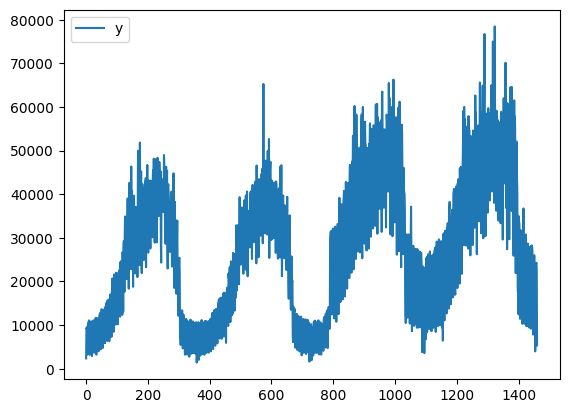

In [4]:
import matplotlib.pyplot as plt
y.plot()

In [5]:
train = y.iloc[:1430,:]
test = y.iloc[1430:,:]

In [6]:
from prophet import Prophet
m = Prophet()
m.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/is03i1qi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ipukbttg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53518', 'data', 'file=/tmp/tmpzi74o3zr/is03i1qi.json', 'init=/tmp/tmpzi74o3zr/ipukbttg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell7r32dlp/prophet_model-20240104070353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)

In [8]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2013-01-01  23184.315505   3441.170427  15602.229185  23184.315505   
1    2013-01-02  23184.302210   3562.766047  15681.354508  23184.302210   
2    2013-01-03  23184.288916   2193.588490  14976.445823  23184.288916   
3    2013-01-04  23184.275621   1486.055597  14216.467639  23184.275621   
4    2013-01-05  23184.262326  -5892.617901   5648.238639  23184.262326   
...         ...           ...           ...           ...           ...   
1456 2016-12-27  38864.465943  19659.475601  31366.053975  38822.010390   
1457 2016-12-28  38871.228245  18872.390305  30711.808582  38825.831266   
1458 2016-12-29  38877.990547  17986.987437  30022.818261  38830.830205   
1459 2016-12-30  38884.752849  17193.972498  29253.896773  38834.425012   
1460 2016-12-31  38891.515151   9039.422303  21582.170184  38836.547673   

       trend_upper  additive_terms  additive_terms_lower  \
0     23184.315505   -13376.369555         -13376.369555   
1     23184.302210   -13922.383594         -13922.383594   
2     23184.288916   -14483.155357         -14483.155357   
3     23184.275621   -15198.858016         -15198.858016   
4     23184.262326   -23386.108159         -23386.108159   
...            ...             ...                   ...   
1456  38888.102227   -13506.321958         -13506.321958   
1457  38898.138264   -14116.538404         -14116.538404   
1458  38907.821676   -14738.359138         -14738.359138   
1459  38918.883505   -15511.798951         -15511.798951   
1460  38928.986925   -23753.322264         -23753.322264   

      additive_terms_upper       weekly  weekly_lower  weekly_upper  \
0            -13376.369555  4552.988166   4552.988166   4552.988166   
1            -13922.383594  3943.694718   3943.694718   3943.694718   
2            -14483.155357  3308.758816   3308.758816   3308.758816   
3            -15198.858016  2508.727703   2508.727703   2508.727703   
4            -23386.108159 -5772.260666  -5772.260666  -5772.260666   
...                    ...          ...           ...           ...   
1456         -13506.321958  4552.988166   4552.988166   4552.988166   
1457         -14116.538404  3943.694718   3943.694718   3943.694718   
1458         -14738.359138  3308.758816   3308.758816   3308.758816   
1459         -15511.798951  2508.727703   2508.727703   2508.727703   
1460         -23753.322264 -5772.260666  -5772.260666  -5772.260666   

            yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -17929.357720 -17929.357720 -17929.357720                   0.0   
1    -17866.078312 -17866.078312 -17866.078312                   0.0   
2    -17791.914173 -17791.914173 -17791.914173                   0.0   
3    -17707.585719 -17707.585719 -17707.585719                   0.0   
4    -17613.847493 -17613.847493 -17613.847493                   0.0   
...            ...           ...           ...                   ...   
1456 -18059.310123 -18059.310123 -18059.310123                   0.0   
1457 -18060.233122 -18060.233122 -18060.233122                   0.0   
1458 -18047.117954 -18047.117954 -18047.117954                   0.0   
1459 -18020.526654 -18020.526654 -18020.526654                   0.0   
1460 -17981.061598 -17981.061598 -17981.061598                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0   9807.945950  
1                            0.0                         0.0   9261.918616  
2                            0.0                         0.0   8701.133559  
3                            0.0                         0.0   7985.417604  
4                            0.0                         0.0   -201.845833  
...                          ...                         ...           ...  
1456                         0.0                         0.0  25358.143985  
1457                         0.0                         

In [9]:
from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[1430:,'yhat'] )))


0.49427647574250677


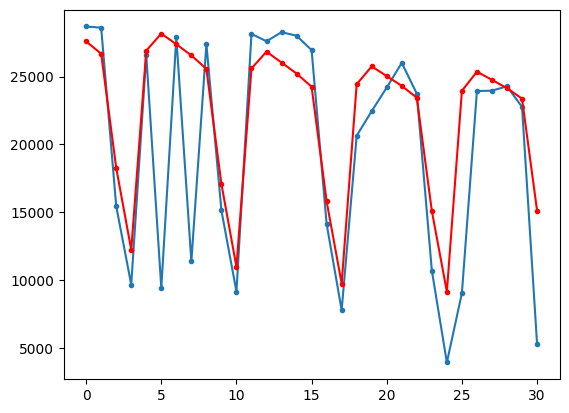

In [10]:
import matplotlib.pyplot as plt
plt.plot(list(test['y']),'.-')
plt.plot(list(forecast.loc[1430:,'yhat']),'r.-')
plt.show()


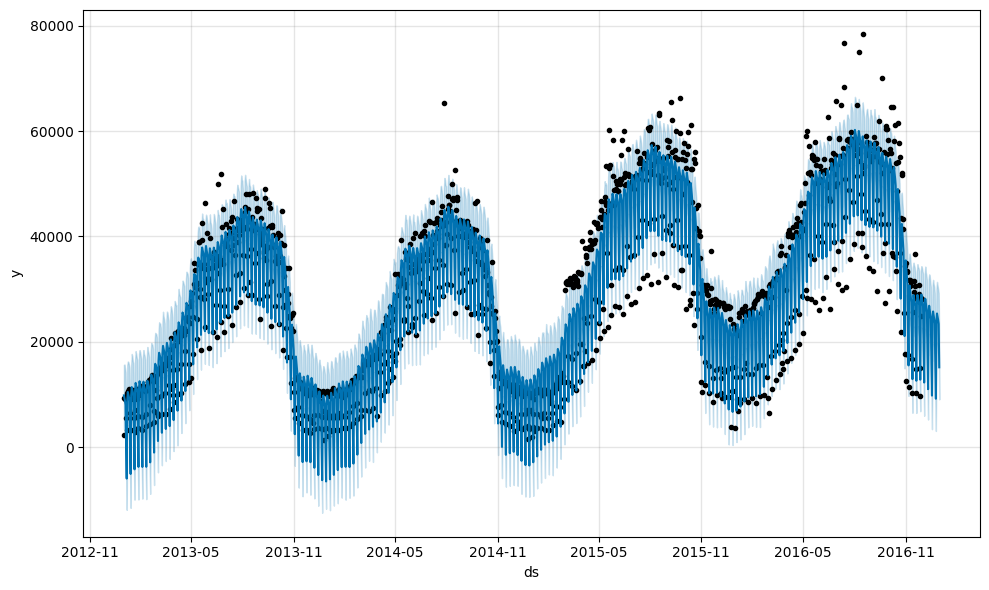

In [11]:
fig1 = m.plot(forecast)
plt.show()


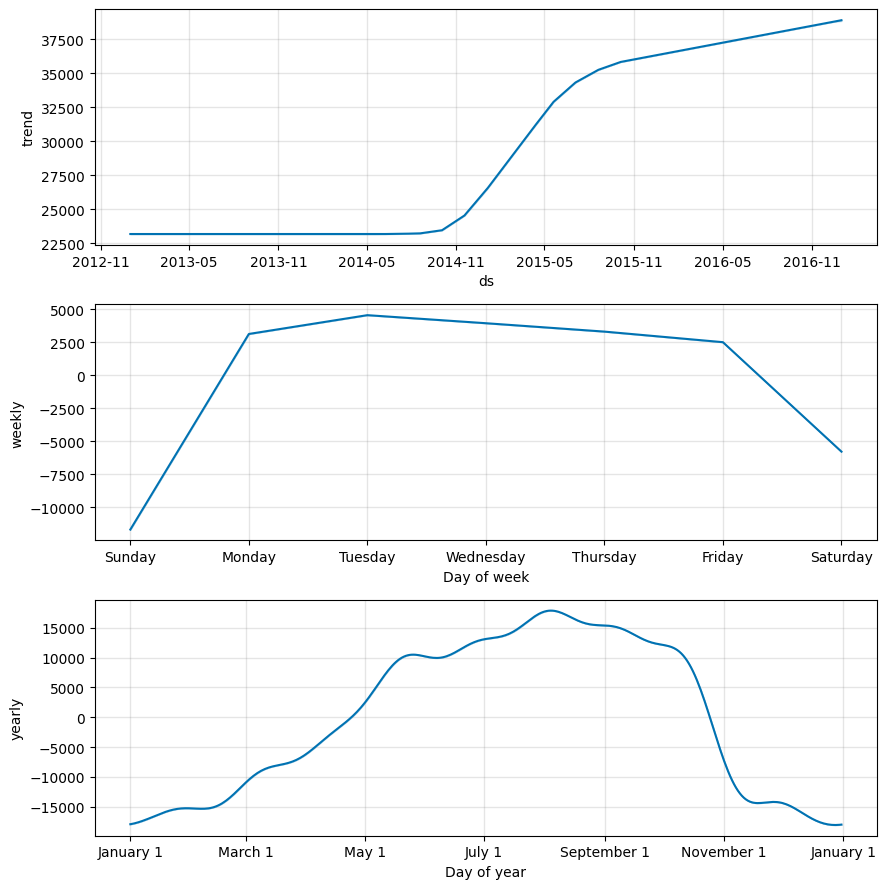

In [12]:
fig2 = m.plot_components(forecast)
plt.show()


In [13]:
m2 = Prophet()
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m2.fit(train)

future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future)
print(r2_score(list(test['y']), list(forecast2.loc[1430:,'yhat'] )))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/83xzdc7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n4jj2fur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96661', 'data', 'file=/tmp/tmpzi74o3zr/83xzdc7h.json', 'init=/tmp/tmpzi74o3zr/n4jj2fur.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld462zw5i/prophet_model-20240104070355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.5045340698218099


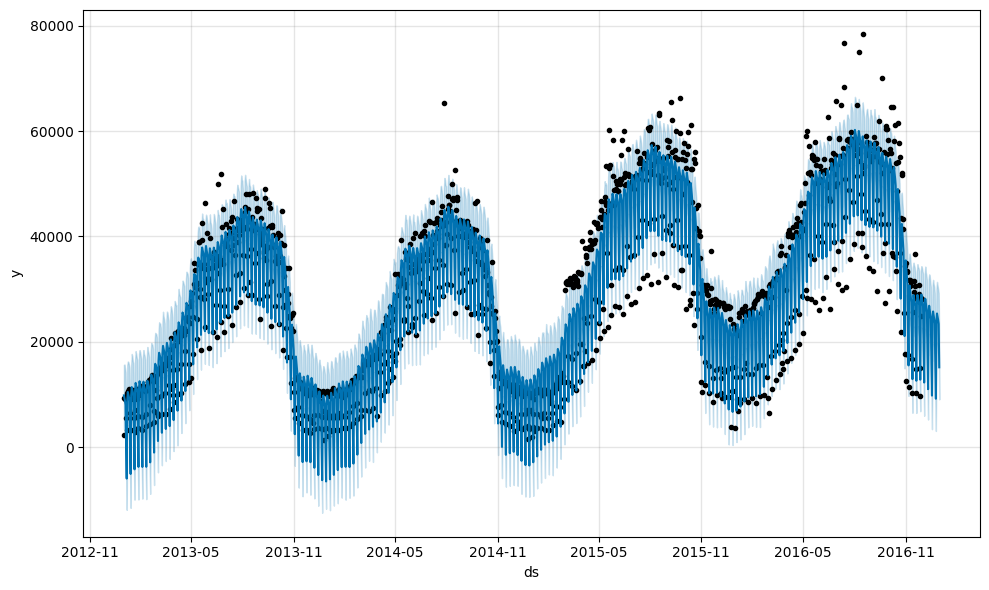

In [14]:
fig1 = m2.plot(forecast)
plt.show()

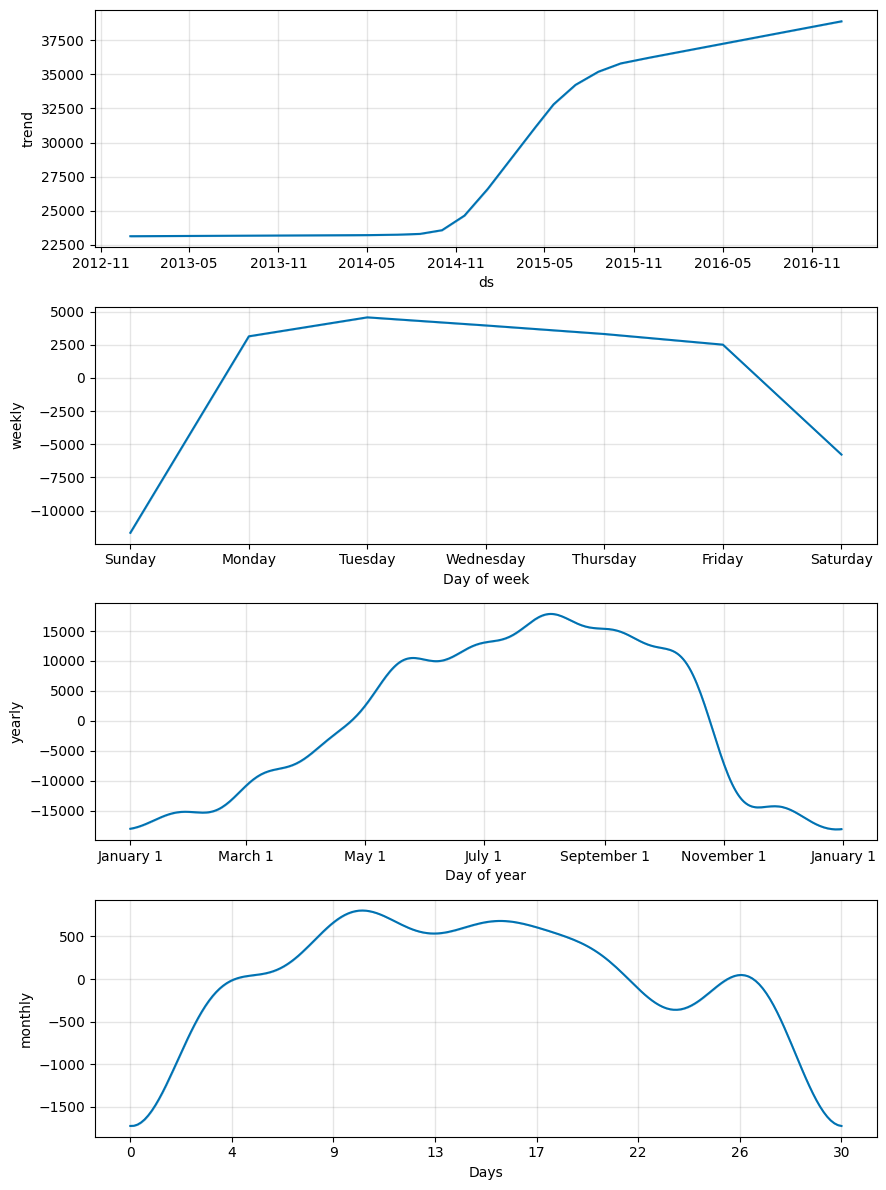

In [15]:
fig2 = m2.plot_components(forecast2)
plt.show()

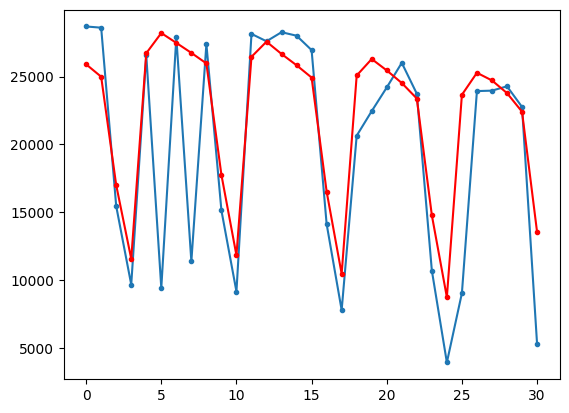

In [16]:
plt.plot(list(test['y']),'.-')
plt.plot(list(forecast2.loc[1430:,'yhat']),'r.-')
plt.show()

In [17]:
# R2
print(r2_score(list(test['y']), list(forecast2.loc[1430:,'yhat'] )))

0.5045340698218099


In [18]:
holidays.tail()

Fecha Día semana  Festivo
1456  2016-12-27    Tuesday        0
1457  2016-12-28  Wednesday        0
1458  2016-12-29   Thursday        0
1459  2016-12-30     Friday        0
1460  2016-12-31   Saturday        0

In [19]:
holidays = holidays[holidays['Festivo'] == 1]
holidays = holidays[['Fecha', 'Festivo']]
holidays = holidays.drop(['Festivo'], axis=1)
holidays['Fiesta'] = 'Fiesta'
holidays.columns = ['ds', 'holiday']
holidays.tail()

ds holiday
1380  2016-10-12  Fiesta
1400  2016-11-01  Fiesta
1435  2016-12-06  Fiesta
1437  2016-12-08  Fiesta
1455  2016-12-26  Fiesta

In [20]:
### Añadimos las fiestas al modelo

In [21]:
m3 = Prophet(holidays=holidays)
m3.fit(train)
future3 = m3.make_future_dataframe(periods=len(test))
forecast3 = m3.predict(future)

print(r2_score(list(test['y']), list(forecast3.loc[1430:,'yhat'] )))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qqp5dg5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ahjt7c3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8364', 'data', 'file=/tmp/tmpzi74o3zr/qqp5dg5b.json', 'init=/tmp/tmpzi74o3zr/9ahjt7c3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleu95cbn8/prophet_model-20240104070357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.7745920684852281


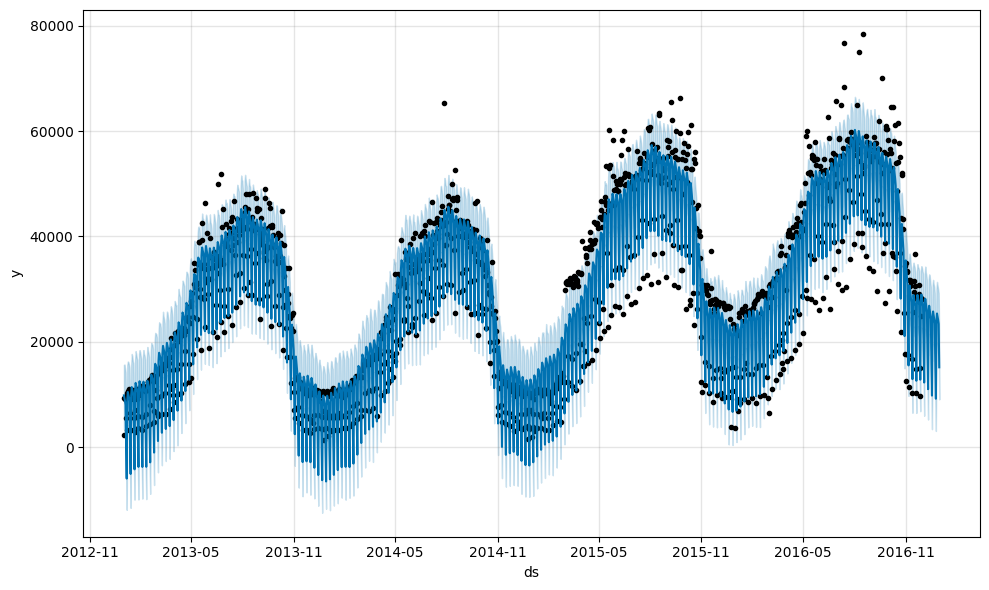

In [22]:
fig1 = m3.plot(forecast)
plt.show()

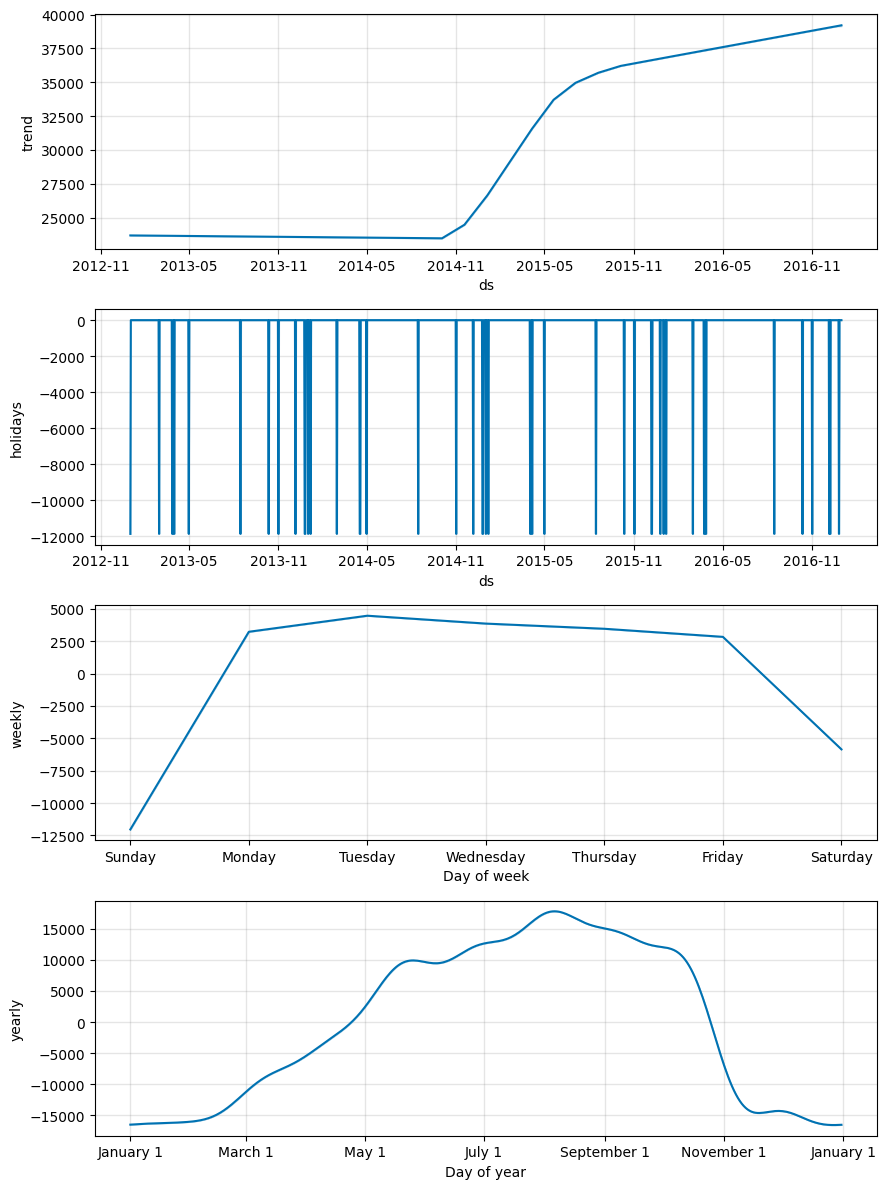

In [23]:
fig2 = m3.plot_components(forecast3)
plt.show()

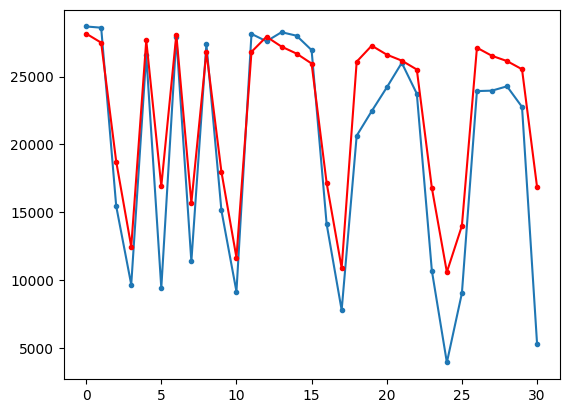

In [24]:
plt.plot(list(test['y']),'.-')
plt.plot(list(forecast3.loc[1430:,'yhat']),'r.-')
plt.show()

In [25]:
# R2
print(r2_score(list(test['y']), list(forecast3.loc[1430:,'yhat'] )))

0.7745920684852281


In [26]:
def model_test(holidays, weekly_seasonality,
yearly_seasonality, add_monthly, changepoint_prior_scale, holidays_prior_scale, month_fourier):

    m3 = Prophet(
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        holidays=holidays,
        changepoint_prior_scale=changepoint_prior_scale,
        holidays_prior_scale=holidays_prior_scale)

    if add_monthly:
        m3.add_seasonality(
            name='monthly',
            period=30.5,
            fourier_order=month_fourier)

    m3.fit(train)

    future3 = m3.make_future_dataframe(periods=len(test))

    future3['ds'] = pd.to_datetime(future3['ds']).dt.date

    forecast3 = m3.predict(future3)

    return r2_score(
            list(test['y']),
            list(forecast3.loc[1430:,'yhat'] ))


In [27]:

# Setting the grid
holidays_opt = [holidays, None]
weekly_seas = [ 5, 10, 30, 50]
yearly_seas = [ 5, 10, 30, 50]
add_monthly = [True, False]
changepoint_prior_scale = [0.1, 0.3, 0.5]
holidays_prior_scale = [0.1, 0.3, 0.5]
month_fourier = [5, 10, 30, 50]

# Looping through the grid
grid_results = []
for h in holidays_opt:
  for w in weekly_seas:
    for ys in yearly_seas:
      for m in add_monthly:
        for c in changepoint_prior_scale:
          for hp in holidays_prior_scale:
            for mf in month_fourier:
              r2=model_test(h,w,ys,m,c,hp,mf)
              print([w,ys,m,c,hp,mf,r2])
              grid_results.append([h,w,ys,m,c,hp,mf,r2])

# adding it all to a dataframe and extract the best model
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(7, ascending=False)

h, w,ys, m, c,hp,mf,r2 = list(benchmark.iloc[0,:])

# Fit the Prophet with those best hyperparameters
m3 = Prophet(
        yearly_seasonality=ys,
        weekly_seasonality=w,
        holidays=h,
        changepoint_prior_scale=c,
        holidays_prior_scale=hp)

if m:
    m3.add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=mf)


m3.fit(train)

future3 = m3.make_future_dataframe(periods=len(test))

future3['ds'] = pd.to_datetime(future3['ds']).dt.date


forecast3 = m3.predict(future3)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6kx3ltze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rniot6qi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30188', 'data', 'file=/tmp/tmpzi74o3zr/6kx3ltze.json', 'init=/tmp/tmpzi74o3zr/rniot6qi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelat57ybj_/prophet_model-20240104070359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi

[5, 5, True, 0.1, 0.1, 5, 0.7062546602143513]


07:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pzsbhqxi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uerp_v13.json


[5, 5, True, 0.1, 0.1, 10, 0.7014189184435231]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42784', 'data', 'file=/tmp/tmpzi74o3zr/pzsbhqxi.json', 'init=/tmp/tmpzi74o3zr/uerp_v13.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1rdttorj/prophet_model-20240104070400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mra39xit.json


[5, 5, True, 0.1, 0.1, 30, 0.7045481118304933]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2pwgchwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90210', 'data', 'file=/tmp/tmpzi74o3zr/mra39xit.json', 'init=/tmp/tmpzi74o3zr/2pwgchwm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelouuum0bi/prophet_model-20240104070401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p901ptyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6xtqi08g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.1, 0.1, 50, 0.7075483768516402]


07:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cw65k1h1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rysp9z2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98357', 'data', 'file=/tmp/tmpzi74o3zr/cw65k1h1.json', 'init=/tmp/tmpzi74o3zr/rysp9z2f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt8mqqjmj/prophet_model-20240104070403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.1, 0.3, 5, 0.7088803019361635]


07:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9vwponcs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ho2w5xei.json


[5, 5, True, 0.1, 0.3, 10, 0.7002570590304359]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89586', 'data', 'file=/tmp/tmpzi74o3zr/9vwponcs.json', 'init=/tmp/tmpzi74o3zr/ho2w5xei.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7fs5lm9s/prophet_model-20240104070403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h601d1jq.json


[5, 5, True, 0.1, 0.3, 30, 0.7112534175920235]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v7o0qerl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42892', 'data', 'file=/tmp/tmpzi74o3zr/h601d1jq.json', 'init=/tmp/tmpzi74o3zr/v7o0qerl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6h_z65j0/prophet_model-20240104070404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dfh8idem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m4i4rvso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.1, 0.3, 50, 0.7044581216134744]


07:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uf3dokc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1uippy5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83624', 'data', 'file=/tmp/tmpzi74o3zr/uf3dokc8.json', 'init=/tmp/tmpzi74o3zr/1uippy5x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model89pjt9wz/prophet_model-20240104070406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.1, 0.5, 5, 0.709524889936292]


07:04:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/60tylffu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l17ueb8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 5, True, 0.1, 0.5, 10, 0.7035411536597416]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23088', 'data', 'file=/tmp/tmpzi74o3zr/60tylffu.json', 'init=/tmp/tmpzi74o3zr/l17ueb8_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbi96zyp6/prophet_model-20240104070406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_6v6n1hp.json


[5, 5, True, 0.1, 0.5, 30, 0.713500014916588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wif67xb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85718', 'data', 'file=/tmp/tmpzi74o3zr/_6v6n1hp.json', 'init=/tmp/tmpzi74o3zr/wif67xb5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrfotpaqs/prophet_model-20240104070407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yxak2tj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/29van2xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.1, 0.5, 50, 0.7065978322051633]


07:04:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1lkrlffs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jojbhqra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32118', 'data', 'file=/tmp/tmpzi74o3zr/1lkrlffs.json', 'init=/tmp/tmpzi74o3zr/jojbhqra.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele4b3hmeg/prophet_model-20240104070409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.3, 0.1, 5, 0.6782727655366736]


07:04:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cxfz3bml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hsjkili3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44512', 'data', 'file=/tmp/tmpzi74o3zr/cxfz3bml.json', 'init=/tmp/tmpzi74o3zr/hsjkili3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliv74oab0/prophet_model-20240104070410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[5, 5, True, 0.3, 0.1, 10, 0.6705081221638305]


07:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mm8fax9g.json


[5, 5, True, 0.3, 0.1, 30, 0.6844321672785127]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lh9vwn8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93219', 'data', 'file=/tmp/tmpzi74o3zr/mm8fax9g.json', 'init=/tmp/tmpzi74o3zr/lh9vwn8v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc50b3t7r/prophet_model-20240104070411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ftg2plrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i3578m2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.3, 0.1, 50, 0.6702056304284534]


07:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2b3z9cpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dg5dqk8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55160', 'data', 'file=/tmp/tmpzi74o3zr/2b3z9cpg.json', 'init=/tmp/tmpzi74o3zr/dg5dqk8m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhir9vlcy/prophet_model-20240104070413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.3, 0.3, 5, 0.6739194090842257]


07:04:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5qtai8iy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fxqjpz9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84587', 'data', 'file=/tmp/tmpzi74o3zr/5qtai8iy.json', 'init=/tmp/tmpzi74o3zr/fxqjpz9y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk9zsbs83/prophet_model-20240104070414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[5, 5, True, 0.3, 0.3, 10, 0.674963972437109]


07:04:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hmtk_w0e.json


[5, 5, True, 0.3, 0.3, 30, 0.6941016472090352]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m5d4w1mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95404', 'data', 'file=/tmp/tmpzi74o3zr/hmtk_w0e.json', 'init=/tmp/tmpzi74o3zr/m5d4w1mm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx71k2q97/prophet_model-20240104070415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pd44s66w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/utrekv5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.3, 0.3, 50, 0.6838426862659785]


07:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jk66mx1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hl_w9wrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56959', 'data', 'file=/tmp/tmpzi74o3zr/jk66mx1r.json', 'init=/tmp/tmpzi74o3zr/hl_w9wrq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelplq153k9/prophet_model-20240104070417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.3, 0.5, 5, 0.6725191340618812]


07:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0k73keru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/axg2pvkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 5, True, 0.3, 0.5, 10, 0.6713595307583573]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51673', 'data', 'file=/tmp/tmpzi74o3zr/0k73keru.json', 'init=/tmp/tmpzi74o3zr/axg2pvkd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkc1ht8c5/prophet_model-20240104070417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rnni2zvk.json


[5, 5, True, 0.3, 0.5, 30, 0.6875943358853134]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rs4qwy33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81936', 'data', 'file=/tmp/tmpzi74o3zr/rnni2zvk.json', 'init=/tmp/tmpzi74o3zr/rs4qwy33.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelva_gj7oy/prophet_model-20240104070419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l5128gg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d8i_7a7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.3, 0.5, 50, 0.6809872365991039]


07:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wxqv1pxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lbhvyt6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92803', 'data', 'file=/tmp/tmpzi74o3zr/wxqv1pxs.json', 'init=/tmp/tmpzi74o3zr/lbhvyt6d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4a35lp_g/prophet_model-20240104070421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.5, 0.1, 5, 0.6763607418726518]


07:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ec19wvz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ut_z9c79.json


[5, 5, True, 0.5, 0.1, 10, 0.67119575096902]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91477', 'data', 'file=/tmp/tmpzi74o3zr/ec19wvz0.json', 'init=/tmp/tmpzi74o3zr/ut_z9c79.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6bsmqgj3/prophet_model-20240104070422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/roczzrbx.json


[5, 5, True, 0.5, 0.1, 30, 0.6746709094369099]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fru179wy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30527', 'data', 'file=/tmp/tmpzi74o3zr/roczzrbx.json', 'init=/tmp/tmpzi74o3zr/fru179wy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo4wckgas/prophet_model-20240104070423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ht_qinhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4aqkv9ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.5, 0.1, 50, 0.6805336075553241]


07:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mnqsd2tk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8vo8d157.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15029', 'data', 'file=/tmp/tmpzi74o3zr/mnqsd2tk.json', 'init=/tmp/tmpzi74o3zr/8vo8d157.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0pkvcr3_/prophet_model-20240104070425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.5, 0.3, 5, 0.6750831126141392]


07:04:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w7j9xma6.json


[5, 5, True, 0.5, 0.3, 10, 0.6715731165922407]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7fjk7_te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20091', 'data', 'file=/tmp/tmpzi74o3zr/w7j9xma6.json', 'init=/tmp/tmpzi74o3zr/7fjk7_te.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhho_1nmb/prophet_model-20240104070426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s19snikt.json


[5, 5, True, 0.5, 0.3, 30, 0.6798393114130726]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s9a6edr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69717', 'data', 'file=/tmp/tmpzi74o3zr/s19snikt.json', 'init=/tmp/tmpzi74o3zr/s9a6edr7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model240sln_e/prophet_model-20240104070427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x4tay531.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2z6ry9jh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.5, 0.3, 50, 0.6859806192684085]


07:04:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zmvnhpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2fm_vk3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47080', 'data', 'file=/tmp/tmpzi74o3zr/_zmvnhpd.json', 'init=/tmp/tmpzi74o3zr/2fm_vk3t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsktorjb8/prophet_model-20240104070429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.5, 0.5, 5, 0.6737524369923396]


07:04:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8kflu5eq.json


[5, 5, True, 0.5, 0.5, 10, 0.6698934153761238]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sjk5v8jk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20028', 'data', 'file=/tmp/tmpzi74o3zr/8kflu5eq.json', 'init=/tmp/tmpzi74o3zr/sjk5v8jk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbkl2h2w7/prophet_model-20240104070431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fl2522q5.json


[5, 5, True, 0.5, 0.5, 30, 0.6836439430729844]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f0sv495j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6900', 'data', 'file=/tmp/tmpzi74o3zr/fl2522q5.json', 'init=/tmp/tmpzi74o3zr/f0sv495j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models0nmfxyt/prophet_model-20240104070432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b_enaikh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e3qa21d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[5, 5, True, 0.5, 0.5, 50, 0.6817733616759113]


07:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1xzj22s7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q_22ae9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20921', 'data', 'file=/tmp/tmpzi74o3zr/1xzj22s7.json', 'init=/tmp/tmpzi74o3zr/q_22ae9z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg36hc55f/prophet_model-20240104070434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 5, 0.6973449977956658]


07:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9mquz2g4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0autjyuz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61672', 'data', 'file=/tmp/tmpzi74o3zr/9mquz2g4.json', 'init=/tmp/tmpzi74o3zr/0autjyuz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0imca_ax/prophet_model-20240104070435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 10, 0.6973449977956658]


07:04:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ebz_ba3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ssb57jx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88229', 'data', 'file=/tmp/tmpzi74o3zr/6ebz_ba3.json', 'init=/tmp/tmpzi74o3zr/ssb57jx3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluwnc8cm4/prophet_model-20240104070435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 30, 0.6973449977956658]


07:04:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z19mrd7c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0wxbzwwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93304', 'data', 'file=/tmp/tmpzi74o3zr/z19mrd7c.json', 'init=/tmp/tmpzi74o3zr/0wxbzwwr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellhotfm7o/prophet_model-20240104070436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 50, 0.6973449977956658]


07:04:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gjg9r6f_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eq6gzwe7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22341', 'data', 'file=/tmp/tmpzi74o3zr/gjg9r6f_.json', 'init=/tmp/tmpzi74o3zr/eq6gzwe7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfi57h5_0/prophet_model-20240104070436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 5, 0.696005408377806]


07:04:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tyknsrto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w6sw9b0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57619', 'data', 'file=/tmp/tmpzi74o3zr/tyknsrto.json', 'init=/tmp/tmpzi74o3zr/w6sw9b0o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9pngo3kt/prophet_model-20240104070437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 10, 0.696005408377806]


07:04:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cevmwn5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qoczmgbm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43847', 'data', 'file=/tmp/tmpzi74o3zr/cevmwn5_.json', 'init=/tmp/tmpzi74o3zr/qoczmgbm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxkxrcyh_/prophet_model-20240104070437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 30, 0.696005408377806]


07:04:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b07xqg69.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pnoudzom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83800', 'data', 'file=/tmp/tmpzi74o3zr/b07xqg69.json', 'init=/tmp/tmpzi74o3zr/pnoudzom.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln4idvuuv/prophet_model-20240104070438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 50, 0.696005408377806]


07:04:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n4xp56_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u4p9wzfs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51600', 'data', 'file=/tmp/tmpzi74o3zr/n4xp56_l.json', 'init=/tmp/tmpzi74o3zr/u4p9wzfs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelol28xmar/prophet_model-20240104070439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 5, 0.6975518287769417]


07:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/af5m6z3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e0s_kyz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10308', 'data', 'file=/tmp/tmpzi74o3zr/af5m6z3w.json', 'init=/tmp/tmpzi74o3zr/e0s_kyz0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0liqw7jq/prophet_model-20240104070439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 10, 0.6975518287769417]


07:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9fozw496.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c2e0rb7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58179', 'data', 'file=/tmp/tmpzi74o3zr/9fozw496.json', 'init=/tmp/tmpzi74o3zr/c2e0rb7s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt4c82k89/prophet_model-20240104070440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 30, 0.6975518287769417]


07:04:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s9l5ow5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0ntvdlnq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66022', 'data', 'file=/tmp/tmpzi74o3zr/s9l5ow5w.json', 'init=/tmp/tmpzi74o3zr/0ntvdlnq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliqu4vc9w/prophet_model-20240104070440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 50, 0.6975518287769417]


07:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8uhul2be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/da02oex2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82912', 'data', 'file=/tmp/tmpzi74o3zr/8uhul2be.json', 'init=/tmp/tmpzi74o3zr/da02oex2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcqfj2kh4/prophet_model-20240104070441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 5, 0.6695214657768771]


07:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n7s48swg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iyo21hsx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56188', 'data', 'file=/tmp/tmpzi74o3zr/n7s48swg.json', 'init=/tmp/tmpzi74o3zr/iyo21hsx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxk8p170e/prophet_model-20240104070442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 10, 0.6695214657768771]


07:04:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6zgu1owx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q18ea_bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89214', 'data', 'file=/tmp/tmpzi74o3zr/6zgu1owx.json', 'init=/tmp/tmpzi74o3zr/q18ea_bw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliflrsljt/prophet_model-20240104070442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 30, 0.6695214657768771]


07:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b__ovjwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x8c9pdo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17339', 'data', 'file=/tmp/tmpzi74o3zr/b__ovjwm.json', 'init=/tmp/tmpzi74o3zr/x8c9pdo1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf0fg1egb/prophet_model-20240104070443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 50, 0.6695214657768771]


07:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e5onkcs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/95nfdl3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60686', 'data', 'file=/tmp/tmpzi74o3zr/e5onkcs6.json', 'init=/tmp/tmpzi74o3zr/95nfdl3x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo4_wrm1w/prophet_model-20240104070444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 5, 0.6723847694225479]


07:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5n1005tk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jbnz7foe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15600', 'data', 'file=/tmp/tmpzi74o3zr/5n1005tk.json', 'init=/tmp/tmpzi74o3zr/jbnz7foe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1gl_y5be/prophet_model-20240104070445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 10, 0.6723847694225479]


07:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z1bhjt4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fc3iu22n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13111', 'data', 'file=/tmp/tmpzi74o3zr/z1bhjt4v.json', 'init=/tmp/tmpzi74o3zr/fc3iu22n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvqf5b7eg/prophet_model-20240104070446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 30, 0.6723847694225479]


07:04:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/quctlcnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b3mklmu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82209', 'data', 'file=/tmp/tmpzi74o3zr/quctlcnv.json', 'init=/tmp/tmpzi74o3zr/b3mklmu2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrk9wvbz7/prophet_model-20240104070447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 50, 0.6723847694225479]


07:04:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e8jugm_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g3ksfwqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46051', 'data', 'file=/tmp/tmpzi74o3zr/e8jugm_m.json', 'init=/tmp/tmpzi74o3zr/g3ksfwqo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model77btl8xg/prophet_model-20240104070448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 5, 0.6702673253597279]


07:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ng0cwnj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qvmb7ozc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51089', 'data', 'file=/tmp/tmpzi74o3zr/ng0cwnj_.json', 'init=/tmp/tmpzi74o3zr/qvmb7ozc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelahssgxqp/prophet_model-20240104070448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 10, 0.6702673253597279]


07:04:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4vjkh_sd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o0o6ygqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66813', 'data', 'file=/tmp/tmpzi74o3zr/4vjkh_sd.json', 'init=/tmp/tmpzi74o3zr/o0o6ygqa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model981zcd83/prophet_model-20240104070449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 30, 0.6702673253597279]


07:04:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t6qj57ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ncn_260_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81597', 'data', 'file=/tmp/tmpzi74o3zr/t6qj57ai.json', 'init=/tmp/tmpzi74o3zr/ncn_260_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1eggnpiu/prophet_model-20240104070449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 50, 0.6702673253597279]


07:04:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j2gu9dix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n1b5tb5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17124', 'data', 'file=/tmp/tmpzi74o3zr/j2gu9dix.json', 'init=/tmp/tmpzi74o3zr/n1b5tb5h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw6jsccqd/prophet_model-20240104070450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 5, 0.6663448982266764]


07:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ba7gotl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/br63c10f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73481', 'data', 'file=/tmp/tmpzi74o3zr/ba7gotl4.json', 'init=/tmp/tmpzi74o3zr/br63c10f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7_bv5zbo/prophet_model-20240104070451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 10, 0.6663448982266764]


07:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k72428f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8fmyobka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97542', 'data', 'file=/tmp/tmpzi74o3zr/k72428f1.json', 'init=/tmp/tmpzi74o3zr/8fmyobka.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelumiv_yfm/prophet_model-20240104070452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 30, 0.6663448982266764]


07:04:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h5xtc022.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ve819vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7248', 'data', 'file=/tmp/tmpzi74o3zr/h5xtc022.json', 'init=/tmp/tmpzi74o3zr/4ve819vb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelow2i9mgz/prophet_model-20240104070452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 50, 0.6663448982266764]


07:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5pwv61my.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ecbs34v5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7608', 'data', 'file=/tmp/tmpzi74o3zr/5pwv61my.json', 'init=/tmp/tmpzi74o3zr/ecbs34v5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgd_cdx22/prophet_model-20240104070453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 5, 0.6709573559803894]


07:04:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0v4rqzo5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e4rjquuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77758', 'data', 'file=/tmp/tmpzi74o3zr/0v4rqzo5.json', 'init=/tmp/tmpzi74o3zr/e4rjquuo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellvn7r6ow/prophet_model-20240104070454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 10, 0.6709573559803894]


07:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rmwr18gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s9qi0bph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75518', 'data', 'file=/tmp/tmpzi74o3zr/rmwr18gj.json', 'init=/tmp/tmpzi74o3zr/s9qi0bph.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbjuk6ip8/prophet_model-20240104070455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 30, 0.6709573559803894]


07:04:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rjzdflp9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u7wv9ogb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60600', 'data', 'file=/tmp/tmpzi74o3zr/rjzdflp9.json', 'init=/tmp/tmpzi74o3zr/u7wv9ogb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelryfkp1n5/prophet_model-20240104070456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 50, 0.6709573559803894]


07:04:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zluo2ycd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zzfrtag8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91941', 'data', 'file=/tmp/tmpzi74o3zr/zluo2ycd.json', 'init=/tmp/tmpzi74o3zr/zzfrtag8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5x42oayz/prophet_model-20240104070456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 5, 0.6662616296521436]


07:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ilndsv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pyrimus3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32930', 'data', 'file=/tmp/tmpzi74o3zr/7ilndsv5.json', 'init=/tmp/tmpzi74o3zr/pyrimus3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6sowc2kx/prophet_model-20240104070457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 10, 0.6662616296521436]


07:04:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aydj9s5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5m6s3dhs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27895', 'data', 'file=/tmp/tmpzi74o3zr/aydj9s5c.json', 'init=/tmp/tmpzi74o3zr/5m6s3dhs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7hrpuy7a/prophet_model-20240104070458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 30, 0.6662616296521436]


07:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f2e1520c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/filq6dbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50521', 'data', 'file=/tmp/tmpzi74o3zr/f2e1520c.json', 'init=/tmp/tmpzi74o3zr/filq6dbd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcmukzlzd/prophet_model-20240104070459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 50, 0.6662616296521436]


07:04:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rjsnyq4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yjoufqo0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58587', 'data', 'file=/tmp/tmpzi74o3zr/rjsnyq4t.json', 'init=/tmp/tmpzi74o3zr/yjoufqo0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp7jl5f_7/prophet_model-20240104070459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.1, 0.1, 5, 0.7667068750651842]


07:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/coky26m4.json


[5, 10, True, 0.1, 0.1, 10, 0.7622124030280149]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jf7_zt1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30036', 'data', 'file=/tmp/tmpzi74o3zr/coky26m4.json', 'init=/tmp/tmpzi74o3zr/jf7_zt1j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelusykduww/prophet_model-20240104070500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rut4d57t.json


[5, 10, True, 0.1, 0.1, 30, 0.7839707954405094]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kj9odiml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32482', 'data', 'file=/tmp/tmpzi74o3zr/rut4d57t.json', 'init=/tmp/tmpzi74o3zr/kj9odiml.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3k4lw4sq/prophet_model-20240104070501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y5wkq6zk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vh3e21qp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.1, 0.1, 50, 0.7815000066932382]


07:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mnisnuuk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l6xl4gji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69727', 'data', 'file=/tmp/tmpzi74o3zr/mnisnuuk.json', 'init=/tmp/tmpzi74o3zr/l6xl4gji.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluetnr13u/prophet_model-20240104070502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.1, 0.3, 5, 0.7645334745592345]


07:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vj6jqsoc.json


[5, 10, True, 0.1, 0.3, 10, 0.7651495096250527]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sezlvpmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83700', 'data', 'file=/tmp/tmpzi74o3zr/vj6jqsoc.json', 'init=/tmp/tmpzi74o3zr/sezlvpmq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2prvxou2/prophet_model-20240104070503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4u2t5qvt.json


[5, 10, True, 0.1, 0.3, 30, 0.7881156013768414]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oe2d2l5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48716', 'data', 'file=/tmp/tmpzi74o3zr/4u2t5qvt.json', 'init=/tmp/tmpzi74o3zr/oe2d2l5r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8ibyk8nd/prophet_model-20240104070504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c37gfgli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z63yooeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.1, 0.3, 50, 0.7891224482875322]


07:05:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/76rbqq2m.json


[5, 10, True, 0.1, 0.5, 5, 0.7711410697558748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x17wqcf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8559', 'data', 'file=/tmp/tmpzi74o3zr/76rbqq2m.json', 'init=/tmp/tmpzi74o3zr/x17wqcf2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldux_nz_u/prophet_model-20240104070505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b7h173mt.json


[5, 10, True, 0.1, 0.5, 10, 0.7642047227074698]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/flkd530m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27303', 'data', 'file=/tmp/tmpzi74o3zr/b7h173mt.json', 'init=/tmp/tmpzi74o3zr/flkd530m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9uww1ydk/prophet_model-20240104070507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xqm1myle.json


[5, 10, True, 0.1, 0.5, 30, 0.7922588816901679]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pt68ouwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7552', 'data', 'file=/tmp/tmpzi74o3zr/xqm1myle.json', 'init=/tmp/tmpzi74o3zr/pt68ouwg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzos118l5/prophet_model-20240104070508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zdso6t6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c0begyeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[5, 10, True, 0.1, 0.5, 50, 0.7816029585717343]


07:05:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6j673v14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jf1m0b2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45132', 'data', 'file=/tmp/tmpzi74o3zr/6j673v14.json', 'init=/tmp/tmpzi74o3zr/jf1m0b2m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model37kodsvh/prophet_model-20240104070509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.3, 0.1, 5, 0.741396856863181]


07:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e7yopitg.json


[5, 10, True, 0.3, 0.1, 10, 0.7332489357386989]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5iu2q0a7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28728', 'data', 'file=/tmp/tmpzi74o3zr/e7yopitg.json', 'init=/tmp/tmpzi74o3zr/5iu2q0a7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgs3raqgu/prophet_model-20240104070510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nx2ii295.json


[5, 10, True, 0.3, 0.1, 30, 0.7651415996064632]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vhkycc80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78770', 'data', 'file=/tmp/tmpzi74o3zr/nx2ii295.json', 'init=/tmp/tmpzi74o3zr/vhkycc80.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5009a8xb/prophet_model-20240104070511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rge83t6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hssxofxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.3, 0.1, 50, 0.7668609357701821]


07:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n1g8d1nb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o46f675s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10020', 'data', 'file=/tmp/tmpzi74o3zr/n1g8d1nb.json', 'init=/tmp/tmpzi74o3zr/o46f675s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelctpvggwh/prophet_model-20240104070513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.3, 0.3, 5, 0.7384245465823807]


07:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lpdcvuc1.json


[5, 10, True, 0.3, 0.3, 10, 0.7435556466403787]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gpnx6806.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50906', 'data', 'file=/tmp/tmpzi74o3zr/lpdcvuc1.json', 'init=/tmp/tmpzi74o3zr/gpnx6806.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljiy18aat/prophet_model-20240104070514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3j54r5kt.json


[5, 10, True, 0.3, 0.3, 30, 0.7628475312629579]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iesywbld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57359', 'data', 'file=/tmp/tmpzi74o3zr/3j54r5kt.json', 'init=/tmp/tmpzi74o3zr/iesywbld.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3sjegtkd/prophet_model-20240104070515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sesxutld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wxv0szeo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.3, 0.3, 50, 0.7665866180685266]


07:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wjj95pa1.json


[5, 10, True, 0.3, 0.5, 5, 0.74136115559942]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ow46run2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73139', 'data', 'file=/tmp/tmpzi74o3zr/wjj95pa1.json', 'init=/tmp/tmpzi74o3zr/ow46run2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltunrg1ya/prophet_model-20240104070518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u4bp3swk.json


[5, 10, True, 0.3, 0.5, 10, 0.7403670348332275]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xhj6rteh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89550', 'data', 'file=/tmp/tmpzi74o3zr/u4bp3swk.json', 'init=/tmp/tmpzi74o3zr/xhj6rteh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf1ulbuwu/prophet_model-20240104070519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ajripsn5.json


[5, 10, True, 0.3, 0.5, 30, 0.7618385437107631]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jdxr1uq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76466', 'data', 'file=/tmp/tmpzi74o3zr/ajripsn5.json', 'init=/tmp/tmpzi74o3zr/jdxr1uq8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkubh0hsj/prophet_model-20240104070520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6cbnsg39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2yfd3s_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.3, 0.5, 50, 0.7665337897462433]


07:05:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9zrev42f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4yzz3qgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=790', 'data', 'file=/tmp/tmpzi74o3zr/9zrev42f.json', 'init=/tmp/tmpzi74o3zr/4yzz3qgi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model32yy4c4y/prophet_model-20240104070522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.5, 0.1, 5, 0.7472336621140145]


07:05:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a5ula_xg.json


[5, 10, True, 0.5, 0.1, 10, 0.7388920771547528]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ij6x7m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93010', 'data', 'file=/tmp/tmpzi74o3zr/a5ula_xg.json', 'init=/tmp/tmpzi74o3zr/7ij6x7m0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq2s2fb3d/prophet_model-20240104070523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a7_t7asr.json


[5, 10, True, 0.5, 0.1, 30, 0.7706859251348244]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hzxdx07n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48314', 'data', 'file=/tmp/tmpzi74o3zr/a7_t7asr.json', 'init=/tmp/tmpzi74o3zr/hzxdx07n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1913t1nc/prophet_model-20240104070524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qo81fale.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b9nc5_dh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.5, 0.1, 50, 0.7697230859251937]


07:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ufh8_tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0j70g11y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28802', 'data', 'file=/tmp/tmpzi74o3zr/6ufh8_tr.json', 'init=/tmp/tmpzi74o3zr/0j70g11y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5jvn69y_/prophet_model-20240104070526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.5, 0.3, 5, 0.7531348036641775]


07:05:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vjcv9och.json


[5, 10, True, 0.5, 0.3, 10, 0.7380917003768643]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m1har7vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93947', 'data', 'file=/tmp/tmpzi74o3zr/vjcv9och.json', 'init=/tmp/tmpzi74o3zr/m1har7vv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model76d2l1eh/prophet_model-20240104070527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tp2eteve.json


[5, 10, True, 0.5, 0.3, 30, 0.7622173860273034]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h2ng_3r8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17883', 'data', 'file=/tmp/tmpzi74o3zr/tp2eteve.json', 'init=/tmp/tmpzi74o3zr/h2ng_3r8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhxsz5514/prophet_model-20240104070529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ofd6odtx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jxtid8e7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.5, 0.3, 50, 0.7767316317877628]


07:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qe2ed6yd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v2u5hx6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78083', 'data', 'file=/tmp/tmpzi74o3zr/qe2ed6yd.json', 'init=/tmp/tmpzi74o3zr/v2u5hx6p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln1b_ypee/prophet_model-20240104070531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.5, 0.5, 5, 0.7491897534969221]


07:05:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k55bujpb.json


[5, 10, True, 0.5, 0.5, 10, 0.7446768103058443]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_kxal5hq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60570', 'data', 'file=/tmp/tmpzi74o3zr/k55bujpb.json', 'init=/tmp/tmpzi74o3zr/_kxal5hq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelezt82ct7/prophet_model-20240104070532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a0u_mk0k.json


[5, 10, True, 0.5, 0.5, 30, 0.7731349959306094]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7029of14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44410', 'data', 'file=/tmp/tmpzi74o3zr/a0u_mk0k.json', 'init=/tmp/tmpzi74o3zr/7029of14.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld9yvbdjd/prophet_model-20240104070534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m7dlv3c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_mf5l4fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.5, 0.5, 50, 0.7734982837338896]


07:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dn46sd4y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/glyvprgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88972', 'data', 'file=/tmp/tmpzi74o3zr/dn46sd4y.json', 'init=/tmp/tmpzi74o3zr/glyvprgy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqt7hksqm/prophet_model-20240104070536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 5, 0.755600285139316]


07:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2jke08np.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lyf42bjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98375', 'data', 'file=/tmp/tmpzi74o3zr/2jke08np.json', 'init=/tmp/tmpzi74o3zr/lyf42bjs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0mncfxo0/prophet_model-20240104070536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 10, 0.755600285139316]


07:05:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s8ts1nl_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/onj7b293.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89379', 'data', 'file=/tmp/tmpzi74o3zr/s8ts1nl_.json', 'init=/tmp/tmpzi74o3zr/onj7b293.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxlygeycj/prophet_model-20240104070537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 30, 0.755600285139316]


07:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h946be4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g6yqw5zi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63175', 'data', 'file=/tmp/tmpzi74o3zr/h946be4j.json', 'init=/tmp/tmpzi74o3zr/g6yqw5zi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelllahsds8/prophet_model-20240104070537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 50, 0.755600285139316]


07:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/od0gi28g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e8bbosd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98935', 'data', 'file=/tmp/tmpzi74o3zr/od0gi28g.json', 'init=/tmp/tmpzi74o3zr/e8bbosd9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele8l2h3er/prophet_model-20240104070538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 5, 0.7547370677716646]


07:05:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/807zxf3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hkohks1r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86665', 'data', 'file=/tmp/tmpzi74o3zr/807zxf3n.json', 'init=/tmp/tmpzi74o3zr/hkohks1r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfqtokcn6/prophet_model-20240104070539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 10, 0.7547370677716646]


07:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h9lraxtj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5dph78pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1076', 'data', 'file=/tmp/tmpzi74o3zr/h9lraxtj.json', 'init=/tmp/tmpzi74o3zr/5dph78pw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqlfkipa1/prophet_model-20240104070539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 30, 0.7547370677716646]


07:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oh3bkr96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xn2lc3af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85398', 'data', 'file=/tmp/tmpzi74o3zr/oh3bkr96.json', 'init=/tmp/tmpzi74o3zr/xn2lc3af.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt75cm6zr/prophet_model-20240104070540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 50, 0.7547370677716646]


07:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9dqhm9wc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5m5plcop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7842', 'data', 'file=/tmp/tmpzi74o3zr/9dqhm9wc.json', 'init=/tmp/tmpzi74o3zr/5m5plcop.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmrzaag_2/prophet_model-20240104070541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 5, 0.7566834630867818]


07:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i5dhzhjy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ri077794.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28870', 'data', 'file=/tmp/tmpzi74o3zr/i5dhzhjy.json', 'init=/tmp/tmpzi74o3zr/ri077794.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4a4a55um/prophet_model-20240104070541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 10, 0.7566834630867818]


07:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/djzuyrw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dm5_llfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90556', 'data', 'file=/tmp/tmpzi74o3zr/djzuyrw3.json', 'init=/tmp/tmpzi74o3zr/dm5_llfk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8v_1q9qo/prophet_model-20240104070542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 30, 0.7566834630867818]


07:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qy2mozw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/74wns53t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71740', 'data', 'file=/tmp/tmpzi74o3zr/qy2mozw6.json', 'init=/tmp/tmpzi74o3zr/74wns53t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmqmqfy_s/prophet_model-20240104070543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 50, 0.7566834630867818]


07:05:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/884w633v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r6h18af9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30988', 'data', 'file=/tmp/tmpzi74o3zr/884w633v.json', 'init=/tmp/tmpzi74o3zr/r6h18af9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo83r5url/prophet_model-20240104070543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 5, 0.7355373448248027]


07:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g0r10hnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/axf51ocp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11943', 'data', 'file=/tmp/tmpzi74o3zr/g0r10hnp.json', 'init=/tmp/tmpzi74o3zr/axf51ocp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsktbsrdn/prophet_model-20240104070544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 10, 0.7355373448248027]


07:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ab8tvr5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zfc8z07b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18001', 'data', 'file=/tmp/tmpzi74o3zr/ab8tvr5g.json', 'init=/tmp/tmpzi74o3zr/zfc8z07b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqxmcnoyy/prophet_model-20240104070545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 30, 0.7355373448248027]


07:05:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0s18u8nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sdfn05zo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70136', 'data', 'file=/tmp/tmpzi74o3zr/0s18u8nz.json', 'init=/tmp/tmpzi74o3zr/sdfn05zo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb455aza6/prophet_model-20240104070546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 50, 0.7355373448248027]


07:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rq7uv9zq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0icv02bz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1027', 'data', 'file=/tmp/tmpzi74o3zr/rq7uv9zq.json', 'init=/tmp/tmpzi74o3zr/0icv02bz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcvzvx268/prophet_model-20240104070546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 5, 0.7356897010402239]


07:05:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tpglxfje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6uy8ks49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11631', 'data', 'file=/tmp/tmpzi74o3zr/tpglxfje.json', 'init=/tmp/tmpzi74o3zr/6uy8ks49.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model63eswwe1/prophet_model-20240104070547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 10, 0.7356897010402239]


07:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dttup9gd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/btnemrw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31928', 'data', 'file=/tmp/tmpzi74o3zr/dttup9gd.json', 'init=/tmp/tmpzi74o3zr/btnemrw6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgfq6xj83/prophet_model-20240104070548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 30, 0.7356897010402239]


07:05:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ggra9ukd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6tawfaus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96961', 'data', 'file=/tmp/tmpzi74o3zr/ggra9ukd.json', 'init=/tmp/tmpzi74o3zr/6tawfaus.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpi5899iq/prophet_model-20240104070549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 50, 0.7356897010402239]


07:05:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0xigv96r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d3z6du5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48061', 'data', 'file=/tmp/tmpzi74o3zr/0xigv96r.json', 'init=/tmp/tmpzi74o3zr/d3z6du5h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelye6wtcs7/prophet_model-20240104070550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 5, 0.73972986110521]


07:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3fp5o93s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_7xidmfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62123', 'data', 'file=/tmp/tmpzi74o3zr/3fp5o93s.json', 'init=/tmp/tmpzi74o3zr/_7xidmfb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpor8yxs5/prophet_model-20240104070550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 10, 0.73972986110521]


07:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w2cyqzww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yosu4ucr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60050', 'data', 'file=/tmp/tmpzi74o3zr/w2cyqzww.json', 'init=/tmp/tmpzi74o3zr/yosu4ucr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu0plelb2/prophet_model-20240104070551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 30, 0.73972986110521]


07:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z1lq1vs9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sj7jhkr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99242', 'data', 'file=/tmp/tmpzi74o3zr/z1lq1vs9.json', 'init=/tmp/tmpzi74o3zr/sj7jhkr3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_fdhagge/prophet_model-20240104070552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 50, 0.73972986110521]


07:05:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yks7g99b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7hlvj2zm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36374', 'data', 'file=/tmp/tmpzi74o3zr/yks7g99b.json', 'init=/tmp/tmpzi74o3zr/7hlvj2zm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu5kmum13/prophet_model-20240104070553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 5, 0.7359677381974044]


07:05:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7yz0dfbz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1_x7fc4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10358', 'data', 'file=/tmp/tmpzi74o3zr/7yz0dfbz.json', 'init=/tmp/tmpzi74o3zr/1_x7fc4m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9qnd1b4y/prophet_model-20240104070554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 10, 0.7359677381974044]


07:05:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0ivl7wxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/388vv9yg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65112', 'data', 'file=/tmp/tmpzi74o3zr/0ivl7wxo.json', 'init=/tmp/tmpzi74o3zr/388vv9yg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpeih1jhb/prophet_model-20240104070555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 30, 0.7359677381974044]


07:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/un0ibbev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nk6p0jw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87392', 'data', 'file=/tmp/tmpzi74o3zr/un0ibbev.json', 'init=/tmp/tmpzi74o3zr/nk6p0jw_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmr6wupp1/prophet_model-20240104070556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 50, 0.7359677381974044]


07:05:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7amdtwh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8t86yged.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35187', 'data', 'file=/tmp/tmpzi74o3zr/7amdtwh4.json', 'init=/tmp/tmpzi74o3zr/8t86yged.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2l1ujujc/prophet_model-20240104070557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 5, 0.7357483845567325]


07:05:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/anuzq4sb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fkxr2wh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23293', 'data', 'file=/tmp/tmpzi74o3zr/anuzq4sb.json', 'init=/tmp/tmpzi74o3zr/fkxr2wh1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelez05u27x/prophet_model-20240104070558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 10, 0.7357483845567325]


07:05:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1qymwqv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z14kuv6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70349', 'data', 'file=/tmp/tmpzi74o3zr/1qymwqv1.json', 'init=/tmp/tmpzi74o3zr/z14kuv6m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model12xby22f/prophet_model-20240104070559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 30, 0.7357483845567325]


07:05:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r5234vsw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tgbznygl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7052', 'data', 'file=/tmp/tmpzi74o3zr/r5234vsw.json', 'init=/tmp/tmpzi74o3zr/tgbznygl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2lo028tr/prophet_model-20240104070600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 50, 0.7357483845567325]


07:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/knxgwahe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g09odwnf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23056', 'data', 'file=/tmp/tmpzi74o3zr/knxgwahe.json', 'init=/tmp/tmpzi74o3zr/g09odwnf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3kfr7pqv/prophet_model-20240104070601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.5, 5, 0.7430591287973494]


07:06:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oa1zxls2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zudukccp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37905', 'data', 'file=/tmp/tmpzi74o3zr/oa1zxls2.json', 'init=/tmp/tmpzi74o3zr/zudukccp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelowk85tct/prophet_model-20240104070602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.5, 10, 0.7430591287973494]


07:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4t7zir0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g_2or0df.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60450', 'data', 'file=/tmp/tmpzi74o3zr/4t7zir0_.json', 'init=/tmp/tmpzi74o3zr/g_2or0df.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg40_vu8m/prophet_model-20240104070602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.5, 30, 0.7430591287973494]


07:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nwwbxgoj.json


[5, 10, False, 0.5, 0.5, 50, 0.7430591287973494]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hmdhn_mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73304', 'data', 'file=/tmp/tmpzi74o3zr/nwwbxgoj.json', 'init=/tmp/tmpzi74o3zr/hmdhn_mg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxoi6ycpx/prophet_model-20240104070604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cwhgj5xm.json


[5, 30, True, 0.1, 0.1, 5, 0.749848260187707]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wrtplc72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17259', 'data', 'file=/tmp/tmpzi74o3zr/cwhgj5xm.json', 'init=/tmp/tmpzi74o3zr/wrtplc72.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8workd5c/prophet_model-20240104070605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g5w0owlr.json


[5, 30, True, 0.1, 0.1, 10, 0.7656318112171301]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gxsq0xqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31168', 'data', 'file=/tmp/tmpzi74o3zr/g5w0owlr.json', 'init=/tmp/tmpzi74o3zr/gxsq0xqa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0mcwvkco/prophet_model-20240104070606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/02f1n80p.json


[5, 30, True, 0.1, 0.1, 30, 0.7818582680749147]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_1k8gwtm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3303', 'data', 'file=/tmp/tmpzi74o3zr/02f1n80p.json', 'init=/tmp/tmpzi74o3zr/_1k8gwtm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0wdedxw3/prophet_model-20240104070607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c1s5ikfk.json


[5, 30, True, 0.1, 0.1, 50, 0.7801740724951065]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v24c8vc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98407', 'data', 'file=/tmp/tmpzi74o3zr/c1s5ikfk.json', 'init=/tmp/tmpzi74o3zr/v24c8vc_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3gmjo3a2/prophet_model-20240104070608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/91gfj4hq.json


[5, 30, True, 0.1, 0.3, 5, 0.7688096226817656]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ryt5tlky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55615', 'data', 'file=/tmp/tmpzi74o3zr/91gfj4hq.json', 'init=/tmp/tmpzi74o3zr/ryt5tlky.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell9tcszmk/prophet_model-20240104070609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2vvkf8q4.json


[5, 30, True, 0.1, 0.3, 10, 0.7579953333435614]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mg1ighis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96153', 'data', 'file=/tmp/tmpzi74o3zr/2vvkf8q4.json', 'init=/tmp/tmpzi74o3zr/mg1ighis.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbaajd0g4/prophet_model-20240104070610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tpfc72u9.json


[5, 30, True, 0.1, 0.3, 30, 0.7798041495792896]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/85ytm0u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13322', 'data', 'file=/tmp/tmpzi74o3zr/tpfc72u9.json', 'init=/tmp/tmpzi74o3zr/85ytm0u8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltad1qj4f/prophet_model-20240104070611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4jec04h4.json


[5, 30, True, 0.1, 0.3, 50, 0.7814596660522678]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e8br3nif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=953', 'data', 'file=/tmp/tmpzi74o3zr/4jec04h4.json', 'init=/tmp/tmpzi74o3zr/e8br3nif.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwkd32xl5/prophet_model-20240104070612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k4e291b4.json


[5, 30, True, 0.1, 0.5, 5, 0.7651284731064909]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/db_9lroy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77334', 'data', 'file=/tmp/tmpzi74o3zr/k4e291b4.json', 'init=/tmp/tmpzi74o3zr/db_9lroy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0j8u1f_x/prophet_model-20240104070613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rs1mzf6v.json


[5, 30, True, 0.1, 0.5, 10, 0.7634718720089939]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ws8btc8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52817', 'data', 'file=/tmp/tmpzi74o3zr/rs1mzf6v.json', 'init=/tmp/tmpzi74o3zr/ws8btc8t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsv2t5_fl/prophet_model-20240104070614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1clz1b4.json


[5, 30, True, 0.1, 0.5, 30, 0.7842924135752468]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/07ebdcsx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84671', 'data', 'file=/tmp/tmpzi74o3zr/i1clz1b4.json', 'init=/tmp/tmpzi74o3zr/07ebdcsx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj0aydiyf/prophet_model-20240104070615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hccvpxh0.json


[5, 30, True, 0.1, 0.5, 50, 0.7879621835829203]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ey45dl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22768', 'data', 'file=/tmp/tmpzi74o3zr/hccvpxh0.json', 'init=/tmp/tmpzi74o3zr/5ey45dl8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli25lm6ya/prophet_model-20240104070616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yoc30f7k.json


[5, 30, True, 0.3, 0.1, 5, 0.7600579849677757]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lqod4sh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85477', 'data', 'file=/tmp/tmpzi74o3zr/yoc30f7k.json', 'init=/tmp/tmpzi74o3zr/lqod4sh6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj_2mzkwq/prophet_model-20240104070617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8b90x_a_.json


[5, 30, True, 0.3, 0.1, 10, 0.7399400168363174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j90xiq99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15709', 'data', 'file=/tmp/tmpzi74o3zr/8b90x_a_.json', 'init=/tmp/tmpzi74o3zr/j90xiq99.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvwf9df8p/prophet_model-20240104070618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qhwzjxl6.json


[5, 30, True, 0.3, 0.1, 30, 0.7520741526499086]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6wt6e44u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35899', 'data', 'file=/tmp/tmpzi74o3zr/qhwzjxl6.json', 'init=/tmp/tmpzi74o3zr/6wt6e44u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbpa2u79e/prophet_model-20240104070619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vyfe9ih8.json


[5, 30, True, 0.3, 0.1, 50, 0.7630913437185493]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5n72xfe8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93697', 'data', 'file=/tmp/tmpzi74o3zr/vyfe9ih8.json', 'init=/tmp/tmpzi74o3zr/5n72xfe8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9ibxalc0/prophet_model-20240104070620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p0s102_0.json


[5, 30, True, 0.3, 0.3, 5, 0.7452412542715019]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ag5lc33t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13481', 'data', 'file=/tmp/tmpzi74o3zr/p0s102_0.json', 'init=/tmp/tmpzi74o3zr/ag5lc33t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgj7y0dkr/prophet_model-20240104070621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4ab63td.json


[5, 30, True, 0.3, 0.3, 10, 0.739124427938701]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/17982p60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17971', 'data', 'file=/tmp/tmpzi74o3zr/_4ab63td.json', 'init=/tmp/tmpzi74o3zr/17982p60.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkmj4ardf/prophet_model-20240104070622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e4miazr0.json


[5, 30, True, 0.3, 0.3, 30, 0.7608088266398869]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yg1vsusn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83444', 'data', 'file=/tmp/tmpzi74o3zr/e4miazr0.json', 'init=/tmp/tmpzi74o3zr/yg1vsusn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwcpmrvfv/prophet_model-20240104070624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q757u0ou.json


[5, 30, True, 0.3, 0.3, 50, 0.7643639766144875]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yahfz9h5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94446', 'data', 'file=/tmp/tmpzi74o3zr/q757u0ou.json', 'init=/tmp/tmpzi74o3zr/yahfz9h5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelguk33331/prophet_model-20240104070625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ej3amlht.json


[5, 30, True, 0.3, 0.5, 5, 0.7434488007831659]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q75c7yrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71686', 'data', 'file=/tmp/tmpzi74o3zr/ej3amlht.json', 'init=/tmp/tmpzi74o3zr/q75c7yrt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellb7w6k_7/prophet_model-20240104070626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t1y5n9_i.json


[5, 30, True, 0.3, 0.5, 10, 0.7357355782558084]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8p686pwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=834', 'data', 'file=/tmp/tmpzi74o3zr/t1y5n9_i.json', 'init=/tmp/tmpzi74o3zr/8p686pwj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzo3ar9rf/prophet_model-20240104070628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dsmfm278.json


[5, 30, True, 0.3, 0.5, 30, 0.7608068485034748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wzy3zc3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84369', 'data', 'file=/tmp/tmpzi74o3zr/dsmfm278.json', 'init=/tmp/tmpzi74o3zr/wzy3zc3c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3ra_o2ts/prophet_model-20240104070629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/igje1_f2.json


[5, 30, True, 0.3, 0.5, 50, 0.7655129166118062]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q4kzjb4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66731', 'data', 'file=/tmp/tmpzi74o3zr/igje1_f2.json', 'init=/tmp/tmpzi74o3zr/q4kzjb4h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_005c8v9/prophet_model-20240104070630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j8pe08et.json


[5, 30, True, 0.5, 0.1, 5, 0.7420371240620622]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6gi9u9af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14884', 'data', 'file=/tmp/tmpzi74o3zr/j8pe08et.json', 'init=/tmp/tmpzi74o3zr/6gi9u9af.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model82wc0pky/prophet_model-20240104070632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8auawt25.json


[5, 30, True, 0.5, 0.1, 10, 0.7427045246502297]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h0hieh4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5459', 'data', 'file=/tmp/tmpzi74o3zr/8auawt25.json', 'init=/tmp/tmpzi74o3zr/h0hieh4k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz9oxt6s4/prophet_model-20240104070633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i9ned61j.json


[5, 30, True, 0.5, 0.1, 30, 0.7589194098746163]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p6ft1gxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49500', 'data', 'file=/tmp/tmpzi74o3zr/i9ned61j.json', 'init=/tmp/tmpzi74o3zr/p6ft1gxn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx9um1bzs/prophet_model-20240104070634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ce07jgum.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3c6541ui.json


[5, 30, True, 0.5, 0.1, 50, 0.7649954407283681]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63314', 'data', 'file=/tmp/tmpzi74o3zr/ce07jgum.json', 'init=/tmp/tmpzi74o3zr/3c6541ui.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld7m_x1ib/prophet_model-20240104070636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y07n2c1c.json


[5, 30, True, 0.5, 0.3, 5, 0.7473229918951065]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5plf566e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81495', 'data', 'file=/tmp/tmpzi74o3zr/y07n2c1c.json', 'init=/tmp/tmpzi74o3zr/5plf566e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrls1hceh/prophet_model-20240104070637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ssw7ow8c.json


[5, 30, True, 0.5, 0.3, 10, 0.7507774987801965]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/asrco1rh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31369', 'data', 'file=/tmp/tmpzi74o3zr/ssw7ow8c.json', 'init=/tmp/tmpzi74o3zr/asrco1rh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6j6zjprg/prophet_model-20240104070639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bv1ljxlz.json


[5, 30, True, 0.5, 0.3, 30, 0.7772033790384093]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h1yff1rb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63051', 'data', 'file=/tmp/tmpzi74o3zr/bv1ljxlz.json', 'init=/tmp/tmpzi74o3zr/h1yff1rb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelex3n2lyz/prophet_model-20240104070641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zpc3hsgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2p29iw0k.json


[5, 30, True, 0.5, 0.3, 50, 0.767263403942231]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50789', 'data', 'file=/tmp/tmpzi74o3zr/zpc3hsgw.json', 'init=/tmp/tmpzi74o3zr/2p29iw0k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcmvreyh2/prophet_model-20240104070642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fa2tlzec.json


[5, 30, True, 0.5, 0.5, 5, 0.7457985352471126]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wu6bsri8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81673', 'data', 'file=/tmp/tmpzi74o3zr/fa2tlzec.json', 'init=/tmp/tmpzi74o3zr/wu6bsri8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt4mrvu5o/prophet_model-20240104070643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/la5bsu8v.json


[5, 30, True, 0.5, 0.5, 10, 0.7304513217350754]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rxxt53nb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51599', 'data', 'file=/tmp/tmpzi74o3zr/la5bsu8v.json', 'init=/tmp/tmpzi74o3zr/rxxt53nb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsb8vf5ut/prophet_model-20240104070644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2tem2b_u.json


[5, 30, True, 0.5, 0.5, 30, 0.77310695481664]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w813ytlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57229', 'data', 'file=/tmp/tmpzi74o3zr/2tem2b_u.json', 'init=/tmp/tmpzi74o3zr/w813ytlp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvucj6nw2/prophet_model-20240104070646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u5go0tbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_d186dir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, True, 0.5, 0.5, 50, 0.7663201765963377]


07:06:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fxr17il9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ns4ymmnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62643', 'data', 'file=/tmp/tmpzi74o3zr/fxr17il9.json', 'init=/tmp/tmpzi74o3zr/ns4ymmnk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model65kfqgbn/prophet_model-20240104070649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.1, 5, 0.7553292256394326]


07:06:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9zncyzfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nvwfq7j9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90948', 'data', 'file=/tmp/tmpzi74o3zr/9zncyzfy.json', 'init=/tmp/tmpzi74o3zr/nvwfq7j9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo0y1w82e/prophet_model-20240104070649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.1, 10, 0.7553292256394326]


07:06:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/70nhl7id.json


[5, 30, False, 0.1, 0.1, 30, 0.7553292256394326]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qxae1iwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81032', 'data', 'file=/tmp/tmpzi74o3zr/70nhl7id.json', 'init=/tmp/tmpzi74o3zr/qxae1iwh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6q0c284w/prophet_model-20240104070651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/39t6bixk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l6tq6ry7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.1, 0.1, 50, 0.7553292256394326]


07:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k793j1r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pj2jb93o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31086', 'data', 'file=/tmp/tmpzi74o3zr/k793j1r1.json', 'init=/tmp/tmpzi74o3zr/pj2jb93o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluetxnxs6/prophet_model-20240104070652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.3, 5, 0.7710317792886479]


07:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/he1n1pwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_hw8qo06.json


[5, 30, False, 0.1, 0.3, 10, 0.7710317792886479]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70154', 'data', 'file=/tmp/tmpzi74o3zr/he1n1pwp.json', 'init=/tmp/tmpzi74o3zr/_hw8qo06.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5romowdi/prophet_model-20240104070653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mwelx1gk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e4_a46ov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

[5, 30, False, 0.1, 0.3, 30, 0.7710317792886479]


07:06:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_mc30bme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hg5ou5c4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39074', 'data', 'file=/tmp/tmpzi74o3zr/_mc30bme.json', 'init=/tmp/tmpzi74o3zr/hg5ou5c4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkmvnpyry/prophet_model-20240104070654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.3, 50, 0.7710317792886479]


07:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3sn9bgg6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3wdsx2vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.1, 0.5, 5, 0.756873910315]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38903', 'data', 'file=/tmp/tmpzi74o3zr/3sn9bgg6.json', 'init=/tmp/tmpzi74o3zr/3wdsx2vn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model30wu0x1i/prophet_model-20240104070655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/shyvecpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l5pa306x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73375', 'data',

[5, 30, False, 0.1, 0.5, 10, 0.756873910315]


07:06:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rd7b21lj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0siloawd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59947', 'data', 'file=/tmp/tmpzi74o3zr/rd7b21lj.json', 'init=/tmp/tmpzi74o3zr/0siloawd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8x0srt8i/prophet_model-20240104070656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.5, 30, 0.756873910315]


07:06:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/72fy_g_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yzcdv7si.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29684', 'data', 'file=/tmp/tmpzi74o3zr/72fy_g_z.json', 'init=/tmp/tmpzi74o3zr/yzcdv7si.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpmpgwmkx/prophet_model-20240104070657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.5, 50, 0.756873910315]


07:06:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/itc8nym6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w3_45af0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90071', 'data', 'file=/tmp/tmpzi74o3zr/itc8nym6.json', 'init=/tmp/tmpzi74o3zr/w3_45af0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely27n17jx/prophet_model-20240104070658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:58 - cmdstanpy - INFO - Chain [1] start processing


[5, 30, False, 0.3, 0.1, 5, 0.7393625058609921]


INFO:cmdstanpy:Chain [1] start processing
07:06:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oehvr86f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gwrvva7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86348', 'data', 'file=/tmp/tmpzi74o3zr/oehvr86f.json', 'init=/tmp/tmpzi74o3zr/gwrvva7v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4wudy2dp/prophet_model-20240104070659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.3, 0.1, 10, 0.7393625058609921]


07:07:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ukyacroa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uenhy4_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60202', 'data', 'file=/tmp/tmpzi74o3zr/ukyacroa.json', 'init=/tmp/tmpzi74o3zr/uenhy4_8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqh42c1k6/prophet_model-20240104070700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.3, 0.1, 30, 0.7393625058609921]


07:07:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5469r7e5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/prvlj3g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6016', 'data', 'file=/tmp/tmpzi74o3zr/5469r7e5.json', 'init=/tmp/tmpzi74o3zr/prvlj3g7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfbbsl8be/prophet_model-20240104070701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.3, 0.1, 50, 0.7393625058609921]


07:07:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4cs2h4uu.json


[5, 30, False, 0.3, 0.3, 5, 0.7390399417371171]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wr0a5upm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44145', 'data', 'file=/tmp/tmpzi74o3zr/4cs2h4uu.json', 'init=/tmp/tmpzi74o3zr/wr0a5upm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellxal2xn5/prophet_model-20240104070702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/54nh7pze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5n7tit7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.3, 0.3, 10, 0.7390399417371171]


07:07:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wbtq5fx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5x1hngnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.3, 0.3, 30, 0.7390399417371171]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91880', 'data', 'file=/tmp/tmpzi74o3zr/wbtq5fx8.json', 'init=/tmp/tmpzi74o3zr/5x1hngnk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliw5deu8n/prophet_model-20240104070704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h8d1_2sb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/441k6_85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.3, 0.3, 50, 0.7390399417371171]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71319', 'data', 'file=/tmp/tmpzi74o3zr/h8d1_2sb.json', 'init=/tmp/tmpzi74o3zr/441k6_85.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4as58y3f/prophet_model-20240104070705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p65mjhu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/439q_rb9.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.3, 0.5, 5, 0.7377887303420412]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74402', 'data', 'file=/tmp/tmpzi74o3zr/p65mjhu_.json', 'init=/tmp/tmpzi74o3zr/439q_rb9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmxyxt8vp/prophet_model-20240104070706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ke1xhpf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lrlb6rtd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

[5, 30, False, 0.3, 0.5, 10, 0.7377887303420412]


07:07:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pj3hxn7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o8cssdvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35857', 'data', 'file=/tmp/tmpzi74o3zr/pj3hxn7y.json', 'init=/tmp/tmpzi74o3zr/o8cssdvt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp12ulmdv/prophet_model-20240104070708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.3, 0.5, 30, 0.7377887303420412]


07:07:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/isqd5cku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9kfuhy5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31670', 'data', 'file=/tmp/tmpzi74o3zr/isqd5cku.json', 'init=/tmp/tmpzi74o3zr/9kfuhy5l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx0w7_lk6/prophet_model-20240104070709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.3, 0.5, 50, 0.7377887303420412]


07:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t3icd_6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d4wmfng3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90663', 'data', 'file=/tmp/tmpzi74o3zr/t3icd_6_.json', 'init=/tmp/tmpzi74o3zr/d4wmfng3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_sttu4or/prophet_model-20240104070710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.1, 5, 0.7439764321126002]


07:07:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5h14f_u4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n_2pbqgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.5, 0.1, 10, 0.7439764321126002]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5954', 'data', 'file=/tmp/tmpzi74o3zr/5h14f_u4.json', 'init=/tmp/tmpzi74o3zr/n_2pbqgp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw8l9697u/prophet_model-20240104070711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/udx0c3m8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uu6pubbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63469', 'data', 

[5, 30, False, 0.5, 0.1, 30, 0.7439764321126002]


07:07:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e9bvy5jl.json


[5, 30, False, 0.5, 0.1, 50, 0.7439764321126002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wiispyu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91560', 'data', 'file=/tmp/tmpzi74o3zr/e9bvy5jl.json', 'init=/tmp/tmpzi74o3zr/wiispyu1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu12ovyvl/prophet_model-20240104070714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l2prwgb6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3pmydqde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.5, 0.3, 5, 0.7384644392115575]


07:07:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/24omw5g6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ssqc1k45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43665', 'data', 'file=/tmp/tmpzi74o3zr/24omw5g6.json', 'init=/tmp/tmpzi74o3zr/ssqc1k45.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxwydygty/prophet_model-20240104070717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.3, 10, 0.7384644392115575]


07:07:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/slwlkv59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xm_bx0t7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15060', 'data', 'file=/tmp/tmpzi74o3zr/slwlkv59.json', 'init=/tmp/tmpzi74o3zr/xm_bx0t7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr338tc_b/prophet_model-20240104070718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.3, 30, 0.7384644392115575]


07:07:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dqgev4we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3jqifasg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26880', 'data', 'file=/tmp/tmpzi74o3zr/dqgev4we.json', 'init=/tmp/tmpzi74o3zr/3jqifasg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwame4bdo/prophet_model-20240104070719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.3, 50, 0.7384644392115575]


07:07:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qsklvufd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ambx5lxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.5, 0.5, 5, 0.7467821368539309]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86903', 'data', 'file=/tmp/tmpzi74o3zr/qsklvufd.json', 'init=/tmp/tmpzi74o3zr/ambx5lxy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr25qc876/prophet_model-20240104070721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kh2fiwbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sytvwmn1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6585', 'data', 

[5, 30, False, 0.5, 0.5, 10, 0.7467821368539309]


07:07:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f9gcnuap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zoemou7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87783', 'data', 'file=/tmp/tmpzi74o3zr/f9gcnuap.json', 'init=/tmp/tmpzi74o3zr/zoemou7m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltvofc44l/prophet_model-20240104070723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.5, 30, 0.7467821368539309]


07:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p2a7f7np.json


[5, 30, False, 0.5, 0.5, 50, 0.7467821368539309]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/68id12i3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58832', 'data', 'file=/tmp/tmpzi74o3zr/p2a7f7np.json', 'init=/tmp/tmpzi74o3zr/68id12i3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf2od8qre/prophet_model-20240104070724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vrl2db87.json


[5, 50, True, 0.1, 0.1, 5, 0.7297060861662756]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/38nqya7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31578', 'data', 'file=/tmp/tmpzi74o3zr/vrl2db87.json', 'init=/tmp/tmpzi74o3zr/38nqya7m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelra9x85ir/prophet_model-20240104070726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kf3t76r5.json


[5, 50, True, 0.1, 0.1, 10, 0.710110054963913]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xnru8u4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28420', 'data', 'file=/tmp/tmpzi74o3zr/kf3t76r5.json', 'init=/tmp/tmpzi74o3zr/xnru8u4j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeler90_img/prophet_model-20240104070727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2puhxoy1.json


[5, 50, True, 0.1, 0.1, 30, 0.7419635394420506]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uln08kaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81973', 'data', 'file=/tmp/tmpzi74o3zr/2puhxoy1.json', 'init=/tmp/tmpzi74o3zr/uln08kaw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg9qd70fz/prophet_model-20240104070728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gdq0ub8x.json


[5, 50, True, 0.1, 0.1, 50, 0.7325399221047689]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/icgsmwhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76158', 'data', 'file=/tmp/tmpzi74o3zr/gdq0ub8x.json', 'init=/tmp/tmpzi74o3zr/icgsmwhl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model312g8bm0/prophet_model-20240104070729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cun2ly6x.json


[5, 50, True, 0.1, 0.3, 5, 0.7363288408971711]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bc0ubzy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46840', 'data', 'file=/tmp/tmpzi74o3zr/cun2ly6x.json', 'init=/tmp/tmpzi74o3zr/bc0ubzy8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld83oyb4c/prophet_model-20240104070730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vzyaeow9.json


[5, 50, True, 0.1, 0.3, 10, 0.7225961679913859]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w5dw2_dz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28863', 'data', 'file=/tmp/tmpzi74o3zr/vzyaeow9.json', 'init=/tmp/tmpzi74o3zr/w5dw2_dz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb66yf010/prophet_model-20240104070731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dm5hlzl0.json


[5, 50, True, 0.1, 0.3, 30, 0.7466536282674103]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mn9ieavp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97225', 'data', 'file=/tmp/tmpzi74o3zr/dm5hlzl0.json', 'init=/tmp/tmpzi74o3zr/mn9ieavp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model228voh2o/prophet_model-20240104070733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zojtytae.json


[5, 50, True, 0.1, 0.3, 50, 0.7320777771615015]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pfxed2k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75406', 'data', 'file=/tmp/tmpzi74o3zr/zojtytae.json', 'init=/tmp/tmpzi74o3zr/pfxed2k2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw30xhyyu/prophet_model-20240104070734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ueu_ac6j.json


[5, 50, True, 0.1, 0.5, 5, 0.7335971601005777]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j_e4ptvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8089', 'data', 'file=/tmp/tmpzi74o3zr/ueu_ac6j.json', 'init=/tmp/tmpzi74o3zr/j_e4ptvy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellf0hray2/prophet_model-20240104070735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evhhv2ca.json


[5, 50, True, 0.1, 0.5, 10, 0.7273773067947487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/892qb0pl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40849', 'data', 'file=/tmp/tmpzi74o3zr/evhhv2ca.json', 'init=/tmp/tmpzi74o3zr/892qb0pl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyetwztur/prophet_model-20240104070736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_327_fnz.json


[5, 50, True, 0.1, 0.5, 30, 0.7290230969833469]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ys0ro8uj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48780', 'data', 'file=/tmp/tmpzi74o3zr/_327_fnz.json', 'init=/tmp/tmpzi74o3zr/ys0ro8uj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models9kbult4/prophet_model-20240104070738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/esvmzxpc.json


[5, 50, True, 0.1, 0.5, 50, 0.734515898719463]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a2kvwunp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77432', 'data', 'file=/tmp/tmpzi74o3zr/esvmzxpc.json', 'init=/tmp/tmpzi74o3zr/a2kvwunp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model11pi5enm/prophet_model-20240104070739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kemm83eo.json


[5, 50, True, 0.3, 0.1, 5, 0.7084614901116764]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w23jyjao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44646', 'data', 'file=/tmp/tmpzi74o3zr/kemm83eo.json', 'init=/tmp/tmpzi74o3zr/w23jyjao.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfe6stnce/prophet_model-20240104070740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uinu69jx.json


[5, 50, True, 0.3, 0.1, 10, 0.7059504625658958]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jms39z71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=737', 'data', 'file=/tmp/tmpzi74o3zr/uinu69jx.json', 'init=/tmp/tmpzi74o3zr/jms39z71.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhfresx58/prophet_model-20240104070742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1lcih96b.json


[5, 50, True, 0.3, 0.1, 30, 0.7195759399693994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xesh3tf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15553', 'data', 'file=/tmp/tmpzi74o3zr/1lcih96b.json', 'init=/tmp/tmpzi74o3zr/xesh3tf2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyn7dolsf/prophet_model-20240104070743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/78ylo4jr.json


[5, 50, True, 0.3, 0.1, 50, 0.7216595820773712]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j8v7q9ic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59148', 'data', 'file=/tmp/tmpzi74o3zr/78ylo4jr.json', 'init=/tmp/tmpzi74o3zr/j8v7q9ic.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelafcstjk4/prophet_model-20240104070745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/geofkork.json


[5, 50, True, 0.3, 0.3, 5, 0.7087127314289585]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5_mgwu0d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6870', 'data', 'file=/tmp/tmpzi74o3zr/geofkork.json', 'init=/tmp/tmpzi74o3zr/5_mgwu0d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcdf4gqs1/prophet_model-20240104070746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/au9_1e7s.json


[5, 50, True, 0.3, 0.3, 10, 0.7009527805503917]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7i_y772k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49311', 'data', 'file=/tmp/tmpzi74o3zr/au9_1e7s.json', 'init=/tmp/tmpzi74o3zr/7i_y772k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5af793_a/prophet_model-20240104070748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6im_v1yd.json


[5, 50, True, 0.3, 0.3, 30, 0.7260826194043883]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0zrvft1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10252', 'data', 'file=/tmp/tmpzi74o3zr/6im_v1yd.json', 'init=/tmp/tmpzi74o3zr/0zrvft1a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfhmesvw2/prophet_model-20240104070749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zbjhmsex.json


[5, 50, True, 0.3, 0.3, 50, 0.7106709882192319]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gyo1p40y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80643', 'data', 'file=/tmp/tmpzi74o3zr/zbjhmsex.json', 'init=/tmp/tmpzi74o3zr/gyo1p40y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm68ubzhv/prophet_model-20240104070751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gttzvxht.json


[5, 50, True, 0.3, 0.5, 5, 0.7096838677705177]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ug73cbg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83003', 'data', 'file=/tmp/tmpzi74o3zr/gttzvxht.json', 'init=/tmp/tmpzi74o3zr/ug73cbg2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrdxzplr2/prophet_model-20240104070752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4zrraed6.json


[5, 50, True, 0.3, 0.5, 10, 0.7087452766185331]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o0ybmi8q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73682', 'data', 'file=/tmp/tmpzi74o3zr/4zrraed6.json', 'init=/tmp/tmpzi74o3zr/o0ybmi8q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh8ba79dq/prophet_model-20240104070753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w7o6jglb.json


[5, 50, True, 0.3, 0.5, 30, 0.7229496492510287]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/etkiqxd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5289', 'data', 'file=/tmp/tmpzi74o3zr/w7o6jglb.json', 'init=/tmp/tmpzi74o3zr/etkiqxd8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld_28ylfv/prophet_model-20240104070755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/61b8em0k.json


[5, 50, True, 0.3, 0.5, 50, 0.7259564852767127]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k4b96odr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60349', 'data', 'file=/tmp/tmpzi74o3zr/61b8em0k.json', 'init=/tmp/tmpzi74o3zr/k4b96odr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellfm686ap/prophet_model-20240104070757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e6n81ihh.json


[5, 50, True, 0.5, 0.1, 5, 0.7079365914811901]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qe86wms2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18646', 'data', 'file=/tmp/tmpzi74o3zr/e6n81ihh.json', 'init=/tmp/tmpzi74o3zr/qe86wms2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh0682dj3/prophet_model-20240104070758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y98v1jb1.json


[5, 50, True, 0.5, 0.1, 10, 0.7100354328826382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ade1vpcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84448', 'data', 'file=/tmp/tmpzi74o3zr/y98v1jb1.json', 'init=/tmp/tmpzi74o3zr/ade1vpcx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv_as4m0p/prophet_model-20240104070800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b9ufdsye.json


[5, 50, True, 0.5, 0.1, 30, 0.7252835434436478]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zs8o4udo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12533', 'data', 'file=/tmp/tmpzi74o3zr/b9ufdsye.json', 'init=/tmp/tmpzi74o3zr/zs8o4udo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model63tiswcm/prophet_model-20240104070802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5yb5lfzl.json


[5, 50, True, 0.5, 0.1, 50, 0.7356306807422605]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fmr7joiy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25080', 'data', 'file=/tmp/tmpzi74o3zr/5yb5lfzl.json', 'init=/tmp/tmpzi74o3zr/fmr7joiy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8fppvytp/prophet_model-20240104070804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mixosgi9.json


[5, 50, True, 0.5, 0.3, 5, 0.7132303153919886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0da63y81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39383', 'data', 'file=/tmp/tmpzi74o3zr/mixosgi9.json', 'init=/tmp/tmpzi74o3zr/0da63y81.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo58rv5no/prophet_model-20240104070806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l2hc_qz6.json


[5, 50, True, 0.5, 0.3, 10, 0.7065146504353106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d3vdesk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9451', 'data', 'file=/tmp/tmpzi74o3zr/l2hc_qz6.json', 'init=/tmp/tmpzi74o3zr/d3vdesk7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2yky1klu/prophet_model-20240104070807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w9iax7om.json


[5, 50, True, 0.5, 0.3, 30, 0.7307760720720667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vd5za0jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41432', 'data', 'file=/tmp/tmpzi74o3zr/w9iax7om.json', 'init=/tmp/tmpzi74o3zr/vd5za0jr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh99ijxqx/prophet_model-20240104070809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3cmoa48a.json


[5, 50, True, 0.5, 0.3, 50, 0.7369705854559874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rb8r909v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75388', 'data', 'file=/tmp/tmpzi74o3zr/3cmoa48a.json', 'init=/tmp/tmpzi74o3zr/rb8r909v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model84gzgwxd/prophet_model-20240104070811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l72zz3r6.json


[5, 50, True, 0.5, 0.5, 5, 0.7058777645909946]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/314iv8wm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39112', 'data', 'file=/tmp/tmpzi74o3zr/l72zz3r6.json', 'init=/tmp/tmpzi74o3zr/314iv8wm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfovhv72a/prophet_model-20240104070813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yk__408y.json


[5, 50, True, 0.5, 0.5, 10, 0.7068759558088863]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o7odedvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71136', 'data', 'file=/tmp/tmpzi74o3zr/yk__408y.json', 'init=/tmp/tmpzi74o3zr/o7odedvy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc56x3q5g/prophet_model-20240104070814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6qcgu7im.json


[5, 50, True, 0.5, 0.5, 30, 0.7349770906526236]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vejwzx_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28087', 'data', 'file=/tmp/tmpzi74o3zr/6qcgu7im.json', 'init=/tmp/tmpzi74o3zr/vejwzx_8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxpnser1y/prophet_model-20240104070816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z6vdhsmf.json


[5, 50, True, 0.5, 0.5, 50, 0.73529348362609]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qfw_gxef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5181', 'data', 'file=/tmp/tmpzi74o3zr/z6vdhsmf.json', 'init=/tmp/tmpzi74o3zr/qfw_gxef.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgtutmt0u/prophet_model-20240104070818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3mfzwqjt.json


[5, 50, False, 0.1, 0.1, 5, 0.7418459127092574]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lnzpq11p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67803', 'data', 'file=/tmp/tmpzi74o3zr/3mfzwqjt.json', 'init=/tmp/tmpzi74o3zr/lnzpq11p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcuwml6gb/prophet_model-20240104070819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/izcmwz3m.json


[5, 50, False, 0.1, 0.1, 10, 0.7418459127092574]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j4jgdtdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47491', 'data', 'file=/tmp/tmpzi74o3zr/izcmwz3m.json', 'init=/tmp/tmpzi74o3zr/j4jgdtdq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8f8c2fmi/prophet_model-20240104070819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/94ofw4sh.json


[5, 50, False, 0.1, 0.1, 30, 0.7418459127092574]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dtbgz576.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32478', 'data', 'file=/tmp/tmpzi74o3zr/94ofw4sh.json', 'init=/tmp/tmpzi74o3zr/dtbgz576.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxk92qr__/prophet_model-20240104070820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/usuhdkuo.json


[5, 50, False, 0.1, 0.1, 50, 0.7418459127092574]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z9it50mb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80631', 'data', 'file=/tmp/tmpzi74o3zr/usuhdkuo.json', 'init=/tmp/tmpzi74o3zr/z9it50mb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltimhdbyd/prophet_model-20240104070821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fg6yx29l.json


[5, 50, False, 0.1, 0.3, 5, 0.743851590092159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/36t276_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92017', 'data', 'file=/tmp/tmpzi74o3zr/fg6yx29l.json', 'init=/tmp/tmpzi74o3zr/36t276_z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrjuz9g62/prophet_model-20240104070822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/84vemgj9.json


[5, 50, False, 0.1, 0.3, 10, 0.743851590092159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pa5ek353.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72689', 'data', 'file=/tmp/tmpzi74o3zr/84vemgj9.json', 'init=/tmp/tmpzi74o3zr/pa5ek353.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellphqgzdz/prophet_model-20240104070823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nsh4777s.json


[5, 50, False, 0.1, 0.3, 30, 0.743851590092159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zp4z8ewm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37975', 'data', 'file=/tmp/tmpzi74o3zr/nsh4777s.json', 'init=/tmp/tmpzi74o3zr/zp4z8ewm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltiqa09ex/prophet_model-20240104070824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cik5940o.json


[5, 50, False, 0.1, 0.3, 50, 0.743851590092159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/34ac2k2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96311', 'data', 'file=/tmp/tmpzi74o3zr/cik5940o.json', 'init=/tmp/tmpzi74o3zr/34ac2k2e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldjica4ef/prophet_model-20240104070825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fjonuk5j.json


[5, 50, False, 0.1, 0.5, 5, 0.7399328927996793]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h2mrwm9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62892', 'data', 'file=/tmp/tmpzi74o3zr/fjonuk5j.json', 'init=/tmp/tmpzi74o3zr/h2mrwm9t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelohkmq0gx/prophet_model-20240104070826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/181u73a9.json


[5, 50, False, 0.1, 0.5, 10, 0.7399328927996793]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o1x8vmf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47769', 'data', 'file=/tmp/tmpzi74o3zr/181u73a9.json', 'init=/tmp/tmpzi74o3zr/o1x8vmf1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model74usza5r/prophet_model-20240104070827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rif_q4x8.json


[5, 50, False, 0.1, 0.5, 30, 0.7399328927996793]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ki4toz4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35556', 'data', 'file=/tmp/tmpzi74o3zr/rif_q4x8.json', 'init=/tmp/tmpzi74o3zr/ki4toz4a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldr_lt6ia/prophet_model-20240104070828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gytuwzsq.json


[5, 50, False, 0.1, 0.5, 50, 0.7399328927996793]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yrnqwnts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44582', 'data', 'file=/tmp/tmpzi74o3zr/gytuwzsq.json', 'init=/tmp/tmpzi74o3zr/yrnqwnts.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld1rx242k/prophet_model-20240104070829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p05u2tmy.json


[5, 50, False, 0.3, 0.1, 5, 0.719874540574815]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h8vvsnxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83637', 'data', 'file=/tmp/tmpzi74o3zr/p05u2tmy.json', 'init=/tmp/tmpzi74o3zr/h8vvsnxa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsi6nsjhb/prophet_model-20240104070830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0oan61le.json


[5, 50, False, 0.3, 0.1, 10, 0.719874540574815]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jayqfwbm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51438', 'data', 'file=/tmp/tmpzi74o3zr/0oan61le.json', 'init=/tmp/tmpzi74o3zr/jayqfwbm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkvdk6eqt/prophet_model-20240104070831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tm8e2am9.json


[5, 50, False, 0.3, 0.1, 30, 0.719874540574815]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/44gl5bh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83923', 'data', 'file=/tmp/tmpzi74o3zr/tm8e2am9.json', 'init=/tmp/tmpzi74o3zr/44gl5bh4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmyzwrsyq/prophet_model-20240104070832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3794m24p.json


[5, 50, False, 0.3, 0.1, 50, 0.719874540574815]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sct_q7rc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5796', 'data', 'file=/tmp/tmpzi74o3zr/3794m24p.json', 'init=/tmp/tmpzi74o3zr/sct_q7rc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljofganhl/prophet_model-20240104070833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/paj92ulc.json


[5, 50, False, 0.3, 0.3, 5, 0.7097800844268335]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/320phlqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32649', 'data', 'file=/tmp/tmpzi74o3zr/paj92ulc.json', 'init=/tmp/tmpzi74o3zr/320phlqa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpnn3hqua/prophet_model-20240104070835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ne3160e5.json


[5, 50, False, 0.3, 0.3, 10, 0.7097800844268335]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/elgmrw80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76046', 'data', 'file=/tmp/tmpzi74o3zr/ne3160e5.json', 'init=/tmp/tmpzi74o3zr/elgmrw80.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluh8i2chx/prophet_model-20240104070836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ns6xpz7c.json


[5, 50, False, 0.3, 0.3, 30, 0.7097800844268335]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jyuun_lz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26676', 'data', 'file=/tmp/tmpzi74o3zr/ns6xpz7c.json', 'init=/tmp/tmpzi74o3zr/jyuun_lz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzkkmnyn6/prophet_model-20240104070837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0_n1szlc.json


[5, 50, False, 0.3, 0.3, 50, 0.7097800844268335]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ar5yqis0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99685', 'data', 'file=/tmp/tmpzi74o3zr/0_n1szlc.json', 'init=/tmp/tmpzi74o3zr/ar5yqis0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellpq713jk/prophet_model-20240104070839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8l6a281d.json


[5, 50, False, 0.3, 0.5, 5, 0.7105357008175671]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cnmzvup8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92465', 'data', 'file=/tmp/tmpzi74o3zr/8l6a281d.json', 'init=/tmp/tmpzi74o3zr/cnmzvup8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3tvm_t_3/prophet_model-20240104070840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7rh2ues8.json


[5, 50, False, 0.3, 0.5, 10, 0.7105357008175671]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6_w3z53x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4585', 'data', 'file=/tmp/tmpzi74o3zr/7rh2ues8.json', 'init=/tmp/tmpzi74o3zr/6_w3z53x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model42nf3j8b/prophet_model-20240104070841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vtawpygi.json


[5, 50, False, 0.3, 0.5, 30, 0.7105357008175671]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/96fwqmj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37140', 'data', 'file=/tmp/tmpzi74o3zr/vtawpygi.json', 'init=/tmp/tmpzi74o3zr/96fwqmj8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4_7ylwzm/prophet_model-20240104070842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5kgi023x.json


[5, 50, False, 0.3, 0.5, 50, 0.7105357008175671]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c8r4bm8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44105', 'data', 'file=/tmp/tmpzi74o3zr/5kgi023x.json', 'init=/tmp/tmpzi74o3zr/c8r4bm8e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcghp2ikm/prophet_model-20240104070843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ytdsqaj.json


[5, 50, False, 0.5, 0.1, 5, 0.7242910456430371]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/203ci30m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19282', 'data', 'file=/tmp/tmpzi74o3zr/5ytdsqaj.json', 'init=/tmp/tmpzi74o3zr/203ci30m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln6wmvd9d/prophet_model-20240104070845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ircizm92.json


[5, 50, False, 0.5, 0.1, 10, 0.7242910456430371]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9wfj2552.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37711', 'data', 'file=/tmp/tmpzi74o3zr/ircizm92.json', 'init=/tmp/tmpzi74o3zr/9wfj2552.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcsibwd_q/prophet_model-20240104070846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wk616pnm.json


[5, 50, False, 0.5, 0.1, 30, 0.7242910456430371]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5xgl_34f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54140', 'data', 'file=/tmp/tmpzi74o3zr/wk616pnm.json', 'init=/tmp/tmpzi74o3zr/5xgl_34f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpqt2ibc9/prophet_model-20240104070848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/04b2hmvm.json


[5, 50, False, 0.5, 0.1, 50, 0.7242910456430371]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8bufu9wn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44656', 'data', 'file=/tmp/tmpzi74o3zr/04b2hmvm.json', 'init=/tmp/tmpzi74o3zr/8bufu9wn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqw75haqh/prophet_model-20240104070850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4wpflodc.json


[5, 50, False, 0.5, 0.3, 5, 0.7181936256110522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mu7rprk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=893', 'data', 'file=/tmp/tmpzi74o3zr/4wpflodc.json', 'init=/tmp/tmpzi74o3zr/mu7rprk4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpcqfeh_0/prophet_model-20240104070851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nnvcp13j.json


[5, 50, False, 0.5, 0.3, 10, 0.7181936256110522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sz5j52xs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86283', 'data', 'file=/tmp/tmpzi74o3zr/nnvcp13j.json', 'init=/tmp/tmpzi74o3zr/sz5j52xs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmsppk5b8/prophet_model-20240104070853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9k8d1q1l.json


[5, 50, False, 0.5, 0.3, 30, 0.7181936256110522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ym168od.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61674', 'data', 'file=/tmp/tmpzi74o3zr/9k8d1q1l.json', 'init=/tmp/tmpzi74o3zr/5ym168od.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1ulklgd6/prophet_model-20240104070854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mrn3msw_.json


[5, 50, False, 0.5, 0.3, 50, 0.7181936256110522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/20iv82om.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42532', 'data', 'file=/tmp/tmpzi74o3zr/mrn3msw_.json', 'init=/tmp/tmpzi74o3zr/20iv82om.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3ub309pw/prophet_model-20240104070855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/inchjyb3.json


[5, 50, False, 0.5, 0.5, 5, 0.7104403026207573]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/phsoizb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52175', 'data', 'file=/tmp/tmpzi74o3zr/inchjyb3.json', 'init=/tmp/tmpzi74o3zr/phsoizb8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsbov_f43/prophet_model-20240104070857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9s26b_ce.json


[5, 50, False, 0.5, 0.5, 10, 0.7104403026207573]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nn1g598q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10896', 'data', 'file=/tmp/tmpzi74o3zr/9s26b_ce.json', 'init=/tmp/tmpzi74o3zr/nn1g598q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq4k8_pps/prophet_model-20240104070859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9r120cxf.json


[5, 50, False, 0.5, 0.5, 30, 0.7104403026207573]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/whaz80yz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19001', 'data', 'file=/tmp/tmpzi74o3zr/9r120cxf.json', 'init=/tmp/tmpzi74o3zr/whaz80yz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model92sd09m6/prophet_model-20240104070900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_goc4y0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pr1dhgly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 50, False, 0.5, 0.5, 50, 0.7104403026207573]


07:09:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/82m592ih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ana8ajr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98508', 'data', 'file=/tmp/tmpzi74o3zr/82m592ih.json', 'init=/tmp/tmpzi74o3zr/5ana8ajr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx9_2q983/prophet_model-20240104070903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.1, 0.1, 5, 0.7043811976247347]


07:09:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lytflhtd.json


[10, 5, True, 0.1, 0.1, 10, 0.7025433654238298]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9p4xyum1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8985', 'data', 'file=/tmp/tmpzi74o3zr/lytflhtd.json', 'init=/tmp/tmpzi74o3zr/9p4xyum1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelubkk08xe/prophet_model-20240104070903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_1pudy94.json


[10, 5, True, 0.1, 0.1, 30, 0.7038913657545984]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fot5o10c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22781', 'data', 'file=/tmp/tmpzi74o3zr/_1pudy94.json', 'init=/tmp/tmpzi74o3zr/fot5o10c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluozei0sc/prophet_model-20240104070904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ztebx_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gz3btdvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.1, 0.1, 50, 0.7079535316802182]


07:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g8mujbzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7_kftkyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61784', 'data', 'file=/tmp/tmpzi74o3zr/g8mujbzb.json', 'init=/tmp/tmpzi74o3zr/7_kftkyw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8dodf34e/prophet_model-20240104070906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.1, 0.3, 5, 0.7008545176271652]


07:09:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uwbh4tbt.json


[10, 5, True, 0.1, 0.3, 10, 0.701374649429827]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dwrx9ce7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25472', 'data', 'file=/tmp/tmpzi74o3zr/uwbh4tbt.json', 'init=/tmp/tmpzi74o3zr/dwrx9ce7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell3qufl_5/prophet_model-20240104070907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z48vc0ox.json


[10, 5, True, 0.1, 0.3, 30, 0.7178829285061452]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/05ufkjl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49806', 'data', 'file=/tmp/tmpzi74o3zr/z48vc0ox.json', 'init=/tmp/tmpzi74o3zr/05ufkjl3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltpf8xlw3/prophet_model-20240104070908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4q8kjoji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ltaaii5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.1, 0.3, 50, 0.7038965239493482]


07:09:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/anntm3ip.json


[10, 5, True, 0.1, 0.5, 5, 0.7095076300608325]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ez1_rlgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63075', 'data', 'file=/tmp/tmpzi74o3zr/anntm3ip.json', 'init=/tmp/tmpzi74o3zr/ez1_rlgh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1khs5kj5/prophet_model-20240104070909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/247oqy4w.json


[10, 5, True, 0.1, 0.5, 10, 0.7007843042575557]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f4nw0i1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61090', 'data', 'file=/tmp/tmpzi74o3zr/247oqy4w.json', 'init=/tmp/tmpzi74o3zr/f4nw0i1a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu3xhca2h/prophet_model-20240104070910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y_w_3o05.json


[10, 5, True, 0.1, 0.5, 30, 0.70430646381481]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dwiw24ny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78513', 'data', 'file=/tmp/tmpzi74o3zr/y_w_3o05.json', 'init=/tmp/tmpzi74o3zr/dwiw24ny.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2vml8v3n/prophet_model-20240104070911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nagcmrv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijzji6cx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.1, 0.5, 50, 0.7028518672837808]


07:09:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/00cdqjk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u5_o7fcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64171', 'data', 'file=/tmp/tmpzi74o3zr/00cdqjk0.json', 'init=/tmp/tmpzi74o3zr/u5_o7fcj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0w096qoh/prophet_model-20240104070913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.3, 0.1, 5, 0.6751387062123657]


07:09:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yuityvin.json


[10, 5, True, 0.3, 0.1, 10, 0.6687728390086931]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/squykg_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83891', 'data', 'file=/tmp/tmpzi74o3zr/yuityvin.json', 'init=/tmp/tmpzi74o3zr/squykg_6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc33hywot/prophet_model-20240104070914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9jkdmcnm.json


[10, 5, True, 0.3, 0.1, 30, 0.6838892974295967]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dqrue87g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48866', 'data', 'file=/tmp/tmpzi74o3zr/9jkdmcnm.json', 'init=/tmp/tmpzi74o3zr/dqrue87g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkjwc8kcl/prophet_model-20240104070915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvs1dady.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sfcm0nvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.3, 0.1, 50, 0.6790835064072096]


07:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/povx1m_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jqypz4n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17360', 'data', 'file=/tmp/tmpzi74o3zr/povx1m_o.json', 'init=/tmp/tmpzi74o3zr/jqypz4n7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9up2be3w/prophet_model-20240104070917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.3, 0.3, 5, 0.6783173652721264]


07:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eavmwj2p.json


[10, 5, True, 0.3, 0.3, 10, 0.6702374036936348]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_ab1ig6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62892', 'data', 'file=/tmp/tmpzi74o3zr/eavmwj2p.json', 'init=/tmp/tmpzi74o3zr/_ab1ig6m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyr5rbyng/prophet_model-20240104070918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dffh5nql.json


[10, 5, True, 0.3, 0.3, 30, 0.6863385969592123]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/10x5d6y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83271', 'data', 'file=/tmp/tmpzi74o3zr/dffh5nql.json', 'init=/tmp/tmpzi74o3zr/10x5d6y6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelif5baptw/prophet_model-20240104070919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p905ijcg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_8nxpiyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.3, 0.3, 50, 0.6814972408825322]


07:09:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1r05xl7r.json


[10, 5, True, 0.3, 0.5, 5, 0.6762176295385164]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/64dajhp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50347', 'data', 'file=/tmp/tmpzi74o3zr/1r05xl7r.json', 'init=/tmp/tmpzi74o3zr/64dajhp8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljbb4b50o/prophet_model-20240104070921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t6bg_2to.json


[10, 5, True, 0.3, 0.5, 10, 0.6720966093102597]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/57tbpxey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11768', 'data', 'file=/tmp/tmpzi74o3zr/t6bg_2to.json', 'init=/tmp/tmpzi74o3zr/57tbpxey.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljxesyqhk/prophet_model-20240104070923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zq7n6hsi.json


[10, 5, True, 0.3, 0.5, 30, 0.686888710548306]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zz12dro5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3750', 'data', 'file=/tmp/tmpzi74o3zr/zq7n6hsi.json', 'init=/tmp/tmpzi74o3zr/zz12dro5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela0un3hd0/prophet_model-20240104070924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nzpb6927.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yz7m76b6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[10, 5, True, 0.3, 0.5, 50, 0.6829361046057729]


07:09:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2jm3urk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3v2d3h1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67809', 'data', 'file=/tmp/tmpzi74o3zr/2jm3urk4.json', 'init=/tmp/tmpzi74o3zr/3v2d3h1d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelorx6suh_/prophet_model-20240104070926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.5, 0.1, 5, 0.6778266588334827]


07:09:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7bycr_47.json


[10, 5, True, 0.5, 0.1, 10, 0.6700931192116182]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ukub8cum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15676', 'data', 'file=/tmp/tmpzi74o3zr/7bycr_47.json', 'init=/tmp/tmpzi74o3zr/ukub8cum.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsf4hv2tq/prophet_model-20240104070927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2hh2d_ld.json


[10, 5, True, 0.5, 0.1, 30, 0.6824453163709765]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2w4q1dtk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6486', 'data', 'file=/tmp/tmpzi74o3zr/2hh2d_ld.json', 'init=/tmp/tmpzi74o3zr/2w4q1dtk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm_c8rnxf/prophet_model-20240104070929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2igrte3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hk7k19iw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[10, 5, True, 0.5, 0.1, 50, 0.683441624929747]


07:09:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hjn4i23p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/51o8puhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35244', 'data', 'file=/tmp/tmpzi74o3zr/hjn4i23p.json', 'init=/tmp/tmpzi74o3zr/51o8puhc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelilpqivpo/prophet_model-20240104070931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.5, 0.3, 5, 0.6752515503362484]


07:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2mr9kuo2.json


[10, 5, True, 0.5, 0.3, 10, 0.6720069489323959]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9m8dazvi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23816', 'data', 'file=/tmp/tmpzi74o3zr/2mr9kuo2.json', 'init=/tmp/tmpzi74o3zr/9m8dazvi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model256vvnz1/prophet_model-20240104070932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ey_egxy2.json


[10, 5, True, 0.5, 0.3, 30, 0.6858078908238052]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yd5ulrp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83049', 'data', 'file=/tmp/tmpzi74o3zr/ey_egxy2.json', 'init=/tmp/tmpzi74o3zr/yd5ulrp7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelod24w9o0/prophet_model-20240104070934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k91l1r9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hx03vi7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.5, 0.3, 50, 0.6834058873739048]


07:09:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1tuc_5hb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/smm_pzcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49390', 'data', 'file=/tmp/tmpzi74o3zr/1tuc_5hb.json', 'init=/tmp/tmpzi74o3zr/smm_pzcg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4jocc8lv/prophet_model-20240104070936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.5, 0.5, 5, 0.67591664204914]


07:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/22mw7ic0.json


[10, 5, True, 0.5, 0.5, 10, 0.6718411024155821]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ibk9413i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40889', 'data', 'file=/tmp/tmpzi74o3zr/22mw7ic0.json', 'init=/tmp/tmpzi74o3zr/ibk9413i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu2yw07gq/prophet_model-20240104070937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a5qicb_6.json


[10, 5, True, 0.5, 0.5, 30, 0.6806253046251509]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/heq2__gp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31330', 'data', 'file=/tmp/tmpzi74o3zr/a5qicb_6.json', 'init=/tmp/tmpzi74o3zr/heq2__gp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6x1b2cp4/prophet_model-20240104070939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/82pmidzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/miztemms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.5, 0.5, 50, 0.6808158804545663]


07:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vh_hufcf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j7slkzk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18089', 'data', 'file=/tmp/tmpzi74o3zr/vh_hufcf.json', 'init=/tmp/tmpzi74o3zr/j7slkzk1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6h7lp405/prophet_model-20240104070941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 5, 0.6965921747256334]


07:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a6xnss53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0dwuo46_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30269', 'data', 'file=/tmp/tmpzi74o3zr/a6xnss53.json', 'init=/tmp/tmpzi74o3zr/0dwuo46_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5tzqnk5o/prophet_model-20240104070942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 10, 0.6965921747256334]


07:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vglhuwz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bdsg9d9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87631', 'data', 'file=/tmp/tmpzi74o3zr/vglhuwz6.json', 'init=/tmp/tmpzi74o3zr/bdsg9d9o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3x9tbizw/prophet_model-20240104070942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 30, 0.6965921747256334]


07:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ctgm7t4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mvs9qpkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14418', 'data', 'file=/tmp/tmpzi74o3zr/ctgm7t4c.json', 'init=/tmp/tmpzi74o3zr/mvs9qpkv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfgeju3ej/prophet_model-20240104070943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 50, 0.6965921747256334]


07:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/coieav8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qsic1ngt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40142', 'data', 'file=/tmp/tmpzi74o3zr/coieav8c.json', 'init=/tmp/tmpzi74o3zr/qsic1ngt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsh7su6e5/prophet_model-20240104070944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 5, 0.6992744556148857]


07:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2yvdi6g7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2e4niu0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54297', 'data', 'file=/tmp/tmpzi74o3zr/2yvdi6g7.json', 'init=/tmp/tmpzi74o3zr/2e4niu0_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelik1auxi6/prophet_model-20240104070945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 10, 0.6992744556148857]


07:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tqzbgrll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6_r7oimx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37130', 'data', 'file=/tmp/tmpzi74o3zr/tqzbgrll.json', 'init=/tmp/tmpzi74o3zr/6_r7oimx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_q37yc0r/prophet_model-20240104070945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 30, 0.6992744556148857]


07:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sikk3v24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/17qx6my6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40898', 'data', 'file=/tmp/tmpzi74o3zr/sikk3v24.json', 'init=/tmp/tmpzi74o3zr/17qx6my6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelot6v5neu/prophet_model-20240104070946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 50, 0.6992744556148857]


07:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ozlw3dab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xj88yo5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21557', 'data', 'file=/tmp/tmpzi74o3zr/ozlw3dab.json', 'init=/tmp/tmpzi74o3zr/xj88yo5r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln3pnr99m/prophet_model-20240104070947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 5, 0.7011278053105794]


07:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f5gnvs8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mxz8b7d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51415', 'data', 'file=/tmp/tmpzi74o3zr/f5gnvs8v.json', 'init=/tmp/tmpzi74o3zr/mxz8b7d0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm35ju8iz/prophet_model-20240104070947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 10, 0.7011278053105794]


07:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8x_3jvm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2z4_l7zh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41300', 'data', 'file=/tmp/tmpzi74o3zr/8x_3jvm7.json', 'init=/tmp/tmpzi74o3zr/2z4_l7zh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq01byym_/prophet_model-20240104070948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 30, 0.7011278053105794]


07:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xxvbzp7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xlpylxvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90255', 'data', 'file=/tmp/tmpzi74o3zr/xxvbzp7i.json', 'init=/tmp/tmpzi74o3zr/xlpylxvg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9y5k_v9a/prophet_model-20240104070948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 50, 0.7011278053105794]


07:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xoxxiskz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7d_u_asu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76084', 'data', 'file=/tmp/tmpzi74o3zr/xoxxiskz.json', 'init=/tmp/tmpzi74o3zr/7d_u_asu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0zc81xqx/prophet_model-20240104070949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 5, 0.67119680422202]


07:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/porx0bqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/an2a3oxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31514', 'data', 'file=/tmp/tmpzi74o3zr/porx0bqu.json', 'init=/tmp/tmpzi74o3zr/an2a3oxl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfgjqiyma/prophet_model-20240104070950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 10, 0.67119680422202]


07:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ozqwsjbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pbsr76c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33889', 'data', 'file=/tmp/tmpzi74o3zr/ozqwsjbr.json', 'init=/tmp/tmpzi74o3zr/pbsr76c6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltg51p8i7/prophet_model-20240104070951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 30, 0.67119680422202]


07:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p7qa4flv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s_4aft_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26371', 'data', 'file=/tmp/tmpzi74o3zr/p7qa4flv.json', 'init=/tmp/tmpzi74o3zr/s_4aft_a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfqxa0zkh/prophet_model-20240104070952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 50, 0.67119680422202]


07:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nz69vxmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d0a8mleu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40414', 'data', 'file=/tmp/tmpzi74o3zr/nz69vxmo.json', 'init=/tmp/tmpzi74o3zr/d0a8mleu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4zelm9cz/prophet_model-20240104070953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 5, 0.6688942065714323]


07:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzaubavb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ptenb5y0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31881', 'data', 'file=/tmp/tmpzi74o3zr/lzaubavb.json', 'init=/tmp/tmpzi74o3zr/ptenb5y0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf9gqnfe6/prophet_model-20240104070953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 10, 0.6688942065714323]


07:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/69hh607y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fx19kupi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40997', 'data', 'file=/tmp/tmpzi74o3zr/69hh607y.json', 'init=/tmp/tmpzi74o3zr/fx19kupi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelithlvfw0/prophet_model-20240104070954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 30, 0.6688942065714323]


07:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l_dnaqln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jddxpj8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67420', 'data', 'file=/tmp/tmpzi74o3zr/l_dnaqln.json', 'init=/tmp/tmpzi74o3zr/jddxpj8i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzwry1iig/prophet_model-20240104070955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 50, 0.6688942065714323]


07:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/95d__qeg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1rmp7dne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33259', 'data', 'file=/tmp/tmpzi74o3zr/95d__qeg.json', 'init=/tmp/tmpzi74o3zr/1rmp7dne.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaxttf4ta/prophet_model-20240104070956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 5, 0.6685881031045067]


07:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jw0h3ceh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2m6d1_ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70544', 'data', 'file=/tmp/tmpzi74o3zr/jw0h3ceh.json', 'init=/tmp/tmpzi74o3zr/2m6d1_ua.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgl7a3gd2/prophet_model-20240104070957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 10, 0.6685881031045067]


07:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p_vp189h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qvh9arhm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74764', 'data', 'file=/tmp/tmpzi74o3zr/p_vp189h.json', 'init=/tmp/tmpzi74o3zr/qvh9arhm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzap0rlmu/prophet_model-20240104070958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 30, 0.6685881031045067]


07:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wjmgtv85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/29twju4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50836', 'data', 'file=/tmp/tmpzi74o3zr/wjmgtv85.json', 'init=/tmp/tmpzi74o3zr/29twju4a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfa76r59v/prophet_model-20240104070959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 50, 0.6685881031045067]


07:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hi4uvzeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0ht422_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92324', 'data', 'file=/tmp/tmpzi74o3zr/hi4uvzeb.json', 'init=/tmp/tmpzi74o3zr/0ht422_g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyj1a0d7c/prophet_model-20240104071000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 5, 0.6615511760012063]


07:10:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ft__b20n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tcoduwia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11919', 'data', 'file=/tmp/tmpzi74o3zr/ft__b20n.json', 'init=/tmp/tmpzi74o3zr/tcoduwia.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnxmc9dtz/prophet_model-20240104071001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 10, 0.6615511760012063]


07:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5fcg_7mo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q695ejw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67755', 'data', 'file=/tmp/tmpzi74o3zr/5fcg_7mo.json', 'init=/tmp/tmpzi74o3zr/q695ejw2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_ppxlr_7/prophet_model-20240104071001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 30, 0.6615511760012063]


07:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_p4xokka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e6qqj4xj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4088', 'data', 'file=/tmp/tmpzi74o3zr/_p4xokka.json', 'init=/tmp/tmpzi74o3zr/e6qqj4xj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellfmidjzw/prophet_model-20240104071002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 50, 0.6615511760012063]


07:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/efs3klnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uzcrefjx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40643', 'data', 'file=/tmp/tmpzi74o3zr/efs3klnw.json', 'init=/tmp/tmpzi74o3zr/uzcrefjx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely39zf8ml/prophet_model-20240104071003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 5, 0.6723112020954267]


07:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/exih6wbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tq7u4xni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53549', 'data', 'file=/tmp/tmpzi74o3zr/exih6wbk.json', 'init=/tmp/tmpzi74o3zr/tq7u4xni.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_txopg6z/prophet_model-20240104071004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 10, 0.6723112020954267]


07:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r5r4szhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p2sq5z0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68470', 'data', 'file=/tmp/tmpzi74o3zr/r5r4szhu.json', 'init=/tmp/tmpzi74o3zr/p2sq5z0_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_28t9krh/prophet_model-20240104071005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 30, 0.6723112020954267]


07:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a1k3mjud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ghgu3p5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17820', 'data', 'file=/tmp/tmpzi74o3zr/a1k3mjud.json', 'init=/tmp/tmpzi74o3zr/ghgu3p5y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp06ym21l/prophet_model-20240104071006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 50, 0.6723112020954267]


07:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7vfmh5b_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3dkaq_xw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67422', 'data', 'file=/tmp/tmpzi74o3zr/7vfmh5b_.json', 'init=/tmp/tmpzi74o3zr/3dkaq_xw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelay_3u7q6/prophet_model-20240104071007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 5, 0.6697415209941382]


07:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0_ztyy7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/meg71t8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55928', 'data', 'file=/tmp/tmpzi74o3zr/0_ztyy7h.json', 'init=/tmp/tmpzi74o3zr/meg71t8h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt171ywh7/prophet_model-20240104071009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 10, 0.6697415209941382]


07:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ybbaqurd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k8gz7my_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85933', 'data', 'file=/tmp/tmpzi74o3zr/ybbaqurd.json', 'init=/tmp/tmpzi74o3zr/k8gz7my_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkwpy_eve/prophet_model-20240104071010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 30, 0.6697415209941382]


07:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3m4e3mi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wqs2d_ac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84962', 'data', 'file=/tmp/tmpzi74o3zr/3m4e3mi6.json', 'init=/tmp/tmpzi74o3zr/wqs2d_ac.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models0zwxbwz/prophet_model-20240104071011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 50, 0.6697415209941382]


07:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2nmaq321.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5m9r39m2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92841', 'data', 'file=/tmp/tmpzi74o3zr/2nmaq321.json', 'init=/tmp/tmpzi74o3zr/5m9r39m2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw3a017g2/prophet_model-20240104071012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.1, 0.1, 5, 0.7469004274863079]


07:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/98ju7bf4.json


[10, 10, True, 0.1, 0.1, 10, 0.7661506952582892]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i_xlisbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86453', 'data', 'file=/tmp/tmpzi74o3zr/98ju7bf4.json', 'init=/tmp/tmpzi74o3zr/i_xlisbt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8fy67aqw/prophet_model-20240104071012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8s59fzv0.json


[10, 10, True, 0.1, 0.1, 30, 0.7860811882541513]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/py6i1qhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10229', 'data', 'file=/tmp/tmpzi74o3zr/8s59fzv0.json', 'init=/tmp/tmpzi74o3zr/py6i1qhy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelixekc_i6/prophet_model-20240104071013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvlydh75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f5g48ad1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.1, 0.1, 50, 0.789532343808954]


07:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/olyg2vhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sd0hqq8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75753', 'data', 'file=/tmp/tmpzi74o3zr/olyg2vhp.json', 'init=/tmp/tmpzi74o3zr/sd0hqq8f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu0s43l4c/prophet_model-20240104071015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.1, 0.3, 5, 0.765675123152184]


07:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1cz1tree.json


[10, 10, True, 0.1, 0.3, 10, 0.7558147185530724]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ulxextma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77151', 'data', 'file=/tmp/tmpzi74o3zr/1cz1tree.json', 'init=/tmp/tmpzi74o3zr/ulxextma.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele51fu478/prophet_model-20240104071016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zj4i9hin.json


[10, 10, True, 0.1, 0.3, 30, 0.7769722343217845]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cpzbcku1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25254', 'data', 'file=/tmp/tmpzi74o3zr/zj4i9hin.json', 'init=/tmp/tmpzi74o3zr/cpzbcku1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt9ed_2c6/prophet_model-20240104071017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xeeicu7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cix9trvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.1, 0.3, 50, 0.7877876739772779]


07:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rdutr3tm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2dslxrks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11266', 'data', 'file=/tmp/tmpzi74o3zr/rdutr3tm.json', 'init=/tmp/tmpzi74o3zr/2dslxrks.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelabvohuoe/prophet_model-20240104071019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.1, 0.5, 5, 0.7658170433556405]


07:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zgdu7m2b.json


[10, 10, True, 0.1, 0.5, 10, 0.7636639783546983]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/da7bbu6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33965', 'data', 'file=/tmp/tmpzi74o3zr/zgdu7m2b.json', 'init=/tmp/tmpzi74o3zr/da7bbu6_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model77w2mbm2/prophet_model-20240104071020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l0bskrf1.json


[10, 10, True, 0.1, 0.5, 30, 0.7934595083380116]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rnb6iex9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61985', 'data', 'file=/tmp/tmpzi74o3zr/l0bskrf1.json', 'init=/tmp/tmpzi74o3zr/rnb6iex9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3dyefiv7/prophet_model-20240104071021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k5cat4mg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/swi_uvcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.1, 0.5, 50, 0.7908409757963987]


07:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0z0ad7x7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pwff5pyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72117', 'data', 'file=/tmp/tmpzi74o3zr/0z0ad7x7.json', 'init=/tmp/tmpzi74o3zr/pwff5pyz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcnjbpg6t/prophet_model-20240104071023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.3, 0.1, 5, 0.739252889623807]


07:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/loumv1w5.json


[10, 10, True, 0.3, 0.1, 10, 0.732986585980336]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x7qz5q7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7163', 'data', 'file=/tmp/tmpzi74o3zr/loumv1w5.json', 'init=/tmp/tmpzi74o3zr/x7qz5q7r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf1xbkh_b/prophet_model-20240104071024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a_yha6zt.json


[10, 10, True, 0.3, 0.1, 30, 0.7634804882270038]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/coe2x336.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77517', 'data', 'file=/tmp/tmpzi74o3zr/a_yha6zt.json', 'init=/tmp/tmpzi74o3zr/coe2x336.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqa2wvirf/prophet_model-20240104071025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/roc5k3ia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ehhim942.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.3, 0.1, 50, 0.7639574877973493]


07:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0pfesuw2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gbsrwn1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61404', 'data', 'file=/tmp/tmpzi74o3zr/0pfesuw2.json', 'init=/tmp/tmpzi74o3zr/gbsrwn1c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmpffrh2b/prophet_model-20240104071027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.3, 0.3, 5, 0.742465116470663]


07:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wih7314y.json


[10, 10, True, 0.3, 0.3, 10, 0.7360644156763478]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4eo6ko2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17030', 'data', 'file=/tmp/tmpzi74o3zr/wih7314y.json', 'init=/tmp/tmpzi74o3zr/4eo6ko2m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbjtvdg4t/prophet_model-20240104071028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/smkgz7w3.json


[10, 10, True, 0.3, 0.3, 30, 0.766813962953758]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r4_3oqfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47631', 'data', 'file=/tmp/tmpzi74o3zr/smkgz7w3.json', 'init=/tmp/tmpzi74o3zr/r4_3oqfl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelro66pzi2/prophet_model-20240104071029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evi43x9u.json


[10, 10, True, 0.3, 0.3, 50, 0.7667543677895412]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qf3slg8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61175', 'data', 'file=/tmp/tmpzi74o3zr/evi43x9u.json', 'init=/tmp/tmpzi74o3zr/qf3slg8n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleounc0wg/prophet_model-20240104071031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q175ttqj.json


[10, 10, True, 0.3, 0.5, 5, 0.739535127451634]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g1eollpo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95707', 'data', 'file=/tmp/tmpzi74o3zr/q175ttqj.json', 'init=/tmp/tmpzi74o3zr/g1eollpo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli2wn5_zx/prophet_model-20240104071032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1p7d2_9.json


[10, 10, True, 0.3, 0.5, 10, 0.7278461934498355]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qkkprhqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43071', 'data', 'file=/tmp/tmpzi74o3zr/i1p7d2_9.json', 'init=/tmp/tmpzi74o3zr/qkkprhqz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5bfm_p7h/prophet_model-20240104071033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/chndlrkh.json


[10, 10, True, 0.3, 0.5, 30, 0.7689534597900359]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yr6rp39n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38377', 'data', 'file=/tmp/tmpzi74o3zr/chndlrkh.json', 'init=/tmp/tmpzi74o3zr/yr6rp39n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj_ngehrk/prophet_model-20240104071034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ilt_fb40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sw0jda16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.3, 0.5, 50, 0.7608296515623865]


07:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_u6kzidj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x9zd58ls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66842', 'data', 'file=/tmp/tmpzi74o3zr/_u6kzidj.json', 'init=/tmp/tmpzi74o3zr/x9zd58ls.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxqr97oil/prophet_model-20240104071037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.5, 0.1, 5, 0.7512750990735453]


07:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1fty79vk.json


[10, 10, True, 0.5, 0.1, 10, 0.7465998067114762]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zm6fnyo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85931', 'data', 'file=/tmp/tmpzi74o3zr/1fty79vk.json', 'init=/tmp/tmpzi74o3zr/zm6fnyo1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3utg5gqg/prophet_model-20240104071038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9emx5zlg.json


[10, 10, True, 0.5, 0.1, 30, 0.7736980282429271]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n5usyvlc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47766', 'data', 'file=/tmp/tmpzi74o3zr/9emx5zlg.json', 'init=/tmp/tmpzi74o3zr/n5usyvlc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model486ut1d0/prophet_model-20240104071039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xc0aseew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jlam11yl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.5, 0.1, 50, 0.7763119007917021]


07:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8td59409.json


[10, 10, True, 0.5, 0.3, 5, 0.760354916453572]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ygvgdsgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32805', 'data', 'file=/tmp/tmpzi74o3zr/8td59409.json', 'init=/tmp/tmpzi74o3zr/ygvgdsgq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6hi4lvy1/prophet_model-20240104071042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hsgmsbbx.json


[10, 10, True, 0.5, 0.3, 10, 0.7302709993256881]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ici_m3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6646', 'data', 'file=/tmp/tmpzi74o3zr/hsgmsbbx.json', 'init=/tmp/tmpzi74o3zr/6ici_m3n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg6bidn9q/prophet_model-20240104071044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/10saquek.json


[10, 10, True, 0.5, 0.3, 30, 0.7747485637951397]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wa1o56zu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54729', 'data', 'file=/tmp/tmpzi74o3zr/10saquek.json', 'init=/tmp/tmpzi74o3zr/wa1o56zu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleiqemuyu/prophet_model-20240104071046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3pc6atom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9sjk1ttl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.5, 0.3, 50, 0.7712098570707113]


07:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l07qyuiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ckzpmy93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6535', 'data', 'file=/tmp/tmpzi74o3zr/l07qyuiq.json', 'init=/tmp/tmpzi74o3zr/ckzpmy93.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsvt6kfr2/prophet_model-20240104071048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.5, 0.5, 5, 0.7478585255013936]


07:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y5cxjzio.json


[10, 10, True, 0.5, 0.5, 10, 0.7433680190745029]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/84pebw_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27597', 'data', 'file=/tmp/tmpzi74o3zr/y5cxjzio.json', 'init=/tmp/tmpzi74o3zr/84pebw_7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln6_dw_ug/prophet_model-20240104071049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8b4x3riu.json


[10, 10, True, 0.5, 0.5, 30, 0.776599865431357]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cm3f_cr5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67985', 'data', 'file=/tmp/tmpzi74o3zr/8b4x3riu.json', 'init=/tmp/tmpzi74o3zr/cm3f_cr5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4o1nvmj2/prophet_model-20240104071051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z6tz09cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zhjl1vn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.5, 0.5, 50, 0.7752622284587056]


07:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f0wuux5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ng_zrui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82994', 'data', 'file=/tmp/tmpzi74o3zr/f0wuux5c.json', 'init=/tmp/tmpzi74o3zr/6ng_zrui.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmdaorjmp/prophet_model-20240104071053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.1, 5, 0.7624269744183864]


07:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dwaaiasn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_gbr3axm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5029', 'data', 'file=/tmp/tmpzi74o3zr/dwaaiasn.json', 'init=/tmp/tmpzi74o3zr/_gbr3axm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8v_j_5zi/prophet_model-20240104071054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.1, 10, 0.7624269744183864]


07:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ga4piriv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vkrql8a1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[10, 10, False, 0.1, 0.1, 30, 0.7624269744183864]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18014', 'data', 'file=/tmp/tmpzi74o3zr/ga4piriv.json', 'init=/tmp/tmpzi74o3zr/vkrql8a1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo4zyi8gg/prophet_model-20240104071055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ugv8guj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/70112cgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49162', 'data',

[10, 10, False, 0.1, 0.1, 50, 0.7624269744183864]


07:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zybw85bf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25zfqswl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27018', 'data', 'file=/tmp/tmpzi74o3zr/zybw85bf.json', 'init=/tmp/tmpzi74o3zr/25zfqswl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw3gu9rrk/prophet_model-20240104071056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.3, 5, 0.7615379171153693]


07:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2jvze22k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ndjodlsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29444', 'data', 'file=/tmp/tmpzi74o3zr/2jvze22k.json', 'init=/tmp/tmpzi74o3zr/ndjodlsa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmiatnhix/prophet_model-20240104071057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.3, 10, 0.7615379171153693]


07:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/djejm6pf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oj2xzlgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50645', 'data', 'file=/tmp/tmpzi74o3zr/djejm6pf.json', 'init=/tmp/tmpzi74o3zr/oj2xzlgy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela1fn227q/prophet_model-20240104071057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.3, 30, 0.7615379171153693]


07:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0fm0i4x7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2qb6cqgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24784', 'data', 'file=/tmp/tmpzi74o3zr/0fm0i4x7.json', 'init=/tmp/tmpzi74o3zr/2qb6cqgv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljxgsxa5f/prophet_model-20240104071058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.3, 50, 0.7615379171153693]


07:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/me202jui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yu8kh8fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62166', 'data', 'file=/tmp/tmpzi74o3zr/me202jui.json', 'init=/tmp/tmpzi74o3zr/yu8kh8fg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp741wig8/prophet_model-20240104071059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 5, 0.7638292541149664]


07:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijbc6y_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijwiiml2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81923', 'data', 'file=/tmp/tmpzi74o3zr/ijbc6y_v.json', 'init=/tmp/tmpzi74o3zr/ijwiiml2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu98ltkcx/prophet_model-20240104071100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 10, 0.7638292541149664]


07:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s7vp51jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/137ofdto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61692', 'data', 'file=/tmp/tmpzi74o3zr/s7vp51jh.json', 'init=/tmp/tmpzi74o3zr/137ofdto.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfwyyv4ys/prophet_model-20240104071100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 30, 0.7638292541149664]


07:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/opw123cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v972amza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24518', 'data', 'file=/tmp/tmpzi74o3zr/opw123cr.json', 'init=/tmp/tmpzi74o3zr/v972amza.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloothfber/prophet_model-20240104071101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 50, 0.7638292541149664]


07:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rl7tw_07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m1uy5vhb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40057', 'data', 'file=/tmp/tmpzi74o3zr/rl7tw_07.json', 'init=/tmp/tmpzi74o3zr/m1uy5vhb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo3yylx5y/prophet_model-20240104071102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 5, 0.7342445773382227]


07:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1czfkn5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mh773gau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15130', 'data', 'file=/tmp/tmpzi74o3zr/1czfkn5n.json', 'init=/tmp/tmpzi74o3zr/mh773gau.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell99gd9rp/prophet_model-20240104071103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 10, 0.7342445773382227]


07:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fyyypxtg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rxpcdhcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82482', 'data', 'file=/tmp/tmpzi74o3zr/fyyypxtg.json', 'init=/tmp/tmpzi74o3zr/rxpcdhcd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelonjsa5us/prophet_model-20240104071104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 30, 0.7342445773382227]


07:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2fsbsu2g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aircl_vl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31265', 'data', 'file=/tmp/tmpzi74o3zr/2fsbsu2g.json', 'init=/tmp/tmpzi74o3zr/aircl_vl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloumh66l4/prophet_model-20240104071104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 50, 0.7342445773382227]


07:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0t9anw2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1th9ug6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17588', 'data', 'file=/tmp/tmpzi74o3zr/0t9anw2z.json', 'init=/tmp/tmpzi74o3zr/1th9ug6c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljyahwfsv/prophet_model-20240104071105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 5, 0.7317076854057414]


07:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/niv782ha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wmxfbegq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39741', 'data', 'file=/tmp/tmpzi74o3zr/niv782ha.json', 'init=/tmp/tmpzi74o3zr/wmxfbegq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelys5825te/prophet_model-20240104071106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 10, 0.7317076854057414]


07:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cdvb5y_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8734_f_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67311', 'data', 'file=/tmp/tmpzi74o3zr/cdvb5y_n.json', 'init=/tmp/tmpzi74o3zr/8734_f_q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwutae5nc/prophet_model-20240104071107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 30, 0.7317076854057414]


07:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h0no0tqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ugj6ka8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26309', 'data', 'file=/tmp/tmpzi74o3zr/h0no0tqj.json', 'init=/tmp/tmpzi74o3zr/ugj6ka8j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqx7rf6pu/prophet_model-20240104071108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 50, 0.7317076854057414]


07:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5uz1szmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r4fujkt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12194', 'data', 'file=/tmp/tmpzi74o3zr/5uz1szmr.json', 'init=/tmp/tmpzi74o3zr/r4fujkt_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloxj4c5ni/prophet_model-20240104071109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 5, 0.7388135249440209]


07:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kbff4ytt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_yda1prj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84143', 'data', 'file=/tmp/tmpzi74o3zr/kbff4ytt.json', 'init=/tmp/tmpzi74o3zr/_yda1prj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6uovzur6/prophet_model-20240104071109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 10, 0.7388135249440209]


07:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l7i_ic6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a3j9l8y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41233', 'data', 'file=/tmp/tmpzi74o3zr/l7i_ic6p.json', 'init=/tmp/tmpzi74o3zr/a3j9l8y9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_7r1l0ck/prophet_model-20240104071110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 30, 0.7388135249440209]


07:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7l_iaebd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6cc4qksf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4693', 'data', 'file=/tmp/tmpzi74o3zr/7l_iaebd.json', 'init=/tmp/tmpzi74o3zr/6cc4qksf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6vl9f216/prophet_model-20240104071111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 50, 0.7388135249440209]


07:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z906n5k6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8lh2mfw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32674', 'data', 'file=/tmp/tmpzi74o3zr/z906n5k6.json', 'init=/tmp/tmpzi74o3zr/8lh2mfw_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0f8nvomj/prophet_model-20240104071112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 5, 0.742521520600581]


07:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gv_brb_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1h1xa_9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96998', 'data', 'file=/tmp/tmpzi74o3zr/gv_brb_8.json', 'init=/tmp/tmpzi74o3zr/1h1xa_9n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1qffw8u9/prophet_model-20240104071113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 10, 0.742521520600581]


07:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bghlvahk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/niq88fo3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19705', 'data', 'file=/tmp/tmpzi74o3zr/bghlvahk.json', 'init=/tmp/tmpzi74o3zr/niq88fo3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq0mauxof/prophet_model-20240104071115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 30, 0.742521520600581]


07:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ga7eu60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_vbwcb65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43704', 'data', 'file=/tmp/tmpzi74o3zr/9ga7eu60.json', 'init=/tmp/tmpzi74o3zr/_vbwcb65.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcxbatomo/prophet_model-20240104071116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 50, 0.742521520600581]


07:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/223vjh19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/27f2es7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84105', 'data', 'file=/tmp/tmpzi74o3zr/223vjh19.json', 'init=/tmp/tmpzi74o3zr/27f2es7x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld99_z8n9/prophet_model-20240104071117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.3, 5, 0.7351278236109053]


07:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k22af7jx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pc4trr57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61314', 'data', 'file=/tmp/tmpzi74o3zr/k22af7jx.json', 'init=/tmp/tmpzi74o3zr/pc4trr57.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnaghho8e/prophet_model-20240104071118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:18 - cmdstanpy - INFO - Chain [1] start processing


[10, 10, False, 0.5, 0.3, 10, 0.7351278236109053]


INFO:cmdstanpy:Chain [1] start processing
07:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zmu_316i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3xpxgal7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47433', 'data', 'file=/tmp/tmpzi74o3zr/zmu_316i.json', 'init=/tmp/tmpzi74o3zr/3xpxgal7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model94df3bar/prophet_model-20240104071120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.3, 30, 0.7351278236109053]


07:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ohbgcnqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/crvjeb1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61582', 'data', 'file=/tmp/tmpzi74o3zr/ohbgcnqc.json', 'init=/tmp/tmpzi74o3zr/crvjeb1v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9qlhqo9v/prophet_model-20240104071121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.3, 50, 0.7351278236109053]


07:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/158nh5kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pdxe1c4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75331', 'data', 'file=/tmp/tmpzi74o3zr/158nh5kk.json', 'init=/tmp/tmpzi74o3zr/pdxe1c4a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpy787udu/prophet_model-20240104071122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.5, 5, 0.7366131247805285]


07:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xfld4_kq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/75knjbkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2250', 'data', 'file=/tmp/tmpzi74o3zr/xfld4_kq.json', 'init=/tmp/tmpzi74o3zr/75knjbkg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6jliytus/prophet_model-20240104071123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.5, 10, 0.7366131247805285]


07:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p17fjmr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fb5uvacv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25195', 'data', 'file=/tmp/tmpzi74o3zr/p17fjmr4.json', 'init=/tmp/tmpzi74o3zr/fb5uvacv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzunzs6fg/prophet_model-20240104071124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.5, 30, 0.7366131247805285]


07:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vxlxfdxg.json


[10, 10, False, 0.5, 0.5, 50, 0.7366131247805285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wx6mtwt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90147', 'data', 'file=/tmp/tmpzi74o3zr/vxlxfdxg.json', 'init=/tmp/tmpzi74o3zr/wx6mtwt7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model28333d09/prophet_model-20240104071125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hwnzfe5f.json


[10, 30, True, 0.1, 0.1, 5, 0.7623559941025008]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_d8ogutg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30610', 'data', 'file=/tmp/tmpzi74o3zr/hwnzfe5f.json', 'init=/tmp/tmpzi74o3zr/_d8ogutg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0x1848t7/prophet_model-20240104071126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t0wkzkeo.json


[10, 30, True, 0.1, 0.1, 10, 0.7645812052452441]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8bx8cu3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3179', 'data', 'file=/tmp/tmpzi74o3zr/t0wkzkeo.json', 'init=/tmp/tmpzi74o3zr/8bx8cu3f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelinkeex3v/prophet_model-20240104071127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/swp9kja_.json


[10, 30, True, 0.1, 0.1, 30, 0.7811718974524475]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j0dvuy5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54', 'data', 'file=/tmp/tmpzi74o3zr/swp9kja_.json', 'init=/tmp/tmpzi74o3zr/j0dvuy5q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw6rcobgj/prophet_model-20240104071128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kekhmx_g.json


[10, 30, True, 0.1, 0.1, 50, 0.7807610387812149]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7i2xuoxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23741', 'data', 'file=/tmp/tmpzi74o3zr/kekhmx_g.json', 'init=/tmp/tmpzi74o3zr/7i2xuoxs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8_mr93bd/prophet_model-20240104071129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oph9a00q.json


[10, 30, True, 0.1, 0.3, 5, 0.7704444557198451]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hmwz2ll2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13184', 'data', 'file=/tmp/tmpzi74o3zr/oph9a00q.json', 'init=/tmp/tmpzi74o3zr/hmwz2ll2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhxju5px3/prophet_model-20240104071130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fhl5nyw8.json


[10, 30, True, 0.1, 0.3, 10, 0.758298481754265]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z_9g14y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5914', 'data', 'file=/tmp/tmpzi74o3zr/fhl5nyw8.json', 'init=/tmp/tmpzi74o3zr/z_9g14y9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellhc34nli/prophet_model-20240104071131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzbuv7i8.json


[10, 30, True, 0.1, 0.3, 30, 0.7808810757713813]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o0zkg2_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12921', 'data', 'file=/tmp/tmpzi74o3zr/lzbuv7i8.json', 'init=/tmp/tmpzi74o3zr/o0zkg2_f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz9i1od2f/prophet_model-20240104071133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/br6wmh07.json


[10, 30, True, 0.1, 0.3, 50, 0.7837388666107235]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6a6zs__8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63377', 'data', 'file=/tmp/tmpzi74o3zr/br6wmh07.json', 'init=/tmp/tmpzi74o3zr/6a6zs__8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnka22fd7/prophet_model-20240104071133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k5yn6byc.json


[10, 30, True, 0.1, 0.5, 5, 0.7572006309188413]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2a8yv28p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70787', 'data', 'file=/tmp/tmpzi74o3zr/k5yn6byc.json', 'init=/tmp/tmpzi74o3zr/2a8yv28p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelczge_wlw/prophet_model-20240104071134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zfyvr6vi.json


[10, 30, True, 0.1, 0.5, 10, 0.7617578263861229]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zdy54033.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66802', 'data', 'file=/tmp/tmpzi74o3zr/zfyvr6vi.json', 'init=/tmp/tmpzi74o3zr/zdy54033.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9cs7yl4g/prophet_model-20240104071135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y0zyc7sh.json


[10, 30, True, 0.1, 0.5, 30, 0.7770936182516373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/157d_pv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53060', 'data', 'file=/tmp/tmpzi74o3zr/y0zyc7sh.json', 'init=/tmp/tmpzi74o3zr/157d_pv_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model92y_v7im/prophet_model-20240104071137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/646v3cvq.json


[10, 30, True, 0.1, 0.5, 50, 0.7803510207881552]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/az83ft37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82151', 'data', 'file=/tmp/tmpzi74o3zr/646v3cvq.json', 'init=/tmp/tmpzi74o3zr/az83ft37.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldpt7lqb1/prophet_model-20240104071138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/99gko1aw.json


[10, 30, True, 0.3, 0.1, 5, 0.7365249812146109]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/chsdm_ad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13227', 'data', 'file=/tmp/tmpzi74o3zr/99gko1aw.json', 'init=/tmp/tmpzi74o3zr/chsdm_ad.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_23526su/prophet_model-20240104071139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1hm7fv7r.json


[10, 30, True, 0.3, 0.1, 10, 0.7380386430021519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/unnoudo9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83109', 'data', 'file=/tmp/tmpzi74o3zr/1hm7fv7r.json', 'init=/tmp/tmpzi74o3zr/unnoudo9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9hk0as7f/prophet_model-20240104071140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/umn7uqih.json


[10, 30, True, 0.3, 0.1, 30, 0.766283890851671]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wg58p6jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7473', 'data', 'file=/tmp/tmpzi74o3zr/umn7uqih.json', 'init=/tmp/tmpzi74o3zr/wg58p6jn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc5p48jw7/prophet_model-20240104071142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9grkf2ly.json


[10, 30, True, 0.3, 0.1, 50, 0.7636126580858786]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5egvhj1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89810', 'data', 'file=/tmp/tmpzi74o3zr/9grkf2ly.json', 'init=/tmp/tmpzi74o3zr/5egvhj1c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8bqxu0yn/prophet_model-20240104071143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b9gwgc4f.json


[10, 30, True, 0.3, 0.3, 5, 0.7396665860925482]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y5ffie0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57358', 'data', 'file=/tmp/tmpzi74o3zr/b9gwgc4f.json', 'init=/tmp/tmpzi74o3zr/y5ffie0l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt2s2qmy6/prophet_model-20240104071144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v3fmwmw2.json


[10, 30, True, 0.3, 0.3, 10, 0.7422800975824327]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v69s108t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4631', 'data', 'file=/tmp/tmpzi74o3zr/v3fmwmw2.json', 'init=/tmp/tmpzi74o3zr/v69s108t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model037cmeko/prophet_model-20240104071146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ocb4k9hi.json


[10, 30, True, 0.3, 0.3, 30, 0.7642198604265831]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vph96tfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4790', 'data', 'file=/tmp/tmpzi74o3zr/ocb4k9hi.json', 'init=/tmp/tmpzi74o3zr/vph96tfo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9qu7gdzt/prophet_model-20240104071147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8mq1by_b.json


[10, 30, True, 0.3, 0.3, 50, 0.7642511638698417]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/66z2i5x7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38894', 'data', 'file=/tmp/tmpzi74o3zr/8mq1by_b.json', 'init=/tmp/tmpzi74o3zr/66z2i5x7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrrtrl89n/prophet_model-20240104071148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1vr5kqme.json


[10, 30, True, 0.3, 0.5, 5, 0.7482101918712607]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mpxz4li0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94743', 'data', 'file=/tmp/tmpzi74o3zr/1vr5kqme.json', 'init=/tmp/tmpzi74o3zr/mpxz4li0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell1ldauc1/prophet_model-20240104071150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qkvjz7da.json


[10, 30, True, 0.3, 0.5, 10, 0.7391133142967333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/si2rapr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81771', 'data', 'file=/tmp/tmpzi74o3zr/qkvjz7da.json', 'init=/tmp/tmpzi74o3zr/si2rapr_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9kzb5pn_/prophet_model-20240104071151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/plu2nkwz.json


[10, 30, True, 0.3, 0.5, 30, 0.7559039136964252]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q3uuci6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13529', 'data', 'file=/tmp/tmpzi74o3zr/plu2nkwz.json', 'init=/tmp/tmpzi74o3zr/q3uuci6k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliwxkmcsl/prophet_model-20240104071153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ydna35z.json


[10, 30, True, 0.3, 0.5, 50, 0.7636139277501219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0vac4yap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19960', 'data', 'file=/tmp/tmpzi74o3zr/9ydna35z.json', 'init=/tmp/tmpzi74o3zr/0vac4yap.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb1ehiixo/prophet_model-20240104071154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2mi588eh.json


[10, 30, True, 0.5, 0.1, 5, 0.7417101691281014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hk2qiy_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75196', 'data', 'file=/tmp/tmpzi74o3zr/2mi588eh.json', 'init=/tmp/tmpzi74o3zr/hk2qiy_p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0roz6_y3/prophet_model-20240104071156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0rfytbn9.json


[10, 30, True, 0.5, 0.1, 10, 0.7455716499141043]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vhwyp5w0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25404', 'data', 'file=/tmp/tmpzi74o3zr/0rfytbn9.json', 'init=/tmp/tmpzi74o3zr/vhwyp5w0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2swhu7zk/prophet_model-20240104071157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l67v37q2.json


[10, 30, True, 0.5, 0.1, 30, 0.7690343991415527]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xrf36dwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42520', 'data', 'file=/tmp/tmpzi74o3zr/l67v37q2.json', 'init=/tmp/tmpzi74o3zr/xrf36dwp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelknmxdwq9/prophet_model-20240104071159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5sgsx5_7.json


[10, 30, True, 0.5, 0.1, 50, 0.7540746880302134]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vin5656_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12006', 'data', 'file=/tmp/tmpzi74o3zr/5sgsx5_7.json', 'init=/tmp/tmpzi74o3zr/vin5656_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyh3u63lt/prophet_model-20240104071201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uyddlyhf.json


[10, 30, True, 0.5, 0.3, 5, 0.7439762981771186]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kvks0ssz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35785', 'data', 'file=/tmp/tmpzi74o3zr/uyddlyhf.json', 'init=/tmp/tmpzi74o3zr/kvks0ssz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhphih1lb/prophet_model-20240104071202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1n4erdha.json


[10, 30, True, 0.5, 0.3, 10, 0.7437366338733673]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_yesxhuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41488', 'data', 'file=/tmp/tmpzi74o3zr/1n4erdha.json', 'init=/tmp/tmpzi74o3zr/_yesxhuv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt6kksuka/prophet_model-20240104071204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r0rn_acz.json


[10, 30, True, 0.5, 0.3, 30, 0.7657389157325416]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6y99n28m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99138', 'data', 'file=/tmp/tmpzi74o3zr/r0rn_acz.json', 'init=/tmp/tmpzi74o3zr/6y99n28m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv555o1v4/prophet_model-20240104071206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gavdnxe1.json


[10, 30, True, 0.5, 0.3, 50, 0.7676025292685322]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q6wjzmsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57518', 'data', 'file=/tmp/tmpzi74o3zr/gavdnxe1.json', 'init=/tmp/tmpzi74o3zr/q6wjzmsi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbak_xkjq/prophet_model-20240104071208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0hqnmgr6.json


[10, 30, True, 0.5, 0.5, 5, 0.7407505377273849]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t0x3m4wo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72788', 'data', 'file=/tmp/tmpzi74o3zr/0hqnmgr6.json', 'init=/tmp/tmpzi74o3zr/t0x3m4wo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldnwqd9ym/prophet_model-20240104071209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/paxc_wyi.json


[10, 30, True, 0.5, 0.5, 10, 0.7311882674252004]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3nbu07lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2735', 'data', 'file=/tmp/tmpzi74o3zr/paxc_wyi.json', 'init=/tmp/tmpzi74o3zr/3nbu07lv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldbupd88c/prophet_model-20240104071210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ha4jfpe5.json


[10, 30, True, 0.5, 0.5, 30, 0.7699391970647216]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5lu6wkdg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20178', 'data', 'file=/tmp/tmpzi74o3zr/ha4jfpe5.json', 'init=/tmp/tmpzi74o3zr/5lu6wkdg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwtaxts24/prophet_model-20240104071212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f_nq66iv.json


[10, 30, True, 0.5, 0.5, 50, 0.7731019679662505]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ilym4qqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58648', 'data', 'file=/tmp/tmpzi74o3zr/f_nq66iv.json', 'init=/tmp/tmpzi74o3zr/ilym4qqu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model302oyhgj/prophet_model-20240104071214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fc8k_y25.json


[10, 30, False, 0.1, 0.1, 5, 0.7584862527363463]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yxjcb5tp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91708', 'data', 'file=/tmp/tmpzi74o3zr/fc8k_y25.json', 'init=/tmp/tmpzi74o3zr/yxjcb5tp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_9f63s0l/prophet_model-20240104071215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zt6moapb.json


[10, 30, False, 0.1, 0.1, 10, 0.7584862527363463]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hgf5d6kg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16972', 'data', 'file=/tmp/tmpzi74o3zr/zt6moapb.json', 'init=/tmp/tmpzi74o3zr/hgf5d6kg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6i5y8r9e/prophet_model-20240104071216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evi09j32.json


[10, 30, False, 0.1, 0.1, 30, 0.7584862527363463]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xw2ybr23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63288', 'data', 'file=/tmp/tmpzi74o3zr/evi09j32.json', 'init=/tmp/tmpzi74o3zr/xw2ybr23.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model44qifpp3/prophet_model-20240104071217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0h846gos.json


[10, 30, False, 0.1, 0.1, 50, 0.7584862527363463]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cy1ar8ll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50448', 'data', 'file=/tmp/tmpzi74o3zr/0h846gos.json', 'init=/tmp/tmpzi74o3zr/cy1ar8ll.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb4kd4auf/prophet_model-20240104071218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cfg07p09.json


[10, 30, False, 0.1, 0.3, 5, 0.7613317682524621]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3qis4v6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68577', 'data', 'file=/tmp/tmpzi74o3zr/cfg07p09.json', 'init=/tmp/tmpzi74o3zr/3qis4v6f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell3oh_u4q/prophet_model-20240104071219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h3vgh_e0.json


[10, 30, False, 0.1, 0.3, 10, 0.7613317682524621]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f1o67yud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10189', 'data', 'file=/tmp/tmpzi74o3zr/h3vgh_e0.json', 'init=/tmp/tmpzi74o3zr/f1o67yud.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8309rn6r/prophet_model-20240104071219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4oa9gz8w.json


[10, 30, False, 0.1, 0.3, 30, 0.7613317682524621]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/btm1ga19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73283', 'data', 'file=/tmp/tmpzi74o3zr/4oa9gz8w.json', 'init=/tmp/tmpzi74o3zr/btm1ga19.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln6e0whkv/prophet_model-20240104071220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/caro6sm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_8mnicrl.json


[10, 30, False, 0.1, 0.3, 50, 0.7613317682524621]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50996', 'data', 'file=/tmp/tmpzi74o3zr/caro6sm_.json', 'init=/tmp/tmpzi74o3zr/_8mnicrl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model269522kh/prophet_model-20240104071221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s9o5kkrt.json


[10, 30, False, 0.1, 0.5, 5, 0.7661943712385193]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qs68182_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82319', 'data', 'file=/tmp/tmpzi74o3zr/s9o5kkrt.json', 'init=/tmp/tmpzi74o3zr/qs68182_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo29bo9zq/prophet_model-20240104071222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/owjjfewz.json


[10, 30, False, 0.1, 0.5, 10, 0.7661943712385193]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hlmd_dss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47972', 'data', 'file=/tmp/tmpzi74o3zr/owjjfewz.json', 'init=/tmp/tmpzi74o3zr/hlmd_dss.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw0_a4cpj/prophet_model-20240104071223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7xzak85f.json


[10, 30, False, 0.1, 0.5, 30, 0.7661943712385193]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/51jb9cd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35284', 'data', 'file=/tmp/tmpzi74o3zr/7xzak85f.json', 'init=/tmp/tmpzi74o3zr/51jb9cd5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln5aaoavf/prophet_model-20240104071224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qm08i44v.json


[10, 30, False, 0.1, 0.5, 50, 0.7661943712385193]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_nmwjoi_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24830', 'data', 'file=/tmp/tmpzi74o3zr/qm08i44v.json', 'init=/tmp/tmpzi74o3zr/_nmwjoi_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldbb37fv8/prophet_model-20240104071225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xlrsm34s.json


[10, 30, False, 0.3, 0.1, 5, 0.7368949003074521]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ruo8n29j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38462', 'data', 'file=/tmp/tmpzi74o3zr/xlrsm34s.json', 'init=/tmp/tmpzi74o3zr/ruo8n29j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelomvh_upu/prophet_model-20240104071226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kpp88i0x.json


[10, 30, False, 0.3, 0.1, 10, 0.7368949003074521]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d4yh904d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13831', 'data', 'file=/tmp/tmpzi74o3zr/kpp88i0x.json', 'init=/tmp/tmpzi74o3zr/d4yh904d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7_ov0lih/prophet_model-20240104071227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gpno8kjx.json


[10, 30, False, 0.3, 0.1, 30, 0.7368949003074521]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/28h573uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64624', 'data', 'file=/tmp/tmpzi74o3zr/gpno8kjx.json', 'init=/tmp/tmpzi74o3zr/28h573uw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7al773_x/prophet_model-20240104071228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n_lm0c0a.json


[10, 30, False, 0.3, 0.1, 50, 0.7368949003074521]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/piufdlaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54587', 'data', 'file=/tmp/tmpzi74o3zr/n_lm0c0a.json', 'init=/tmp/tmpzi74o3zr/piufdlaf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnpt89ji7/prophet_model-20240104071230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bozzp1bm.json


[10, 30, False, 0.3, 0.3, 5, 0.7387864869923877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4hyx57e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47731', 'data', 'file=/tmp/tmpzi74o3zr/bozzp1bm.json', 'init=/tmp/tmpzi74o3zr/_4hyx57e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldc9cxfez/prophet_model-20240104071231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fc17d6vn.json


[10, 30, False, 0.3, 0.3, 10, 0.7387864869923877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i43l6bbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82512', 'data', 'file=/tmp/tmpzi74o3zr/fc17d6vn.json', 'init=/tmp/tmpzi74o3zr/i43l6bbu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbg3kt7n1/prophet_model-20240104071232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yhc_9p3a.json


[10, 30, False, 0.3, 0.3, 30, 0.7387864869923877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tperbyr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58656', 'data', 'file=/tmp/tmpzi74o3zr/yhc_9p3a.json', 'init=/tmp/tmpzi74o3zr/tperbyr2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgxe2r87m/prophet_model-20240104071233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zz1jtlg.json


[10, 30, False, 0.3, 0.3, 50, 0.7387864869923877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/am_a5ztc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11671', 'data', 'file=/tmp/tmpzi74o3zr/_zz1jtlg.json', 'init=/tmp/tmpzi74o3zr/am_a5ztc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9zeauyac/prophet_model-20240104071234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/34ibgheu.json


[10, 30, False, 0.3, 0.5, 5, 0.7402513167251665]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4c1xvc0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84763', 'data', 'file=/tmp/tmpzi74o3zr/34ibgheu.json', 'init=/tmp/tmpzi74o3zr/4c1xvc0q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvismwzsq/prophet_model-20240104071235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nd54cxg1.json


[10, 30, False, 0.3, 0.5, 10, 0.7402513167251665]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u30ma41y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20426', 'data', 'file=/tmp/tmpzi74o3zr/nd54cxg1.json', 'init=/tmp/tmpzi74o3zr/u30ma41y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8j74evk8/prophet_model-20240104071236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j4kd5ckj.json


[10, 30, False, 0.3, 0.5, 30, 0.7402513167251665]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_d_zdiiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36866', 'data', 'file=/tmp/tmpzi74o3zr/j4kd5ckj.json', 'init=/tmp/tmpzi74o3zr/_d_zdiiq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model65366dzx/prophet_model-20240104071237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tozz_4hw.json


[10, 30, False, 0.3, 0.5, 50, 0.7402513167251665]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/032yaxwy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72461', 'data', 'file=/tmp/tmpzi74o3zr/tozz_4hw.json', 'init=/tmp/tmpzi74o3zr/032yaxwy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0new18w8/prophet_model-20240104071238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a06kdha1.json


[10, 30, False, 0.5, 0.1, 5, 0.7423782792848943]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ug6kz2x6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52512', 'data', 'file=/tmp/tmpzi74o3zr/a06kdha1.json', 'init=/tmp/tmpzi74o3zr/ug6kz2x6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeladar3f2m/prophet_model-20240104071240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mans2fy9.json


[10, 30, False, 0.5, 0.1, 10, 0.7423782792848943]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gt1by6jo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69285', 'data', 'file=/tmp/tmpzi74o3zr/mans2fy9.json', 'init=/tmp/tmpzi74o3zr/gt1by6jo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm8q5dg8i/prophet_model-20240104071241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mtc_dn43.json


[10, 30, False, 0.5, 0.1, 30, 0.7423782792848943]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r3epioxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72734', 'data', 'file=/tmp/tmpzi74o3zr/mtc_dn43.json', 'init=/tmp/tmpzi74o3zr/r3epioxx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmwi_2527/prophet_model-20240104071242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3rvf8lb7.json


[10, 30, False, 0.5, 0.1, 50, 0.7423782792848943]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ouem1xip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99474', 'data', 'file=/tmp/tmpzi74o3zr/3rvf8lb7.json', 'init=/tmp/tmpzi74o3zr/ouem1xip.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnmug6a2r/prophet_model-20240104071243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ircwurx_.json


[10, 30, False, 0.5, 0.3, 5, 0.7423515622701143]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/71ymvkd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53255', 'data', 'file=/tmp/tmpzi74o3zr/ircwurx_.json', 'init=/tmp/tmpzi74o3zr/71ymvkd9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrd4fzx0c/prophet_model-20240104071244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rfd7np_j.json


[10, 30, False, 0.5, 0.3, 10, 0.7423515622701143]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v_15_4sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83974', 'data', 'file=/tmp/tmpzi74o3zr/rfd7np_j.json', 'init=/tmp/tmpzi74o3zr/v_15_4sp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_s1s9in1/prophet_model-20240104071246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/19a8ob_4.json


[10, 30, False, 0.5, 0.3, 30, 0.7423515622701143]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f659rnbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13641', 'data', 'file=/tmp/tmpzi74o3zr/19a8ob_4.json', 'init=/tmp/tmpzi74o3zr/f659rnbw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmh0qy6h8/prophet_model-20240104071247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tnyk35bv.json


[10, 30, False, 0.5, 0.3, 50, 0.7423515622701143]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oj0gveto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50251', 'data', 'file=/tmp/tmpzi74o3zr/tnyk35bv.json', 'init=/tmp/tmpzi74o3zr/oj0gveto.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2rom2kf5/prophet_model-20240104071248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/plg2omp8.json


[10, 30, False, 0.5, 0.5, 5, 0.7385309649703818]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7cf8snzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75882', 'data', 'file=/tmp/tmpzi74o3zr/plg2omp8.json', 'init=/tmp/tmpzi74o3zr/7cf8snzs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb8p1bvsi/prophet_model-20240104071249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b1ibv4sp.json


[10, 30, False, 0.5, 0.5, 10, 0.7385309649703818]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/68bakb0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59397', 'data', 'file=/tmp/tmpzi74o3zr/b1ibv4sp.json', 'init=/tmp/tmpzi74o3zr/68bakb0k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfpas7d35/prophet_model-20240104071251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0s2k90q8.json


[10, 30, False, 0.5, 0.5, 30, 0.7385309649703818]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/szyokwm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98788', 'data', 'file=/tmp/tmpzi74o3zr/0s2k90q8.json', 'init=/tmp/tmpzi74o3zr/szyokwm4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhlgyn4o7/prophet_model-20240104071252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3xewtkly.json


[10, 30, False, 0.5, 0.5, 50, 0.7385309649703818]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ga0__xv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4483', 'data', 'file=/tmp/tmpzi74o3zr/3xewtkly.json', 'init=/tmp/tmpzi74o3zr/ga0__xv7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelimwzhs94/prophet_model-20240104071254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tlkt4ua1.json


[10, 50, True, 0.1, 0.1, 5, 0.72461156564146]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m2650dga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70439', 'data', 'file=/tmp/tmpzi74o3zr/tlkt4ua1.json', 'init=/tmp/tmpzi74o3zr/m2650dga.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8nll7gjl/prophet_model-20240104071255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kbjjdxxp.json


[10, 50, True, 0.1, 0.1, 10, 0.7306000603669965]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m_l9ehhb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66608', 'data', 'file=/tmp/tmpzi74o3zr/kbjjdxxp.json', 'init=/tmp/tmpzi74o3zr/m_l9ehhb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5rm0ymbe/prophet_model-20240104071256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3dfjh5k_.json


[10, 50, True, 0.1, 0.1, 30, 0.7313238405581629]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lebma_nv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20142', 'data', 'file=/tmp/tmpzi74o3zr/3dfjh5k_.json', 'init=/tmp/tmpzi74o3zr/lebma_nv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljhg34xmb/prophet_model-20240104071257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ktxgra8p.json


[10, 50, True, 0.1, 0.1, 50, 0.7525015995871793]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bvs6c07j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32162', 'data', 'file=/tmp/tmpzi74o3zr/ktxgra8p.json', 'init=/tmp/tmpzi74o3zr/bvs6c07j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model28dv6yxi/prophet_model-20240104071259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/95ud1nep.json


[10, 50, True, 0.1, 0.3, 5, 0.7312482420243223]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4uoqnw2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23691', 'data', 'file=/tmp/tmpzi74o3zr/95ud1nep.json', 'init=/tmp/tmpzi74o3zr/4uoqnw2e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela9v22uwr/prophet_model-20240104071300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2hkwsuad.json


[10, 50, True, 0.1, 0.3, 10, 0.7207162253778664]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/39127xtp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33406', 'data', 'file=/tmp/tmpzi74o3zr/2hkwsuad.json', 'init=/tmp/tmpzi74o3zr/39127xtp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloqwswqiq/prophet_model-20240104071301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vp2q48_v.json


[10, 50, True, 0.1, 0.3, 30, 0.7524090504913523]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tsnwqx4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1218', 'data', 'file=/tmp/tmpzi74o3zr/vp2q48_v.json', 'init=/tmp/tmpzi74o3zr/tsnwqx4g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzyf14w4c/prophet_model-20240104071302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tv1rea8q.json


[10, 50, True, 0.1, 0.3, 50, 0.7382012526922136]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6u7ngjpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42881', 'data', 'file=/tmp/tmpzi74o3zr/tv1rea8q.json', 'init=/tmp/tmpzi74o3zr/6u7ngjpw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model794gt4wx/prophet_model-20240104071304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ddqvh8_7.json


[10, 50, True, 0.1, 0.5, 5, 0.7305130635534851]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h5_z_c4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37509', 'data', 'file=/tmp/tmpzi74o3zr/ddqvh8_7.json', 'init=/tmp/tmpzi74o3zr/h5_z_c4e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1j7wu4qc/prophet_model-20240104071305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l_u3gb30.json


[10, 50, True, 0.1, 0.5, 10, 0.7214654815091616]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iv6_zwd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86342', 'data', 'file=/tmp/tmpzi74o3zr/l_u3gb30.json', 'init=/tmp/tmpzi74o3zr/iv6_zwd0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelusazzton/prophet_model-20240104071307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qmt57ngq.json


[10, 50, True, 0.1, 0.5, 30, 0.7308334598856284]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4q062er7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22746', 'data', 'file=/tmp/tmpzi74o3zr/qmt57ngq.json', 'init=/tmp/tmpzi74o3zr/4q062er7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm0ugfa4n/prophet_model-20240104071308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g7zfvtzl.json


[10, 50, True, 0.1, 0.5, 50, 0.7331594750367383]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/blv7e439.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44202', 'data', 'file=/tmp/tmpzi74o3zr/g7zfvtzl.json', 'init=/tmp/tmpzi74o3zr/blv7e439.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6ni6_xv_/prophet_model-20240104071309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/grt183iu.json


[10, 50, True, 0.3, 0.1, 5, 0.710281248883563]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/50p7yqyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49806', 'data', 'file=/tmp/tmpzi74o3zr/grt183iu.json', 'init=/tmp/tmpzi74o3zr/50p7yqyq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelodi1lcpp/prophet_model-20240104071311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c79v35i3.json


[10, 50, True, 0.3, 0.1, 10, 0.703591184853628]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hy6ckumr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60976', 'data', 'file=/tmp/tmpzi74o3zr/c79v35i3.json', 'init=/tmp/tmpzi74o3zr/hy6ckumr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model33t4if9o/prophet_model-20240104071312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ygw_5l67.json


[10, 50, True, 0.3, 0.1, 30, 0.724883231268429]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vqhfed6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1649', 'data', 'file=/tmp/tmpzi74o3zr/ygw_5l67.json', 'init=/tmp/tmpzi74o3zr/vqhfed6r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhy3suqqk/prophet_model-20240104071314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8qpxin4s.json


[10, 50, True, 0.3, 0.1, 50, 0.7266848682955033]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aq52n7g9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45850', 'data', 'file=/tmp/tmpzi74o3zr/8qpxin4s.json', 'init=/tmp/tmpzi74o3zr/aq52n7g9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzcru25ow/prophet_model-20240104071316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4mw9qn68.json


[10, 50, True, 0.3, 0.3, 5, 0.7102298923547381]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v6weoihp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17722', 'data', 'file=/tmp/tmpzi74o3zr/4mw9qn68.json', 'init=/tmp/tmpzi74o3zr/v6weoihp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0qw_gylm/prophet_model-20240104071317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hdrwt7mb.json


[10, 50, True, 0.3, 0.3, 10, 0.7023607983024978]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ktwz7cvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43974', 'data', 'file=/tmp/tmpzi74o3zr/hdrwt7mb.json', 'init=/tmp/tmpzi74o3zr/ktwz7cvd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model09sbqkpr/prophet_model-20240104071319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ggtcv6ge.json


[10, 50, True, 0.3, 0.3, 30, 0.7255457582477038]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e5k_ie4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40850', 'data', 'file=/tmp/tmpzi74o3zr/ggtcv6ge.json', 'init=/tmp/tmpzi74o3zr/e5k_ie4q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7bnhfxoq/prophet_model-20240104071321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4e2zebn4.json


[10, 50, True, 0.3, 0.3, 50, 0.7252989075113179]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ld98398e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1253', 'data', 'file=/tmp/tmpzi74o3zr/4e2zebn4.json', 'init=/tmp/tmpzi74o3zr/ld98398e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvgoktxuo/prophet_model-20240104071322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cdl0g21j.json


[10, 50, True, 0.3, 0.5, 5, 0.704205290628027]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pf7fch6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43684', 'data', 'file=/tmp/tmpzi74o3zr/cdl0g21j.json', 'init=/tmp/tmpzi74o3zr/pf7fch6j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model61t_abwy/prophet_model-20240104071324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_xa16urc.json


[10, 50, True, 0.3, 0.5, 10, 0.7004001548022329]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vy708b9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17579', 'data', 'file=/tmp/tmpzi74o3zr/_xa16urc.json', 'init=/tmp/tmpzi74o3zr/vy708b9k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg1vfo27g/prophet_model-20240104071325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dc2bb_y1.json


[10, 50, True, 0.3, 0.5, 30, 0.7286661923185378]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u7x275b0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46639', 'data', 'file=/tmp/tmpzi74o3zr/dc2bb_y1.json', 'init=/tmp/tmpzi74o3zr/u7x275b0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelln_414ig/prophet_model-20240104071327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iww2fo29.json


[10, 50, True, 0.3, 0.5, 50, 0.7128024835505922]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/59byrlim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92832', 'data', 'file=/tmp/tmpzi74o3zr/iww2fo29.json', 'init=/tmp/tmpzi74o3zr/59byrlim.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrpqb6rly/prophet_model-20240104071329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8q0g_ej8.json


[10, 50, True, 0.5, 0.1, 5, 0.7145608826018623]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5m9xq3cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4507', 'data', 'file=/tmp/tmpzi74o3zr/8q0g_ej8.json', 'init=/tmp/tmpzi74o3zr/5m9xq3cr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellxn_m2y_/prophet_model-20240104071331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lpq9381n.json


[10, 50, True, 0.5, 0.1, 10, 0.707837106344943]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y5k1ydtf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37621', 'data', 'file=/tmp/tmpzi74o3zr/lpq9381n.json', 'init=/tmp/tmpzi74o3zr/y5k1ydtf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0lycwn9e/prophet_model-20240104071332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8coxl4zi.json


[10, 50, True, 0.5, 0.1, 30, 0.7284270419180392]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w5h37pwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89065', 'data', 'file=/tmp/tmpzi74o3zr/8coxl4zi.json', 'init=/tmp/tmpzi74o3zr/w5h37pwq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld2f7nvq9/prophet_model-20240104071334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xazmn3e9.json


[10, 50, True, 0.5, 0.1, 50, 0.7318404937710244]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_cjg0tzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26399', 'data', 'file=/tmp/tmpzi74o3zr/xazmn3e9.json', 'init=/tmp/tmpzi74o3zr/_cjg0tzk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelletoq1w_/prophet_model-20240104071336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8k6srl7z.json


[10, 50, True, 0.5, 0.3, 5, 0.71328829523401]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c2fjuu0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20198', 'data', 'file=/tmp/tmpzi74o3zr/8k6srl7z.json', 'init=/tmp/tmpzi74o3zr/c2fjuu0h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliq06kc6d/prophet_model-20240104071338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lfs34key.json


[10, 50, True, 0.5, 0.3, 10, 0.714951306163304]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dbww6ejb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39322', 'data', 'file=/tmp/tmpzi74o3zr/lfs34key.json', 'init=/tmp/tmpzi74o3zr/dbww6ejb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyj2qoctd/prophet_model-20240104071340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vzymjhhd.json


[10, 50, True, 0.5, 0.3, 30, 0.7345178390664082]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/it14g6q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30434', 'data', 'file=/tmp/tmpzi74o3zr/vzymjhhd.json', 'init=/tmp/tmpzi74o3zr/it14g6q1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrakgykyc/prophet_model-20240104071343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lt0srh3c.json


[10, 50, True, 0.5, 0.3, 50, 0.7297525949826666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/khe0erug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70555', 'data', 'file=/tmp/tmpzi74o3zr/lt0srh3c.json', 'init=/tmp/tmpzi74o3zr/khe0erug.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelug0byalb/prophet_model-20240104071345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cxwzbjio.json


[10, 50, True, 0.5, 0.5, 5, 0.7118180215086141]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lprzcu4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9789', 'data', 'file=/tmp/tmpzi74o3zr/cxwzbjio.json', 'init=/tmp/tmpzi74o3zr/lprzcu4r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model93ev1261/prophet_model-20240104071346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j4hum461.json


[10, 50, True, 0.5, 0.5, 10, 0.7067966754938765]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ddfs713.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8377', 'data', 'file=/tmp/tmpzi74o3zr/j4hum461.json', 'init=/tmp/tmpzi74o3zr/6ddfs713.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh1n290ky/prophet_model-20240104071348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2o9p7x2n.json


[10, 50, True, 0.5, 0.5, 30, 0.7322904505889152]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t2hzywtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88898', 'data', 'file=/tmp/tmpzi74o3zr/2o9p7x2n.json', 'init=/tmp/tmpzi74o3zr/t2hzywtx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx1f525dq/prophet_model-20240104071351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a5krueo8.json


[10, 50, True, 0.5, 0.5, 50, 0.7327559622485063]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w2swmskp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19864', 'data', 'file=/tmp/tmpzi74o3zr/a5krueo8.json', 'init=/tmp/tmpzi74o3zr/w2swmskp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_r2dwnw5/prophet_model-20240104071353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/23cglpzf.json


[10, 50, False, 0.1, 0.1, 5, 0.7480366226744606]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ke0x6jkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76532', 'data', 'file=/tmp/tmpzi74o3zr/23cglpzf.json', 'init=/tmp/tmpzi74o3zr/ke0x6jkx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgkzqpsaj/prophet_model-20240104071353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3vixyj88.json


[10, 50, False, 0.1, 0.1, 10, 0.7480366226744606]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kqd3jwhh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66791', 'data', 'file=/tmp/tmpzi74o3zr/3vixyj88.json', 'init=/tmp/tmpzi74o3zr/kqd3jwhh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnb7sqas5/prophet_model-20240104071354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6kl6w0d9.json


[10, 50, False, 0.1, 0.1, 30, 0.7480366226744606]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c6znh7d0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84103', 'data', 'file=/tmp/tmpzi74o3zr/6kl6w0d9.json', 'init=/tmp/tmpzi74o3zr/c6znh7d0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhi98fsxy/prophet_model-20240104071355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xlpgeltl.json


[10, 50, False, 0.1, 0.1, 50, 0.7480366226744606]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6e_y6iyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89971', 'data', 'file=/tmp/tmpzi74o3zr/xlpgeltl.json', 'init=/tmp/tmpzi74o3zr/6e_y6iyb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelryb7yp21/prophet_model-20240104071356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zxdz3xky.json


[10, 50, False, 0.1, 0.3, 5, 0.7382584814120667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ide4rwoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26970', 'data', 'file=/tmp/tmpzi74o3zr/zxdz3xky.json', 'init=/tmp/tmpzi74o3zr/ide4rwoz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbxcgvqr_/prophet_model-20240104071357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8__u8o9x.json


[10, 50, False, 0.1, 0.3, 10, 0.7382584814120667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ssofdxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16934', 'data', 'file=/tmp/tmpzi74o3zr/8__u8o9x.json', 'init=/tmp/tmpzi74o3zr/9ssofdxa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelankxskk4/prophet_model-20240104071358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/58x3k17w.json


[10, 50, False, 0.1, 0.3, 30, 0.7382584814120667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1q2ok3lh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3020', 'data', 'file=/tmp/tmpzi74o3zr/58x3k17w.json', 'init=/tmp/tmpzi74o3zr/1q2ok3lh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyns12dx0/prophet_model-20240104071359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:13:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4msxbncg.json


[10, 50, False, 0.1, 0.3, 50, 0.7382584814120667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z5dk432d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35887', 'data', 'file=/tmp/tmpzi74o3zr/4msxbncg.json', 'init=/tmp/tmpzi74o3zr/z5dk432d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_p4z9qpc/prophet_model-20240104071400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rrl70f5v.json


[10, 50, False, 0.1, 0.5, 5, 0.7348195526107549]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n1911ozh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54040', 'data', 'file=/tmp/tmpzi74o3zr/rrl70f5v.json', 'init=/tmp/tmpzi74o3zr/n1911ozh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg574zrgs/prophet_model-20240104071402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8xur85g7.json


[10, 50, False, 0.1, 0.5, 10, 0.7348195526107549]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tqzsc7tc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25778', 'data', 'file=/tmp/tmpzi74o3zr/8xur85g7.json', 'init=/tmp/tmpzi74o3zr/tqzsc7tc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell887_pjy/prophet_model-20240104071403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_9yezei0.json


[10, 50, False, 0.1, 0.5, 30, 0.7348195526107549]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4_cthr4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96667', 'data', 'file=/tmp/tmpzi74o3zr/_9yezei0.json', 'init=/tmp/tmpzi74o3zr/4_cthr4s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkb999h80/prophet_model-20240104071403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nw_x7bw7.json


[10, 50, False, 0.1, 0.5, 50, 0.7348195526107549]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/41oxdex_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29968', 'data', 'file=/tmp/tmpzi74o3zr/nw_x7bw7.json', 'init=/tmp/tmpzi74o3zr/41oxdex_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6paoa4ek/prophet_model-20240104071404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nt2aqk8i.json


[10, 50, False, 0.3, 0.1, 5, 0.7125422127864585]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g0njlbwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89035', 'data', 'file=/tmp/tmpzi74o3zr/nt2aqk8i.json', 'init=/tmp/tmpzi74o3zr/g0njlbwx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela0qzgck0/prophet_model-20240104071406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fd03zpji.json


[10, 50, False, 0.3, 0.1, 10, 0.7125422127864585]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5qovouhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8129', 'data', 'file=/tmp/tmpzi74o3zr/fd03zpji.json', 'init=/tmp/tmpzi74o3zr/5qovouhp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelezm29_4y/prophet_model-20240104071407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8md1i0av.json


[10, 50, False, 0.3, 0.1, 30, 0.7125422127864585]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xomq8wk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22897', 'data', 'file=/tmp/tmpzi74o3zr/8md1i0av.json', 'init=/tmp/tmpzi74o3zr/xomq8wk2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmlahahsp/prophet_model-20240104071408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z0h5wlqi.json


[10, 50, False, 0.3, 0.1, 50, 0.7125422127864585]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tydy3qwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44816', 'data', 'file=/tmp/tmpzi74o3zr/z0h5wlqi.json', 'init=/tmp/tmpzi74o3zr/tydy3qwt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc9my183y/prophet_model-20240104071410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dvoqit9f.json


[10, 50, False, 0.3, 0.3, 5, 0.7124713449134001]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hzilfwq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41548', 'data', 'file=/tmp/tmpzi74o3zr/dvoqit9f.json', 'init=/tmp/tmpzi74o3zr/hzilfwq6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw99ds8ak/prophet_model-20240104071411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6yp67x0p.json


[10, 50, False, 0.3, 0.3, 10, 0.7124713449134001]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l4tir96v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43255', 'data', 'file=/tmp/tmpzi74o3zr/6yp67x0p.json', 'init=/tmp/tmpzi74o3zr/l4tir96v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela76mw6vf/prophet_model-20240104071413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/thkntq0n.json


[10, 50, False, 0.3, 0.3, 30, 0.7124713449134001]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/asknk1qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5976', 'data', 'file=/tmp/tmpzi74o3zr/thkntq0n.json', 'init=/tmp/tmpzi74o3zr/asknk1qm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh_03kx5t/prophet_model-20240104071414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gfsyt7su.json


[10, 50, False, 0.3, 0.3, 50, 0.7124713449134001]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4n7ytj59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53092', 'data', 'file=/tmp/tmpzi74o3zr/gfsyt7su.json', 'init=/tmp/tmpzi74o3zr/4n7ytj59.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8s6wlbbc/prophet_model-20240104071416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6bip03c9.json


[10, 50, False, 0.3, 0.5, 5, 0.7121475433410421]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4njguoo9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54452', 'data', 'file=/tmp/tmpzi74o3zr/6bip03c9.json', 'init=/tmp/tmpzi74o3zr/4njguoo9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6nv6hqr3/prophet_model-20240104071417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n_wsrvuj.json


[10, 50, False, 0.3, 0.5, 10, 0.7121475433410421]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b_8ypswp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33203', 'data', 'file=/tmp/tmpzi74o3zr/n_wsrvuj.json', 'init=/tmp/tmpzi74o3zr/b_8ypswp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_10173yp/prophet_model-20240104071418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i_m1lf1_.json


[10, 50, False, 0.3, 0.5, 30, 0.7121475433410421]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hya490xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94789', 'data', 'file=/tmp/tmpzi74o3zr/i_m1lf1_.json', 'init=/tmp/tmpzi74o3zr/hya490xb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8w8dz4qw/prophet_model-20240104071420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z0qwqn8e.json


[10, 50, False, 0.3, 0.5, 50, 0.7121475433410421]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oemeaigz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18782', 'data', 'file=/tmp/tmpzi74o3zr/z0qwqn8e.json', 'init=/tmp/tmpzi74o3zr/oemeaigz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx_4abrsj/prophet_model-20240104071421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6tzu33qk.json


[10, 50, False, 0.5, 0.1, 5, 0.7198943180923707]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gf4kobp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29178', 'data', 'file=/tmp/tmpzi74o3zr/6tzu33qk.json', 'init=/tmp/tmpzi74o3zr/gf4kobp6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf8hcm8x8/prophet_model-20240104071423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_yeqioo0.json


[10, 50, False, 0.5, 0.1, 10, 0.7198943180923707]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rhz1o30g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10420', 'data', 'file=/tmp/tmpzi74o3zr/_yeqioo0.json', 'init=/tmp/tmpzi74o3zr/rhz1o30g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2sletp66/prophet_model-20240104071425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/spndqwe4.json


[10, 50, False, 0.5, 0.1, 30, 0.7198943180923707]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r3dl3yv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62609', 'data', 'file=/tmp/tmpzi74o3zr/spndqwe4.json', 'init=/tmp/tmpzi74o3zr/r3dl3yv1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6czs2jhq/prophet_model-20240104071427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/12qpgbga.json


[10, 50, False, 0.5, 0.1, 50, 0.7198943180923707]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sq6zjwyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14830', 'data', 'file=/tmp/tmpzi74o3zr/12qpgbga.json', 'init=/tmp/tmpzi74o3zr/sq6zjwyi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model69mggdzi/prophet_model-20240104071428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2fn1tkq6.json


[10, 50, False, 0.5, 0.3, 5, 0.7203646445554741]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1zrcncd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90831', 'data', 'file=/tmp/tmpzi74o3zr/2fn1tkq6.json', 'init=/tmp/tmpzi74o3zr/i1zrcncd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrk21eudz/prophet_model-20240104071430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xy6cpo24.json


[10, 50, False, 0.5, 0.3, 10, 0.7203646445554741]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0r96hpwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34578', 'data', 'file=/tmp/tmpzi74o3zr/xy6cpo24.json', 'init=/tmp/tmpzi74o3zr/0r96hpwe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt1aelm0m/prophet_model-20240104071431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bmxte5r1.json


[10, 50, False, 0.5, 0.3, 30, 0.7203646445554741]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hhge36ri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72760', 'data', 'file=/tmp/tmpzi74o3zr/bmxte5r1.json', 'init=/tmp/tmpzi74o3zr/hhge36ri.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw621j123/prophet_model-20240104071433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8qe2y7vi.json


[10, 50, False, 0.5, 0.3, 50, 0.7203646445554741]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1oun5uoi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61577', 'data', 'file=/tmp/tmpzi74o3zr/8qe2y7vi.json', 'init=/tmp/tmpzi74o3zr/1oun5uoi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldtgprw3d/prophet_model-20240104071435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rbafrnm4.json


[10, 50, False, 0.5, 0.5, 5, 0.7115030755856404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7frnzeb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55943', 'data', 'file=/tmp/tmpzi74o3zr/rbafrnm4.json', 'init=/tmp/tmpzi74o3zr/7frnzeb7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqqy31uz0/prophet_model-20240104071437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/svnww9on.json


[10, 50, False, 0.5, 0.5, 10, 0.7115030755856404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uxu_ropl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60515', 'data', 'file=/tmp/tmpzi74o3zr/svnww9on.json', 'init=/tmp/tmpzi74o3zr/uxu_ropl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcxcesygo/prophet_model-20240104071438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9s7ow8qh.json


[10, 50, False, 0.5, 0.5, 30, 0.7115030755856404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wd901r41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48772', 'data', 'file=/tmp/tmpzi74o3zr/9s7ow8qh.json', 'init=/tmp/tmpzi74o3zr/wd901r41.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldzh6uc__/prophet_model-20240104071440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nz_6jdum.json


[10, 50, False, 0.5, 0.5, 50, 0.7115030755856404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3x6fg8xh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84953', 'data', 'file=/tmp/tmpzi74o3zr/nz_6jdum.json', 'init=/tmp/tmpzi74o3zr/3x6fg8xh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelisnqvu0c/prophet_model-20240104071441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yilt525e.json


[30, 5, True, 0.1, 0.1, 5, 0.7081021898164648]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/65jqg8un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4574', 'data', 'file=/tmp/tmpzi74o3zr/yilt525e.json', 'init=/tmp/tmpzi74o3zr/65jqg8un.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3wniz5a9/prophet_model-20240104071442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0bdye3qc.json


[30, 5, True, 0.1, 0.1, 10, 0.6972487398211438]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9znleeg9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27027', 'data', 'file=/tmp/tmpzi74o3zr/0bdye3qc.json', 'init=/tmp/tmpzi74o3zr/9znleeg9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbkzbkep7/prophet_model-20240104071443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v57flnr_.json


[30, 5, True, 0.1, 0.1, 30, 0.7082614664431277]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rh1witj2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86198', 'data', 'file=/tmp/tmpzi74o3zr/v57flnr_.json', 'init=/tmp/tmpzi74o3zr/rh1witj2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6drf1ip8/prophet_model-20240104071444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/91u266qw.json


[30, 5, True, 0.1, 0.1, 50, 0.7101122427609543]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dkii885w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96198', 'data', 'file=/tmp/tmpzi74o3zr/91u266qw.json', 'init=/tmp/tmpzi74o3zr/dkii885w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelny8m9yue/prophet_model-20240104071445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/738cl9xo.json


[30, 5, True, 0.1, 0.3, 5, 0.7026761743067598]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fsvgs0zc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12598', 'data', 'file=/tmp/tmpzi74o3zr/738cl9xo.json', 'init=/tmp/tmpzi74o3zr/fsvgs0zc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_ry72kbx/prophet_model-20240104071446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/20on2__8.json


[30, 5, True, 0.1, 0.3, 10, 0.7017433851265367]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8k4s4cdp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39926', 'data', 'file=/tmp/tmpzi74o3zr/20on2__8.json', 'init=/tmp/tmpzi74o3zr/8k4s4cdp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrrn4euzx/prophet_model-20240104071448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0qme4csh.json


[30, 5, True, 0.1, 0.3, 30, 0.7067442088215723]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d33wmkou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20770', 'data', 'file=/tmp/tmpzi74o3zr/0qme4csh.json', 'init=/tmp/tmpzi74o3zr/d33wmkou.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5rsbvrrq/prophet_model-20240104071449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0n4k_8ts.json


[30, 5, True, 0.1, 0.3, 50, 0.7131615348235795]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g54ekrrm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40961', 'data', 'file=/tmp/tmpzi74o3zr/0n4k_8ts.json', 'init=/tmp/tmpzi74o3zr/g54ekrrm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellv5tzbyr/prophet_model-20240104071450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z4pttpcq.json


[30, 5, True, 0.1, 0.5, 5, 0.706245636200917]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fbws7ash.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97259', 'data', 'file=/tmp/tmpzi74o3zr/z4pttpcq.json', 'init=/tmp/tmpzi74o3zr/fbws7ash.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldxse_v7e/prophet_model-20240104071451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ono9vstn.json


[30, 5, True, 0.1, 0.5, 10, 0.7036571147867888]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tnrsv7lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25413', 'data', 'file=/tmp/tmpzi74o3zr/ono9vstn.json', 'init=/tmp/tmpzi74o3zr/tnrsv7lu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluo_hypuq/prophet_model-20240104071452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a05je9gq.json


[30, 5, True, 0.1, 0.5, 30, 0.7089261075483483]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zlcw8q4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30882', 'data', 'file=/tmp/tmpzi74o3zr/a05je9gq.json', 'init=/tmp/tmpzi74o3zr/zlcw8q4m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj6eh7iju/prophet_model-20240104071453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mulrab00.json


[30, 5, True, 0.1, 0.5, 50, 0.7086168219606779]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ucm518v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44183', 'data', 'file=/tmp/tmpzi74o3zr/mulrab00.json', 'init=/tmp/tmpzi74o3zr/2ucm518v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfjoe3fon/prophet_model-20240104071454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/movcqnbo.json


[30, 5, True, 0.3, 0.1, 5, 0.6753630994063409]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/891wl15q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55751', 'data', 'file=/tmp/tmpzi74o3zr/movcqnbo.json', 'init=/tmp/tmpzi74o3zr/891wl15q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluqms97k6/prophet_model-20240104071456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8ft79uui.json


[30, 5, True, 0.3, 0.1, 10, 0.6704073141088311]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ecqnpvgs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59558', 'data', 'file=/tmp/tmpzi74o3zr/8ft79uui.json', 'init=/tmp/tmpzi74o3zr/ecqnpvgs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellacxtvfx/prophet_model-20240104071457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fzpgfp5e.json


[30, 5, True, 0.3, 0.1, 30, 0.6855707315390402]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2zio4avv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84269', 'data', 'file=/tmp/tmpzi74o3zr/fzpgfp5e.json', 'init=/tmp/tmpzi74o3zr/2zio4avv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5i1j70o6/prophet_model-20240104071459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q2n4t2iv.json


[30, 5, True, 0.3, 0.1, 50, 0.6828942783882357]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bxtb6be5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52054', 'data', 'file=/tmp/tmpzi74o3zr/q2n4t2iv.json', 'init=/tmp/tmpzi74o3zr/bxtb6be5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluprc5nl4/prophet_model-20240104071501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4acfk6qc.json


[30, 5, True, 0.3, 0.3, 5, 0.672170010116873]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cktj_47v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47953', 'data', 'file=/tmp/tmpzi74o3zr/4acfk6qc.json', 'init=/tmp/tmpzi74o3zr/cktj_47v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model82vs5_vl/prophet_model-20240104071502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w9y3o70g.json


[30, 5, True, 0.3, 0.3, 10, 0.6731466759772348]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oloih30e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77582', 'data', 'file=/tmp/tmpzi74o3zr/w9y3o70g.json', 'init=/tmp/tmpzi74o3zr/oloih30e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1ppdhycb/prophet_model-20240104071503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ge42j7yu.json


[30, 5, True, 0.3, 0.3, 30, 0.6822898401510329]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4e05if_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84582', 'data', 'file=/tmp/tmpzi74o3zr/ge42j7yu.json', 'init=/tmp/tmpzi74o3zr/4e05if_g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxv6k2iv2/prophet_model-20240104071505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xfh77_8t.json


[30, 5, True, 0.3, 0.3, 50, 0.6821412730314426]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iy_fg3sx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49080', 'data', 'file=/tmp/tmpzi74o3zr/xfh77_8t.json', 'init=/tmp/tmpzi74o3zr/iy_fg3sx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8nrwvxwy/prophet_model-20240104071506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9v2qp43x.json


[30, 5, True, 0.3, 0.5, 5, 0.6756076186802309]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o59m5fqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92645', 'data', 'file=/tmp/tmpzi74o3zr/9v2qp43x.json', 'init=/tmp/tmpzi74o3zr/o59m5fqr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt_u8736s/prophet_model-20240104071507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2qqci11j.json


[30, 5, True, 0.3, 0.5, 10, 0.6729556716937264]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wirjb6h9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21172', 'data', 'file=/tmp/tmpzi74o3zr/2qqci11j.json', 'init=/tmp/tmpzi74o3zr/wirjb6h9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelril_a0wp/prophet_model-20240104071509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hlb4b5q5.json


[30, 5, True, 0.3, 0.5, 30, 0.6853111305620982]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g7qwk9a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1228', 'data', 'file=/tmp/tmpzi74o3zr/hlb4b5q5.json', 'init=/tmp/tmpzi74o3zr/g7qwk9a5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg5bqj3sg/prophet_model-20240104071511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1873v5v3.json


[30, 5, True, 0.3, 0.5, 50, 0.6854173836872268]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5t9fw9su.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2144', 'data', 'file=/tmp/tmpzi74o3zr/1873v5v3.json', 'init=/tmp/tmpzi74o3zr/5t9fw9su.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo8urvfcv/prophet_model-20240104071512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/62040ril.json


[30, 5, True, 0.5, 0.1, 5, 0.664272963554742]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2r5bvlqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46483', 'data', 'file=/tmp/tmpzi74o3zr/62040ril.json', 'init=/tmp/tmpzi74o3zr/2r5bvlqf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm3yqzrnw/prophet_model-20240104071514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nmpwfj0g.json


[30, 5, True, 0.5, 0.1, 10, 0.6717961061373291]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t0le09_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99783', 'data', 'file=/tmp/tmpzi74o3zr/nmpwfj0g.json', 'init=/tmp/tmpzi74o3zr/t0le09_x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbyvw63e2/prophet_model-20240104071515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6fmcvywx.json


[30, 5, True, 0.5, 0.1, 30, 0.6864596219878316]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yj8pkavm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16454', 'data', 'file=/tmp/tmpzi74o3zr/6fmcvywx.json', 'init=/tmp/tmpzi74o3zr/yj8pkavm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb6oh97hv/prophet_model-20240104071517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tuejigz_.json


[30, 5, True, 0.5, 0.1, 50, 0.6719318947844317]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h1shwf__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12872', 'data', 'file=/tmp/tmpzi74o3zr/tuejigz_.json', 'init=/tmp/tmpzi74o3zr/h1shwf__.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx4clr_8i/prophet_model-20240104071519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qceex0nu.json


[30, 5, True, 0.5, 0.3, 5, 0.6809297941569309]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ee5aqbyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30901', 'data', 'file=/tmp/tmpzi74o3zr/qceex0nu.json', 'init=/tmp/tmpzi74o3zr/ee5aqbyd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model46hh7svo/prophet_model-20240104071521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0cjigwl0.json


[30, 5, True, 0.5, 0.3, 10, 0.6777532966923688]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zjke_6kp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21685', 'data', 'file=/tmp/tmpzi74o3zr/0cjigwl0.json', 'init=/tmp/tmpzi74o3zr/zjke_6kp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldoqt8fgo/prophet_model-20240104071523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25njsv5b.json


[30, 5, True, 0.5, 0.3, 30, 0.6900048440733888]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y54eddq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70223', 'data', 'file=/tmp/tmpzi74o3zr/25njsv5b.json', 'init=/tmp/tmpzi74o3zr/y54eddq2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcg441i_k/prophet_model-20240104071524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vq5adbd1.json


[30, 5, True, 0.5, 0.3, 50, 0.6754729217144638]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cmc1qbju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59961', 'data', 'file=/tmp/tmpzi74o3zr/vq5adbd1.json', 'init=/tmp/tmpzi74o3zr/cmc1qbju.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsdu_rgci/prophet_model-20240104071526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k1md7ohq.json


[30, 5, True, 0.5, 0.5, 5, 0.6749419014062198]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_5jet35q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12964', 'data', 'file=/tmp/tmpzi74o3zr/k1md7ohq.json', 'init=/tmp/tmpzi74o3zr/_5jet35q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7tkd3cku/prophet_model-20240104071528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ccqsjbfm.json


[30, 5, True, 0.5, 0.5, 10, 0.6719170758444137]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3872nmd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81576', 'data', 'file=/tmp/tmpzi74o3zr/ccqsjbfm.json', 'init=/tmp/tmpzi74o3zr/3872nmd8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljpnr5bsx/prophet_model-20240104071530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tha6_7we.json


[30, 5, True, 0.5, 0.5, 30, 0.6747232592156817]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qpmiinpb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71820', 'data', 'file=/tmp/tmpzi74o3zr/tha6_7we.json', 'init=/tmp/tmpzi74o3zr/qpmiinpb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxoqimba4/prophet_model-20240104071531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j63plom6.json


[30, 5, True, 0.5, 0.5, 50, 0.677984266732018]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qxkcdiow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25102', 'data', 'file=/tmp/tmpzi74o3zr/j63plom6.json', 'init=/tmp/tmpzi74o3zr/qxkcdiow.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh30fa179/prophet_model-20240104071533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e97ov7uy.json


[30, 5, False, 0.1, 0.1, 5, 0.7020756389543034]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d_blmbn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41155', 'data', 'file=/tmp/tmpzi74o3zr/e97ov7uy.json', 'init=/tmp/tmpzi74o3zr/d_blmbn5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4wgntd0h/prophet_model-20240104071534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9wkhzejt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ritgyr4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[30, 5, False, 0.1, 0.1, 10, 0.7020756389543034]


07:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bo0b2ik8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4enwu9_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34350', 'data', 'file=/tmp/tmpzi74o3zr/bo0b2ik8.json', 'init=/tmp/tmpzi74o3zr/4enwu9_p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0qq6i7q0/prophet_model-20240104071536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.1, 0.1, 30, 0.7020756389543034]


07:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ikow3oiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/as_nz5o8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[30, 5, False, 0.1, 0.1, 50, 0.7020756389543034]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92481', 'data', 'file=/tmp/tmpzi74o3zr/ikow3oiq.json', 'init=/tmp/tmpzi74o3zr/as_nz5o8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt0gld4wa/prophet_model-20240104071537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e7_v4o2c.json


[30, 5, False, 0.1, 0.3, 5, 0.6945731977836325]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/db9e6mz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41452', 'data', 'file=/tmp/tmpzi74o3zr/e7_v4o2c.json', 'init=/tmp/tmpzi74o3zr/db9e6mz0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz3ul6vg8/prophet_model-20240104071538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l866yow7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wdt_5i4z.json
DEBUG:cmdstanpy:idx 0


[30, 5, False, 0.1, 0.3, 10, 0.6945731977836325]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7293', 'data', 'file=/tmp/tmpzi74o3zr/l866yow7.json', 'init=/tmp/tmpzi74o3zr/wdt_5i4z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2o95z8uo/prophet_model-20240104071539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ein4yf70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ivho77_0.json


[30, 5, False, 0.1, 0.3, 30, 0.6945731977836325]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89787', 'data', 'file=/tmp/tmpzi74o3zr/ein4yf70.json', 'init=/tmp/tmpzi74o3zr/ivho77_0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpb0zn6e1/prophet_model-20240104071540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uh10wd__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ayl0o51w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

[30, 5, False, 0.1, 0.3, 50, 0.6945731977836325]


07:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5lvc84kk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/djx0kruo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24275', 'data', 'file=/tmp/tmpzi74o3zr/5lvc84kk.json', 'init=/tmp/tmpzi74o3zr/djx0kruo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln2j82ahc/prophet_model-20240104071542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.1, 0.5, 5, 0.6969943191255722]


07:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j_l5nuk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f3s6b_oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8518', 'data', 'file=/tmp/tmpzi74o3zr/j_l5nuk5.json', 'init=/tmp/tmpzi74o3zr/f3s6b_oj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpkn3mygv/prophet_model-20240104071542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.1, 0.5, 10, 0.6969943191255722]


07:15:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4bbd_4k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yng0096q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13841', 'data', 'file=/tmp/tmpzi74o3zr/4bbd_4k9.json', 'init=/tmp/tmpzi74o3zr/yng0096q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelquu0gk4s/prophet_model-20240104071543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.1, 0.5, 30, 0.6969943191255722]


07:15:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x19gx6hh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0u4_je6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95529', 'data', 'file=/tmp/tmpzi74o3zr/x19gx6hh.json', 'init=/tmp/tmpzi74o3zr/0u4_je6v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsfh3idr6/prophet_model-20240104071544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[30, 5, False, 0.1, 0.5, 50, 0.6969943191255722]


07:15:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4vw9p7k5.json


[30, 5, False, 0.3, 0.1, 5, 0.6675319283204066]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ask3zekj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54836', 'data', 'file=/tmp/tmpzi74o3zr/4vw9p7k5.json', 'init=/tmp/tmpzi74o3zr/ask3zekj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellfa7l14z/prophet_model-20240104071546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4olcr0qt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tod3regc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[30, 5, False, 0.3, 0.1, 10, 0.6675319283204066]


07:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lt96ezna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/brapab41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[30, 5, False, 0.3, 0.1, 30, 0.6675319283204066]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16938', 'data', 'file=/tmp/tmpzi74o3zr/lt96ezna.json', 'init=/tmp/tmpzi74o3zr/brapab41.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp1vbzvgg/prophet_model-20240104071548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w3seqz8z.json


[30, 5, False, 0.3, 0.1, 50, 0.6675319283204066]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ytz1yphw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44029', 'data', 'file=/tmp/tmpzi74o3zr/w3seqz8z.json', 'init=/tmp/tmpzi74o3zr/ytz1yphw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluhpn9qz4/prophet_model-20240104071549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2exv0td0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xe58w5m5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[30, 5, False, 0.3, 0.3, 5, 0.6672903290314238]


07:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2znio9zn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hw3e9lfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10086', 'data', 'file=/tmp/tmpzi74o3zr/2znio9zn.json', 'init=/tmp/tmpzi74o3zr/hw3e9lfr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model24thd5f2/prophet_model-20240104071552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.3, 0.3, 10, 0.6672903290314238]


07:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_yo2veg3.json


[30, 5, False, 0.3, 0.3, 30, 0.6672903290314238]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vqumc05d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15101', 'data', 'file=/tmp/tmpzi74o3zr/_yo2veg3.json', 'init=/tmp/tmpzi74o3zr/vqumc05d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxxrup4eb/prophet_model-20240104071553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25bje_c0.json


[30, 5, False, 0.3, 0.3, 50, 0.6672903290314238]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/45gjdt6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31439', 'data', 'file=/tmp/tmpzi74o3zr/25bje_c0.json', 'init=/tmp/tmpzi74o3zr/45gjdt6a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelculwvqek/prophet_model-20240104071554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m_cnbam3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fl_xte9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[30, 5, False, 0.3, 0.5, 5, 0.6696928149969624]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64656', 'data', 'file=/tmp/tmpzi74o3zr/m_cnbam3.json', 'init=/tmp/tmpzi74o3zr/fl_xte9j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3ner9vtc/prophet_model-20240104071555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k1u90ik_.json


[30, 5, False, 0.3, 0.5, 10, 0.6696928149969624]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f64059yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39590', 'data', 'file=/tmp/tmpzi74o3zr/k1u90ik_.json', 'init=/tmp/tmpzi74o3zr/f64059yw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluhou9k4y/prophet_model-20240104071557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/epm7p2j6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jcruk5sp.json
DEBUG:cmdstanpy:idx 0


[30, 5, False, 0.3, 0.5, 30, 0.6696928149969624]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72178', 'data', 'file=/tmp/tmpzi74o3zr/epm7p2j6.json', 'init=/tmp/tmpzi74o3zr/jcruk5sp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3upzk5yd/prophet_model-20240104071558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kmfksdm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4qplgnll.json


[30, 5, False, 0.3, 0.5, 50, 0.6696928149969624]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88493', 'data', 'file=/tmp/tmpzi74o3zr/kmfksdm1.json', 'init=/tmp/tmpzi74o3zr/4qplgnll.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ypglzhm/prophet_model-20240104071559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2p8x_sos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3y9hr2jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

[30, 5, False, 0.5, 0.1, 5, 0.6736068523879304]


07:16:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ppcbe0lx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t7znadwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79220', 'data', 'file=/tmp/tmpzi74o3zr/ppcbe0lx.json', 'init=/tmp/tmpzi74o3zr/t7znadwp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljs8nxpg2/prophet_model-20240104071602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.5, 0.1, 10, 0.6736068523879304]


07:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9n6e40ml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h77etdsk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32133', 'data', 'file=/tmp/tmpzi74o3zr/9n6e40ml.json', 'init=/tmp/tmpzi74o3zr/h77etdsk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrmldsdeg/prophet_model-20240104071603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.5, 0.1, 30, 0.6736068523879304]


07:16:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/as9hyh6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/037z1q7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45408', 'data', 'file=/tmp/tmpzi74o3zr/as9hyh6y.json', 'init=/tmp/tmpzi74o3zr/037z1q7q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela0qwjl2f/prophet_model-20240104071605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:05 - cmdstanpy - INFO - Chain [1] start processing


[30, 5, False, 0.5, 0.1, 50, 0.6736068523879304]


INFO:cmdstanpy:Chain [1] start processing
07:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pr03nr5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ofhf5mzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50939', 'data', 'file=/tmp/tmpzi74o3zr/pr03nr5o.json', 'init=/tmp/tmpzi74o3zr/ofhf5mzh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model71o2eshy/prophet_model-20240104071605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.5, 0.3, 5, 0.6898254733658904]


07:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ca5mramh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n23telft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[30, 5, False, 0.5, 0.3, 10, 0.6898254733658904]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85313', 'data', 'file=/tmp/tmpzi74o3zr/ca5mramh.json', 'init=/tmp/tmpzi74o3zr/n23telft.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgstcuhh8/prophet_model-20240104071606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kt6wa_yq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ixnu1qg6.json


[30, 5, False, 0.5, 0.3, 30, 0.6898254733658904]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82194', 'data', 'file=/tmp/tmpzi74o3zr/kt6wa_yq.json', 'init=/tmp/tmpzi74o3zr/ixnu1qg6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt8gp7ijg/prophet_model-20240104071607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e6xw6z39.json


[30, 5, False, 0.5, 0.3, 50, 0.6898254733658904]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w9qs8y9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15812', 'data', 'file=/tmp/tmpzi74o3zr/e6xw6z39.json', 'init=/tmp/tmpzi74o3zr/w9qs8y9g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk_oou3l1/prophet_model-20240104071609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8f4dfm60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/85_h3eg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[30, 5, False, 0.5, 0.5, 5, 0.6733975966435448]


INFO:cmdstanpy:Chain [1] start processing
07:16:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ynfo1e_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v_caemm5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83017', 'data', 'file=/tmp/tmpzi74o3zr/ynfo1e_r.json', 'init=/tmp/tmpzi74o3zr/v_caemm5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo300z5m4/prophet_model-20240104071611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.5, 0.5, 10, 0.6733975966435448]


07:16:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sfnvavqx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y8a8nzcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30161', 'data', 'file=/tmp/tmpzi74o3zr/sfnvavqx.json', 'init=/tmp/tmpzi74o3zr/y8a8nzcf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmmpiym0l/prophet_model-20240104071613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[30, 5, False, 0.5, 0.5, 30, 0.6733975966435448]


07:16:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uq02xv9k.json


[30, 5, False, 0.5, 0.5, 50, 0.6733975966435448]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4x8rg7cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11438', 'data', 'file=/tmp/tmpzi74o3zr/uq02xv9k.json', 'init=/tmp/tmpzi74o3zr/4x8rg7cu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelox9cb9yq/prophet_model-20240104071614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n3k_cyrj.json


[30, 10, True, 0.1, 0.1, 5, 0.7708890872048244]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/op1ts6jd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13956', 'data', 'file=/tmp/tmpzi74o3zr/n3k_cyrj.json', 'init=/tmp/tmpzi74o3zr/op1ts6jd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmzqtz2ru/prophet_model-20240104071615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/14umxsjk.json


[30, 10, True, 0.1, 0.1, 10, 0.7612041088172384]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fi_29zjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49072', 'data', 'file=/tmp/tmpzi74o3zr/14umxsjk.json', 'init=/tmp/tmpzi74o3zr/fi_29zjw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4zxa1whz/prophet_model-20240104071616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvfl62k3.json


[30, 10, True, 0.1, 0.1, 30, 0.7873231998713376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qh_38bhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83107', 'data', 'file=/tmp/tmpzi74o3zr/pvfl62k3.json', 'init=/tmp/tmpzi74o3zr/qh_38bhj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbuixet8f/prophet_model-20240104071617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qafcac57.json


[30, 10, True, 0.1, 0.1, 50, 0.7870215475593744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/86b3ewy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58828', 'data', 'file=/tmp/tmpzi74o3zr/qafcac57.json', 'init=/tmp/tmpzi74o3zr/86b3ewy0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsn2b_sbo/prophet_model-20240104071619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yjpcmjaf.json


[30, 10, True, 0.1, 0.3, 5, 0.7683114919625482]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uejywf_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35061', 'data', 'file=/tmp/tmpzi74o3zr/yjpcmjaf.json', 'init=/tmp/tmpzi74o3zr/uejywf_p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5xlv1ryj/prophet_model-20240104071620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4uqeswsu.json


[30, 10, True, 0.1, 0.3, 10, 0.7634975690452185]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p_4uyvtv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74838', 'data', 'file=/tmp/tmpzi74o3zr/4uqeswsu.json', 'init=/tmp/tmpzi74o3zr/p_4uyvtv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw7xf3izo/prophet_model-20240104071621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3lvmyrar.json


[30, 10, True, 0.1, 0.3, 30, 0.7809325106479386]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ul705j9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33341', 'data', 'file=/tmp/tmpzi74o3zr/3lvmyrar.json', 'init=/tmp/tmpzi74o3zr/2ul705j9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrcvanlwe/prophet_model-20240104071622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lqjs2cim.json


[30, 10, True, 0.1, 0.3, 50, 0.7852898869621708]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/054u2irf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62751', 'data', 'file=/tmp/tmpzi74o3zr/lqjs2cim.json', 'init=/tmp/tmpzi74o3zr/054u2irf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp5wgles6/prophet_model-20240104071624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pf_ec1on.json


[30, 10, True, 0.1, 0.5, 5, 0.7703641612299199]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ptg86nyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29224', 'data', 'file=/tmp/tmpzi74o3zr/pf_ec1on.json', 'init=/tmp/tmpzi74o3zr/ptg86nyy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqlej1_j_/prophet_model-20240104071625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tyrqlc2n.json


[30, 10, True, 0.1, 0.5, 10, 0.7601927216741345]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mndhbpz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43771', 'data', 'file=/tmp/tmpzi74o3zr/tyrqlc2n.json', 'init=/tmp/tmpzi74o3zr/mndhbpz3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model90rn549m/prophet_model-20240104071626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wopmhw49.json


[30, 10, True, 0.1, 0.5, 30, 0.7889081785504564]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evk1fxrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10907', 'data', 'file=/tmp/tmpzi74o3zr/wopmhw49.json', 'init=/tmp/tmpzi74o3zr/evk1fxrq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model97w5kahq/prophet_model-20240104071627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5tdikuk9.json


[30, 10, True, 0.1, 0.5, 50, 0.7877036326349086]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fahqng_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47041', 'data', 'file=/tmp/tmpzi74o3zr/5tdikuk9.json', 'init=/tmp/tmpzi74o3zr/fahqng_t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnzij2igd/prophet_model-20240104071628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vd2zmnbb.json


[30, 10, True, 0.3, 0.1, 5, 0.7404453323811464]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1_y0jxu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36931', 'data', 'file=/tmp/tmpzi74o3zr/vd2zmnbb.json', 'init=/tmp/tmpzi74o3zr/1_y0jxu0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell8123uqs/prophet_model-20240104071630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qg82iyco.json


[30, 10, True, 0.3, 0.1, 10, 0.7366904764899882]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5rd74_x5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96364', 'data', 'file=/tmp/tmpzi74o3zr/qg82iyco.json', 'init=/tmp/tmpzi74o3zr/5rd74_x5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaxand3l7/prophet_model-20240104071632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cjkhnr1l.json


[30, 10, True, 0.3, 0.1, 30, 0.763408953623364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijtx6fdt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22446', 'data', 'file=/tmp/tmpzi74o3zr/cjkhnr1l.json', 'init=/tmp/tmpzi74o3zr/ijtx6fdt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm5__eekc/prophet_model-20240104071633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6sblc33l.json


[30, 10, True, 0.3, 0.1, 50, 0.7630458492893066]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yfs6tvq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1782', 'data', 'file=/tmp/tmpzi74o3zr/6sblc33l.json', 'init=/tmp/tmpzi74o3zr/yfs6tvq7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt7z5ip3z/prophet_model-20240104071635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xkemz9aw.json


[30, 10, True, 0.3, 0.3, 5, 0.7398293725101865]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7x53zd1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53232', 'data', 'file=/tmp/tmpzi74o3zr/xkemz9aw.json', 'init=/tmp/tmpzi74o3zr/7x53zd1m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg9u8ev_q/prophet_model-20240104071637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u4h32wy7.json


[30, 10, True, 0.3, 0.3, 10, 0.738254880546822]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hoqu7xnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50051', 'data', 'file=/tmp/tmpzi74o3zr/u4h32wy7.json', 'init=/tmp/tmpzi74o3zr/hoqu7xnm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3s2x_bzo/prophet_model-20240104071638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ciopliv0.json


[30, 10, True, 0.3, 0.3, 30, 0.7680415409422744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/29kuxl8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76366', 'data', 'file=/tmp/tmpzi74o3zr/ciopliv0.json', 'init=/tmp/tmpzi74o3zr/29kuxl8h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmhb0neqg/prophet_model-20240104071640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/unp608a2.json


[30, 10, True, 0.3, 0.3, 50, 0.7667312810949699]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7j1rogzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77547', 'data', 'file=/tmp/tmpzi74o3zr/unp608a2.json', 'init=/tmp/tmpzi74o3zr/7j1rogzm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelof5c3tyz/prophet_model-20240104071642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zw3iaqeh.json


[30, 10, True, 0.3, 0.5, 5, 0.7439800872894607]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4btqxunf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4827', 'data', 'file=/tmp/tmpzi74o3zr/zw3iaqeh.json', 'init=/tmp/tmpzi74o3zr/4btqxunf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelulwrkw1y/prophet_model-20240104071643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q6zaiy3j.json


[30, 10, True, 0.3, 0.5, 10, 0.7352948608557874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h4178agm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82097', 'data', 'file=/tmp/tmpzi74o3zr/q6zaiy3j.json', 'init=/tmp/tmpzi74o3zr/h4178agm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltkxqvziy/prophet_model-20240104071645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rwxt49_q.json


[30, 10, True, 0.3, 0.5, 30, 0.7634108313230923]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d2jjztwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84195', 'data', 'file=/tmp/tmpzi74o3zr/rwxt49_q.json', 'init=/tmp/tmpzi74o3zr/d2jjztwk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6wswz1sg/prophet_model-20240104071647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8pxpkdk7.json


[30, 10, True, 0.3, 0.5, 50, 0.7632335960361302]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lczvtauu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84342', 'data', 'file=/tmp/tmpzi74o3zr/8pxpkdk7.json', 'init=/tmp/tmpzi74o3zr/lczvtauu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelllg08dc3/prophet_model-20240104071649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uq_ie3zo.json


[30, 10, True, 0.5, 0.1, 5, 0.761846187584946]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sb1jo8_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57519', 'data', 'file=/tmp/tmpzi74o3zr/uq_ie3zo.json', 'init=/tmp/tmpzi74o3zr/sb1jo8_j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5b1gj0lb/prophet_model-20240104071650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w73ucxj3.json


[30, 10, True, 0.5, 0.1, 10, 0.7452075752483038]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tz0dmjvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42340', 'data', 'file=/tmp/tmpzi74o3zr/w73ucxj3.json', 'init=/tmp/tmpzi74o3zr/tz0dmjvs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0x135h_m/prophet_model-20240104071652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xce_wlrw.json


[30, 10, True, 0.5, 0.1, 30, 0.7756660089950287]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i_cfsa3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78350', 'data', 'file=/tmp/tmpzi74o3zr/xce_wlrw.json', 'init=/tmp/tmpzi74o3zr/i_cfsa3j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfs_5c1f9/prophet_model-20240104071653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l99q6chc.json


[30, 10, True, 0.5, 0.1, 50, 0.7735301440802986]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dop4dhbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65327', 'data', 'file=/tmp/tmpzi74o3zr/l99q6chc.json', 'init=/tmp/tmpzi74o3zr/dop4dhbj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeley2zvohu/prophet_model-20240104071656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3vhlb7zt.json


[30, 10, True, 0.5, 0.3, 5, 0.7341960087633524]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r9ml7wzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87535', 'data', 'file=/tmp/tmpzi74o3zr/3vhlb7zt.json', 'init=/tmp/tmpzi74o3zr/r9ml7wzy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0tlcftjd/prophet_model-20240104071658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_6z7354y.json


[30, 10, True, 0.5, 0.3, 10, 0.7341318379569215]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7n50ebh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95195', 'data', 'file=/tmp/tmpzi74o3zr/_6z7354y.json', 'init=/tmp/tmpzi74o3zr/7n50ebh8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsr3lqzx1/prophet_model-20240104071659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fuvx6xhn.json


[30, 10, True, 0.5, 0.3, 30, 0.7658871357955608]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9p0xygbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26619', 'data', 'file=/tmp/tmpzi74o3zr/fuvx6xhn.json', 'init=/tmp/tmpzi74o3zr/9p0xygbl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldq_u9pza/prophet_model-20240104071702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/82usf7ia.json


[30, 10, True, 0.5, 0.3, 50, 0.775350235759581]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p4jaw7qp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44300', 'data', 'file=/tmp/tmpzi74o3zr/82usf7ia.json', 'init=/tmp/tmpzi74o3zr/p4jaw7qp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxn3nbf97/prophet_model-20240104071703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hryh43oi.json


[30, 10, True, 0.5, 0.5, 5, 0.7478808506990966]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cmz5641u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63944', 'data', 'file=/tmp/tmpzi74o3zr/hryh43oi.json', 'init=/tmp/tmpzi74o3zr/cmz5641u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell7_csr3p/prophet_model-20240104071705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/itkqcnsn.json


[30, 10, True, 0.5, 0.5, 10, 0.751499162399935]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q58g6ftl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=978', 'data', 'file=/tmp/tmpzi74o3zr/itkqcnsn.json', 'init=/tmp/tmpzi74o3zr/q58g6ftl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljcb5c1_o/prophet_model-20240104071708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ung605q7.json


[30, 10, True, 0.5, 0.5, 30, 0.7788781723628567]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vowurdtr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56761', 'data', 'file=/tmp/tmpzi74o3zr/ung605q7.json', 'init=/tmp/tmpzi74o3zr/vowurdtr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelem7nuvwc/prophet_model-20240104071710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/voc6akti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x7a37sg3.json


[30, 10, True, 0.5, 0.5, 50, 0.769238799061483]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11613', 'data', 'file=/tmp/tmpzi74o3zr/voc6akti.json', 'init=/tmp/tmpzi74o3zr/x7a37sg3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4s4f987p/prophet_model-20240104071712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i_1wmhfa.json


[30, 10, False, 0.1, 0.1, 5, 0.7625804254866719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fedfglek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58836', 'data', 'file=/tmp/tmpzi74o3zr/i_1wmhfa.json', 'init=/tmp/tmpzi74o3zr/fedfglek.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaj8eqtb7/prophet_model-20240104071713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yxncsxfq.json


[30, 10, False, 0.1, 0.1, 10, 0.7625804254866719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6j2avcmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13977', 'data', 'file=/tmp/tmpzi74o3zr/yxncsxfq.json', 'init=/tmp/tmpzi74o3zr/6j2avcmz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model88qyfznd/prophet_model-20240104071714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/joclz0o9.json


[30, 10, False, 0.1, 0.1, 30, 0.7625804254866719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wjau4r38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6999', 'data', 'file=/tmp/tmpzi74o3zr/joclz0o9.json', 'init=/tmp/tmpzi74o3zr/wjau4r38.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzw8zjjty/prophet_model-20240104071715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2y9f5qcv.json


[30, 10, False, 0.1, 0.1, 50, 0.7625804254866719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iac7gtij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59851', 'data', 'file=/tmp/tmpzi74o3zr/2y9f5qcv.json', 'init=/tmp/tmpzi74o3zr/iac7gtij.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzu8brz7q/prophet_model-20240104071716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1nlwo4be.json


[30, 10, False, 0.1, 0.3, 5, 0.7586495542916343]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/irr8fm7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65844', 'data', 'file=/tmp/tmpzi74o3zr/1nlwo4be.json', 'init=/tmp/tmpzi74o3zr/irr8fm7k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelft4inorq/prophet_model-20240104071716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6bofvc7d.json


[30, 10, False, 0.1, 0.3, 10, 0.7586495542916343]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cz86vda7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66026', 'data', 'file=/tmp/tmpzi74o3zr/6bofvc7d.json', 'init=/tmp/tmpzi74o3zr/cz86vda7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp97twswf/prophet_model-20240104071717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lscgljzf.json


[30, 10, False, 0.1, 0.3, 30, 0.7586495542916343]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/to3edbc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75912', 'data', 'file=/tmp/tmpzi74o3zr/lscgljzf.json', 'init=/tmp/tmpzi74o3zr/to3edbc4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcfjela3p/prophet_model-20240104071718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k5tz6zq3.json


[30, 10, False, 0.1, 0.3, 50, 0.7586495542916343]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nlatlg_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69102', 'data', 'file=/tmp/tmpzi74o3zr/k5tz6zq3.json', 'init=/tmp/tmpzi74o3zr/nlatlg_0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7cco0vfc/prophet_model-20240104071720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0b_vgh6e.json


[30, 10, False, 0.1, 0.5, 5, 0.7591553048166625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/86jltttl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89269', 'data', 'file=/tmp/tmpzi74o3zr/0b_vgh6e.json', 'init=/tmp/tmpzi74o3zr/86jltttl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln0cpl_x9/prophet_model-20240104071720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nnujyzux.json


[30, 10, False, 0.1, 0.5, 10, 0.7591553048166625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_yc0h34_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38540', 'data', 'file=/tmp/tmpzi74o3zr/nnujyzux.json', 'init=/tmp/tmpzi74o3zr/_yc0h34_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpr9d80s7/prophet_model-20240104071721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2usbt0du.json


[30, 10, False, 0.1, 0.5, 30, 0.7591553048166625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oi2dmf9p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73320', 'data', 'file=/tmp/tmpzi74o3zr/2usbt0du.json', 'init=/tmp/tmpzi74o3zr/oi2dmf9p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5vkxnoln/prophet_model-20240104071722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/js1rzzb9.json


[30, 10, False, 0.1, 0.5, 50, 0.7591553048166625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sryc7bjo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13085', 'data', 'file=/tmp/tmpzi74o3zr/js1rzzb9.json', 'init=/tmp/tmpzi74o3zr/sryc7bjo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltl7jjhcx/prophet_model-20240104071723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pl5ykrj_.json


[30, 10, False, 0.3, 0.1, 5, 0.7349745383342662]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bd1dzhhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34125', 'data', 'file=/tmp/tmpzi74o3zr/pl5ykrj_.json', 'init=/tmp/tmpzi74o3zr/bd1dzhhp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7xa7vnfu/prophet_model-20240104071725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hd_v5_34.json


[30, 10, False, 0.3, 0.1, 10, 0.7349745383342662]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hsbvjp86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5029', 'data', 'file=/tmp/tmpzi74o3zr/hd_v5_34.json', 'init=/tmp/tmpzi74o3zr/hsbvjp86.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model45gs160k/prophet_model-20240104071726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5i0bc7ji.json


[30, 10, False, 0.3, 0.1, 30, 0.7349745383342662]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hd2yp7bv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98466', 'data', 'file=/tmp/tmpzi74o3zr/5i0bc7ji.json', 'init=/tmp/tmpzi74o3zr/hd2yp7bv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkf6tt9_5/prophet_model-20240104071727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ocgjuq38.json


[30, 10, False, 0.3, 0.1, 50, 0.7349745383342662]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gjngexho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66379', 'data', 'file=/tmp/tmpzi74o3zr/ocgjuq38.json', 'init=/tmp/tmpzi74o3zr/gjngexho.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljw_chehc/prophet_model-20240104071728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ihq2c8lh.json


[30, 10, False, 0.3, 0.3, 5, 0.7351686643959924]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9snh84kr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36708', 'data', 'file=/tmp/tmpzi74o3zr/ihq2c8lh.json', 'init=/tmp/tmpzi74o3zr/9snh84kr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhreon2ph/prophet_model-20240104071730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lnfiek5c.json


[30, 10, False, 0.3, 0.3, 10, 0.7351686643959924]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bbgiitka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30695', 'data', 'file=/tmp/tmpzi74o3zr/lnfiek5c.json', 'init=/tmp/tmpzi74o3zr/bbgiitka.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfw0hcppe/prophet_model-20240104071731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ukcs5t4m.json


[30, 10, False, 0.3, 0.3, 30, 0.7351686643959924]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7749wymy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26042', 'data', 'file=/tmp/tmpzi74o3zr/ukcs5t4m.json', 'init=/tmp/tmpzi74o3zr/7749wymy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljfsabyco/prophet_model-20240104071732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/llqs3hes.json


[30, 10, False, 0.3, 0.3, 50, 0.7351686643959924]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8ovhl1jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95318', 'data', 'file=/tmp/tmpzi74o3zr/llqs3hes.json', 'init=/tmp/tmpzi74o3zr/8ovhl1jn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx9ztprha/prophet_model-20240104071733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ehw250y3.json


[30, 10, False, 0.3, 0.5, 5, 0.737835720004884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1sxnj8bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1007', 'data', 'file=/tmp/tmpzi74o3zr/ehw250y3.json', 'init=/tmp/tmpzi74o3zr/1sxnj8bs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model561yv7u1/prophet_model-20240104071735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7wm5r75r.json


[30, 10, False, 0.3, 0.5, 10, 0.737835720004884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cm1wxiwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30244', 'data', 'file=/tmp/tmpzi74o3zr/7wm5r75r.json', 'init=/tmp/tmpzi74o3zr/cm1wxiwp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvdeo2yl8/prophet_model-20240104071736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/frvd0svn.json


[30, 10, False, 0.3, 0.5, 30, 0.737835720004884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g3b1gz7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89588', 'data', 'file=/tmp/tmpzi74o3zr/frvd0svn.json', 'init=/tmp/tmpzi74o3zr/g3b1gz7h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx6_12tae/prophet_model-20240104071738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3y7s5s_m.json


[30, 10, False, 0.3, 0.5, 50, 0.737835720004884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g91ai4m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39634', 'data', 'file=/tmp/tmpzi74o3zr/3y7s5s_m.json', 'init=/tmp/tmpzi74o3zr/g91ai4m4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpx6_e41s/prophet_model-20240104071739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i07k1b_7.json


[30, 10, False, 0.5, 0.1, 5, 0.7403035925123791]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_cuqp6ol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54358', 'data', 'file=/tmp/tmpzi74o3zr/i07k1b_7.json', 'init=/tmp/tmpzi74o3zr/_cuqp6ol.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9sw4rikj/prophet_model-20240104071741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j_bl2ysa.json


[30, 10, False, 0.5, 0.1, 10, 0.7403035925123791]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pxul24a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24287', 'data', 'file=/tmp/tmpzi74o3zr/j_bl2ysa.json', 'init=/tmp/tmpzi74o3zr/pxul24a3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelife6j6ka/prophet_model-20240104071743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yxrrkf9h.json


[30, 10, False, 0.5, 0.1, 30, 0.7403035925123791]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25q7v5hw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83130', 'data', 'file=/tmp/tmpzi74o3zr/yxrrkf9h.json', 'init=/tmp/tmpzi74o3zr/25q7v5hw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzm0xwq1w/prophet_model-20240104071744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ufs85mip.json


[30, 10, False, 0.5, 0.1, 50, 0.7403035925123791]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0pf_in9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38829', 'data', 'file=/tmp/tmpzi74o3zr/ufs85mip.json', 'init=/tmp/tmpzi74o3zr/0pf_in9v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelynopjy44/prophet_model-20240104071746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y8bik9kr.json


[30, 10, False, 0.5, 0.3, 5, 0.7434543095197184]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u5onfv3c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95736', 'data', 'file=/tmp/tmpzi74o3zr/y8bik9kr.json', 'init=/tmp/tmpzi74o3zr/u5onfv3c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelilna0saq/prophet_model-20240104071748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vakbl7wp.json


[30, 10, False, 0.5, 0.3, 10, 0.7434543095197184]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rfzfau2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92681', 'data', 'file=/tmp/tmpzi74o3zr/vakbl7wp.json', 'init=/tmp/tmpzi74o3zr/rfzfau2j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhon60ygi/prophet_model-20240104071749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r5iuqzue.json


[30, 10, False, 0.5, 0.3, 30, 0.7434543095197184]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/931hnto9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96671', 'data', 'file=/tmp/tmpzi74o3zr/r5iuqzue.json', 'init=/tmp/tmpzi74o3zr/931hnto9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzhjcohcu/prophet_model-20240104071751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25a6fbii.json


[30, 10, False, 0.5, 0.3, 50, 0.7434543095197184]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g1z3ml6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3405', 'data', 'file=/tmp/tmpzi74o3zr/25a6fbii.json', 'init=/tmp/tmpzi74o3zr/g1z3ml6n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model57qr8baw/prophet_model-20240104071753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p5z224ui.json


[30, 10, False, 0.5, 0.5, 5, 0.7403012323171637]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/trkmhft9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6716', 'data', 'file=/tmp/tmpzi74o3zr/p5z224ui.json', 'init=/tmp/tmpzi74o3zr/trkmhft9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_mgh7iy1/prophet_model-20240104071754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3ieki70r.json


[30, 10, False, 0.5, 0.5, 10, 0.7403012323171637]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cksavw67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85344', 'data', 'file=/tmp/tmpzi74o3zr/3ieki70r.json', 'init=/tmp/tmpzi74o3zr/cksavw67.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltgg_6ghl/prophet_model-20240104071756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2fmx8ei0.json


[30, 10, False, 0.5, 0.5, 30, 0.7403012323171637]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ycmmjpe_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63996', 'data', 'file=/tmp/tmpzi74o3zr/2fmx8ei0.json', 'init=/tmp/tmpzi74o3zr/ycmmjpe_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model21pbg806/prophet_model-20240104071757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7gxg6hbd.json


[30, 10, False, 0.5, 0.5, 50, 0.7403012323171637]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nee845mw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98357', 'data', 'file=/tmp/tmpzi74o3zr/7gxg6hbd.json', 'init=/tmp/tmpzi74o3zr/nee845mw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model58xi0h3e/prophet_model-20240104071759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zuldjgsz.json


[30, 30, True, 0.1, 0.1, 5, 0.7653450070117899]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/swk9hmmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83423', 'data', 'file=/tmp/tmpzi74o3zr/zuldjgsz.json', 'init=/tmp/tmpzi74o3zr/swk9hmmz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleho_o6pn/prophet_model-20240104071800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/68sb424n.json


[30, 30, True, 0.1, 0.1, 10, 0.7636406016213874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8r3rurxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89593', 'data', 'file=/tmp/tmpzi74o3zr/68sb424n.json', 'init=/tmp/tmpzi74o3zr/8r3rurxb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcohqfprh/prophet_model-20240104071801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6swt5qzr.json


[30, 30, True, 0.1, 0.1, 30, 0.7796475159909846]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/odl1q7re.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15503', 'data', 'file=/tmp/tmpzi74o3zr/6swt5qzr.json', 'init=/tmp/tmpzi74o3zr/odl1q7re.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model49f4q1xk/prophet_model-20240104071803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j68xpdge.json


[30, 30, True, 0.1, 0.1, 50, 0.7843601472112343]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xodx8180.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98500', 'data', 'file=/tmp/tmpzi74o3zr/j68xpdge.json', 'init=/tmp/tmpzi74o3zr/xodx8180.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellb5lis0_/prophet_model-20240104071804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o1fvnkta.json


[30, 30, True, 0.1, 0.3, 5, 0.7638811930618208]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/he_ryt37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22418', 'data', 'file=/tmp/tmpzi74o3zr/o1fvnkta.json', 'init=/tmp/tmpzi74o3zr/he_ryt37.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2_p_clvt/prophet_model-20240104071806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvzuhhru.json


[30, 30, True, 0.1, 0.3, 10, 0.7606471494837515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j0cmnyej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91411', 'data', 'file=/tmp/tmpzi74o3zr/pvzuhhru.json', 'init=/tmp/tmpzi74o3zr/j0cmnyej.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8bu2v4r_/prophet_model-20240104071807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/36hzgkx0.json


[30, 30, True, 0.1, 0.3, 30, 0.7836618479211099]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6agxf1qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95954', 'data', 'file=/tmp/tmpzi74o3zr/36hzgkx0.json', 'init=/tmp/tmpzi74o3zr/6agxf1qr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldinn2v8h/prophet_model-20240104071808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2k9f7vgz.json


[30, 30, True, 0.1, 0.3, 50, 0.767023739463724]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o96com73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58137', 'data', 'file=/tmp/tmpzi74o3zr/2k9f7vgz.json', 'init=/tmp/tmpzi74o3zr/o96com73.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj3eg05jy/prophet_model-20240104071810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hh4kvkh8.json


[30, 30, True, 0.1, 0.5, 5, 0.7665598600469736]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/arudakv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65564', 'data', 'file=/tmp/tmpzi74o3zr/hh4kvkh8.json', 'init=/tmp/tmpzi74o3zr/arudakv_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcnt9ogd1/prophet_model-20240104071811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l384fhct.json


[30, 30, True, 0.1, 0.5, 10, 0.7625421182210934]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h4az2pht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93385', 'data', 'file=/tmp/tmpzi74o3zr/l384fhct.json', 'init=/tmp/tmpzi74o3zr/h4az2pht.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcrm1wlg2/prophet_model-20240104071812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zmvopgt4.json


[30, 30, True, 0.1, 0.5, 30, 0.7737155092340032]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uowqa5gw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81927', 'data', 'file=/tmp/tmpzi74o3zr/zmvopgt4.json', 'init=/tmp/tmpzi74o3zr/uowqa5gw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpsg99t94/prophet_model-20240104071814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_shmuldz.json


[30, 30, True, 0.1, 0.5, 50, 0.7846582752681039]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mfcb32_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87906', 'data', 'file=/tmp/tmpzi74o3zr/_shmuldz.json', 'init=/tmp/tmpzi74o3zr/mfcb32_u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model34uuipyy/prophet_model-20240104071815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zomw0va.json


[30, 30, True, 0.3, 0.1, 5, 0.7399633959031731]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l9mwzh67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5117', 'data', 'file=/tmp/tmpzi74o3zr/_zomw0va.json', 'init=/tmp/tmpzi74o3zr/l9mwzh67.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbc1rjj2l/prophet_model-20240104071817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tbhzo_ny.json


[30, 30, True, 0.3, 0.1, 10, 0.7382342983379332]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cnaz5k45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2629', 'data', 'file=/tmp/tmpzi74o3zr/tbhzo_ny.json', 'init=/tmp/tmpzi74o3zr/cnaz5k45.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeley8n5pnh/prophet_model-20240104071819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bz9b_f8a.json


[30, 30, True, 0.3, 0.1, 30, 0.762364189990453]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ncox7bo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75572', 'data', 'file=/tmp/tmpzi74o3zr/bz9b_f8a.json', 'init=/tmp/tmpzi74o3zr/ncox7bo_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsiu3q3ia/prophet_model-20240104071821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ns_8ig5c.json


[30, 30, True, 0.3, 0.1, 50, 0.7638356485139957]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h1pgw785.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38715', 'data', 'file=/tmp/tmpzi74o3zr/ns_8ig5c.json', 'init=/tmp/tmpzi74o3zr/h1pgw785.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbeepck04/prophet_model-20240104071823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ly5a64x.json


[30, 30, True, 0.3, 0.3, 5, 0.733829145576222]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/54emvx64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20811', 'data', 'file=/tmp/tmpzi74o3zr/5ly5a64x.json', 'init=/tmp/tmpzi74o3zr/54emvx64.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh93tg6vy/prophet_model-20240104071824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9fypy0ak.json


[30, 30, True, 0.3, 0.3, 10, 0.744502530597802]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5gd7r38a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51843', 'data', 'file=/tmp/tmpzi74o3zr/9fypy0ak.json', 'init=/tmp/tmpzi74o3zr/5gd7r38a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellw0fq5er/prophet_model-20240104071826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xc37re9p.json


[30, 30, True, 0.3, 0.3, 30, 0.7619024550609074]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h8etz8b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89757', 'data', 'file=/tmp/tmpzi74o3zr/xc37re9p.json', 'init=/tmp/tmpzi74o3zr/h8etz8b5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelukyc93zv/prophet_model-20240104071828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rvme8qri.json


[30, 30, True, 0.3, 0.3, 50, 0.7640724716449911]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yinsfn1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95420', 'data', 'file=/tmp/tmpzi74o3zr/rvme8qri.json', 'init=/tmp/tmpzi74o3zr/yinsfn1n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrf3wtkqc/prophet_model-20240104071831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g_85xs_d.json


[30, 30, True, 0.3, 0.5, 5, 0.7362492040625841]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/__r1zrjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79485', 'data', 'file=/tmp/tmpzi74o3zr/g_85xs_d.json', 'init=/tmp/tmpzi74o3zr/__r1zrjp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu5l58rlm/prophet_model-20240104071832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j19esg9k.json


[30, 30, True, 0.3, 0.5, 10, 0.7365089455642799]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/elahhxd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70189', 'data', 'file=/tmp/tmpzi74o3zr/j19esg9k.json', 'init=/tmp/tmpzi74o3zr/elahhxd2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgrc4n5wv/prophet_model-20240104071834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4_gzvhjd.json


[30, 30, True, 0.3, 0.5, 30, 0.7621275355564411]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s0sn9snw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59334', 'data', 'file=/tmp/tmpzi74o3zr/4_gzvhjd.json', 'init=/tmp/tmpzi74o3zr/s0sn9snw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelile119lr/prophet_model-20240104071836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/opuopsx3.json


[30, 30, True, 0.3, 0.5, 50, 0.7644608446469789]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/twheblx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51876', 'data', 'file=/tmp/tmpzi74o3zr/opuopsx3.json', 'init=/tmp/tmpzi74o3zr/twheblx7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln_whoht4/prophet_model-20240104071838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a0gn9pri.json


[30, 30, True, 0.5, 0.1, 5, 0.7471517763444605]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4a35x1sj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95269', 'data', 'file=/tmp/tmpzi74o3zr/a0gn9pri.json', 'init=/tmp/tmpzi74o3zr/4a35x1sj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_urj5ppe/prophet_model-20240104071840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9dtznolb.json


[30, 30, True, 0.5, 0.1, 10, 0.7403818925986715]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vapoo648.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58089', 'data', 'file=/tmp/tmpzi74o3zr/9dtznolb.json', 'init=/tmp/tmpzi74o3zr/vapoo648.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models6gfmr3e/prophet_model-20240104071842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2elneata.json


[30, 30, True, 0.5, 0.1, 30, 0.7721694044431598]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8bj2tw7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58949', 'data', 'file=/tmp/tmpzi74o3zr/2elneata.json', 'init=/tmp/tmpzi74o3zr/8bj2tw7y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model68tefp89/prophet_model-20240104071845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tj9lw72z.json


[30, 30, True, 0.5, 0.1, 50, 0.7611582067894076]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vdf31sl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=656', 'data', 'file=/tmp/tmpzi74o3zr/tj9lw72z.json', 'init=/tmp/tmpzi74o3zr/vdf31sl6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm8bx4jjg/prophet_model-20240104071848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/crfdwoq5.json


[30, 30, True, 0.5, 0.3, 5, 0.7464022730782325]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wvot5mml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=943', 'data', 'file=/tmp/tmpzi74o3zr/crfdwoq5.json', 'init=/tmp/tmpzi74o3zr/wvot5mml.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloqw7n2un/prophet_model-20240104071849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iwebfs0x.json


[30, 30, True, 0.5, 0.3, 10, 0.7488568586577542]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0ylnw7a8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18660', 'data', 'file=/tmp/tmpzi74o3zr/iwebfs0x.json', 'init=/tmp/tmpzi74o3zr/0ylnw7a8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelttinrr2f/prophet_model-20240104071851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q_1zi2g1.json


[30, 30, True, 0.5, 0.3, 30, 0.7689869744365078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wyfdmils.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45083', 'data', 'file=/tmp/tmpzi74o3zr/q_1zi2g1.json', 'init=/tmp/tmpzi74o3zr/wyfdmils.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx5rqpkuq/prophet_model-20240104071854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7y9a384p.json


[30, 30, True, 0.5, 0.3, 50, 0.7678627287089153]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6co1ssed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86851', 'data', 'file=/tmp/tmpzi74o3zr/7y9a384p.json', 'init=/tmp/tmpzi74o3zr/6co1ssed.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellqycvl0r/prophet_model-20240104071857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uo872sd4.json


[30, 30, True, 0.5, 0.5, 5, 0.7443482480467984]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lec8xrt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53115', 'data', 'file=/tmp/tmpzi74o3zr/uo872sd4.json', 'init=/tmp/tmpzi74o3zr/lec8xrt7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0_g22l_u/prophet_model-20240104071858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cnu1wbq6.json


[30, 30, True, 0.5, 0.5, 10, 0.7396826510861804]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sk2xzsuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70223', 'data', 'file=/tmp/tmpzi74o3zr/cnu1wbq6.json', 'init=/tmp/tmpzi74o3zr/sk2xzsuc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelelzf8vv0/prophet_model-20240104071900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x0tbcnut.json


[30, 30, True, 0.5, 0.5, 30, 0.7595110598472532]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/18ysqezl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57243', 'data', 'file=/tmp/tmpzi74o3zr/x0tbcnut.json', 'init=/tmp/tmpzi74o3zr/18ysqezl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelius2q8p0/prophet_model-20240104071903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i23ygodn.json


[30, 30, True, 0.5, 0.5, 50, 0.761757260379257]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n920rcd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52485', 'data', 'file=/tmp/tmpzi74o3zr/i23ygodn.json', 'init=/tmp/tmpzi74o3zr/n920rcd3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf3i1j2f4/prophet_model-20240104071906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t7cdp92v.json


[30, 30, False, 0.1, 0.1, 5, 0.7549150112291407]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gmk1tyew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62400', 'data', 'file=/tmp/tmpzi74o3zr/t7cdp92v.json', 'init=/tmp/tmpzi74o3zr/gmk1tyew.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqfb0pbz3/prophet_model-20240104071907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s0fsbm20.json


[30, 30, False, 0.1, 0.1, 10, 0.7549150112291407]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e6pvmq1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70075', 'data', 'file=/tmp/tmpzi74o3zr/s0fsbm20.json', 'init=/tmp/tmpzi74o3zr/e6pvmq1t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpjuls7ap/prophet_model-20240104071908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s6ss4fqr.json


[30, 30, False, 0.1, 0.1, 30, 0.7549150112291407]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qv9s24pq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92820', 'data', 'file=/tmp/tmpzi74o3zr/s6ss4fqr.json', 'init=/tmp/tmpzi74o3zr/qv9s24pq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model56ria3vy/prophet_model-20240104071909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7l2gn74g.json


[30, 30, False, 0.1, 0.1, 50, 0.7549150112291407]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0g4f504r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79479', 'data', 'file=/tmp/tmpzi74o3zr/7l2gn74g.json', 'init=/tmp/tmpzi74o3zr/0g4f504r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx7ttzap2/prophet_model-20240104071911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mwi5h8xm.json


[30, 30, False, 0.1, 0.3, 5, 0.769331039548036]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x09zoomi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26835', 'data', 'file=/tmp/tmpzi74o3zr/mwi5h8xm.json', 'init=/tmp/tmpzi74o3zr/x09zoomi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmoytf8tl/prophet_model-20240104071912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7fda4huk.json


[30, 30, False, 0.1, 0.3, 10, 0.769331039548036]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2w8u3n_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1435', 'data', 'file=/tmp/tmpzi74o3zr/7fda4huk.json', 'init=/tmp/tmpzi74o3zr/2w8u3n_h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzsrefbsd/prophet_model-20240104071913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xs23xclj.json


[30, 30, False, 0.1, 0.3, 30, 0.769331039548036]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ze9wkvyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65381', 'data', 'file=/tmp/tmpzi74o3zr/xs23xclj.json', 'init=/tmp/tmpzi74o3zr/ze9wkvyk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3f8o8ig9/prophet_model-20240104071914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/60cmsszd.json


[30, 30, False, 0.1, 0.3, 50, 0.769331039548036]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bnasjshh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67478', 'data', 'file=/tmp/tmpzi74o3zr/60cmsszd.json', 'init=/tmp/tmpzi74o3zr/bnasjshh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model955kgnke/prophet_model-20240104071915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eufboilb.json


[30, 30, False, 0.1, 0.5, 5, 0.7656219530119568]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u8l_vk42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37479', 'data', 'file=/tmp/tmpzi74o3zr/eufboilb.json', 'init=/tmp/tmpzi74o3zr/u8l_vk42.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgu2yv7xh/prophet_model-20240104071916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n58umus5.json


[30, 30, False, 0.1, 0.5, 10, 0.7656219530119568]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rhhkcgck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81121', 'data', 'file=/tmp/tmpzi74o3zr/n58umus5.json', 'init=/tmp/tmpzi74o3zr/rhhkcgck.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrn1dd2vt/prophet_model-20240104071917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xezvr27p.json


[30, 30, False, 0.1, 0.5, 30, 0.7656219530119568]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xdyu3glp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6988', 'data', 'file=/tmp/tmpzi74o3zr/xezvr27p.json', 'init=/tmp/tmpzi74o3zr/xdyu3glp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelranp6moq/prophet_model-20240104071918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j0veucq_.json


[30, 30, False, 0.1, 0.5, 50, 0.7656219530119568]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nrue27yh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22749', 'data', 'file=/tmp/tmpzi74o3zr/j0veucq_.json', 'init=/tmp/tmpzi74o3zr/nrue27yh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf74_xadc/prophet_model-20240104071920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1o14jcdp.json


[30, 30, False, 0.3, 0.1, 5, 0.7280948528117346]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/408zz85t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65316', 'data', 'file=/tmp/tmpzi74o3zr/1o14jcdp.json', 'init=/tmp/tmpzi74o3zr/408zz85t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7q7j4yci/prophet_model-20240104071921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yt4xmd7l.json


[30, 30, False, 0.3, 0.1, 10, 0.7280948528117346]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lobj8pwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77992', 'data', 'file=/tmp/tmpzi74o3zr/yt4xmd7l.json', 'init=/tmp/tmpzi74o3zr/lobj8pwu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhpnysp3m/prophet_model-20240104071923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iyaa00hc.json


[30, 30, False, 0.3, 0.1, 30, 0.7280948528117346]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0jli7gh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11776', 'data', 'file=/tmp/tmpzi74o3zr/iyaa00hc.json', 'init=/tmp/tmpzi74o3zr/0jli7gh7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellnz8b1sk/prophet_model-20240104071925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rt5yh2qz.json


[30, 30, False, 0.3, 0.1, 50, 0.7280948528117346]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bf0a58cs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58580', 'data', 'file=/tmp/tmpzi74o3zr/rt5yh2qz.json', 'init=/tmp/tmpzi74o3zr/bf0a58cs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxig91j48/prophet_model-20240104071926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z_cndwa5.json


[30, 30, False, 0.3, 0.3, 5, 0.7363883137660443]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a3_u9gxd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87740', 'data', 'file=/tmp/tmpzi74o3zr/z_cndwa5.json', 'init=/tmp/tmpzi74o3zr/a3_u9gxd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1y1ewbxa/prophet_model-20240104071928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nsdnodvd.json


[30, 30, False, 0.3, 0.3, 10, 0.7363883137660443]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lv2gpqzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52992', 'data', 'file=/tmp/tmpzi74o3zr/nsdnodvd.json', 'init=/tmp/tmpzi74o3zr/lv2gpqzy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhd1mu_3q/prophet_model-20240104071930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ysew5mig.json


[30, 30, False, 0.3, 0.3, 30, 0.7363883137660443]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w4_ljk3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48971', 'data', 'file=/tmp/tmpzi74o3zr/ysew5mig.json', 'init=/tmp/tmpzi74o3zr/w4_ljk3i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwlyv1oh6/prophet_model-20240104071931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rsqloo03.json


[30, 30, False, 0.3, 0.3, 50, 0.7363883137660443]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fgi781bw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68607', 'data', 'file=/tmp/tmpzi74o3zr/rsqloo03.json', 'init=/tmp/tmpzi74o3zr/fgi781bw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwkca3nxh/prophet_model-20240104071933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r5dgt8ou.json


[30, 30, False, 0.3, 0.5, 5, 0.7463960388613522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gcxfx4bm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16893', 'data', 'file=/tmp/tmpzi74o3zr/r5dgt8ou.json', 'init=/tmp/tmpzi74o3zr/gcxfx4bm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt6h_rc00/prophet_model-20240104071934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h52eobu_.json


[30, 30, False, 0.3, 0.5, 10, 0.7463960388613522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ns1js7i4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78745', 'data', 'file=/tmp/tmpzi74o3zr/h52eobu_.json', 'init=/tmp/tmpzi74o3zr/ns1js7i4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5besipdo/prophet_model-20240104071936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k4jehp2b.json


[30, 30, False, 0.3, 0.5, 30, 0.7463960388613522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8_efx8en.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61911', 'data', 'file=/tmp/tmpzi74o3zr/k4jehp2b.json', 'init=/tmp/tmpzi74o3zr/8_efx8en.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld6k_imc4/prophet_model-20240104071937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/crd4ixze.json


[30, 30, False, 0.3, 0.5, 50, 0.7463960388613522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_dg6j190.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60971', 'data', 'file=/tmp/tmpzi74o3zr/crd4ixze.json', 'init=/tmp/tmpzi74o3zr/_dg6j190.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2dou3s7l/prophet_model-20240104071939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g6xdqr2f.json


[30, 30, False, 0.5, 0.1, 5, 0.7503277194415418]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cejk21jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24373', 'data', 'file=/tmp/tmpzi74o3zr/g6xdqr2f.json', 'init=/tmp/tmpzi74o3zr/cejk21jm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmnqi03vw/prophet_model-20240104071941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wnfumfxk.json


[30, 30, False, 0.5, 0.1, 10, 0.7503277194415418]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a9jl_f21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73426', 'data', 'file=/tmp/tmpzi74o3zr/wnfumfxk.json', 'init=/tmp/tmpzi74o3zr/a9jl_f21.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliiuogfx0/prophet_model-20240104071943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oeua3ft5.json


[30, 30, False, 0.5, 0.1, 30, 0.7503277194415418]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hvbm832j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73717', 'data', 'file=/tmp/tmpzi74o3zr/oeua3ft5.json', 'init=/tmp/tmpzi74o3zr/hvbm832j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4wtdgt5z/prophet_model-20240104071945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3lp1oauj.json


[30, 30, False, 0.5, 0.1, 50, 0.7503277194415418]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yemyr_qc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88533', 'data', 'file=/tmp/tmpzi74o3zr/3lp1oauj.json', 'init=/tmp/tmpzi74o3zr/yemyr_qc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4zpjc9v5/prophet_model-20240104071947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ipwnbca5.json


[30, 30, False, 0.5, 0.3, 5, 0.7455309249774686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x33xl2b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5407', 'data', 'file=/tmp/tmpzi74o3zr/ipwnbca5.json', 'init=/tmp/tmpzi74o3zr/x33xl2b3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr_rqz0hl/prophet_model-20240104071949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w3xio3_r.json


[30, 30, False, 0.5, 0.3, 10, 0.7455309249774686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5xrv16ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34979', 'data', 'file=/tmp/tmpzi74o3zr/w3xio3_r.json', 'init=/tmp/tmpzi74o3zr/5xrv16ii.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf1n2nf37/prophet_model-20240104071951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a3zrjqtf.json


[30, 30, False, 0.5, 0.3, 30, 0.7455309249774686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uxg2nxiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9800', 'data', 'file=/tmp/tmpzi74o3zr/a3zrjqtf.json', 'init=/tmp/tmpzi74o3zr/uxg2nxiq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc5sn8xrw/prophet_model-20240104071953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o282nrw8.json


[30, 30, False, 0.5, 0.3, 50, 0.7455309249774686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uixo5srw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75020', 'data', 'file=/tmp/tmpzi74o3zr/o282nrw8.json', 'init=/tmp/tmpzi74o3zr/uixo5srw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_vv9o1_4/prophet_model-20240104071955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qp743l4k.json


[30, 30, False, 0.5, 0.5, 5, 0.7469319630061613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j9aib2ag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89840', 'data', 'file=/tmp/tmpzi74o3zr/qp743l4k.json', 'init=/tmp/tmpzi74o3zr/j9aib2ag.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv57kadmh/prophet_model-20240104071957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_uy9qu8s.json


[30, 30, False, 0.5, 0.5, 10, 0.7469319630061613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fixlivvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23750', 'data', 'file=/tmp/tmpzi74o3zr/_uy9qu8s.json', 'init=/tmp/tmpzi74o3zr/fixlivvv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9wh9_hck/prophet_model-20240104071959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/arr_r7z4.json


[30, 30, False, 0.5, 0.5, 30, 0.7469319630061613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/57uw64wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1840', 'data', 'file=/tmp/tmpzi74o3zr/arr_r7z4.json', 'init=/tmp/tmpzi74o3zr/57uw64wg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model09nxaais/prophet_model-20240104072001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4cxekqvt.json


[30, 30, False, 0.5, 0.5, 50, 0.7469319630061613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/34jcd0bo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87027', 'data', 'file=/tmp/tmpzi74o3zr/4cxekqvt.json', 'init=/tmp/tmpzi74o3zr/34jcd0bo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrqzd_9fw/prophet_model-20240104072004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v02mcxdh.json


[30, 50, True, 0.1, 0.1, 5, 0.7367819667395947]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xk7h_c6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97931', 'data', 'file=/tmp/tmpzi74o3zr/v02mcxdh.json', 'init=/tmp/tmpzi74o3zr/xk7h_c6w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxk58o573/prophet_model-20240104072005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ly_alypl.json


[30, 50, True, 0.1, 0.1, 10, 0.7317821194820096]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nor8eyc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13731', 'data', 'file=/tmp/tmpzi74o3zr/ly_alypl.json', 'init=/tmp/tmpzi74o3zr/nor8eyc8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfbsxe1xw/prophet_model-20240104072006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zv1gbyox.json


[30, 50, True, 0.1, 0.1, 30, 0.7425559550264332]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gxndb4ef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6428', 'data', 'file=/tmp/tmpzi74o3zr/zv1gbyox.json', 'init=/tmp/tmpzi74o3zr/gxndb4ef.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaw_gxafh/prophet_model-20240104072008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ydqmhpfc.json


[30, 50, True, 0.1, 0.1, 50, 0.7545974491452179]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9lwxra2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6527', 'data', 'file=/tmp/tmpzi74o3zr/ydqmhpfc.json', 'init=/tmp/tmpzi74o3zr/9lwxra2t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelln290ina/prophet_model-20240104072010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ve24e2w.json


[30, 50, True, 0.1, 0.3, 5, 0.7312275428059625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q8uvpcv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70648', 'data', 'file=/tmp/tmpzi74o3zr/2ve24e2w.json', 'init=/tmp/tmpzi74o3zr/q8uvpcv2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4okte1z2/prophet_model-20240104072011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6pxtxyhw.json


[30, 50, True, 0.1, 0.3, 10, 0.7244093899193429]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e1wmu8bn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20626', 'data', 'file=/tmp/tmpzi74o3zr/6pxtxyhw.json', 'init=/tmp/tmpzi74o3zr/e1wmu8bn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7s7t_kir/prophet_model-20240104072012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6zsmkl2x.json


[30, 50, True, 0.1, 0.3, 30, 0.7348571376970654]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lxj70l70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46583', 'data', 'file=/tmp/tmpzi74o3zr/6zsmkl2x.json', 'init=/tmp/tmpzi74o3zr/lxj70l70.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhmaagmih/prophet_model-20240104072015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p5g4sx9e.json


[30, 50, True, 0.1, 0.3, 50, 0.7446339253676121]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1eiwfawr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13639', 'data', 'file=/tmp/tmpzi74o3zr/p5g4sx9e.json', 'init=/tmp/tmpzi74o3zr/1eiwfawr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpz_awxot/prophet_model-20240104072016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s64_a275.json


[30, 50, True, 0.1, 0.5, 5, 0.7341247667185415]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cet73be0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25794', 'data', 'file=/tmp/tmpzi74o3zr/s64_a275.json', 'init=/tmp/tmpzi74o3zr/cet73be0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwwmttjqa/prophet_model-20240104072017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r1w0qqme.json


[30, 50, True, 0.1, 0.5, 10, 0.7284396601155297]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/13pe21gf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61741', 'data', 'file=/tmp/tmpzi74o3zr/r1w0qqme.json', 'init=/tmp/tmpzi74o3zr/13pe21gf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1aqp3mnb/prophet_model-20240104072019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rb939by1.json


[30, 50, True, 0.1, 0.5, 30, 0.7519066739227611]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hbtnnhoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26526', 'data', 'file=/tmp/tmpzi74o3zr/rb939by1.json', 'init=/tmp/tmpzi74o3zr/hbtnnhoc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelotj_63ns/prophet_model-20240104072020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d4s1hc9z.json


[30, 50, True, 0.1, 0.5, 50, 0.7347957451824974]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a1lq841i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54436', 'data', 'file=/tmp/tmpzi74o3zr/d4s1hc9z.json', 'init=/tmp/tmpzi74o3zr/a1lq841i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyy7gd4de/prophet_model-20240104072022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mwxd8er_.json


[30, 50, True, 0.3, 0.1, 5, 0.7103087613726147]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c475z7a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10683', 'data', 'file=/tmp/tmpzi74o3zr/mwxd8er_.json', 'init=/tmp/tmpzi74o3zr/c475z7a3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelewpfbaou/prophet_model-20240104072024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fj_owj64.json


[30, 50, True, 0.3, 0.1, 10, 0.7022526679924758]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fhtq663t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33810', 'data', 'file=/tmp/tmpzi74o3zr/fj_owj64.json', 'init=/tmp/tmpzi74o3zr/fhtq663t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli32_dzo3/prophet_model-20240104072026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ywrzdfm2.json


[30, 50, True, 0.3, 0.1, 30, 0.7244087891701734]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d1u1fc4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52975', 'data', 'file=/tmp/tmpzi74o3zr/ywrzdfm2.json', 'init=/tmp/tmpzi74o3zr/d1u1fc4u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhc9p2lrk/prophet_model-20240104072028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qbhf37x9.json


[30, 50, True, 0.3, 0.1, 50, 0.7260293461701487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hn5w8jrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38283', 'data', 'file=/tmp/tmpzi74o3zr/qbhf37x9.json', 'init=/tmp/tmpzi74o3zr/hn5w8jrf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj6qsp680/prophet_model-20240104072031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jh5f4h69.json


[30, 50, True, 0.3, 0.3, 5, 0.7099876269017373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l9g33m45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98480', 'data', 'file=/tmp/tmpzi74o3zr/jh5f4h69.json', 'init=/tmp/tmpzi74o3zr/l9g33m45.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln0kaxeku/prophet_model-20240104072032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4_etnylh.json


[30, 50, True, 0.3, 0.3, 10, 0.7109199754705933]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e2x4qi6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91129', 'data', 'file=/tmp/tmpzi74o3zr/4_etnylh.json', 'init=/tmp/tmpzi74o3zr/e2x4qi6r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt1qp4a4k/prophet_model-20240104072034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5c05o7_u.json


[30, 50, True, 0.3, 0.3, 30, 0.7273006728875661]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4_xga41n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28757', 'data', 'file=/tmp/tmpzi74o3zr/5c05o7_u.json', 'init=/tmp/tmpzi74o3zr/4_xga41n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model41bs08ru/prophet_model-20240104072037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iv9ee8n2.json


[30, 50, True, 0.3, 0.3, 50, 0.729535627974518]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3gpqya4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3438', 'data', 'file=/tmp/tmpzi74o3zr/iv9ee8n2.json', 'init=/tmp/tmpzi74o3zr/3gpqya4m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldi5prxhq/prophet_model-20240104072039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nctao4s4.json


[30, 50, True, 0.3, 0.5, 5, 0.7053668416403405]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7nkrv6je.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15232', 'data', 'file=/tmp/tmpzi74o3zr/nctao4s4.json', 'init=/tmp/tmpzi74o3zr/7nkrv6je.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleqp9mknc/prophet_model-20240104072041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_e3d4x4c.json


[30, 50, True, 0.3, 0.5, 10, 0.7055228435695872]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2gsfk033.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6236', 'data', 'file=/tmp/tmpzi74o3zr/_e3d4x4c.json', 'init=/tmp/tmpzi74o3zr/2gsfk033.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhnhvj3k6/prophet_model-20240104072043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0uf7ds7t.json


[30, 50, True, 0.3, 0.5, 30, 0.7260598566729584]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xjay7elt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42262', 'data', 'file=/tmp/tmpzi74o3zr/0uf7ds7t.json', 'init=/tmp/tmpzi74o3zr/xjay7elt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model64glo8_p/prophet_model-20240104072045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sm2vvh2f.json


[30, 50, True, 0.3, 0.5, 50, 0.7312931470125379]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dgjb4t6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92008', 'data', 'file=/tmp/tmpzi74o3zr/sm2vvh2f.json', 'init=/tmp/tmpzi74o3zr/dgjb4t6q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9v05y6q1/prophet_model-20240104072047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zold6pu4.json


[30, 50, True, 0.5, 0.1, 5, 0.7100182298912262]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4strz1le.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43824', 'data', 'file=/tmp/tmpzi74o3zr/zold6pu4.json', 'init=/tmp/tmpzi74o3zr/4strz1le.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeles220hhg/prophet_model-20240104072050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ay_poa1s.json


[30, 50, True, 0.5, 0.1, 10, 0.7042830512017708]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1lnk2vz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66070', 'data', 'file=/tmp/tmpzi74o3zr/ay_poa1s.json', 'init=/tmp/tmpzi74o3zr/1lnk2vz7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwbyw7g3i/prophet_model-20240104072052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xvrbm293.json


[30, 50, True, 0.5, 0.1, 30, 0.7311744112323827]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/imk3akdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19645', 'data', 'file=/tmp/tmpzi74o3zr/xvrbm293.json', 'init=/tmp/tmpzi74o3zr/imk3akdz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqwa98ubc/prophet_model-20240104072055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ne782lt2.json


[30, 50, True, 0.5, 0.1, 50, 0.7296818081922163]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cvmf8kb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61653', 'data', 'file=/tmp/tmpzi74o3zr/ne782lt2.json', 'init=/tmp/tmpzi74o3zr/cvmf8kb5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo5j8fuay/prophet_model-20240104072058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m53pn0fj.json


[30, 50, True, 0.5, 0.3, 5, 0.7124766372223745]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/doo6izxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16007', 'data', 'file=/tmp/tmpzi74o3zr/m53pn0fj.json', 'init=/tmp/tmpzi74o3zr/doo6izxn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyw_77cjm/prophet_model-20240104072101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ub2lkr4a.json


[30, 50, True, 0.5, 0.3, 10, 0.7106176351499597]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8nyegbja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18338', 'data', 'file=/tmp/tmpzi74o3zr/ub2lkr4a.json', 'init=/tmp/tmpzi74o3zr/8nyegbja.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb17g80tp/prophet_model-20240104072103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/49py5x9c.json


[30, 50, True, 0.5, 0.3, 30, 0.7289988091523174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aji3zjar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14125', 'data', 'file=/tmp/tmpzi74o3zr/49py5x9c.json', 'init=/tmp/tmpzi74o3zr/aji3zjar.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkifvfs_p/prophet_model-20240104072105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/15ycpl4l.json


[30, 50, True, 0.5, 0.3, 50, 0.7262650907306076]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/om48zxnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9975', 'data', 'file=/tmp/tmpzi74o3zr/15ycpl4l.json', 'init=/tmp/tmpzi74o3zr/om48zxnb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_2z40_l5/prophet_model-20240104072108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/69xz11eq.json


[30, 50, True, 0.5, 0.5, 5, 0.714393334423197]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a01rsebk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92218', 'data', 'file=/tmp/tmpzi74o3zr/69xz11eq.json', 'init=/tmp/tmpzi74o3zr/a01rsebk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm8m42aqx/prophet_model-20240104072111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/75egjjbj.json


[30, 50, True, 0.5, 0.5, 10, 0.7066514662290746]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/to1h7zxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76519', 'data', 'file=/tmp/tmpzi74o3zr/75egjjbj.json', 'init=/tmp/tmpzi74o3zr/to1h7zxj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljdf6h5iv/prophet_model-20240104072113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tydcri_g.json


[30, 50, True, 0.5, 0.5, 30, 0.7325314709759718]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ql9cmp4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80440', 'data', 'file=/tmp/tmpzi74o3zr/tydcri_g.json', 'init=/tmp/tmpzi74o3zr/ql9cmp4y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell63gucgz/prophet_model-20240104072116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jqot52qu.json


[30, 50, True, 0.5, 0.5, 50, 0.7318673117112804]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6tcx8sra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90884', 'data', 'file=/tmp/tmpzi74o3zr/jqot52qu.json', 'init=/tmp/tmpzi74o3zr/6tcx8sra.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2vz26923/prophet_model-20240104072119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yk65b987.json


[30, 50, False, 0.1, 0.1, 5, 0.7401499919218669]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7dcgv5g_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29694', 'data', 'file=/tmp/tmpzi74o3zr/yk65b987.json', 'init=/tmp/tmpzi74o3zr/7dcgv5g_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcswtu33b/prophet_model-20240104072120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n9opsioz.json


[30, 50, False, 0.1, 0.1, 10, 0.7401499919218669]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/78hdusst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85966', 'data', 'file=/tmp/tmpzi74o3zr/n9opsioz.json', 'init=/tmp/tmpzi74o3zr/78hdusst.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelny6yi4mj/prophet_model-20240104072122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nh5xvga6.json


[30, 50, False, 0.1, 0.1, 30, 0.7401499919218669]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1t34bgsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32670', 'data', 'file=/tmp/tmpzi74o3zr/nh5xvga6.json', 'init=/tmp/tmpzi74o3zr/1t34bgsh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_zjcpp63/prophet_model-20240104072123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/epr5u01f.json


[30, 50, False, 0.1, 0.1, 50, 0.7401499919218669]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ic5qojvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60387', 'data', 'file=/tmp/tmpzi74o3zr/epr5u01f.json', 'init=/tmp/tmpzi74o3zr/ic5qojvk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models8umzha_/prophet_model-20240104072125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z2bjcjpg.json


[30, 50, False, 0.1, 0.3, 5, 0.7339150293658487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6s55854z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45706', 'data', 'file=/tmp/tmpzi74o3zr/z2bjcjpg.json', 'init=/tmp/tmpzi74o3zr/6s55854z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9nmfksic/prophet_model-20240104072126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/an5hptsl.json


[30, 50, False, 0.1, 0.3, 10, 0.7339150293658487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gv2ga7c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77752', 'data', 'file=/tmp/tmpzi74o3zr/an5hptsl.json', 'init=/tmp/tmpzi74o3zr/gv2ga7c1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9zolacsr/prophet_model-20240104072127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d8w9iaaf.json


[30, 50, False, 0.1, 0.3, 30, 0.7339150293658487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2sy2frp5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80174', 'data', 'file=/tmp/tmpzi74o3zr/d8w9iaaf.json', 'init=/tmp/tmpzi74o3zr/2sy2frp5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2wc33k13/prophet_model-20240104072128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8qjbw2da.json


[30, 50, False, 0.1, 0.3, 50, 0.7339150293658487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ku3gld54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74907', 'data', 'file=/tmp/tmpzi74o3zr/8qjbw2da.json', 'init=/tmp/tmpzi74o3zr/ku3gld54.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwkiddobt/prophet_model-20240104072130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kt9hgtnv.json


[30, 50, False, 0.1, 0.5, 5, 0.7424261668806773]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u2rkedwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55751', 'data', 'file=/tmp/tmpzi74o3zr/kt9hgtnv.json', 'init=/tmp/tmpzi74o3zr/u2rkedwj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt0mazf9q/prophet_model-20240104072131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2wxnh98b.json


[30, 50, False, 0.1, 0.5, 10, 0.7424261668806773]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p9hyioaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33379', 'data', 'file=/tmp/tmpzi74o3zr/2wxnh98b.json', 'init=/tmp/tmpzi74o3zr/p9hyioaf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz_p7lgoc/prophet_model-20240104072132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ft7s86o.json


[30, 50, False, 0.1, 0.5, 30, 0.7424261668806773]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vc622duv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47668', 'data', 'file=/tmp/tmpzi74o3zr/6ft7s86o.json', 'init=/tmp/tmpzi74o3zr/vc622duv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6l2u5t2z/prophet_model-20240104072133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8i3tpttn.json


[30, 50, False, 0.1, 0.5, 50, 0.7424261668806773]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ed4vit_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73021', 'data', 'file=/tmp/tmpzi74o3zr/8i3tpttn.json', 'init=/tmp/tmpzi74o3zr/ed4vit_e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmnl3i9vz/prophet_model-20240104072135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fgjmmalj.json


[30, 50, False, 0.3, 0.1, 5, 0.7124007612965578]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4tztm1aq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42912', 'data', 'file=/tmp/tmpzi74o3zr/fgjmmalj.json', 'init=/tmp/tmpzi74o3zr/4tztm1aq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqffamcny/prophet_model-20240104072137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cnh9eesu.json


[30, 50, False, 0.3, 0.1, 10, 0.7124007612965578]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zt2rjsns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83197', 'data', 'file=/tmp/tmpzi74o3zr/cnh9eesu.json', 'init=/tmp/tmpzi74o3zr/zt2rjsns.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5qvu6qmj/prophet_model-20240104072139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0in0hg42.json


[30, 50, False, 0.3, 0.1, 30, 0.7124007612965578]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cniic4_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20342', 'data', 'file=/tmp/tmpzi74o3zr/0in0hg42.json', 'init=/tmp/tmpzi74o3zr/cniic4_s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2jxpzya_/prophet_model-20240104072140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m3ta3eq2.json


[30, 50, False, 0.3, 0.1, 50, 0.7124007612965578]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6lmpv1es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70208', 'data', 'file=/tmp/tmpzi74o3zr/m3ta3eq2.json', 'init=/tmp/tmpzi74o3zr/6lmpv1es.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsxbs5prs/prophet_model-20240104072142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2lh04gj3.json


[30, 50, False, 0.3, 0.3, 5, 0.7180315119803404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/by_qzp4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71282', 'data', 'file=/tmp/tmpzi74o3zr/2lh04gj3.json', 'init=/tmp/tmpzi74o3zr/by_qzp4q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr67bfgcb/prophet_model-20240104072144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9uwio1z3.json


[30, 50, False, 0.3, 0.3, 10, 0.7180315119803404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u6cxqjc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81163', 'data', 'file=/tmp/tmpzi74o3zr/9uwio1z3.json', 'init=/tmp/tmpzi74o3zr/u6cxqjc0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7qk8eqwy/prophet_model-20240104072146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kpy8s0k5.json


[30, 50, False, 0.3, 0.3, 30, 0.7180315119803404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bhxumhb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90552', 'data', 'file=/tmp/tmpzi74o3zr/kpy8s0k5.json', 'init=/tmp/tmpzi74o3zr/bhxumhb8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrf6unjl3/prophet_model-20240104072148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z3yftesz.json


[30, 50, False, 0.3, 0.3, 50, 0.7180315119803404]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/twiel1fl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40026', 'data', 'file=/tmp/tmpzi74o3zr/z3yftesz.json', 'init=/tmp/tmpzi74o3zr/twiel1fl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele0rzu2ev/prophet_model-20240104072150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1bxcjrhp.json


[30, 50, False, 0.3, 0.5, 5, 0.7081806355638125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zhba86d7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72110', 'data', 'file=/tmp/tmpzi74o3zr/1bxcjrhp.json', 'init=/tmp/tmpzi74o3zr/zhba86d7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8evxg_bd/prophet_model-20240104072152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ukhs2ij1.json


[30, 50, False, 0.3, 0.5, 10, 0.7081806355638125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mid2_dco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57060', 'data', 'file=/tmp/tmpzi74o3zr/ukhs2ij1.json', 'init=/tmp/tmpzi74o3zr/mid2_dco.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzv2c3wbz/prophet_model-20240104072154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j4e1xoq2.json


[30, 50, False, 0.3, 0.5, 30, 0.7081806355638125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b5av0978.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44804', 'data', 'file=/tmp/tmpzi74o3zr/j4e1xoq2.json', 'init=/tmp/tmpzi74o3zr/b5av0978.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelobhxfrhn/prophet_model-20240104072155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ycswv61g.json


[30, 50, False, 0.3, 0.5, 50, 0.7081806355638125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bjbg_tdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62511', 'data', 'file=/tmp/tmpzi74o3zr/ycswv61g.json', 'init=/tmp/tmpzi74o3zr/bjbg_tdf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0lsgehst/prophet_model-20240104072157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tb60t2vy.json


[30, 50, False, 0.5, 0.1, 5, 0.7203436778663179]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/swzymnqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4818', 'data', 'file=/tmp/tmpzi74o3zr/tb60t2vy.json', 'init=/tmp/tmpzi74o3zr/swzymnqo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3vcrnsaf/prophet_model-20240104072200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4wks28w4.json


[30, 50, False, 0.5, 0.1, 10, 0.7203436778663179]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ppluf8un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17662', 'data', 'file=/tmp/tmpzi74o3zr/4wks28w4.json', 'init=/tmp/tmpzi74o3zr/ppluf8un.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelixy7iysg/prophet_model-20240104072202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pi3co2aw.json


[30, 50, False, 0.5, 0.1, 30, 0.7203436778663179]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a6tc1yzd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53419', 'data', 'file=/tmp/tmpzi74o3zr/pi3co2aw.json', 'init=/tmp/tmpzi74o3zr/a6tc1yzd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv6hfuu5g/prophet_model-20240104072204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ym3nvkb6.json


[30, 50, False, 0.5, 0.1, 50, 0.7203436778663179]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/imko88cm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68631', 'data', 'file=/tmp/tmpzi74o3zr/ym3nvkb6.json', 'init=/tmp/tmpzi74o3zr/imko88cm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8wyqdusy/prophet_model-20240104072206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ks_23113.json


[30, 50, False, 0.5, 0.3, 5, 0.7181391369000003]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oaxpm5fl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15374', 'data', 'file=/tmp/tmpzi74o3zr/ks_23113.json', 'init=/tmp/tmpzi74o3zr/oaxpm5fl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4ity2032/prophet_model-20240104072209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ku3yq8hl.json


[30, 50, False, 0.5, 0.3, 10, 0.7181391369000003]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evvg99r0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39826', 'data', 'file=/tmp/tmpzi74o3zr/ku3yq8hl.json', 'init=/tmp/tmpzi74o3zr/evvg99r0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelutd8kokx/prophet_model-20240104072212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/po9odv9y.json


[30, 50, False, 0.5, 0.3, 30, 0.7181391369000003]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pd35f0wz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97556', 'data', 'file=/tmp/tmpzi74o3zr/po9odv9y.json', 'init=/tmp/tmpzi74o3zr/pd35f0wz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxyuq8yhw/prophet_model-20240104072214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cci0chnl.json


[30, 50, False, 0.5, 0.3, 50, 0.7181391369000003]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r2paxdav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83195', 'data', 'file=/tmp/tmpzi74o3zr/cci0chnl.json', 'init=/tmp/tmpzi74o3zr/r2paxdav.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2ljhh2ab/prophet_model-20240104072216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hrilatik.json


[30, 50, False, 0.5, 0.5, 5, 0.7252825296976593]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r4sbo2af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74024', 'data', 'file=/tmp/tmpzi74o3zr/hrilatik.json', 'init=/tmp/tmpzi74o3zr/r4sbo2af.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely6yb554r/prophet_model-20240104072218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2907mutl.json


[30, 50, False, 0.5, 0.5, 10, 0.7252825296976593]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p00h_hta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86199', 'data', 'file=/tmp/tmpzi74o3zr/2907mutl.json', 'init=/tmp/tmpzi74o3zr/p00h_hta.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_y7smgpx/prophet_model-20240104072220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/reyky4k6.json


[30, 50, False, 0.5, 0.5, 30, 0.7252825296976593]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l0mh4llb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81621', 'data', 'file=/tmp/tmpzi74o3zr/reyky4k6.json', 'init=/tmp/tmpzi74o3zr/l0mh4llb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgze0k9gj/prophet_model-20240104072223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x5u1xwr5.json


[30, 50, False, 0.5, 0.5, 50, 0.7252825296976593]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qf3qcokx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66636', 'data', 'file=/tmp/tmpzi74o3zr/x5u1xwr5.json', 'init=/tmp/tmpzi74o3zr/qf3qcokx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model55mna7q0/prophet_model-20240104072225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i26cfde1.json


[50, 5, True, 0.1, 0.1, 5, 0.7093230318043138]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ojtyrxxd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62425', 'data', 'file=/tmp/tmpzi74o3zr/i26cfde1.json', 'init=/tmp/tmpzi74o3zr/ojtyrxxd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmh1kfr6g/prophet_model-20240104072226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7zeziq7v.json


[50, 5, True, 0.1, 0.1, 10, 0.7087668872299755]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6sr0xjdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49100', 'data', 'file=/tmp/tmpzi74o3zr/7zeziq7v.json', 'init=/tmp/tmpzi74o3zr/6sr0xjdn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2uwwvvt5/prophet_model-20240104072227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/47f9ta7u.json


[50, 5, True, 0.1, 0.1, 30, 0.7174420262796133]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9q_iiv16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57842', 'data', 'file=/tmp/tmpzi74o3zr/47f9ta7u.json', 'init=/tmp/tmpzi74o3zr/9q_iiv16.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxt5t6xxi/prophet_model-20240104072229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yi034rih.json


[50, 5, True, 0.1, 0.1, 50, 0.7175113208641373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1t2hluph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39858', 'data', 'file=/tmp/tmpzi74o3zr/yi034rih.json', 'init=/tmp/tmpzi74o3zr/1t2hluph.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljoe30n69/prophet_model-20240104072230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/br981xvb.json


[50, 5, True, 0.1, 0.3, 5, 0.7049894318213019]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_sqpyj4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9078', 'data', 'file=/tmp/tmpzi74o3zr/br981xvb.json', 'init=/tmp/tmpzi74o3zr/_sqpyj4w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluvgafj17/prophet_model-20240104072231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1e5_hns3.json


[50, 5, True, 0.1, 0.3, 10, 0.7032202740134523]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x2f0ijgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24648', 'data', 'file=/tmp/tmpzi74o3zr/1e5_hns3.json', 'init=/tmp/tmpzi74o3zr/x2f0ijgh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm46dtt5e/prophet_model-20240104072232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w7drgmg_.json


[50, 5, True, 0.1, 0.3, 30, 0.7111539324616465]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jizw5ihw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32567', 'data', 'file=/tmp/tmpzi74o3zr/w7drgmg_.json', 'init=/tmp/tmpzi74o3zr/jizw5ihw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1m8i71uz/prophet_model-20240104072234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ox5ly38c.json


[50, 5, True, 0.1, 0.3, 50, 0.710733980087711]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9q6qxy2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70158', 'data', 'file=/tmp/tmpzi74o3zr/ox5ly38c.json', 'init=/tmp/tmpzi74o3zr/9q6qxy2l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqi6zt0yr/prophet_model-20240104072236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5y63epry.json


[50, 5, True, 0.1, 0.5, 5, 0.6969808717360604]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4um7d227.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22107', 'data', 'file=/tmp/tmpzi74o3zr/5y63epry.json', 'init=/tmp/tmpzi74o3zr/4um7d227.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfrs59hxd/prophet_model-20240104072237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s5gugbpy.json


[50, 5, True, 0.1, 0.5, 10, 0.7058449746322388]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1o3rhjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81999', 'data', 'file=/tmp/tmpzi74o3zr/s5gugbpy.json', 'init=/tmp/tmpzi74o3zr/i1o3rhjv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2u7pva_f/prophet_model-20240104072238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v_vth23d.json


[50, 5, True, 0.1, 0.5, 30, 0.7101787559756478]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1awuspl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82233', 'data', 'file=/tmp/tmpzi74o3zr/v_vth23d.json', 'init=/tmp/tmpzi74o3zr/1awuspl4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4ma57a2e/prophet_model-20240104072240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q_j_ugw8.json


[50, 5, True, 0.1, 0.5, 50, 0.7114951846949418]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gru7355d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36717', 'data', 'file=/tmp/tmpzi74o3zr/q_j_ugw8.json', 'init=/tmp/tmpzi74o3zr/gru7355d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz7cv7mnq/prophet_model-20240104072241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8o69xzn7.json


[50, 5, True, 0.3, 0.1, 5, 0.6696228943057871]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fg7ara_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90422', 'data', 'file=/tmp/tmpzi74o3zr/8o69xzn7.json', 'init=/tmp/tmpzi74o3zr/fg7ara_b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelikkrcedc/prophet_model-20240104072243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6plzff71.json


[50, 5, True, 0.3, 0.1, 10, 0.6725782938355834]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/__di6oe2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93908', 'data', 'file=/tmp/tmpzi74o3zr/6plzff71.json', 'init=/tmp/tmpzi74o3zr/__di6oe2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model67m1wfqx/prophet_model-20240104072245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3xr2_q0u.json


[50, 5, True, 0.3, 0.1, 30, 0.684108635745243]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1wohk1p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9870', 'data', 'file=/tmp/tmpzi74o3zr/3xr2_q0u.json', 'init=/tmp/tmpzi74o3zr/1wohk1p8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln2nqujhp/prophet_model-20240104072248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lp40oyp8.json


[50, 5, True, 0.3, 0.1, 50, 0.681636735854724]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ttqzj2me.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47825', 'data', 'file=/tmp/tmpzi74o3zr/lp40oyp8.json', 'init=/tmp/tmpzi74o3zr/ttqzj2me.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1ipu43_l/prophet_model-20240104072250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/30dx3wpt.json


[50, 5, True, 0.3, 0.3, 5, 0.676526544119581]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vjg_wnhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28413', 'data', 'file=/tmp/tmpzi74o3zr/30dx3wpt.json', 'init=/tmp/tmpzi74o3zr/vjg_wnhu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhw3uzqra/prophet_model-20240104072252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cu0d4xf5.json


[50, 5, True, 0.3, 0.3, 10, 0.6737108027851699]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cinwygqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79594', 'data', 'file=/tmp/tmpzi74o3zr/cu0d4xf5.json', 'init=/tmp/tmpzi74o3zr/cinwygqa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsva724s_/prophet_model-20240104072254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iorv9_gt.json


[50, 5, True, 0.3, 0.3, 30, 0.6773190378175316]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kb5vi6q9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88125', 'data', 'file=/tmp/tmpzi74o3zr/iorv9_gt.json', 'init=/tmp/tmpzi74o3zr/kb5vi6q9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6g1nt0oz/prophet_model-20240104072256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xk3d44bn.json


[50, 5, True, 0.3, 0.3, 50, 0.6917125430325428]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wd0j2kvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44737', 'data', 'file=/tmp/tmpzi74o3zr/xk3d44bn.json', 'init=/tmp/tmpzi74o3zr/wd0j2kvt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0chjkoue/prophet_model-20240104072258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvgbve5p.json


[50, 5, True, 0.3, 0.5, 5, 0.6756877008585955]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w06jvu0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4848', 'data', 'file=/tmp/tmpzi74o3zr/pvgbve5p.json', 'init=/tmp/tmpzi74o3zr/w06jvu0j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelok9hktg0/prophet_model-20240104072300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n7q4k04w.json


[50, 5, True, 0.3, 0.5, 10, 0.6769596995942431]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ulgbti1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36338', 'data', 'file=/tmp/tmpzi74o3zr/n7q4k04w.json', 'init=/tmp/tmpzi74o3zr/ulgbti1g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellufy552v/prophet_model-20240104072301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/20plcetx.json


[50, 5, True, 0.3, 0.5, 30, 0.6846922289179581]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijnmof8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47849', 'data', 'file=/tmp/tmpzi74o3zr/20plcetx.json', 'init=/tmp/tmpzi74o3zr/ijnmof8d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnp7vdh4b/prophet_model-20240104072304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jtpgeob5.json


[50, 5, True, 0.3, 0.5, 50, 0.6846811633578962]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7xlvdaq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88810', 'data', 'file=/tmp/tmpzi74o3zr/jtpgeob5.json', 'init=/tmp/tmpzi74o3zr/7xlvdaq2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld27aoz_n/prophet_model-20240104072306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pzzb5ocm.json


[50, 5, True, 0.5, 0.1, 5, 0.6772925126034658]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fhx6ty0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57344', 'data', 'file=/tmp/tmpzi74o3zr/pzzb5ocm.json', 'init=/tmp/tmpzi74o3zr/fhx6ty0n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfgquydrb/prophet_model-20240104072308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4jxcfv5d.json


[50, 5, True, 0.5, 0.1, 10, 0.6720531006415188]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/21_rosqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71184', 'data', 'file=/tmp/tmpzi74o3zr/4jxcfv5d.json', 'init=/tmp/tmpzi74o3zr/21_rosqv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgk45yo4c/prophet_model-20240104072310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ote4otzf.json


[50, 5, True, 0.5, 0.1, 30, 0.6888073073542812]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6tlur3xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83359', 'data', 'file=/tmp/tmpzi74o3zr/ote4otzf.json', 'init=/tmp/tmpzi74o3zr/6tlur3xv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpynykbym/prophet_model-20240104072313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o2mt0l6w.json


[50, 5, True, 0.5, 0.1, 50, 0.6845291152743376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hrc0298v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41122', 'data', 'file=/tmp/tmpzi74o3zr/o2mt0l6w.json', 'init=/tmp/tmpzi74o3zr/hrc0298v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelshcj49va/prophet_model-20240104072315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bj2h_uf2.json


[50, 5, True, 0.5, 0.3, 5, 0.6799673269276405]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/71xalb5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94283', 'data', 'file=/tmp/tmpzi74o3zr/bj2h_uf2.json', 'init=/tmp/tmpzi74o3zr/71xalb5f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelduae8bs0/prophet_model-20240104072317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xb5ly6q7.json


[50, 5, True, 0.5, 0.3, 10, 0.6826367544017979]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/96yxf1mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70878', 'data', 'file=/tmp/tmpzi74o3zr/xb5ly6q7.json', 'init=/tmp/tmpzi74o3zr/96yxf1mm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8_mgm1mk/prophet_model-20240104072319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q9ral74x.json


[50, 5, True, 0.5, 0.3, 30, 0.6898204576952213]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/173530ls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92756', 'data', 'file=/tmp/tmpzi74o3zr/q9ral74x.json', 'init=/tmp/tmpzi74o3zr/173530ls.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgx7l_j73/prophet_model-20240104072322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o5zxp5vb.json


[50, 5, True, 0.5, 0.3, 50, 0.6844853467110128]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s68eohw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49384', 'data', 'file=/tmp/tmpzi74o3zr/o5zxp5vb.json', 'init=/tmp/tmpzi74o3zr/s68eohw0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr7ansi7n/prophet_model-20240104072324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eco7isdw.json


[50, 5, True, 0.5, 0.5, 5, 0.6720817632192801]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_6fmdbr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47662', 'data', 'file=/tmp/tmpzi74o3zr/eco7isdw.json', 'init=/tmp/tmpzi74o3zr/_6fmdbr6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq0hb_pnh/prophet_model-20240104072326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/50qrlhb4.json


[50, 5, True, 0.5, 0.5, 10, 0.6579332747977463]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f6p7b_m_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35056', 'data', 'file=/tmp/tmpzi74o3zr/50qrlhb4.json', 'init=/tmp/tmpzi74o3zr/f6p7b_m_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld_qas3nj/prophet_model-20240104072328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/euc9ltys.json


[50, 5, True, 0.5, 0.5, 30, 0.688309932858369]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/skblybpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38021', 'data', 'file=/tmp/tmpzi74o3zr/euc9ltys.json', 'init=/tmp/tmpzi74o3zr/skblybpl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9u3x839t/prophet_model-20240104072331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gn63648v.json


[50, 5, True, 0.5, 0.5, 50, 0.6840340665659599]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g49ocr63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78862', 'data', 'file=/tmp/tmpzi74o3zr/gn63648v.json', 'init=/tmp/tmpzi74o3zr/g49ocr63.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp98qzdog/prophet_model-20240104072334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lgdgpfpw.json


[50, 5, False, 0.1, 0.1, 5, 0.6916121080490147]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/axewvrkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79071', 'data', 'file=/tmp/tmpzi74o3zr/lgdgpfpw.json', 'init=/tmp/tmpzi74o3zr/axewvrkr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrpnxola9/prophet_model-20240104072335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n2op9bkf.json


[50, 5, False, 0.1, 0.1, 10, 0.6916121080490147]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f3lsihnq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42047', 'data', 'file=/tmp/tmpzi74o3zr/n2op9bkf.json', 'init=/tmp/tmpzi74o3zr/f3lsihnq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu2i6x0pq/prophet_model-20240104072336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zb8kyycw.json


[50, 5, False, 0.1, 0.1, 30, 0.6916121080490147]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ob5qlpft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3243', 'data', 'file=/tmp/tmpzi74o3zr/zb8kyycw.json', 'init=/tmp/tmpzi74o3zr/ob5qlpft.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8ay_1m3f/prophet_model-20240104072337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0nvtnz7a.json


[50, 5, False, 0.1, 0.1, 50, 0.6916121080490147]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/97t5w6g5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82071', 'data', 'file=/tmp/tmpzi74o3zr/0nvtnz7a.json', 'init=/tmp/tmpzi74o3zr/97t5w6g5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldlelkr3r/prophet_model-20240104072338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qyj9d1hb.json


[50, 5, False, 0.1, 0.3, 5, 0.6997638081712125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oxl4knqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3746', 'data', 'file=/tmp/tmpzi74o3zr/qyj9d1hb.json', 'init=/tmp/tmpzi74o3zr/oxl4knqc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele1323vi6/prophet_model-20240104072339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z5kwc5t8.json


[50, 5, False, 0.1, 0.3, 10, 0.6997638081712125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_lgpzw8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67896', 'data', 'file=/tmp/tmpzi74o3zr/z5kwc5t8.json', 'init=/tmp/tmpzi74o3zr/_lgpzw8s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloq7lcjhe/prophet_model-20240104072341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k0ytlbn_.json


[50, 5, False, 0.1, 0.3, 30, 0.6997638081712125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lanhrny8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34481', 'data', 'file=/tmp/tmpzi74o3zr/k0ytlbn_.json', 'init=/tmp/tmpzi74o3zr/lanhrny8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_6bjr2b8/prophet_model-20240104072342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_31u8p6u.json


[50, 5, False, 0.1, 0.3, 50, 0.6997638081712125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cmahbs7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95401', 'data', 'file=/tmp/tmpzi74o3zr/_31u8p6u.json', 'init=/tmp/tmpzi74o3zr/cmahbs7l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluto08d2e/prophet_model-20240104072343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t5bdflgh.json


[50, 5, False, 0.1, 0.5, 5, 0.6944327472002745]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e1fl6yy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97807', 'data', 'file=/tmp/tmpzi74o3zr/t5bdflgh.json', 'init=/tmp/tmpzi74o3zr/e1fl6yy6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrxw2_ds8/prophet_model-20240104072344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fg7oh01b.json


[50, 5, False, 0.1, 0.5, 10, 0.6944327472002745]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dd4zis4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94148', 'data', 'file=/tmp/tmpzi74o3zr/fg7oh01b.json', 'init=/tmp/tmpzi74o3zr/dd4zis4u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhfje2_yl/prophet_model-20240104072346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/it0tukk7.json


[50, 5, False, 0.1, 0.5, 30, 0.6944327472002745]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w4mwyep1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82511', 'data', 'file=/tmp/tmpzi74o3zr/it0tukk7.json', 'init=/tmp/tmpzi74o3zr/w4mwyep1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3s45b2p6/prophet_model-20240104072347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/anqkbt33.json


[50, 5, False, 0.1, 0.5, 50, 0.6944327472002745]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kzpy1l91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14069', 'data', 'file=/tmp/tmpzi74o3zr/anqkbt33.json', 'init=/tmp/tmpzi74o3zr/kzpy1l91.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3kua7ubf/prophet_model-20240104072348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/39urk89l.json


[50, 5, False, 0.3, 0.1, 5, 0.6707695246030994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hm6p530l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99785', 'data', 'file=/tmp/tmpzi74o3zr/39urk89l.json', 'init=/tmp/tmpzi74o3zr/hm6p530l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhwc9h6ko/prophet_model-20240104072350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hfaje02e.json


[50, 5, False, 0.3, 0.1, 10, 0.6707695246030994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kg83_vw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26379', 'data', 'file=/tmp/tmpzi74o3zr/hfaje02e.json', 'init=/tmp/tmpzi74o3zr/kg83_vw3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvq2hv9o3/prophet_model-20240104072352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6068dgua.json


[50, 5, False, 0.3, 0.1, 30, 0.6707695246030994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1ljnbah8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12392', 'data', 'file=/tmp/tmpzi74o3zr/6068dgua.json', 'init=/tmp/tmpzi74o3zr/1ljnbah8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_gzw2apf/prophet_model-20240104072353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yv4zt6nl.json


[50, 5, False, 0.3, 0.1, 50, 0.6707695246030994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvma1j27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53967', 'data', 'file=/tmp/tmpzi74o3zr/yv4zt6nl.json', 'init=/tmp/tmpzi74o3zr/pvma1j27.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeligktpzmw/prophet_model-20240104072356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3elvh50p.json


[50, 5, False, 0.3, 0.3, 5, 0.6724070758230762]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xxxandq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56335', 'data', 'file=/tmp/tmpzi74o3zr/3elvh50p.json', 'init=/tmp/tmpzi74o3zr/xxxandq1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvmglhq8m/prophet_model-20240104072357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n63whbwi.json


[50, 5, False, 0.3, 0.3, 10, 0.6724070758230762]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1aag41p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24445', 'data', 'file=/tmp/tmpzi74o3zr/n63whbwi.json', 'init=/tmp/tmpzi74o3zr/1aag41p8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnz3ltu2i/prophet_model-20240104072359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ojovfffc.json


[50, 5, False, 0.3, 0.3, 30, 0.6724070758230762]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xrdf51v8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86720', 'data', 'file=/tmp/tmpzi74o3zr/ojovfffc.json', 'init=/tmp/tmpzi74o3zr/xrdf51v8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelilqg5d74/prophet_model-20240104072400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wz4rf1vx.json


[50, 5, False, 0.3, 0.3, 50, 0.6724070758230762]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/phw3rwbx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83199', 'data', 'file=/tmp/tmpzi74o3zr/wz4rf1vx.json', 'init=/tmp/tmpzi74o3zr/phw3rwbx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltz6uc11k/prophet_model-20240104072402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mhu0ujub.json


[50, 5, False, 0.3, 0.5, 5, 0.6640353494951149]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hq1omgms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74544', 'data', 'file=/tmp/tmpzi74o3zr/mhu0ujub.json', 'init=/tmp/tmpzi74o3zr/hq1omgms.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvcf77tmv/prophet_model-20240104072403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5qo287iu.json


[50, 5, False, 0.3, 0.5, 10, 0.6640353494951149]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fnjfldf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24144', 'data', 'file=/tmp/tmpzi74o3zr/5qo287iu.json', 'init=/tmp/tmpzi74o3zr/fnjfldf_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxm02br9k/prophet_model-20240104072405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5xhpf6v8.json


[50, 5, False, 0.3, 0.5, 30, 0.6640353494951149]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fv0nv0a_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3159', 'data', 'file=/tmp/tmpzi74o3zr/5xhpf6v8.json', 'init=/tmp/tmpzi74o3zr/fv0nv0a_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelodenvr4f/prophet_model-20240104072407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w5zynr6z.json


[50, 5, False, 0.3, 0.5, 50, 0.6640353494951149]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/681q_16i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94988', 'data', 'file=/tmp/tmpzi74o3zr/w5zynr6z.json', 'init=/tmp/tmpzi74o3zr/681q_16i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4f7s9rag/prophet_model-20240104072409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzpljz2k.json


[50, 5, False, 0.5, 0.1, 5, 0.6716299766712683]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8q30diwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99775', 'data', 'file=/tmp/tmpzi74o3zr/lzpljz2k.json', 'init=/tmp/tmpzi74o3zr/8q30diwf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5t9ojx9b/prophet_model-20240104072411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzzn8xj6.json


[50, 5, False, 0.5, 0.1, 10, 0.6716299766712683]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yfzujiyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5016', 'data', 'file=/tmp/tmpzi74o3zr/lzzn8xj6.json', 'init=/tmp/tmpzi74o3zr/yfzujiyd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrq9ryu_h/prophet_model-20240104072413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qlstf60d.json


[50, 5, False, 0.5, 0.1, 30, 0.6716299766712683]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/li2cs2rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81604', 'data', 'file=/tmp/tmpzi74o3zr/qlstf60d.json', 'init=/tmp/tmpzi74o3zr/li2cs2rx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmxa3sxg0/prophet_model-20240104072415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mehtp5ob.json


[50, 5, False, 0.5, 0.1, 50, 0.6716299766712683]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ay6c3hz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71856', 'data', 'file=/tmp/tmpzi74o3zr/mehtp5ob.json', 'init=/tmp/tmpzi74o3zr/2ay6c3hz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld4rp1iz8/prophet_model-20240104072417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pe1pu6n2.json


[50, 5, False, 0.5, 0.3, 5, 0.6761423156104424]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tx_lnkpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39407', 'data', 'file=/tmp/tmpzi74o3zr/pe1pu6n2.json', 'init=/tmp/tmpzi74o3zr/tx_lnkpp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelui6kqw78/prophet_model-20240104072419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1h1nlli3.json


[50, 5, False, 0.5, 0.3, 10, 0.6761423156104424]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/68_wu3n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44273', 'data', 'file=/tmp/tmpzi74o3zr/1h1nlli3.json', 'init=/tmp/tmpzi74o3zr/68_wu3n4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model__0mfqa2/prophet_model-20240104072421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4cj1ntaa.json


[50, 5, False, 0.5, 0.3, 30, 0.6761423156104424]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6e2er96h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47760', 'data', 'file=/tmp/tmpzi74o3zr/4cj1ntaa.json', 'init=/tmp/tmpzi74o3zr/6e2er96h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw4h2exuk/prophet_model-20240104072423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2xso84ko.json


[50, 5, False, 0.5, 0.3, 50, 0.6761423156104424]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kddtc8xp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48737', 'data', 'file=/tmp/tmpzi74o3zr/2xso84ko.json', 'init=/tmp/tmpzi74o3zr/kddtc8xp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelitei7dr0/prophet_model-20240104072425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mqlh6531.json


[50, 5, False, 0.5, 0.5, 5, 0.6644267069731361]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_y942xp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62019', 'data', 'file=/tmp/tmpzi74o3zr/mqlh6531.json', 'init=/tmp/tmpzi74o3zr/_y942xp2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1a5r_lnp/prophet_model-20240104072428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x9eiskmu.json


[50, 5, False, 0.5, 0.5, 10, 0.6644267069731361]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bl83eh_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31116', 'data', 'file=/tmp/tmpzi74o3zr/x9eiskmu.json', 'init=/tmp/tmpzi74o3zr/bl83eh_c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt40xidvx/prophet_model-20240104072431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xpehwz9e.json


[50, 5, False, 0.5, 0.5, 30, 0.6644267069731361]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hjduszmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54338', 'data', 'file=/tmp/tmpzi74o3zr/xpehwz9e.json', 'init=/tmp/tmpzi74o3zr/hjduszmh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv25g6bqc/prophet_model-20240104072433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/txz_xjuu.json


[50, 5, False, 0.5, 0.5, 50, 0.6644267069731361]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ctec5y4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10272', 'data', 'file=/tmp/tmpzi74o3zr/txz_xjuu.json', 'init=/tmp/tmpzi74o3zr/ctec5y4c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5ni2n2wg/prophet_model-20240104072436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aem448mt.json


[50, 10, True, 0.1, 0.1, 5, 0.7683774826636608]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r_lf7qjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59504', 'data', 'file=/tmp/tmpzi74o3zr/aem448mt.json', 'init=/tmp/tmpzi74o3zr/r_lf7qjg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6urycds8/prophet_model-20240104072437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2xkg3o7y.json


[50, 10, True, 0.1, 0.1, 10, 0.7653895576271619]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g3xp6389.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73781', 'data', 'file=/tmp/tmpzi74o3zr/2xkg3o7y.json', 'init=/tmp/tmpzi74o3zr/g3xp6389.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ikpiqbw/prophet_model-20240104072438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ez9m_znw.json


[50, 10, True, 0.1, 0.1, 30, 0.7890118807774418]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6rfubaft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5512', 'data', 'file=/tmp/tmpzi74o3zr/ez9m_znw.json', 'init=/tmp/tmpzi74o3zr/6rfubaft.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9pq9sczu/prophet_model-20240104072440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e6fsftyx.json


[50, 10, True, 0.1, 0.1, 50, 0.7813660696263962]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/megvii0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44835', 'data', 'file=/tmp/tmpzi74o3zr/e6fsftyx.json', 'init=/tmp/tmpzi74o3zr/megvii0h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfgyog2wq/prophet_model-20240104072442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2pa_xsl1.json


[50, 10, True, 0.1, 0.3, 5, 0.7650423067630638]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vp9abape.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41331', 'data', 'file=/tmp/tmpzi74o3zr/2pa_xsl1.json', 'init=/tmp/tmpzi74o3zr/vp9abape.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model461jdxkp/prophet_model-20240104072443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yizy18r6.json


[50, 10, True, 0.1, 0.3, 10, 0.7641713761583924]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2izasa06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71799', 'data', 'file=/tmp/tmpzi74o3zr/yizy18r6.json', 'init=/tmp/tmpzi74o3zr/2izasa06.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgtax1dgv/prophet_model-20240104072445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w_nfdmj_.json


[50, 10, True, 0.1, 0.3, 30, 0.7891511017867378]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f55wtajx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99403', 'data', 'file=/tmp/tmpzi74o3zr/w_nfdmj_.json', 'init=/tmp/tmpzi74o3zr/f55wtajx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxv8ae7h1/prophet_model-20240104072446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/grc4_xth.json


[50, 10, True, 0.1, 0.3, 50, 0.7919806791666948]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/69cy2prf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36780', 'data', 'file=/tmp/tmpzi74o3zr/grc4_xth.json', 'init=/tmp/tmpzi74o3zr/69cy2prf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3tjnbjim/prophet_model-20240104072447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/83er3d_8.json


[50, 10, True, 0.1, 0.5, 5, 0.7649046411528585]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eljd84xt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53980', 'data', 'file=/tmp/tmpzi74o3zr/83er3d_8.json', 'init=/tmp/tmpzi74o3zr/eljd84xt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvknpcqe2/prophet_model-20240104072449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6jemm8p8.json


[50, 10, True, 0.1, 0.5, 10, 0.765305441808541]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0wfzy623.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60431', 'data', 'file=/tmp/tmpzi74o3zr/6jemm8p8.json', 'init=/tmp/tmpzi74o3zr/0wfzy623.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmcw0zm8s/prophet_model-20240104072450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qd49wta5.json


[50, 10, True, 0.1, 0.5, 30, 0.7942759018730448]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/di5apgcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41883', 'data', 'file=/tmp/tmpzi74o3zr/qd49wta5.json', 'init=/tmp/tmpzi74o3zr/di5apgcv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo1_ukvp8/prophet_model-20240104072451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xngtfxz1.json


[50, 10, True, 0.1, 0.5, 50, 0.7875972880066395]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d5psvblk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67062', 'data', 'file=/tmp/tmpzi74o3zr/xngtfxz1.json', 'init=/tmp/tmpzi74o3zr/d5psvblk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu92bbayj/prophet_model-20240104072454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pyy075ky.json


[50, 10, True, 0.3, 0.1, 5, 0.7337121340238588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7fstfcw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89146', 'data', 'file=/tmp/tmpzi74o3zr/pyy075ky.json', 'init=/tmp/tmpzi74o3zr/7fstfcw6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfhuewaon/prophet_model-20240104072456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25w31dkz.json


[50, 10, True, 0.3, 0.1, 10, 0.7385272756186125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bla6e9or.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86071', 'data', 'file=/tmp/tmpzi74o3zr/25w31dkz.json', 'init=/tmp/tmpzi74o3zr/bla6e9or.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz6s74hz6/prophet_model-20240104072457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cvzqzlw3.json


[50, 10, True, 0.3, 0.1, 30, 0.7606646911739942]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k_eonnkv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83899', 'data', 'file=/tmp/tmpzi74o3zr/cvzqzlw3.json', 'init=/tmp/tmpzi74o3zr/k_eonnkv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw754gd87/prophet_model-20240104072459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/retmq7c7.json


[50, 10, True, 0.3, 0.1, 50, 0.7642692331568967]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2xcswlve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72019', 'data', 'file=/tmp/tmpzi74o3zr/retmq7c7.json', 'init=/tmp/tmpzi74o3zr/2xcswlve.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhi6w4p3h/prophet_model-20240104072501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qpisg3xh.json


[50, 10, True, 0.3, 0.3, 5, 0.7415377138718089]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tnyv3c29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45105', 'data', 'file=/tmp/tmpzi74o3zr/qpisg3xh.json', 'init=/tmp/tmpzi74o3zr/tnyv3c29.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvj20pgpe/prophet_model-20240104072503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x82qjn1p.json


[50, 10, True, 0.3, 0.3, 10, 0.7363596912493613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ddturqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29928', 'data', 'file=/tmp/tmpzi74o3zr/x82qjn1p.json', 'init=/tmp/tmpzi74o3zr/4ddturqi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4dlngg63/prophet_model-20240104072505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/52waqewh.json


[50, 10, True, 0.3, 0.3, 30, 0.7647058348883338]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/arflm6o7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58230', 'data', 'file=/tmp/tmpzi74o3zr/52waqewh.json', 'init=/tmp/tmpzi74o3zr/arflm6o7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3mhbc1y6/prophet_model-20240104072507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1fi5h_wv.json


[50, 10, True, 0.3, 0.3, 50, 0.7675397664672148]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mq3u1fsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96684', 'data', 'file=/tmp/tmpzi74o3zr/1fi5h_wv.json', 'init=/tmp/tmpzi74o3zr/mq3u1fsf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo7n6rh51/prophet_model-20240104072509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2h9qc200.json


[50, 10, True, 0.3, 0.5, 5, 0.7425006472165114]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ykjjv5fw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7259', 'data', 'file=/tmp/tmpzi74o3zr/2h9qc200.json', 'init=/tmp/tmpzi74o3zr/ykjjv5fw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7zdgovk3/prophet_model-20240104072511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d4znmb9t.json


[50, 10, True, 0.3, 0.5, 10, 0.737473069507897]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qfyflr1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92476', 'data', 'file=/tmp/tmpzi74o3zr/d4znmb9t.json', 'init=/tmp/tmpzi74o3zr/qfyflr1a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellq6v54gj/prophet_model-20240104072513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5_kxay1i.json


[50, 10, True, 0.3, 0.5, 30, 0.7636962563097506]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qeg1bauc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33974', 'data', 'file=/tmp/tmpzi74o3zr/5_kxay1i.json', 'init=/tmp/tmpzi74o3zr/qeg1bauc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbwdllv7_/prophet_model-20240104072515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7n_0caow.json


[50, 10, True, 0.3, 0.5, 50, 0.7644147740693754]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mn52i415.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40009', 'data', 'file=/tmp/tmpzi74o3zr/7n_0caow.json', 'init=/tmp/tmpzi74o3zr/mn52i415.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldoreifbk/prophet_model-20240104072517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t2wa7rhe.json


[50, 10, True, 0.5, 0.1, 5, 0.7522518138396361]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xgnc7q7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6722', 'data', 'file=/tmp/tmpzi74o3zr/t2wa7rhe.json', 'init=/tmp/tmpzi74o3zr/xgnc7q7d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelldvfaeqp/prophet_model-20240104072520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zdng2ve7.json


[50, 10, True, 0.5, 0.1, 10, 0.7460300966409426]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oe0h3z_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22384', 'data', 'file=/tmp/tmpzi74o3zr/zdng2ve7.json', 'init=/tmp/tmpzi74o3zr/oe0h3z_4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3aqqg_8a/prophet_model-20240104072522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0m_4fc3g.json


[50, 10, True, 0.5, 0.1, 30, 0.7653737392614153]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t7f5r0nc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21825', 'data', 'file=/tmp/tmpzi74o3zr/0m_4fc3g.json', 'init=/tmp/tmpzi74o3zr/t7f5r0nc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzt9sp5il/prophet_model-20240104072525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5w0p0mw8.json


[50, 10, True, 0.5, 0.1, 50, 0.7585758447393696]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lur0o58c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20440', 'data', 'file=/tmp/tmpzi74o3zr/5w0p0mw8.json', 'init=/tmp/tmpzi74o3zr/lur0o58c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9xxv1g67/prophet_model-20240104072528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eiz08xu0.json


[50, 10, True, 0.5, 0.3, 5, 0.7502772937699778]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iyuea_x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53290', 'data', 'file=/tmp/tmpzi74o3zr/eiz08xu0.json', 'init=/tmp/tmpzi74o3zr/iyuea_x0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp94abrx8/prophet_model-20240104072530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/buivgq0h.json


[50, 10, True, 0.5, 0.3, 10, 0.737674379535742]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s0748y47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81616', 'data', 'file=/tmp/tmpzi74o3zr/buivgq0h.json', 'init=/tmp/tmpzi74o3zr/s0748y47.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelshh2q461/prophet_model-20240104072533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vz5yot1c.json


[50, 10, True, 0.5, 0.3, 30, 0.772616404053406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uwa7e1vk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=674', 'data', 'file=/tmp/tmpzi74o3zr/vz5yot1c.json', 'init=/tmp/tmpzi74o3zr/uwa7e1vk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz59vmif3/prophet_model-20240104072535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oinj3q9_.json


[50, 10, True, 0.5, 0.3, 50, 0.7758705704874085]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7p7j8ud7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32027', 'data', 'file=/tmp/tmpzi74o3zr/oinj3q9_.json', 'init=/tmp/tmpzi74o3zr/7p7j8ud7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkz2qr7el/prophet_model-20240104072537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cwmetlzw.json


[50, 10, True, 0.5, 0.5, 5, 0.7464399089990741]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1x6_i0za.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52390', 'data', 'file=/tmp/tmpzi74o3zr/cwmetlzw.json', 'init=/tmp/tmpzi74o3zr/1x6_i0za.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg81ba29o/prophet_model-20240104072540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/saga0trx.json


[50, 10, True, 0.5, 0.5, 10, 0.7488393584184667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6p__8mh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22075', 'data', 'file=/tmp/tmpzi74o3zr/saga0trx.json', 'init=/tmp/tmpzi74o3zr/6p__8mh1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model22go741w/prophet_model-20240104072543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vdunijz8.json


[50, 10, True, 0.5, 0.5, 30, 0.7746185884722894]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qcgn8xt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31076', 'data', 'file=/tmp/tmpzi74o3zr/vdunijz8.json', 'init=/tmp/tmpzi74o3zr/qcgn8xt7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model13gkhu1o/prophet_model-20240104072545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aoaqc6lm.json


[50, 10, True, 0.5, 0.5, 50, 0.7732743275409907]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9x70ankv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55164', 'data', 'file=/tmp/tmpzi74o3zr/aoaqc6lm.json', 'init=/tmp/tmpzi74o3zr/9x70ankv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsyc_scxz/prophet_model-20240104072548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iq3ajt9x.json


[50, 10, False, 0.1, 0.1, 5, 0.7584224757781358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_r6vt3rx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38323', 'data', 'file=/tmp/tmpzi74o3zr/iq3ajt9x.json', 'init=/tmp/tmpzi74o3zr/_r6vt3rx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgwsucf7q/prophet_model-20240104072549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c935ssll.json


[50, 10, False, 0.1, 0.1, 10, 0.7584224757781358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ooun1o9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39265', 'data', 'file=/tmp/tmpzi74o3zr/c935ssll.json', 'init=/tmp/tmpzi74o3zr/ooun1o9x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modells1r3pbd/prophet_model-20240104072550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ovknbzp.json


[50, 10, False, 0.1, 0.1, 30, 0.7584224757781358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u_6cqteb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4365', 'data', 'file=/tmp/tmpzi74o3zr/9ovknbzp.json', 'init=/tmp/tmpzi74o3zr/u_6cqteb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr3fhk_ln/prophet_model-20240104072551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i8qdth_o.json


[50, 10, False, 0.1, 0.1, 50, 0.7584224757781358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q5gaf9t6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18015', 'data', 'file=/tmp/tmpzi74o3zr/i8qdth_o.json', 'init=/tmp/tmpzi74o3zr/q5gaf9t6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelstlpnosb/prophet_model-20240104072553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jfhpw6cb.json


[50, 10, False, 0.1, 0.3, 5, 0.7567623512133428]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7hz9xvgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11307', 'data', 'file=/tmp/tmpzi74o3zr/jfhpw6cb.json', 'init=/tmp/tmpzi74o3zr/7hz9xvgv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelufs4rxaf/prophet_model-20240104072554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f_i5nk1u.json


[50, 10, False, 0.1, 0.3, 10, 0.7567623512133428]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/olxscd30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30424', 'data', 'file=/tmp/tmpzi74o3zr/f_i5nk1u.json', 'init=/tmp/tmpzi74o3zr/olxscd30.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2r7uq0gb/prophet_model-20240104072555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dpiznvxl.json


[50, 10, False, 0.1, 0.3, 30, 0.7567623512133428]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qwaf7nic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51182', 'data', 'file=/tmp/tmpzi74o3zr/dpiznvxl.json', 'init=/tmp/tmpzi74o3zr/qwaf7nic.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1l3ufs25/prophet_model-20240104072556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zgbnscm.json


[50, 10, False, 0.1, 0.3, 50, 0.7567623512133428]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evqnb_ek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58933', 'data', 'file=/tmp/tmpzi74o3zr/_zgbnscm.json', 'init=/tmp/tmpzi74o3zr/evqnb_ek.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldebocw66/prophet_model-20240104072558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:25:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nfbpe20n.json


[50, 10, False, 0.1, 0.5, 5, 0.742058375495918]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4h87z4rs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54240', 'data', 'file=/tmp/tmpzi74o3zr/nfbpe20n.json', 'init=/tmp/tmpzi74o3zr/4h87z4rs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_4rnyklp/prophet_model-20240104072559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:25:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4hvkpgwd.json


[50, 10, False, 0.1, 0.5, 10, 0.742058375495918]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vwh7mzah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79495', 'data', 'file=/tmp/tmpzi74o3zr/4hvkpgwd.json', 'init=/tmp/tmpzi74o3zr/vwh7mzah.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcqclncmn/prophet_model-20240104072601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v7syrcj7.json


[50, 10, False, 0.1, 0.5, 30, 0.742058375495918]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/duq06i03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67757', 'data', 'file=/tmp/tmpzi74o3zr/v7syrcj7.json', 'init=/tmp/tmpzi74o3zr/duq06i03.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelktq0ow1h/prophet_model-20240104072602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i7nz7dof.json


[50, 10, False, 0.1, 0.5, 50, 0.742058375495918]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6yuxrzrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45735', 'data', 'file=/tmp/tmpzi74o3zr/i7nz7dof.json', 'init=/tmp/tmpzi74o3zr/6yuxrzrp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhvkn3g63/prophet_model-20240104072604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nwx16_0g.json


[50, 10, False, 0.3, 0.1, 5, 0.73400006885756]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vx6fd1_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50598', 'data', 'file=/tmp/tmpzi74o3zr/nwx16_0g.json', 'init=/tmp/tmpzi74o3zr/vx6fd1_a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4hbo0owg/prophet_model-20240104072605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fv_6v3pa.json


[50, 10, False, 0.3, 0.1, 10, 0.73400006885756]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zvx1vrf7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83230', 'data', 'file=/tmp/tmpzi74o3zr/fv_6v3pa.json', 'init=/tmp/tmpzi74o3zr/zvx1vrf7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloqsnbde1/prophet_model-20240104072607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rljzaqc5.json


[50, 10, False, 0.3, 0.1, 30, 0.73400006885756]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yr6yvp7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67437', 'data', 'file=/tmp/tmpzi74o3zr/rljzaqc5.json', 'init=/tmp/tmpzi74o3zr/yr6yvp7_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliap2yx9n/prophet_model-20240104072608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/habbu84h.json


[50, 10, False, 0.3, 0.1, 50, 0.73400006885756]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5cnv_s6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24761', 'data', 'file=/tmp/tmpzi74o3zr/habbu84h.json', 'init=/tmp/tmpzi74o3zr/5cnv_s6m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz4imibwj/prophet_model-20240104072610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nzcigu49.json


[50, 10, False, 0.3, 0.3, 5, 0.732637237438159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gw22sq31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41575', 'data', 'file=/tmp/tmpzi74o3zr/nzcigu49.json', 'init=/tmp/tmpzi74o3zr/gw22sq31.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelms7rotzc/prophet_model-20240104072612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hdnkrdkl.json


[50, 10, False, 0.3, 0.3, 10, 0.732637237438159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/49r5t4ax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42551', 'data', 'file=/tmp/tmpzi74o3zr/hdnkrdkl.json', 'init=/tmp/tmpzi74o3zr/49r5t4ax.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldgx_wwp_/prophet_model-20240104072614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7_gzjz0y.json


[50, 10, False, 0.3, 0.3, 30, 0.732637237438159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fqhgtwg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61435', 'data', 'file=/tmp/tmpzi74o3zr/7_gzjz0y.json', 'init=/tmp/tmpzi74o3zr/fqhgtwg4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1laj1a00/prophet_model-20240104072616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7zsi3mvz.json


[50, 10, False, 0.3, 0.3, 50, 0.732637237438159]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r9exch6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32057', 'data', 'file=/tmp/tmpzi74o3zr/7zsi3mvz.json', 'init=/tmp/tmpzi74o3zr/r9exch6j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp7i96_dn/prophet_model-20240104072618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fy_hj_2q.json


[50, 10, False, 0.3, 0.5, 5, 0.7404812531543397]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7k6avy05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1166', 'data', 'file=/tmp/tmpzi74o3zr/fy_hj_2q.json', 'init=/tmp/tmpzi74o3zr/7k6avy05.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj2m6qi05/prophet_model-20240104072620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l0bjc93u.json


[50, 10, False, 0.3, 0.5, 10, 0.7404812531543397]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y_jcfu2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70806', 'data', 'file=/tmp/tmpzi74o3zr/l0bjc93u.json', 'init=/tmp/tmpzi74o3zr/y_jcfu2c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelelzicjm1/prophet_model-20240104072622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e_79r8tx.json


[50, 10, False, 0.3, 0.5, 30, 0.7404812531543397]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8m4ci5wj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19525', 'data', 'file=/tmp/tmpzi74o3zr/e_79r8tx.json', 'init=/tmp/tmpzi74o3zr/8m4ci5wj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model76ln30d0/prophet_model-20240104072624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aa6hwk87.json


[50, 10, False, 0.3, 0.5, 50, 0.7404812531543397]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gz6gg_da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87057', 'data', 'file=/tmp/tmpzi74o3zr/aa6hwk87.json', 'init=/tmp/tmpzi74o3zr/gz6gg_da.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkq7q9ze0/prophet_model-20240104072626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bpjr37az.json


[50, 10, False, 0.5, 0.1, 5, 0.738124370220219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lbhkl1ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82540', 'data', 'file=/tmp/tmpzi74o3zr/bpjr37az.json', 'init=/tmp/tmpzi74o3zr/lbhkl1ra.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0d4_we28/prophet_model-20240104072628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nq6piod7.json


[50, 10, False, 0.5, 0.1, 10, 0.738124370220219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9aj7ymj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65028', 'data', 'file=/tmp/tmpzi74o3zr/nq6piod7.json', 'init=/tmp/tmpzi74o3zr/9aj7ymj_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2mk83m4r/prophet_model-20240104072631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yvl5uvgq.json


[50, 10, False, 0.5, 0.1, 30, 0.738124370220219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jinmrd5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=732', 'data', 'file=/tmp/tmpzi74o3zr/yvl5uvgq.json', 'init=/tmp/tmpzi74o3zr/jinmrd5e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfbddzgix/prophet_model-20240104072633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6_tbthsx.json


[50, 10, False, 0.5, 0.1, 50, 0.738124370220219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wfqd1mmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68702', 'data', 'file=/tmp/tmpzi74o3zr/6_tbthsx.json', 'init=/tmp/tmpzi74o3zr/wfqd1mmy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfiat4yxi/prophet_model-20240104072635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xmxkjmpt.json


[50, 10, False, 0.5, 0.3, 5, 0.749360244719177]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0st4mhfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63545', 'data', 'file=/tmp/tmpzi74o3zr/xmxkjmpt.json', 'init=/tmp/tmpzi74o3zr/0st4mhfq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr5tn50mc/prophet_model-20240104072637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7anxjnr_.json


[50, 10, False, 0.5, 0.3, 10, 0.749360244719177]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tgrpjor7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30109', 'data', 'file=/tmp/tmpzi74o3zr/7anxjnr_.json', 'init=/tmp/tmpzi74o3zr/tgrpjor7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellxoyszu_/prophet_model-20240104072640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gnzcbvow.json


[50, 10, False, 0.5, 0.3, 30, 0.749360244719177]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3y8dstcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15141', 'data', 'file=/tmp/tmpzi74o3zr/gnzcbvow.json', 'init=/tmp/tmpzi74o3zr/3y8dstcd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0wkpe30l/prophet_model-20240104072643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gukzoqoq.json


[50, 10, False, 0.5, 0.3, 50, 0.749360244719177]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4b65atn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89945', 'data', 'file=/tmp/tmpzi74o3zr/gukzoqoq.json', 'init=/tmp/tmpzi74o3zr/4b65atn5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqvpnb0o6/prophet_model-20240104072645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cmmo2_xy.json


[50, 10, False, 0.5, 0.5, 5, 0.746623940837744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7l0d43y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47485', 'data', 'file=/tmp/tmpzi74o3zr/cmmo2_xy.json', 'init=/tmp/tmpzi74o3zr/7l0d43y_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhue9tg0k/prophet_model-20240104072647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2k8in1_8.json


[50, 10, False, 0.5, 0.5, 10, 0.746623940837744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j1fpgm2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53169', 'data', 'file=/tmp/tmpzi74o3zr/2k8in1_8.json', 'init=/tmp/tmpzi74o3zr/j1fpgm2m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3mub9qju/prophet_model-20240104072649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qeddog2p.json


[50, 10, False, 0.5, 0.5, 30, 0.746623940837744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ix58s4cb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94651', 'data', 'file=/tmp/tmpzi74o3zr/qeddog2p.json', 'init=/tmp/tmpzi74o3zr/ix58s4cb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelob7lptz1/prophet_model-20240104072651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cbmg8j3d.json


[50, 10, False, 0.5, 0.5, 50, 0.746623940837744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j9hq1brw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74071', 'data', 'file=/tmp/tmpzi74o3zr/cbmg8j3d.json', 'init=/tmp/tmpzi74o3zr/j9hq1brw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrihyfdic/prophet_model-20240104072653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sqiyzn4_.json


[50, 30, True, 0.1, 0.1, 5, 0.7595629744997336]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pp3bo_04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16462', 'data', 'file=/tmp/tmpzi74o3zr/sqiyzn4_.json', 'init=/tmp/tmpzi74o3zr/pp3bo_04.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqopfhf64/prophet_model-20240104072655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4zqy05x6.json


[50, 30, True, 0.1, 0.1, 10, 0.7633550979507081]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wmfj9prp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40315', 'data', 'file=/tmp/tmpzi74o3zr/4zqy05x6.json', 'init=/tmp/tmpzi74o3zr/wmfj9prp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4f1mtbfo/prophet_model-20240104072656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zumb53sz.json


[50, 30, True, 0.1, 0.1, 30, 0.776614782609212]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_ygxezaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86734', 'data', 'file=/tmp/tmpzi74o3zr/zumb53sz.json', 'init=/tmp/tmpzi74o3zr/_ygxezaa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpfuk4ft9/prophet_model-20240104072658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:26:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/60vylnri.json


[50, 30, True, 0.1, 0.1, 50, 0.7807568472815072]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vhi154v5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67823', 'data', 'file=/tmp/tmpzi74o3zr/60vylnri.json', 'init=/tmp/tmpzi74o3zr/vhi154v5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxp9a91ik/prophet_model-20240104072659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7j70x9ai.json


[50, 30, True, 0.1, 0.3, 5, 0.7733410868838526]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fk268swb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47578', 'data', 'file=/tmp/tmpzi74o3zr/7j70x9ai.json', 'init=/tmp/tmpzi74o3zr/fk268swb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2fqsfcid/prophet_model-20240104072701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/626bac2f.json


[50, 30, True, 0.1, 0.3, 10, 0.7460619528255445]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h0w1icq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20540', 'data', 'file=/tmp/tmpzi74o3zr/626bac2f.json', 'init=/tmp/tmpzi74o3zr/h0w1icq3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8vs07prw/prophet_model-20240104072703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n2tpu0hd.json


[50, 30, True, 0.1, 0.3, 30, 0.7798705025205649]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x7gms09f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89407', 'data', 'file=/tmp/tmpzi74o3zr/n2tpu0hd.json', 'init=/tmp/tmpzi74o3zr/x7gms09f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6jlpdz96/prophet_model-20240104072705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_va0qx09.json


[50, 30, True, 0.1, 0.3, 50, 0.7861730898967929]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eajlwq5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59936', 'data', 'file=/tmp/tmpzi74o3zr/_va0qx09.json', 'init=/tmp/tmpzi74o3zr/eajlwq5w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvy9uv2i2/prophet_model-20240104072706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8q2bfblm.json


[50, 30, True, 0.1, 0.5, 5, 0.7825857854652647]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_nnc9ffl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17843', 'data', 'file=/tmp/tmpzi74o3zr/8q2bfblm.json', 'init=/tmp/tmpzi74o3zr/_nnc9ffl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp99q3peq/prophet_model-20240104072707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yzpq6bb_.json


[50, 30, True, 0.1, 0.5, 10, 0.7625848525046058]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ymoq9hq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14910', 'data', 'file=/tmp/tmpzi74o3zr/yzpq6bb_.json', 'init=/tmp/tmpzi74o3zr/6ymoq9hq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_9e_hehn/prophet_model-20240104072709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yh8nrccr.json


[50, 30, True, 0.1, 0.5, 30, 0.7786178902660591]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bigk7dda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=701', 'data', 'file=/tmp/tmpzi74o3zr/yh8nrccr.json', 'init=/tmp/tmpzi74o3zr/bigk7dda.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8q2migqr/prophet_model-20240104072711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mvx8dto_.json


[50, 30, True, 0.1, 0.5, 50, 0.7708845074335245]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s3h6vsoe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35524', 'data', 'file=/tmp/tmpzi74o3zr/mvx8dto_.json', 'init=/tmp/tmpzi74o3zr/s3h6vsoe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmi2hwkk9/prophet_model-20240104072712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pab7clxl.json


[50, 30, True, 0.3, 0.1, 5, 0.7404975090809403]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iqaxauqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83788', 'data', 'file=/tmp/tmpzi74o3zr/pab7clxl.json', 'init=/tmp/tmpzi74o3zr/iqaxauqs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelis20mymy/prophet_model-20240104072715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0r0jlb0y.json


[50, 30, True, 0.3, 0.1, 10, 0.7401509009035812]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_we4wma2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72732', 'data', 'file=/tmp/tmpzi74o3zr/0r0jlb0y.json', 'init=/tmp/tmpzi74o3zr/_we4wma2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela1uh6brv/prophet_model-20240104072717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1ac35w3a.json


[50, 30, True, 0.3, 0.1, 30, 0.760386340005784]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4oxwjarm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33645', 'data', 'file=/tmp/tmpzi74o3zr/1ac35w3a.json', 'init=/tmp/tmpzi74o3zr/4oxwjarm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc5yfu0yd/prophet_model-20240104072719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l4bvdkhn.json


[50, 30, True, 0.3, 0.1, 50, 0.7558354535283307]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e334ngz5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72085', 'data', 'file=/tmp/tmpzi74o3zr/l4bvdkhn.json', 'init=/tmp/tmpzi74o3zr/e334ngz5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4r09_q7m/prophet_model-20240104072722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_tl2rmi9.json


[50, 30, True, 0.3, 0.3, 5, 0.7396548705588402]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ab_vrm_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79616', 'data', 'file=/tmp/tmpzi74o3zr/_tl2rmi9.json', 'init=/tmp/tmpzi74o3zr/ab_vrm_3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8uoy6kfr/prophet_model-20240104072724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yhxct5tn.json


[50, 30, True, 0.3, 0.3, 10, 0.7434042800023948]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yua96fwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66463', 'data', 'file=/tmp/tmpzi74o3zr/yhxct5tn.json', 'init=/tmp/tmpzi74o3zr/yua96fwo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljomvy507/prophet_model-20240104072727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7jlt13j1.json


[50, 30, True, 0.3, 0.3, 30, 0.761900764911561]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tdby9tk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78581', 'data', 'file=/tmp/tmpzi74o3zr/7jlt13j1.json', 'init=/tmp/tmpzi74o3zr/tdby9tk7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_t7pkz60/prophet_model-20240104072729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mtg2jios.json


[50, 30, True, 0.3, 0.3, 50, 0.7621168693073301]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mm7r4k2x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37576', 'data', 'file=/tmp/tmpzi74o3zr/mtg2jios.json', 'init=/tmp/tmpzi74o3zr/mm7r4k2x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelph2solma/prophet_model-20240104072732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/832hfep9.json


[50, 30, True, 0.3, 0.5, 5, 0.7409268638309393]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ne9skob_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46907', 'data', 'file=/tmp/tmpzi74o3zr/832hfep9.json', 'init=/tmp/tmpzi74o3zr/ne9skob_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1cvb5ta2/prophet_model-20240104072734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o7viwvd2.json


[50, 30, True, 0.3, 0.5, 10, 0.7327761062772548]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vi243qc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75942', 'data', 'file=/tmp/tmpzi74o3zr/o7viwvd2.json', 'init=/tmp/tmpzi74o3zr/vi243qc8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhbn7coxm/prophet_model-20240104072736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/21prw4nr.json


[50, 30, True, 0.3, 0.5, 30, 0.7618312069630495]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0dcdtli_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20655', 'data', 'file=/tmp/tmpzi74o3zr/21prw4nr.json', 'init=/tmp/tmpzi74o3zr/0dcdtli_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfa1gu51i/prophet_model-20240104072739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s_kcn4k8.json


[50, 30, True, 0.3, 0.5, 50, 0.7686353159455085]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijhsdyrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12988', 'data', 'file=/tmp/tmpzi74o3zr/s_kcn4k8.json', 'init=/tmp/tmpzi74o3zr/ijhsdyrg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzml8didk/prophet_model-20240104072741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i541j55r.json


[50, 30, True, 0.5, 0.1, 5, 0.7433155236960045]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0iev_540.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37886', 'data', 'file=/tmp/tmpzi74o3zr/i541j55r.json', 'init=/tmp/tmpzi74o3zr/0iev_540.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela3uvuh8m/prophet_model-20240104072744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f4fak48u.json


[50, 30, True, 0.5, 0.1, 10, 0.7402406772377614]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w7w6r90h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11665', 'data', 'file=/tmp/tmpzi74o3zr/f4fak48u.json', 'init=/tmp/tmpzi74o3zr/w7w6r90h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9bt3sd18/prophet_model-20240104072747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_8o7hd50.json


[50, 30, True, 0.5, 0.1, 30, 0.7729246524539026]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gkjtt_3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=689', 'data', 'file=/tmp/tmpzi74o3zr/_8o7hd50.json', 'init=/tmp/tmpzi74o3zr/gkjtt_3g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw8v29cva/prophet_model-20240104072750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p_16vzuv.json


[50, 30, True, 0.5, 0.1, 50, 0.7741661101072359]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rtg_z4z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63296', 'data', 'file=/tmp/tmpzi74o3zr/p_16vzuv.json', 'init=/tmp/tmpzi74o3zr/rtg_z4z1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9pi8c5y6/prophet_model-20240104072752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o9j2nobg.json


[50, 30, True, 0.5, 0.3, 5, 0.7378369148423289]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sdtabiik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77845', 'data', 'file=/tmp/tmpzi74o3zr/o9j2nobg.json', 'init=/tmp/tmpzi74o3zr/sdtabiik.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvzy5k03i/prophet_model-20240104072755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/76_be7os.json


[50, 30, True, 0.5, 0.3, 10, 0.7505325271300454]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n0lc3nvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42737', 'data', 'file=/tmp/tmpzi74o3zr/76_be7os.json', 'init=/tmp/tmpzi74o3zr/n0lc3nvn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4n6bpgom/prophet_model-20240104072757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tjjis_j7.json


[50, 30, True, 0.5, 0.3, 30, 0.7668750289153744]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/chg9bl5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23387', 'data', 'file=/tmp/tmpzi74o3zr/tjjis_j7.json', 'init=/tmp/tmpzi74o3zr/chg9bl5i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrzz822ib/prophet_model-20240104072801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ld_bo_r6.json


[50, 30, True, 0.5, 0.3, 50, 0.7626369631499919]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ydguudhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20977', 'data', 'file=/tmp/tmpzi74o3zr/ld_bo_r6.json', 'init=/tmp/tmpzi74o3zr/ydguudhc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7kt89i0_/prophet_model-20240104072804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wxilod22.json


[50, 30, True, 0.5, 0.5, 5, 0.7437840921181317]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g1tas5gd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90703', 'data', 'file=/tmp/tmpzi74o3zr/wxilod22.json', 'init=/tmp/tmpzi74o3zr/g1tas5gd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelczbkwf37/prophet_model-20240104072806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ozdfacgj.json


[50, 30, True, 0.5, 0.5, 10, 0.7388820434078069]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wacel8yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70164', 'data', 'file=/tmp/tmpzi74o3zr/ozdfacgj.json', 'init=/tmp/tmpzi74o3zr/wacel8yq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5_dq6ftc/prophet_model-20240104072809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dk7cbqkc.json


[50, 30, True, 0.5, 0.5, 30, 0.7715559666245085]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gxx1m_ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81089', 'data', 'file=/tmp/tmpzi74o3zr/dk7cbqkc.json', 'init=/tmp/tmpzi74o3zr/gxx1m_ma.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfjjgyiio/prophet_model-20240104072812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0vnwgio1.json


[50, 30, True, 0.5, 0.5, 50, 0.7786443913645235]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/441kdwxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37556', 'data', 'file=/tmp/tmpzi74o3zr/0vnwgio1.json', 'init=/tmp/tmpzi74o3zr/441kdwxj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm2sw9__o/prophet_model-20240104072814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5146scqq.json


[50, 30, False, 0.1, 0.1, 5, 0.7624903629603389]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qbnfeok5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45577', 'data', 'file=/tmp/tmpzi74o3zr/5146scqq.json', 'init=/tmp/tmpzi74o3zr/qbnfeok5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqkwhc1am/prophet_model-20240104072816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xx_n4s1q.json


[50, 30, False, 0.1, 0.1, 10, 0.7624903629603389]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_p43gwzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71662', 'data', 'file=/tmp/tmpzi74o3zr/xx_n4s1q.json', 'init=/tmp/tmpzi74o3zr/_p43gwzh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnp97j5hg/prophet_model-20240104072817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zgzz021r.json


[50, 30, False, 0.1, 0.1, 30, 0.7624903629603389]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4s4n96aa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64000', 'data', 'file=/tmp/tmpzi74o3zr/zgzz021r.json', 'init=/tmp/tmpzi74o3zr/4s4n96aa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw2u_ui3s/prophet_model-20240104072819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4veggj04.json


[50, 30, False, 0.1, 0.1, 50, 0.7624903629603389]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qxj6ndmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97068', 'data', 'file=/tmp/tmpzi74o3zr/4veggj04.json', 'init=/tmp/tmpzi74o3zr/qxj6ndmb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqkzdvt33/prophet_model-20240104072820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/69jw9hmv.json


[50, 30, False, 0.1, 0.3, 5, 0.7650829796914065]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/elov4rn1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87704', 'data', 'file=/tmp/tmpzi74o3zr/69jw9hmv.json', 'init=/tmp/tmpzi74o3zr/elov4rn1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7zgjm5gw/prophet_model-20240104072821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ekadcfl_.json


[50, 30, False, 0.1, 0.3, 10, 0.7650829796914065]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t5e5sant.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68243', 'data', 'file=/tmp/tmpzi74o3zr/ekadcfl_.json', 'init=/tmp/tmpzi74o3zr/t5e5sant.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxlf3acys/prophet_model-20240104072823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i337cjz8.json


[50, 30, False, 0.1, 0.3, 30, 0.7650829796914065]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vgu8_j9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28517', 'data', 'file=/tmp/tmpzi74o3zr/i337cjz8.json', 'init=/tmp/tmpzi74o3zr/vgu8_j9w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfsw89grh/prophet_model-20240104072824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5y1j_p9y.json


[50, 30, False, 0.1, 0.3, 50, 0.7650829796914065]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e2mpxwqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50629', 'data', 'file=/tmp/tmpzi74o3zr/5y1j_p9y.json', 'init=/tmp/tmpzi74o3zr/e2mpxwqi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5pup51um/prophet_model-20240104072826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j00xlwu0.json


[50, 30, False, 0.1, 0.5, 5, 0.7667497160850633]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/odf5mvr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35448', 'data', 'file=/tmp/tmpzi74o3zr/j00xlwu0.json', 'init=/tmp/tmpzi74o3zr/odf5mvr3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbe18v7wp/prophet_model-20240104072827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z3sv8jk2.json


[50, 30, False, 0.1, 0.5, 10, 0.7667497160850633]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/60j9gcin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60534', 'data', 'file=/tmp/tmpzi74o3zr/z3sv8jk2.json', 'init=/tmp/tmpzi74o3zr/60j9gcin.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelae9z7zqf/prophet_model-20240104072829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i7ybsq3t.json


[50, 30, False, 0.1, 0.5, 30, 0.7667497160850633]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_xgrtnk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40467', 'data', 'file=/tmp/tmpzi74o3zr/i7ybsq3t.json', 'init=/tmp/tmpzi74o3zr/_xgrtnk0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2pa2t5ja/prophet_model-20240104072830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iciia4vy.json


[50, 30, False, 0.1, 0.5, 50, 0.7667497160850633]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_rp0wl0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56159', 'data', 'file=/tmp/tmpzi74o3zr/iciia4vy.json', 'init=/tmp/tmpzi74o3zr/_rp0wl0_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvwe9s3sy/prophet_model-20240104072831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g5zf31vz.json


[50, 30, False, 0.3, 0.1, 5, 0.7370295173848883]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dke9nyrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24482', 'data', 'file=/tmp/tmpzi74o3zr/g5zf31vz.json', 'init=/tmp/tmpzi74o3zr/dke9nyrw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4lefk2nr/prophet_model-20240104072833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hf8yylvz.json


[50, 30, False, 0.3, 0.1, 10, 0.7370295173848883]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e0wr0r5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57017', 'data', 'file=/tmp/tmpzi74o3zr/hf8yylvz.json', 'init=/tmp/tmpzi74o3zr/e0wr0r5k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr495a1io/prophet_model-20240104072836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7z1n34hq.json


[50, 30, False, 0.3, 0.1, 30, 0.7370295173848883]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u30p7y0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3738', 'data', 'file=/tmp/tmpzi74o3zr/7z1n34hq.json', 'init=/tmp/tmpzi74o3zr/u30p7y0y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model04e1k90t/prophet_model-20240104072838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_04j1vxk.json


[50, 30, False, 0.3, 0.1, 50, 0.7370295173848883]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t2vjajb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5373', 'data', 'file=/tmp/tmpzi74o3zr/_04j1vxk.json', 'init=/tmp/tmpzi74o3zr/t2vjajb2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh9_kygac/prophet_model-20240104072840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5x1ale7g.json


[50, 30, False, 0.3, 0.3, 5, 0.7375680234085644]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z183btmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57717', 'data', 'file=/tmp/tmpzi74o3zr/5x1ale7g.json', 'init=/tmp/tmpzi74o3zr/z183btmp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxprcaokj/prophet_model-20240104072842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/817__0_r.json


[50, 30, False, 0.3, 0.3, 10, 0.7375680234085644]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u1w_ur87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13090', 'data', 'file=/tmp/tmpzi74o3zr/817__0_r.json', 'init=/tmp/tmpzi74o3zr/u1w_ur87.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljv220yjn/prophet_model-20240104072844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vyggnz2r.json


[50, 30, False, 0.3, 0.3, 30, 0.7375680234085644]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ql04l51y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4242', 'data', 'file=/tmp/tmpzi74o3zr/vyggnz2r.json', 'init=/tmp/tmpzi74o3zr/ql04l51y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxgl1wq1d/prophet_model-20240104072846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5eyjvkmp.json


[50, 30, False, 0.3, 0.3, 50, 0.7375680234085644]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p59up8zb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2978', 'data', 'file=/tmp/tmpzi74o3zr/5eyjvkmp.json', 'init=/tmp/tmpzi74o3zr/p59up8zb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc_drk2qe/prophet_model-20240104072848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mo_t6uc4.json


[50, 30, False, 0.3, 0.5, 5, 0.7336052674125373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n0nc4psy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75052', 'data', 'file=/tmp/tmpzi74o3zr/mo_t6uc4.json', 'init=/tmp/tmpzi74o3zr/n0nc4psy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj7ykly9c/prophet_model-20240104072850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iiuvnkfm.json


[50, 30, False, 0.3, 0.5, 10, 0.7336052674125373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lia98s3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79600', 'data', 'file=/tmp/tmpzi74o3zr/iiuvnkfm.json', 'init=/tmp/tmpzi74o3zr/lia98s3i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli61vinp_/prophet_model-20240104072852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ttzqqnay.json


[50, 30, False, 0.3, 0.5, 30, 0.7336052674125373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t1fm8but.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84402', 'data', 'file=/tmp/tmpzi74o3zr/ttzqqnay.json', 'init=/tmp/tmpzi74o3zr/t1fm8but.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln_733a8u/prophet_model-20240104072854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2z284jzp.json


[50, 30, False, 0.3, 0.5, 50, 0.7336052674125373]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/78xsdqbh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61035', 'data', 'file=/tmp/tmpzi74o3zr/2z284jzp.json', 'init=/tmp/tmpzi74o3zr/78xsdqbh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3yfp5p39/prophet_model-20240104072856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ewdvyihj.json


[50, 30, False, 0.5, 0.1, 5, 0.7510668094650642]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xfe3_zvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49099', 'data', 'file=/tmp/tmpzi74o3zr/ewdvyihj.json', 'init=/tmp/tmpzi74o3zr/xfe3_zvc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbotdb7_6/prophet_model-20240104072859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/71kvabtg.json


[50, 30, False, 0.5, 0.1, 10, 0.7510668094650642]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nrfjt0as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91213', 'data', 'file=/tmp/tmpzi74o3zr/71kvabtg.json', 'init=/tmp/tmpzi74o3zr/nrfjt0as.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelct3ew08m/prophet_model-20240104072901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yu341hro.json


[50, 30, False, 0.5, 0.1, 30, 0.7510668094650642]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/swb998zg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83316', 'data', 'file=/tmp/tmpzi74o3zr/yu341hro.json', 'init=/tmp/tmpzi74o3zr/swb998zg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9f0dxj98/prophet_model-20240104072903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xs5t5ezp.json


[50, 30, False, 0.5, 0.1, 50, 0.7510668094650642]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p6_y422h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52410', 'data', 'file=/tmp/tmpzi74o3zr/xs5t5ezp.json', 'init=/tmp/tmpzi74o3zr/p6_y422h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljzloc7k6/prophet_model-20240104072904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gv1x2u8w.json


[50, 30, False, 0.5, 0.3, 5, 0.7529160795098525]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/08lr7qua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15670', 'data', 'file=/tmp/tmpzi74o3zr/gv1x2u8w.json', 'init=/tmp/tmpzi74o3zr/08lr7qua.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnvguiw95/prophet_model-20240104072907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cxqzee1l.json


[50, 30, False, 0.5, 0.3, 10, 0.7529160795098525]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a4ocn16q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49927', 'data', 'file=/tmp/tmpzi74o3zr/cxqzee1l.json', 'init=/tmp/tmpzi74o3zr/a4ocn16q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellwa4noxn/prophet_model-20240104072909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q_ro3l6u.json


[50, 30, False, 0.5, 0.3, 30, 0.7529160795098525]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1z6czx7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92766', 'data', 'file=/tmp/tmpzi74o3zr/q_ro3l6u.json', 'init=/tmp/tmpzi74o3zr/1z6czx7j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvr8uq4ow/prophet_model-20240104072912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/54a6f76m.json


[50, 30, False, 0.5, 0.3, 50, 0.7529160795098525]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z_mz7ups.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4769', 'data', 'file=/tmp/tmpzi74o3zr/54a6f76m.json', 'init=/tmp/tmpzi74o3zr/z_mz7ups.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelirvl9kz7/prophet_model-20240104072914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g9px75ua.json


[50, 30, False, 0.5, 0.5, 5, 0.7542908493367161]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c1dvpcy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96128', 'data', 'file=/tmp/tmpzi74o3zr/g9px75ua.json', 'init=/tmp/tmpzi74o3zr/c1dvpcy8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6ezh5h48/prophet_model-20240104072916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3idmzykl.json


[50, 30, False, 0.5, 0.5, 10, 0.7542908493367161]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uumqw4qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27674', 'data', 'file=/tmp/tmpzi74o3zr/3idmzykl.json', 'init=/tmp/tmpzi74o3zr/uumqw4qm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnfli9kob/prophet_model-20240104072918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xy77cxi2.json


[50, 30, False, 0.5, 0.5, 30, 0.7542908493367161]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/071tioe3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43278', 'data', 'file=/tmp/tmpzi74o3zr/xy77cxi2.json', 'init=/tmp/tmpzi74o3zr/071tioe3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcj0scp65/prophet_model-20240104072919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p0wufb1_.json


[50, 30, False, 0.5, 0.5, 50, 0.7542908493367161]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/si3bpaz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3174', 'data', 'file=/tmp/tmpzi74o3zr/p0wufb1_.json', 'init=/tmp/tmpzi74o3zr/si3bpaz4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld3bsjb8u/prophet_model-20240104072922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/utsnet38.json


[50, 50, True, 0.1, 0.1, 5, 0.7301993675734053]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ftlscqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17251', 'data', 'file=/tmp/tmpzi74o3zr/utsnet38.json', 'init=/tmp/tmpzi74o3zr/5ftlscqy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model58hxyaul/prophet_model-20240104072924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/or1lk48t.json


[50, 50, True, 0.1, 0.1, 10, 0.7206401523890535]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nq0012qn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59277', 'data', 'file=/tmp/tmpzi74o3zr/or1lk48t.json', 'init=/tmp/tmpzi74o3zr/nq0012qn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg886z_at/prophet_model-20240104072926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kb9mp_vy.json


[50, 50, True, 0.1, 0.1, 30, 0.7322126644714037]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6sw9m4mz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41748', 'data', 'file=/tmp/tmpzi74o3zr/kb9mp_vy.json', 'init=/tmp/tmpzi74o3zr/6sw9m4mz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf1xf6blt/prophet_model-20240104072928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aqzorju7.json


[50, 50, True, 0.1, 0.1, 50, 0.7265355160569416]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hs6r7b2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51391', 'data', 'file=/tmp/tmpzi74o3zr/aqzorju7.json', 'init=/tmp/tmpzi74o3zr/hs6r7b2d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7lw3dchi/prophet_model-20240104072930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/adhyjxnm.json


[50, 50, True, 0.1, 0.3, 5, 0.733964770759477]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cwjjt1nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85133', 'data', 'file=/tmp/tmpzi74o3zr/adhyjxnm.json', 'init=/tmp/tmpzi74o3zr/cwjjt1nr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model57nuhvux/prophet_model-20240104072931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8vzef1yd.json


[50, 50, True, 0.1, 0.3, 10, 0.722934932603468]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oicrf1g3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69493', 'data', 'file=/tmp/tmpzi74o3zr/8vzef1yd.json', 'init=/tmp/tmpzi74o3zr/oicrf1g3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxl8y_pma/prophet_model-20240104072933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5fub8zxp.json


[50, 50, True, 0.1, 0.3, 30, 0.7456488776167292]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2zbqzxre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32340', 'data', 'file=/tmp/tmpzi74o3zr/5fub8zxp.json', 'init=/tmp/tmpzi74o3zr/2zbqzxre.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9s3sqo3r/prophet_model-20240104072935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dhfwjeo2.json


[50, 50, True, 0.1, 0.3, 50, 0.7498694519425165]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sjs8gos9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34499', 'data', 'file=/tmp/tmpzi74o3zr/dhfwjeo2.json', 'init=/tmp/tmpzi74o3zr/sjs8gos9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4xq70l3v/prophet_model-20240104072937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ci9lfwue.json


[50, 50, True, 0.1, 0.5, 5, 0.7378759006890767]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ygbo1ryw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87698', 'data', 'file=/tmp/tmpzi74o3zr/ci9lfwue.json', 'init=/tmp/tmpzi74o3zr/ygbo1ryw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model045z89j1/prophet_model-20240104072939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/odmwz_g5.json


[50, 50, True, 0.1, 0.5, 10, 0.7361865117745282]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ajssgaou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70644', 'data', 'file=/tmp/tmpzi74o3zr/odmwz_g5.json', 'init=/tmp/tmpzi74o3zr/ajssgaou.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_wbr3jpz/prophet_model-20240104072940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2o66pzvh.json


[50, 50, True, 0.1, 0.5, 30, 0.7429214490285106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xasujlt5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31809', 'data', 'file=/tmp/tmpzi74o3zr/2o66pzvh.json', 'init=/tmp/tmpzi74o3zr/xasujlt5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzeqqeequ/prophet_model-20240104072942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bt7polbc.json


[50, 50, True, 0.1, 0.5, 50, 0.7538467554791268]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/737sg1az.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28971', 'data', 'file=/tmp/tmpzi74o3zr/bt7polbc.json', 'init=/tmp/tmpzi74o3zr/737sg1az.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr3j_7hcp/prophet_model-20240104072944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i3nmyct8.json


[50, 50, True, 0.3, 0.1, 5, 0.7115214114174606]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fx7w22to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58154', 'data', 'file=/tmp/tmpzi74o3zr/i3nmyct8.json', 'init=/tmp/tmpzi74o3zr/fx7w22to.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwkxfkmmj/prophet_model-20240104072947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nkvkv4eq.json


[50, 50, True, 0.3, 0.1, 10, 0.6869953742151022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/691eliff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64372', 'data', 'file=/tmp/tmpzi74o3zr/nkvkv4eq.json', 'init=/tmp/tmpzi74o3zr/691eliff.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelun53wa9k/prophet_model-20240104072950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4puukypo.json


[50, 50, True, 0.3, 0.1, 30, 0.7189693953228982]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e1o3vu0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35854', 'data', 'file=/tmp/tmpzi74o3zr/4puukypo.json', 'init=/tmp/tmpzi74o3zr/e1o3vu0h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele3m0hlvw/prophet_model-20240104072953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l5nj5_pf.json


[50, 50, True, 0.3, 0.1, 50, 0.7285267419077059]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k4wzvj3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95352', 'data', 'file=/tmp/tmpzi74o3zr/l5nj5_pf.json', 'init=/tmp/tmpzi74o3zr/k4wzvj3f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljdhqylm2/prophet_model-20240104072955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bxpfem83.json


[50, 50, True, 0.3, 0.3, 5, 0.7062292767638638]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x9d7zra8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84642', 'data', 'file=/tmp/tmpzi74o3zr/bxpfem83.json', 'init=/tmp/tmpzi74o3zr/x9d7zra8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela2aaf2gn/prophet_model-20240104072959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h2ruir2s.json


[50, 50, True, 0.3, 0.3, 10, 0.7029158843847327]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/27g5vzs5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=953', 'data', 'file=/tmp/tmpzi74o3zr/h2ruir2s.json', 'init=/tmp/tmpzi74o3zr/27g5vzs5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ungkmcs/prophet_model-20240104073001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8x2ptnmx.json


[50, 50, True, 0.3, 0.3, 30, 0.7291831197094001]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xk98i6b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81702', 'data', 'file=/tmp/tmpzi74o3zr/8x2ptnmx.json', 'init=/tmp/tmpzi74o3zr/xk98i6b3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgmylslm3/prophet_model-20240104073004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mdhtr72m.json


[50, 50, True, 0.3, 0.3, 50, 0.726524742705225]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4747txbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89831', 'data', 'file=/tmp/tmpzi74o3zr/mdhtr72m.json', 'init=/tmp/tmpzi74o3zr/4747txbg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrdtah2nw/prophet_model-20240104073007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7zm5u0is.json


[50, 50, True, 0.3, 0.5, 5, 0.7081127435569733]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/btlmfz_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41065', 'data', 'file=/tmp/tmpzi74o3zr/7zm5u0is.json', 'init=/tmp/tmpzi74o3zr/btlmfz_w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models2if5z1_/prophet_model-20240104073010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ce2j4wl.json


[50, 50, True, 0.3, 0.5, 10, 0.7084942769667999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/29lrvsgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35097', 'data', 'file=/tmp/tmpzi74o3zr/5ce2j4wl.json', 'init=/tmp/tmpzi74o3zr/29lrvsgw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgvc1mldm/prophet_model-20240104073012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d05_0c11.json


[50, 50, True, 0.3, 0.5, 30, 0.713292409168748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eqttdygy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11481', 'data', 'file=/tmp/tmpzi74o3zr/d05_0c11.json', 'init=/tmp/tmpzi74o3zr/eqttdygy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfqrptdky/prophet_model-20240104073015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w6q8fvjd.json


[50, 50, True, 0.3, 0.5, 50, 0.7260612123345906]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3yns0wlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62087', 'data', 'file=/tmp/tmpzi74o3zr/w6q8fvjd.json', 'init=/tmp/tmpzi74o3zr/3yns0wlp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model28ypl47y/prophet_model-20240104073018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d_vhajud.json


[50, 50, True, 0.5, 0.1, 5, 0.7077363680662114]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p8m7qe1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99015', 'data', 'file=/tmp/tmpzi74o3zr/d_vhajud.json', 'init=/tmp/tmpzi74o3zr/p8m7qe1t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbu2i75wz/prophet_model-20240104073021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/80x4mxl6.json


[50, 50, True, 0.5, 0.1, 10, 0.6978705871591927]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f3467i_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33028', 'data', 'file=/tmp/tmpzi74o3zr/80x4mxl6.json', 'init=/tmp/tmpzi74o3zr/f3467i_c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelngmjgrl0/prophet_model-20240104073025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bf52x8zm.json


[50, 50, True, 0.5, 0.1, 30, 0.7383074970322865]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y_ipx0kc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9104', 'data', 'file=/tmp/tmpzi74o3zr/bf52x8zm.json', 'init=/tmp/tmpzi74o3zr/y_ipx0kc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm_k5z2g5/prophet_model-20240104073027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p7jm0vym.json


[50, 50, True, 0.5, 0.1, 50, 0.7302445545053393]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d9qm7c9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85167', 'data', 'file=/tmp/tmpzi74o3zr/p7jm0vym.json', 'init=/tmp/tmpzi74o3zr/d9qm7c9e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3v3awjqu/prophet_model-20240104073032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vg7divjs.json


[50, 50, True, 0.5, 0.3, 5, 0.7079454144828059]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i78b6isc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28234', 'data', 'file=/tmp/tmpzi74o3zr/vg7divjs.json', 'init=/tmp/tmpzi74o3zr/i78b6isc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltsdrr86s/prophet_model-20240104073035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5agl5yvy.json


[50, 50, True, 0.5, 0.3, 10, 0.7110617030810862]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5503oota.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81189', 'data', 'file=/tmp/tmpzi74o3zr/5agl5yvy.json', 'init=/tmp/tmpzi74o3zr/5503oota.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr83_d1vn/prophet_model-20240104073037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wclmfxxo.json


[50, 50, True, 0.5, 0.3, 30, 0.7319404273684603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fc9079hm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=804', 'data', 'file=/tmp/tmpzi74o3zr/wclmfxxo.json', 'init=/tmp/tmpzi74o3zr/fc9079hm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8mooihx9/prophet_model-20240104073040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4_6jcurq.json


[50, 50, True, 0.5, 0.3, 50, 0.7336499335412138]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f5xf44m2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44084', 'data', 'file=/tmp/tmpzi74o3zr/4_6jcurq.json', 'init=/tmp/tmpzi74o3zr/f5xf44m2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3ap6zj_2/prophet_model-20240104073044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ak2gk0yb.json


[50, 50, True, 0.5, 0.5, 5, 0.7110971991625699]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gb1sibxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45461', 'data', 'file=/tmp/tmpzi74o3zr/ak2gk0yb.json', 'init=/tmp/tmpzi74o3zr/gb1sibxv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyd_8ssms/prophet_model-20240104073047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c6u1q46y.json


[50, 50, True, 0.5, 0.5, 10, 0.7041064031764106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/di4zklyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6216', 'data', 'file=/tmp/tmpzi74o3zr/c6u1q46y.json', 'init=/tmp/tmpzi74o3zr/di4zklyp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt1waasnv/prophet_model-20240104073050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a2t8fgdy.json


[50, 50, True, 0.5, 0.5, 30, 0.734466114313086]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w5eosrzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67625', 'data', 'file=/tmp/tmpzi74o3zr/a2t8fgdy.json', 'init=/tmp/tmpzi74o3zr/w5eosrzt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0o7ke748/prophet_model-20240104073053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6xixarhp.json


[50, 50, True, 0.5, 0.5, 50, 0.7218928303595302]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8kwf61mx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63942', 'data', 'file=/tmp/tmpzi74o3zr/6xixarhp.json', 'init=/tmp/tmpzi74o3zr/8kwf61mx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4qcxmb98/prophet_model-20240104073057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tgtkir5c.json


[50, 50, False, 0.1, 0.1, 5, 0.7328259307753364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q6hrmogr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36103', 'data', 'file=/tmp/tmpzi74o3zr/tgtkir5c.json', 'init=/tmp/tmpzi74o3zr/q6hrmogr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc1rien6u/prophet_model-20240104073058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:30:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xa_oanr5.json


[50, 50, False, 0.1, 0.1, 10, 0.7328259307753364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dzsf5usf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85137', 'data', 'file=/tmp/tmpzi74o3zr/xa_oanr5.json', 'init=/tmp/tmpzi74o3zr/dzsf5usf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaig_z2bn/prophet_model-20240104073100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/txu7sdxn.json


[50, 50, False, 0.1, 0.1, 30, 0.7328259307753364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0t565kwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99868', 'data', 'file=/tmp/tmpzi74o3zr/txu7sdxn.json', 'init=/tmp/tmpzi74o3zr/0t565kwz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model97lb8mv1/prophet_model-20240104073101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p5msk2zk.json


[50, 50, False, 0.1, 0.1, 50, 0.7328259307753364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v49wkmse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80732', 'data', 'file=/tmp/tmpzi74o3zr/p5msk2zk.json', 'init=/tmp/tmpzi74o3zr/v49wkmse.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwki8ezg6/prophet_model-20240104073103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/30z6a0t9.json


[50, 50, False, 0.1, 0.3, 5, 0.7438305409652486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ltpd4jay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45154', 'data', 'file=/tmp/tmpzi74o3zr/30z6a0t9.json', 'init=/tmp/tmpzi74o3zr/ltpd4jay.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli7b4gmjy/prophet_model-20240104073105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/87gbk6ak.json


[50, 50, False, 0.1, 0.3, 10, 0.7438305409652486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ivfpa94p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92496', 'data', 'file=/tmp/tmpzi74o3zr/87gbk6ak.json', 'init=/tmp/tmpzi74o3zr/ivfpa94p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7h00veda/prophet_model-20240104073107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yis88ch7.json


[50, 50, False, 0.1, 0.3, 30, 0.7438305409652486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5wxycadq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97069', 'data', 'file=/tmp/tmpzi74o3zr/yis88ch7.json', 'init=/tmp/tmpzi74o3zr/5wxycadq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model56vepszq/prophet_model-20240104073108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/146suls4.json


[50, 50, False, 0.1, 0.3, 50, 0.7438305409652486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9cvoetjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64864', 'data', 'file=/tmp/tmpzi74o3zr/146suls4.json', 'init=/tmp/tmpzi74o3zr/9cvoetjb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4vkjb96i/prophet_model-20240104073110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6f9inbek.json


[50, 50, False, 0.1, 0.5, 5, 0.7432771089157268]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x3l_vjrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51297', 'data', 'file=/tmp/tmpzi74o3zr/6f9inbek.json', 'init=/tmp/tmpzi74o3zr/x3l_vjrd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmm1tylig/prophet_model-20240104073111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5k5tiebq.json


[50, 50, False, 0.1, 0.5, 10, 0.7432771089157268]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dl72k08u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96371', 'data', 'file=/tmp/tmpzi74o3zr/5k5tiebq.json', 'init=/tmp/tmpzi74o3zr/dl72k08u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb_60xwjy/prophet_model-20240104073113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o6eaxzyx.json


[50, 50, False, 0.1, 0.5, 30, 0.7432771089157268]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rebxeoa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88727', 'data', 'file=/tmp/tmpzi74o3zr/o6eaxzyx.json', 'init=/tmp/tmpzi74o3zr/rebxeoa1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhal3w4au/prophet_model-20240104073114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ieepfh0h.json


[50, 50, False, 0.1, 0.5, 50, 0.7432771089157268]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yn8j32bn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6750', 'data', 'file=/tmp/tmpzi74o3zr/ieepfh0h.json', 'init=/tmp/tmpzi74o3zr/yn8j32bn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfbi4ckii/prophet_model-20240104073116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mh52kpi3.json


[50, 50, False, 0.3, 0.1, 5, 0.714378256204219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mxtbsr5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80924', 'data', 'file=/tmp/tmpzi74o3zr/mh52kpi3.json', 'init=/tmp/tmpzi74o3zr/mxtbsr5z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc4uauwey/prophet_model-20240104073118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mplgpec8.json


[50, 50, False, 0.3, 0.1, 10, 0.714378256204219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/46jmpkc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41869', 'data', 'file=/tmp/tmpzi74o3zr/mplgpec8.json', 'init=/tmp/tmpzi74o3zr/46jmpkc4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1uqguo5w/prophet_model-20240104073121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/30jopgmn.json


[50, 50, False, 0.3, 0.1, 30, 0.714378256204219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7qen4_8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70229', 'data', 'file=/tmp/tmpzi74o3zr/30jopgmn.json', 'init=/tmp/tmpzi74o3zr/7qen4_8n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5mxe93xm/prophet_model-20240104073123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p8l4r4uf.json


[50, 50, False, 0.3, 0.1, 50, 0.714378256204219]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vbb3rir2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90491', 'data', 'file=/tmp/tmpzi74o3zr/p8l4r4uf.json', 'init=/tmp/tmpzi74o3zr/vbb3rir2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvf1jm0nq/prophet_model-20240104073126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8vfapari.json


[50, 50, False, 0.3, 0.3, 5, 0.7158967526157176]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/opltu94o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95173', 'data', 'file=/tmp/tmpzi74o3zr/8vfapari.json', 'init=/tmp/tmpzi74o3zr/opltu94o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli8yy9df4/prophet_model-20240104073128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r1eulewt.json


[50, 50, False, 0.3, 0.3, 10, 0.7158967526157176]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4joom1bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73129', 'data', 'file=/tmp/tmpzi74o3zr/r1eulewt.json', 'init=/tmp/tmpzi74o3zr/4joom1bf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2sjn90di/prophet_model-20240104073130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ii0a7_m.json


[50, 50, False, 0.3, 0.3, 30, 0.7158967526157176]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zow2q4ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84006', 'data', 'file=/tmp/tmpzi74o3zr/2ii0a7_m.json', 'init=/tmp/tmpzi74o3zr/zow2q4ql.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model78s5acbn/prophet_model-20240104073133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gc1bttnn.json


[50, 50, False, 0.3, 0.3, 50, 0.7158967526157176]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dz76n2u_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81662', 'data', 'file=/tmp/tmpzi74o3zr/gc1bttnn.json', 'init=/tmp/tmpzi74o3zr/dz76n2u_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0dthkfbr/prophet_model-20240104073135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qj85bza_.json


[50, 50, False, 0.3, 0.5, 5, 0.7133224228518655]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q4ulhy2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55735', 'data', 'file=/tmp/tmpzi74o3zr/qj85bza_.json', 'init=/tmp/tmpzi74o3zr/q4ulhy2r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqmf4xuvz/prophet_model-20240104073137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gy0hmc_r.json


[50, 50, False, 0.3, 0.5, 10, 0.7133224228518655]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xgcpq2q0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69854', 'data', 'file=/tmp/tmpzi74o3zr/gy0hmc_r.json', 'init=/tmp/tmpzi74o3zr/xgcpq2q0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnhzrgu3t/prophet_model-20240104073139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z4nhmjtx.json


[50, 50, False, 0.3, 0.5, 30, 0.7133224228518655]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n3364mxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79074', 'data', 'file=/tmp/tmpzi74o3zr/z4nhmjtx.json', 'init=/tmp/tmpzi74o3zr/n3364mxx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwx1mcl10/prophet_model-20240104073142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tae375q4.json


[50, 50, False, 0.3, 0.5, 50, 0.7133224228518655]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w66hktcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77541', 'data', 'file=/tmp/tmpzi74o3zr/tae375q4.json', 'init=/tmp/tmpzi74o3zr/w66hktcg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmneh0h22/prophet_model-20240104073145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bmn1z5vu.json


[50, 50, False, 0.5, 0.1, 5, 0.7188844168752584]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bh9k70ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60486', 'data', 'file=/tmp/tmpzi74o3zr/bmn1z5vu.json', 'init=/tmp/tmpzi74o3zr/bh9k70ve.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5xikjkvo/prophet_model-20240104073148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o466qnc3.json


[50, 50, False, 0.5, 0.1, 10, 0.7188844168752584]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mhpt6tde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5026', 'data', 'file=/tmp/tmpzi74o3zr/o466qnc3.json', 'init=/tmp/tmpzi74o3zr/mhpt6tde.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkoabf7y0/prophet_model-20240104073151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6oyhndxf.json


[50, 50, False, 0.5, 0.1, 30, 0.7188844168752584]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9_o66a5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73717', 'data', 'file=/tmp/tmpzi74o3zr/6oyhndxf.json', 'init=/tmp/tmpzi74o3zr/9_o66a5k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4xogun5y/prophet_model-20240104073154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cgb5kcqq.json


[50, 50, False, 0.5, 0.1, 50, 0.7188844168752584]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jnjp7h6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29954', 'data', 'file=/tmp/tmpzi74o3zr/cgb5kcqq.json', 'init=/tmp/tmpzi74o3zr/jnjp7h6p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7jc1t8cc/prophet_model-20240104073157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0f2yuzrv.json


[50, 50, False, 0.5, 0.3, 5, 0.7260871196071434]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6l8odlgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48375', 'data', 'file=/tmp/tmpzi74o3zr/0f2yuzrv.json', 'init=/tmp/tmpzi74o3zr/6l8odlgi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelloqm9ox_/prophet_model-20240104073200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fhq1wc5i.json


[50, 50, False, 0.5, 0.3, 10, 0.7260871196071434]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ltsx9tie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21691', 'data', 'file=/tmp/tmpzi74o3zr/fhq1wc5i.json', 'init=/tmp/tmpzi74o3zr/ltsx9tie.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8kw7kf7q/prophet_model-20240104073203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzmqrutb.json


[50, 50, False, 0.5, 0.3, 30, 0.7260871196071434]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c1kmg3b_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61445', 'data', 'file=/tmp/tmpzi74o3zr/lzmqrutb.json', 'init=/tmp/tmpzi74o3zr/c1kmg3b_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcdhp86dw/prophet_model-20240104073206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/efaugp_m.json


[50, 50, False, 0.5, 0.3, 50, 0.7260871196071434]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/089us0oi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30691', 'data', 'file=/tmp/tmpzi74o3zr/efaugp_m.json', 'init=/tmp/tmpzi74o3zr/089us0oi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbllxbnkt/prophet_model-20240104073209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1j0c3ldc.json


[50, 50, False, 0.5, 0.5, 5, 0.7224209802634083]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/94dfgbma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97983', 'data', 'file=/tmp/tmpzi74o3zr/1j0c3ldc.json', 'init=/tmp/tmpzi74o3zr/94dfgbma.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmj609_gj/prophet_model-20240104073212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0bizeano.json


[50, 50, False, 0.5, 0.5, 10, 0.7224209802634083]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/12h0unko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18080', 'data', 'file=/tmp/tmpzi74o3zr/0bizeano.json', 'init=/tmp/tmpzi74o3zr/12h0unko.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbqxwthc9/prophet_model-20240104073215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fb2zy3ri.json


[50, 50, False, 0.5, 0.5, 30, 0.7224209802634083]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gksqeb48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1268', 'data', 'file=/tmp/tmpzi74o3zr/fb2zy3ri.json', 'init=/tmp/tmpzi74o3zr/gksqeb48.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrngmpagr/prophet_model-20240104073218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/su6b9hdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v0bv8u_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[50, 50, False, 0.5, 0.5, 50, 0.7224209802634083]


07:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rwab7x7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r44sc4rh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64743', 'data', 'file=/tmp/tmpzi74o3zr/rwab7x7y.json', 'init=/tmp/tmpzi74o3zr/r44sc4rh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx6mt2zys/prophet_model-20240104073222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.1, 0.1, 5, 0.4369952165287968]


07:32:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/56rmgluq.json


[5, 5, True, 0.1, 0.1, 10, 0.42875580919770706]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d8k7pcox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22760', 'data', 'file=/tmp/tmpzi74o3zr/56rmgluq.json', 'init=/tmp/tmpzi74o3zr/d8k7pcox.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_7ehnm_c/prophet_model-20240104073222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a5f9m1lj.json


[5, 5, True, 0.1, 0.1, 30, 0.4585612048198613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l1etx_pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79283', 'data', 'file=/tmp/tmpzi74o3zr/a5f9m1lj.json', 'init=/tmp/tmpzi74o3zr/l1etx_pf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt4wmlrgc/prophet_model-20240104073223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ajak7o0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/io9z5j1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.1, 0.1, 50, 0.45337507112678044]


07:32:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zmuf54t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/crri653c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75818', 'data', 'file=/tmp/tmpzi74o3zr/zmuf54t5.json', 'init=/tmp/tmpzi74o3zr/crri653c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu0k1xlp7/prophet_model-20240104073225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.1, 0.3, 5, 0.4369952165287968]


07:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k788itxi.json


[5, 5, True, 0.1, 0.3, 10, 0.42875580919770706]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c6ks_6ro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29828', 'data', 'file=/tmp/tmpzi74o3zr/k788itxi.json', 'init=/tmp/tmpzi74o3zr/c6ks_6ro.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp0vegsvz/prophet_model-20240104073226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wit_0owd.json


[5, 5, True, 0.1, 0.3, 30, 0.4585612048198613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/26t7la92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20800', 'data', 'file=/tmp/tmpzi74o3zr/wit_0owd.json', 'init=/tmp/tmpzi74o3zr/26t7la92.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ldf7tg9/prophet_model-20240104073226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zgvik4au.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x6smmmso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.1, 0.3, 50, 0.45337507112678044]


07:32:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ddo79ngu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fn3fnsie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7292', 'data', 'file=/tmp/tmpzi74o3zr/ddo79ngu.json', 'init=/tmp/tmpzi74o3zr/fn3fnsie.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7qywp_ym/prophet_model-20240104073228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[5, 5, True, 0.1, 0.5, 5, 0.4369952165287968]


07:32:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ugho7ljb.json


[5, 5, True, 0.1, 0.5, 10, 0.42875580919770706]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/spkq6b5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88787', 'data', 'file=/tmp/tmpzi74o3zr/ugho7ljb.json', 'init=/tmp/tmpzi74o3zr/spkq6b5u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf_92o3cw/prophet_model-20240104073229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fsmltfq3.json


[5, 5, True, 0.1, 0.5, 30, 0.4585612048198613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cg64_yks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43398', 'data', 'file=/tmp/tmpzi74o3zr/fsmltfq3.json', 'init=/tmp/tmpzi74o3zr/cg64_yks.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele65zsdvq/prophet_model-20240104073230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b58jvbrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n0unis1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.1, 0.5, 50, 0.45337507112678044]


07:32:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wgv1cdye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vj4mkqfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76915', 'data', 'file=/tmp/tmpzi74o3zr/wgv1cdye.json', 'init=/tmp/tmpzi74o3zr/vj4mkqfd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelakrc5xnv/prophet_model-20240104073232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.3, 0.1, 5, 0.40539844326259866]


07:32:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xaezhhae.json


[5, 5, True, 0.3, 0.1, 10, 0.39314514506641984]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m8232l_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96635', 'data', 'file=/tmp/tmpzi74o3zr/xaezhhae.json', 'init=/tmp/tmpzi74o3zr/m8232l_i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbrjs_0ji/prophet_model-20240104073233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5um328f6.json


[5, 5, True, 0.3, 0.1, 30, 0.4266306906268522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cuqimwc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53844', 'data', 'file=/tmp/tmpzi74o3zr/5um328f6.json', 'init=/tmp/tmpzi74o3zr/cuqimwc3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgeeoxoai/prophet_model-20240104073234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_3po49hh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/39m680o6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.3, 0.1, 50, 0.4342755504248049]


07:32:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ubq4ukyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bj8d6q7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42715', 'data', 'file=/tmp/tmpzi74o3zr/ubq4ukyq.json', 'init=/tmp/tmpzi74o3zr/bj8d6q7_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzl_ode1i/prophet_model-20240104073236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.3, 0.3, 5, 0.40539844326259866]


07:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m10hnwyt.json


[5, 5, True, 0.3, 0.3, 10, 0.39314514506641984]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/za9f3d7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54570', 'data', 'file=/tmp/tmpzi74o3zr/m10hnwyt.json', 'init=/tmp/tmpzi74o3zr/za9f3d7z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1tflichb/prophet_model-20240104073237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nmvr1d7b.json


[5, 5, True, 0.3, 0.3, 30, 0.4266306906268522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kcht4h0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8264', 'data', 'file=/tmp/tmpzi74o3zr/nmvr1d7b.json', 'init=/tmp/tmpzi74o3zr/kcht4h0t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell623bd2h/prophet_model-20240104073238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w8lza62d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_ne3owp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[5, 5, True, 0.3, 0.3, 50, 0.4342755504248049]


07:32:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/epgm4c9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ownrjdsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81986', 'data', 'file=/tmp/tmpzi74o3zr/epgm4c9v.json', 'init=/tmp/tmpzi74o3zr/ownrjdsf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb4seoce3/prophet_model-20240104073240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.3, 0.5, 5, 0.40539844326259866]


07:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5f47q8qs.json


[5, 5, True, 0.3, 0.5, 10, 0.39314514506641984]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k3l1ba41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14854', 'data', 'file=/tmp/tmpzi74o3zr/5f47q8qs.json', 'init=/tmp/tmpzi74o3zr/k3l1ba41.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmubbb02z/prophet_model-20240104073241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/39omtuot.json


[5, 5, True, 0.3, 0.5, 30, 0.4266306906268522]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c5xwicws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29220', 'data', 'file=/tmp/tmpzi74o3zr/39omtuot.json', 'init=/tmp/tmpzi74o3zr/c5xwicws.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7xxpjzau/prophet_model-20240104073242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_5zocwkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e3z3gbuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.3, 0.5, 50, 0.4342755504248049]


07:32:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lxqroj4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1kakx65_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89075', 'data', 'file=/tmp/tmpzi74o3zr/lxqroj4d.json', 'init=/tmp/tmpzi74o3zr/1kakx65_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz62ahi8l/prophet_model-20240104073244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.5, 0.1, 5, 0.4030437609878521]


07:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9u3womx7.json


[5, 5, True, 0.5, 0.1, 10, 0.39519953931263974]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/je1tkr0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22853', 'data', 'file=/tmp/tmpzi74o3zr/9u3womx7.json', 'init=/tmp/tmpzi74o3zr/je1tkr0e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelec_r2um9/prophet_model-20240104073245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l69maufv.json


[5, 5, True, 0.5, 0.1, 30, 0.42582689395582174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m73_d3_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36512', 'data', 'file=/tmp/tmpzi74o3zr/l69maufv.json', 'init=/tmp/tmpzi74o3zr/m73_d3_b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1nj26c4d/prophet_model-20240104073246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6nay3rrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e1pw01qh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.5, 0.1, 50, 0.4266046162360104]


07:32:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/afrsx7yg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1mwqncl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28372', 'data', 'file=/tmp/tmpzi74o3zr/afrsx7yg.json', 'init=/tmp/tmpzi74o3zr/i1mwqncl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3s1ixpx2/prophet_model-20240104073248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.5, 0.3, 5, 0.4030437609878521]


07:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k0ywrjg0.json


[5, 5, True, 0.5, 0.3, 10, 0.39519953931263974]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j5g964t9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14739', 'data', 'file=/tmp/tmpzi74o3zr/k0ywrjg0.json', 'init=/tmp/tmpzi74o3zr/j5g964t9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt79pklhz/prophet_model-20240104073249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c4_3th09.json


[5, 5, True, 0.5, 0.3, 30, 0.42582689395582174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/avgu6_7t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62618', 'data', 'file=/tmp/tmpzi74o3zr/c4_3th09.json', 'init=/tmp/tmpzi74o3zr/avgu6_7t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpshivoyu/prophet_model-20240104073251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/khr02srx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/woti59r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.5, 0.3, 50, 0.4266046162360104]


07:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mve8379s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mrmagdmg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4490', 'data', 'file=/tmp/tmpzi74o3zr/mve8379s.json', 'init=/tmp/tmpzi74o3zr/mrmagdmg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo5m5mg3h/prophet_model-20240104073253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, True, 0.5, 0.5, 5, 0.4030437609878521]


07:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zhb7whu4.json


[5, 5, True, 0.5, 0.5, 10, 0.39519953931263974]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ep1fari_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62519', 'data', 'file=/tmp/tmpzi74o3zr/zhb7whu4.json', 'init=/tmp/tmpzi74o3zr/ep1fari_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg5yqjc94/prophet_model-20240104073254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o4afql9q.json


[5, 5, True, 0.5, 0.5, 30, 0.42582689395582174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2tgz5syo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46468', 'data', 'file=/tmp/tmpzi74o3zr/o4afql9q.json', 'init=/tmp/tmpzi74o3zr/2tgz5syo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc_romrsu/prophet_model-20240104073255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uhduwmui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0epeqp8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 5, True, 0.5, 0.5, 50, 0.4266046162360104]


07:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/40nyqyzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p7vgrijn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58628', 'data', 'file=/tmp/tmpzi74o3zr/40nyqyzu.json', 'init=/tmp/tmpzi74o3zr/p7vgrijn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyvqldkuj/prophet_model-20240104073257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 5, 0.43346992687934405]


07:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8f2jiuag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c8ouguzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18071', 'data', 'file=/tmp/tmpzi74o3zr/8f2jiuag.json', 'init=/tmp/tmpzi74o3zr/c8ouguzf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model78ial7ll/prophet_model-20240104073258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 10, 0.43346992687934405]


07:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wm_zhmun.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kqxuqoi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31490', 'data', 'file=/tmp/tmpzi74o3zr/wm_zhmun.json', 'init=/tmp/tmpzi74o3zr/kqxuqoi4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbxxcba_9/prophet_model-20240104073258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 30, 0.43346992687934405]


07:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tzif6are.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25cdx7ef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58965', 'data', 'file=/tmp/tmpzi74o3zr/tzif6are.json', 'init=/tmp/tmpzi74o3zr/25cdx7ef.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcx0w6c0k/prophet_model-20240104073259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.1, 50, 0.43346992687934405]


07:32:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o16421ez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/29ojwg2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80830', 'data', 'file=/tmp/tmpzi74o3zr/o16421ez.json', 'init=/tmp/tmpzi74o3zr/29ojwg2b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt54445_c/prophet_model-20240104073259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 5, 0.43346992687934405]


07:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7jsa1ujj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_jlbjwp_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94289', 'data', 'file=/tmp/tmpzi74o3zr/7jsa1ujj.json', 'init=/tmp/tmpzi74o3zr/_jlbjwp_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsm5ithew/prophet_model-20240104073300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 10, 0.43346992687934405]


07:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/79c9lrqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u89xt7pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57636', 'data', 'file=/tmp/tmpzi74o3zr/79c9lrqw.json', 'init=/tmp/tmpzi74o3zr/u89xt7pp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgag7v9kh/prophet_model-20240104073301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 30, 0.43346992687934405]


07:33:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ssvkt6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1fjjylon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61630', 'data', 'file=/tmp/tmpzi74o3zr/9ssvkt6l.json', 'init=/tmp/tmpzi74o3zr/1fjjylon.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela6tglqek/prophet_model-20240104073301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.3, 50, 0.43346992687934405]


07:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/96u2pidk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/otv6xitu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75246', 'data', 'file=/tmp/tmpzi74o3zr/96u2pidk.json', 'init=/tmp/tmpzi74o3zr/otv6xitu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqnnszepa/prophet_model-20240104073302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 5, 0.43346992687934405]


07:33:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h1ujtkbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bgao0puk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4746', 'data', 'file=/tmp/tmpzi74o3zr/h1ujtkbr.json', 'init=/tmp/tmpzi74o3zr/bgao0puk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4h5ojaxb/prophet_model-20240104073302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 10, 0.43346992687934405]


07:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eniv17q2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oxp8jpx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66992', 'data', 'file=/tmp/tmpzi74o3zr/eniv17q2.json', 'init=/tmp/tmpzi74o3zr/oxp8jpx_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3mbf8zai/prophet_model-20240104073303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 30, 0.43346992687934405]


07:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ixnbqkmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0eobw7ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13622', 'data', 'file=/tmp/tmpzi74o3zr/ixnbqkmr.json', 'init=/tmp/tmpzi74o3zr/0eobw7ni.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnnn0puqc/prophet_model-20240104073304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.1, 0.5, 50, 0.43346992687934405]


07:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dw8lhov4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3qfowx76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89265', 'data', 'file=/tmp/tmpzi74o3zr/dw8lhov4.json', 'init=/tmp/tmpzi74o3zr/3qfowx76.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele89lpolm/prophet_model-20240104073305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 5, 0.40144080158706674]


07:33:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8kq51uvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sl1cyve8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29940', 'data', 'file=/tmp/tmpzi74o3zr/8kq51uvf.json', 'init=/tmp/tmpzi74o3zr/sl1cyve8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfdgazg3j/prophet_model-20240104073306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 10, 0.40144080158706674]


07:33:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/usfpy4hm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aabfotog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33224', 'data', 'file=/tmp/tmpzi74o3zr/usfpy4hm.json', 'init=/tmp/tmpzi74o3zr/aabfotog.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxph8kncb/prophet_model-20240104073306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 30, 0.40144080158706674]


07:33:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e00eza1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ptuzqj_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60076', 'data', 'file=/tmp/tmpzi74o3zr/e00eza1v.json', 'init=/tmp/tmpzi74o3zr/ptuzqj_p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw58h7ayn/prophet_model-20240104073307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.1, 50, 0.40144080158706674]


07:33:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dsr02l67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/796r5t5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7912', 'data', 'file=/tmp/tmpzi74o3zr/dsr02l67.json', 'init=/tmp/tmpzi74o3zr/796r5t5h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_au0u_k6/prophet_model-20240104073308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 5, 0.40144080158706674]


07:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_ryakr5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a4m0fa56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49138', 'data', 'file=/tmp/tmpzi74o3zr/_ryakr5o.json', 'init=/tmp/tmpzi74o3zr/a4m0fa56.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelodszakfn/prophet_model-20240104073308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 10, 0.40144080158706674]


07:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wtabzrn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0eoizhso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37103', 'data', 'file=/tmp/tmpzi74o3zr/wtabzrn5.json', 'init=/tmp/tmpzi74o3zr/0eoizhso.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm_sfdezr/prophet_model-20240104073309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 30, 0.40144080158706674]


07:33:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6o2ikijj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aa7_rqo5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10246', 'data', 'file=/tmp/tmpzi74o3zr/6o2ikijj.json', 'init=/tmp/tmpzi74o3zr/aa7_rqo5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgq6fq7yw/prophet_model-20240104073310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.3, 50, 0.40144080158706674]


07:33:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bj19wl0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rp0zoi4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73458', 'data', 'file=/tmp/tmpzi74o3zr/bj19wl0c.json', 'init=/tmp/tmpzi74o3zr/rp0zoi4a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldwdq_0gm/prophet_model-20240104073311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 5, 0.40144080158706674]


07:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/95hp8udu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eecfib6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36668', 'data', 'file=/tmp/tmpzi74o3zr/95hp8udu.json', 'init=/tmp/tmpzi74o3zr/eecfib6p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelinclun_f/prophet_model-20240104073311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 10, 0.40144080158706674]


07:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xz5r2aqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rok7p772.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23728', 'data', 'file=/tmp/tmpzi74o3zr/xz5r2aqi.json', 'init=/tmp/tmpzi74o3zr/rok7p772.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb5nll8cu/prophet_model-20240104073312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 30, 0.40144080158706674]


07:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p66ukda2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8wurfedw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40398', 'data', 'file=/tmp/tmpzi74o3zr/p66ukda2.json', 'init=/tmp/tmpzi74o3zr/8wurfedw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model57xug436/prophet_model-20240104073313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.3, 0.5, 50, 0.40144080158706674]


07:33:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wbr_0202.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q0ajc259.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71620', 'data', 'file=/tmp/tmpzi74o3zr/wbr_0202.json', 'init=/tmp/tmpzi74o3zr/q0ajc259.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8b2otklg/prophet_model-20240104073314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 5, 0.39559216697557587]


07:33:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mxv1n9gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r1rxqmci.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49898', 'data', 'file=/tmp/tmpzi74o3zr/mxv1n9gj.json', 'init=/tmp/tmpzi74o3zr/r1rxqmci.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model59tl40yu/prophet_model-20240104073314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 10, 0.39559216697557587]


07:33:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ke756rzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kh4x4fdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38625', 'data', 'file=/tmp/tmpzi74o3zr/ke756rzn.json', 'init=/tmp/tmpzi74o3zr/kh4x4fdf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5rmslodr/prophet_model-20240104073315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 30, 0.39559216697557587]


07:33:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a8i30vqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c6kdxq82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12696', 'data', 'file=/tmp/tmpzi74o3zr/a8i30vqz.json', 'init=/tmp/tmpzi74o3zr/c6kdxq82.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluuygo8e8/prophet_model-20240104073316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.1, 50, 0.39559216697557587]


07:33:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h4i4gjdi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jzzj2gu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73772', 'data', 'file=/tmp/tmpzi74o3zr/h4i4gjdi.json', 'init=/tmp/tmpzi74o3zr/jzzj2gu8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5g4ytj7b/prophet_model-20240104073317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 5, 0.39559216697557587]


07:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7hriah7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j7h1aihu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37304', 'data', 'file=/tmp/tmpzi74o3zr/7hriah7t.json', 'init=/tmp/tmpzi74o3zr/j7h1aihu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_45re1ke/prophet_model-20240104073318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 10, 0.39559216697557587]


07:33:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wqc2cm4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cazmdwm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27771', 'data', 'file=/tmp/tmpzi74o3zr/wqc2cm4n.json', 'init=/tmp/tmpzi74o3zr/cazmdwm4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0siu7y4i/prophet_model-20240104073319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 30, 0.39559216697557587]


07:33:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/digbkv94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6yxiwea8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2535', 'data', 'file=/tmp/tmpzi74o3zr/digbkv94.json', 'init=/tmp/tmpzi74o3zr/6yxiwea8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx7mnhfwg/prophet_model-20240104073320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.3, 50, 0.39559216697557587]


07:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7b2_wyhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m2z_4qyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47418', 'data', 'file=/tmp/tmpzi74o3zr/7b2_wyhp.json', 'init=/tmp/tmpzi74o3zr/m2z_4qyu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld8anmth5/prophet_model-20240104073321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 5, 0.39559216697557587]


07:33:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2zv3xnu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oigxs_dm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43407', 'data', 'file=/tmp/tmpzi74o3zr/2zv3xnu1.json', 'init=/tmp/tmpzi74o3zr/oigxs_dm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8piykkfs/prophet_model-20240104073321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 10, 0.39559216697557587]


07:33:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dwkg_lix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9wxlbae8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25795', 'data', 'file=/tmp/tmpzi74o3zr/dwkg_lix.json', 'init=/tmp/tmpzi74o3zr/9wxlbae8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzr3ti1ih/prophet_model-20240104073322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 30, 0.39559216697557587]


07:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u8d377z1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jy7m5ptq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42765', 'data', 'file=/tmp/tmpzi74o3zr/u8d377z1.json', 'init=/tmp/tmpzi74o3zr/jy7m5ptq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltzwmpe28/prophet_model-20240104073323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 5, False, 0.5, 0.5, 50, 0.39559216697557587]


07:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hokowlib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eaqi8aa3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88674', 'data', 'file=/tmp/tmpzi74o3zr/hokowlib.json', 'init=/tmp/tmpzi74o3zr/eaqi8aa3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrvxcm9qm/prophet_model-20240104073324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.1, 0.1, 5, 0.48884822896271385]


07:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a02w8v5j.json


[5, 10, True, 0.1, 0.1, 10, 0.4708777051959451]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lxao5tlo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75260', 'data', 'file=/tmp/tmpzi74o3zr/a02w8v5j.json', 'init=/tmp/tmpzi74o3zr/lxao5tlo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwncn9on1/prophet_model-20240104073325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/326vcx5c.json


[5, 10, True, 0.1, 0.1, 30, 0.5029408613000141]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/85oz9by4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41381', 'data', 'file=/tmp/tmpzi74o3zr/326vcx5c.json', 'init=/tmp/tmpzi74o3zr/85oz9by4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxx50nsnj/prophet_model-20240104073325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1jahzlk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2w2doelc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.1, 0.1, 50, 0.4981934183266271]


07:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7onupp6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bu0cs8e7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2464', 'data', 'file=/tmp/tmpzi74o3zr/7onupp6w.json', 'init=/tmp/tmpzi74o3zr/bu0cs8e7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsn509uac/prophet_model-20240104073327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.1, 0.3, 5, 0.48884822896271385]


07:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/womwh3tw.json


[5, 10, True, 0.1, 0.3, 10, 0.4708777051959451]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zsj0obmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27630', 'data', 'file=/tmp/tmpzi74o3zr/womwh3tw.json', 'init=/tmp/tmpzi74o3zr/zsj0obmo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model80x86uy5/prophet_model-20240104073328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/panb5h7x.json


[5, 10, True, 0.1, 0.3, 30, 0.5029408613000141]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_puqso_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88583', 'data', 'file=/tmp/tmpzi74o3zr/panb5h7x.json', 'init=/tmp/tmpzi74o3zr/_puqso_2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltinykeoe/prophet_model-20240104073329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uu9q2k7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6a6fmznm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.1, 0.3, 50, 0.4981934183266271]


07:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6wh3pmjn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3648wd9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29309', 'data', 'file=/tmp/tmpzi74o3zr/6wh3pmjn.json', 'init=/tmp/tmpzi74o3zr/3648wd9l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzf2sxa_c/prophet_model-20240104073331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.1, 0.5, 5, 0.48884822896271385]


07:33:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u25fb0v2.json


[5, 10, True, 0.1, 0.5, 10, 0.4708777051959451]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/amgbhvp5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23420', 'data', 'file=/tmp/tmpzi74o3zr/u25fb0v2.json', 'init=/tmp/tmpzi74o3zr/amgbhvp5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqzvgrp4d/prophet_model-20240104073332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8uw7_b8s.json


[5, 10, True, 0.1, 0.5, 30, 0.5029408613000141]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aaurdu7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28239', 'data', 'file=/tmp/tmpzi74o3zr/8uw7_b8s.json', 'init=/tmp/tmpzi74o3zr/aaurdu7f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelab8zo8z7/prophet_model-20240104073333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7f4dgqpy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/excxem17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.1, 0.5, 50, 0.4981934183266271]


07:33:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gqeh1ifz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/726s1nfn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30886', 'data', 'file=/tmp/tmpzi74o3zr/gqeh1ifz.json', 'init=/tmp/tmpzi74o3zr/726s1nfn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3nw2e5rl/prophet_model-20240104073334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.3, 0.1, 5, 0.46554792172300175]


07:33:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/71z934u9.json


[5, 10, True, 0.3, 0.1, 10, 0.45438717401208806]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/keo26nc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93155', 'data', 'file=/tmp/tmpzi74o3zr/71z934u9.json', 'init=/tmp/tmpzi74o3zr/keo26nc4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpdi8oklj/prophet_model-20240104073335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y5chozca.json


[5, 10, True, 0.3, 0.1, 30, 0.4834772957820299]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a1xzl6cf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19827', 'data', 'file=/tmp/tmpzi74o3zr/y5chozca.json', 'init=/tmp/tmpzi74o3zr/a1xzl6cf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelehdqr1gs/prophet_model-20240104073337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eo59nwzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uca8t077.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.3, 0.1, 50, 0.48095611363810076]


07:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wda9d43l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rbln20uk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33135', 'data', 'file=/tmp/tmpzi74o3zr/wda9d43l.json', 'init=/tmp/tmpzi74o3zr/rbln20uk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsany6hox/prophet_model-20240104073338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.3, 0.3, 5, 0.46554792172300175]


07:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iqrhhqdh.json


[5, 10, True, 0.3, 0.3, 10, 0.45438717401208806]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8ugojoau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44343', 'data', 'file=/tmp/tmpzi74o3zr/iqrhhqdh.json', 'init=/tmp/tmpzi74o3zr/8ugojoau.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld0saofcq/prophet_model-20240104073339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m0lkjhd2.json


[5, 10, True, 0.3, 0.3, 30, 0.4834772957820299]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fky4oitl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47321', 'data', 'file=/tmp/tmpzi74o3zr/m0lkjhd2.json', 'init=/tmp/tmpzi74o3zr/fky4oitl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelur99_d6j/prophet_model-20240104073341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s7fixk9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d8cb16a9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.3, 0.3, 50, 0.48095611363810076]


07:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jfli1cnb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w05e8rgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88880', 'data', 'file=/tmp/tmpzi74o3zr/jfli1cnb.json', 'init=/tmp/tmpzi74o3zr/w05e8rgg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2kld5ogl/prophet_model-20240104073343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.3, 0.5, 5, 0.46554792172300175]


07:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a_vr6g2_.json


[5, 10, True, 0.3, 0.5, 10, 0.45438717401208806]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rj9kbpii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49160', 'data', 'file=/tmp/tmpzi74o3zr/a_vr6g2_.json', 'init=/tmp/tmpzi74o3zr/rj9kbpii.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model150gv_u_/prophet_model-20240104073344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v2rivoed.json


[5, 10, True, 0.3, 0.5, 30, 0.4834772957820299]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jv7j54qv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16294', 'data', 'file=/tmp/tmpzi74o3zr/v2rivoed.json', 'init=/tmp/tmpzi74o3zr/jv7j54qv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloreokrv3/prophet_model-20240104073345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mx8wyjak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mdpa9tqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.3, 0.5, 50, 0.48095611363810076]


07:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nidaiazf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oze7qvrq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58891', 'data', 'file=/tmp/tmpzi74o3zr/nidaiazf.json', 'init=/tmp/tmpzi74o3zr/oze7qvrq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo8p_2m_b/prophet_model-20240104073347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.5, 0.1, 5, 0.46848864002241963]


07:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ib4loq4z.json


[5, 10, True, 0.5, 0.1, 10, 0.4616989907866095]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lv7bmhrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43864', 'data', 'file=/tmp/tmpzi74o3zr/ib4loq4z.json', 'init=/tmp/tmpzi74o3zr/lv7bmhrk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelani3eb18/prophet_model-20240104073348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9km67lyb.json


[5, 10, True, 0.5, 0.1, 30, 0.4925762437960748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9w2mzzox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31647', 'data', 'file=/tmp/tmpzi74o3zr/9km67lyb.json', 'init=/tmp/tmpzi74o3zr/9w2mzzox.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4mxhy9e4/prophet_model-20240104073349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wev5c4e_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c8cchvc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.5, 0.1, 50, 0.4836783724590209]


07:33:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ixc4t4k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tqy47q09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1979', 'data', 'file=/tmp/tmpzi74o3zr/4ixc4t4k.json', 'init=/tmp/tmpzi74o3zr/tqy47q09.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_1wnf02h/prophet_model-20240104073351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.5, 0.3, 5, 0.46848864002241963]


07:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o_6eelky.json


[5, 10, True, 0.5, 0.3, 10, 0.4616989907866095]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zou0657r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51512', 'data', 'file=/tmp/tmpzi74o3zr/o_6eelky.json', 'init=/tmp/tmpzi74o3zr/zou0657r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw0_ozbr8/prophet_model-20240104073352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9p3f8lxz.json


[5, 10, True, 0.5, 0.3, 30, 0.4925762437960748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qk5hwc9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27700', 'data', 'file=/tmp/tmpzi74o3zr/9p3f8lxz.json', 'init=/tmp/tmpzi74o3zr/qk5hwc9t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellz78hmsu/prophet_model-20240104073353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s8cifndt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qhgm30pm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.5, 0.3, 50, 0.4836783724590209]


07:33:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/le7ts4gt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c79przpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9976', 'data', 'file=/tmp/tmpzi74o3zr/le7ts4gt.json', 'init=/tmp/tmpzi74o3zr/c79przpv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4qo8tuur/prophet_model-20240104073355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, True, 0.5, 0.5, 5, 0.46848864002241963]


07:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5l3u22m8.json


[5, 10, True, 0.5, 0.5, 10, 0.4616989907866095]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xcdzibtg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4721', 'data', 'file=/tmp/tmpzi74o3zr/5l3u22m8.json', 'init=/tmp/tmpzi74o3zr/xcdzibtg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyvk14pls/prophet_model-20240104073356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/epxyypgx.json


[5, 10, True, 0.5, 0.5, 30, 0.4925762437960748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x4uatyt5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26658', 'data', 'file=/tmp/tmpzi74o3zr/epxyypgx.json', 'init=/tmp/tmpzi74o3zr/x4uatyt5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbi5c5q7i/prophet_model-20240104073357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:33:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lp0br4be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/01ui7g73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 10, True, 0.5, 0.5, 50, 0.4836783724590209]


07:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/syb7o5br.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rz939_lo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9916', 'data', 'file=/tmp/tmpzi74o3zr/syb7o5br.json', 'init=/tmp/tmpzi74o3zr/rz939_lo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz6kz45bn/prophet_model-20240104073359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:33:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 5, 0.4805008021287679]


07:33:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xkiz84mg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p_2ktumx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81503', 'data', 'file=/tmp/tmpzi74o3zr/xkiz84mg.json', 'init=/tmp/tmpzi74o3zr/p_2ktumx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaho9l8j_/prophet_model-20240104073400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 10, 0.4805008021287679]


07:34:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ixa_m9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9cxx1j16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85895', 'data', 'file=/tmp/tmpzi74o3zr/6ixa_m9c.json', 'init=/tmp/tmpzi74o3zr/9cxx1j16.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhfoinl0e/prophet_model-20240104073400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 30, 0.4805008021287679]


07:34:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eawl0600.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8ad9h80v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40794', 'data', 'file=/tmp/tmpzi74o3zr/eawl0600.json', 'init=/tmp/tmpzi74o3zr/8ad9h80v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluopskkgq/prophet_model-20240104073401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.1, 50, 0.4805008021287679]


07:34:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2zycnlft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_o_s28o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64555', 'data', 'file=/tmp/tmpzi74o3zr/2zycnlft.json', 'init=/tmp/tmpzi74o3zr/_o_s28o2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo12qk45g/prophet_model-20240104073401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 5, 0.4805008021287679]


07:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/08s0_22v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1_4_fs78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96689', 'data', 'file=/tmp/tmpzi74o3zr/08s0_22v.json', 'init=/tmp/tmpzi74o3zr/1_4_fs78.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5nc2hd31/prophet_model-20240104073402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 10, 0.4805008021287679]


07:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2k_lr4kf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2rgee0r0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12220', 'data', 'file=/tmp/tmpzi74o3zr/2k_lr4kf.json', 'init=/tmp/tmpzi74o3zr/2rgee0r0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7d9bkoht/prophet_model-20240104073403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 30, 0.4805008021287679]


07:34:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c_j9ek6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iieopqtw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48325', 'data', 'file=/tmp/tmpzi74o3zr/c_j9ek6n.json', 'init=/tmp/tmpzi74o3zr/iieopqtw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx7i06v0n/prophet_model-20240104073403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.3, 50, 0.4805008021287679]


07:34:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6m8_0vq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eey2_w67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1216', 'data', 'file=/tmp/tmpzi74o3zr/6m8_0vq1.json', 'init=/tmp/tmpzi74o3zr/eey2_w67.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldapww9ne/prophet_model-20240104073404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 5, 0.4805008021287679]


07:34:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6vn6bjlq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/meai075w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41426', 'data', 'file=/tmp/tmpzi74o3zr/6vn6bjlq.json', 'init=/tmp/tmpzi74o3zr/meai075w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelawsm29hj/prophet_model-20240104073405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 10, 0.4805008021287679]


07:34:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oj89aoh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yva75di4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19432', 'data', 'file=/tmp/tmpzi74o3zr/oj89aoh8.json', 'init=/tmp/tmpzi74o3zr/yva75di4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp_e560an/prophet_model-20240104073406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 30, 0.4805008021287679]


07:34:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bmyjyyk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6cht2i1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43183', 'data', 'file=/tmp/tmpzi74o3zr/bmyjyyk_.json', 'init=/tmp/tmpzi74o3zr/6cht2i1m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellxzxysez/prophet_model-20240104073406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.1, 0.5, 50, 0.4805008021287679]


07:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i2gl8k7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g8qyj1bp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81323', 'data', 'file=/tmp/tmpzi74o3zr/i2gl8k7j.json', 'init=/tmp/tmpzi74o3zr/g8qyj1bp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw9q2l6_6/prophet_model-20240104073407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 5, 0.4548476659555981]


07:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0jbajhiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6wp8p63k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95967', 'data', 'file=/tmp/tmpzi74o3zr/0jbajhiw.json', 'init=/tmp/tmpzi74o3zr/6wp8p63k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelke9q8iul/prophet_model-20240104073408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 10, 0.4548476659555981]


07:34:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vwe23g8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gaxyva9z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40257', 'data', 'file=/tmp/tmpzi74o3zr/vwe23g8s.json', 'init=/tmp/tmpzi74o3zr/gaxyva9z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ec302b7/prophet_model-20240104073409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 30, 0.4548476659555981]


07:34:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7c_0epy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/46i72q2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77465', 'data', 'file=/tmp/tmpzi74o3zr/7c_0epy2.json', 'init=/tmp/tmpzi74o3zr/46i72q2i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0h93k1g_/prophet_model-20240104073409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.1, 50, 0.4548476659555981]


07:34:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aoeszo5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s06ntmzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93525', 'data', 'file=/tmp/tmpzi74o3zr/aoeszo5d.json', 'init=/tmp/tmpzi74o3zr/s06ntmzk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelinea_oo3/prophet_model-20240104073410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 5, 0.4548476659555981]


07:34:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vui22pun.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lov3wz9v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97003', 'data', 'file=/tmp/tmpzi74o3zr/vui22pun.json', 'init=/tmp/tmpzi74o3zr/lov3wz9v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqvern8gd/prophet_model-20240104073411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 10, 0.4548476659555981]


07:34:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nmvdwqa3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qyb75ezy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93981', 'data', 'file=/tmp/tmpzi74o3zr/nmvdwqa3.json', 'init=/tmp/tmpzi74o3zr/qyb75ezy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6sqz9b6n/prophet_model-20240104073412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 30, 0.4548476659555981]


07:34:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/874b4bza.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/506lasou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92713', 'data', 'file=/tmp/tmpzi74o3zr/874b4bza.json', 'init=/tmp/tmpzi74o3zr/506lasou.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_7tekiwz/prophet_model-20240104073412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.3, 50, 0.4548476659555981]


07:34:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6g891mdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hzt8l3cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72745', 'data', 'file=/tmp/tmpzi74o3zr/6g891mdb.json', 'init=/tmp/tmpzi74o3zr/hzt8l3cv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6u09knd6/prophet_model-20240104073413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 5, 0.4548476659555981]


07:34:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q2nfbq09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9xkpbule.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68093', 'data', 'file=/tmp/tmpzi74o3zr/q2nfbq09.json', 'init=/tmp/tmpzi74o3zr/9xkpbule.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnfuixoo5/prophet_model-20240104073414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 10, 0.4548476659555981]


07:34:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wddt4w90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ekblahuf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49189', 'data', 'file=/tmp/tmpzi74o3zr/wddt4w90.json', 'init=/tmp/tmpzi74o3zr/ekblahuf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0hgi19tw/prophet_model-20240104073415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 30, 0.4548476659555981]


07:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/itrzt4lf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zc84_bn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51310', 'data', 'file=/tmp/tmpzi74o3zr/itrzt4lf.json', 'init=/tmp/tmpzi74o3zr/zc84_bn6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_2re77cw/prophet_model-20240104073415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.3, 0.5, 50, 0.4548476659555981]


07:34:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xr2xbn6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y6bqo0_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88875', 'data', 'file=/tmp/tmpzi74o3zr/xr2xbn6f.json', 'init=/tmp/tmpzi74o3zr/y6bqo0_5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldeevaiov/prophet_model-20240104073417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 5, 0.45710253107508914]


07:34:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1orjncmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ho40ge17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22492', 'data', 'file=/tmp/tmpzi74o3zr/1orjncmm.json', 'init=/tmp/tmpzi74o3zr/ho40ge17.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt_v7hky3/prophet_model-20240104073418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 10, 0.45710253107508914]


07:34:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sd41fsxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/op_josui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40623', 'data', 'file=/tmp/tmpzi74o3zr/sd41fsxu.json', 'init=/tmp/tmpzi74o3zr/op_josui.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelynk9uck8/prophet_model-20240104073418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 30, 0.45710253107508914]


07:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lehf04tp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fsrpltyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93268', 'data', 'file=/tmp/tmpzi74o3zr/lehf04tp.json', 'init=/tmp/tmpzi74o3zr/fsrpltyd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelssijc0nc/prophet_model-20240104073419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.1, 50, 0.45710253107508914]


07:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cpou4cb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s9xm9ps_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73256', 'data', 'file=/tmp/tmpzi74o3zr/cpou4cb0.json', 'init=/tmp/tmpzi74o3zr/s9xm9ps_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9vk72f75/prophet_model-20240104073420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 5, 0.45710253107508914]


07:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xnfcra44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3blzv21h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10213', 'data', 'file=/tmp/tmpzi74o3zr/xnfcra44.json', 'init=/tmp/tmpzi74o3zr/3blzv21h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmj0r91k3/prophet_model-20240104073421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 10, 0.45710253107508914]


07:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4x7ql3ki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zpts_uzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98785', 'data', 'file=/tmp/tmpzi74o3zr/4x7ql3ki.json', 'init=/tmp/tmpzi74o3zr/zpts_uzi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz4t472ia/prophet_model-20240104073422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 30, 0.45710253107508914]


07:34:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lmb97btv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9mzyzzrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32890', 'data', 'file=/tmp/tmpzi74o3zr/lmb97btv.json', 'init=/tmp/tmpzi74o3zr/9mzyzzrd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvk_p3jap/prophet_model-20240104073423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.3, 50, 0.45710253107508914]


07:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/50ow9gwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ol68h7ey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19194', 'data', 'file=/tmp/tmpzi74o3zr/50ow9gwr.json', 'init=/tmp/tmpzi74o3zr/ol68h7ey.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelysrgsz3k/prophet_model-20240104073424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.5, 5, 0.45710253107508914]


07:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dmu6yffg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kpn9gppk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31244', 'data', 'file=/tmp/tmpzi74o3zr/dmu6yffg.json', 'init=/tmp/tmpzi74o3zr/kpn9gppk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldxg7fwe3/prophet_model-20240104073424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.5, 10, 0.45710253107508914]


07:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/27hnn2qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ckd9f6ss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92451', 'data', 'file=/tmp/tmpzi74o3zr/27hnn2qu.json', 'init=/tmp/tmpzi74o3zr/ckd9f6ss.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljruqm0za/prophet_model-20240104073425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 10, False, 0.5, 0.5, 30, 0.45710253107508914]


07:34:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eo74q2wd.json


[5, 10, False, 0.5, 0.5, 50, 0.45710253107508914]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nh_sg4fa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26427', 'data', 'file=/tmp/tmpzi74o3zr/eo74q2wd.json', 'init=/tmp/tmpzi74o3zr/nh_sg4fa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5z8117jw/prophet_model-20240104073426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9we6_q9_.json


[5, 30, True, 0.1, 0.1, 5, 0.5504266869472306]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3mq6pnyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60176', 'data', 'file=/tmp/tmpzi74o3zr/9we6_q9_.json', 'init=/tmp/tmpzi74o3zr/3mq6pnyb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8huja3vs/prophet_model-20240104073427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ip74gzvw.json


[5, 30, True, 0.1, 0.1, 10, 0.5455381181430723]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ty0bxl72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87248', 'data', 'file=/tmp/tmpzi74o3zr/ip74gzvw.json', 'init=/tmp/tmpzi74o3zr/ty0bxl72.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfb7afuqy/prophet_model-20240104073428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/my8dk39t.json


[5, 30, True, 0.1, 0.1, 30, 0.5591352468325519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/633ebn8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24132', 'data', 'file=/tmp/tmpzi74o3zr/my8dk39t.json', 'init=/tmp/tmpzi74o3zr/633ebn8j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9ju_sykm/prophet_model-20240104073430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0rp21z2y.json


[5, 30, True, 0.1, 0.1, 50, 0.561600525831748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tqlj2_wx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16026', 'data', 'file=/tmp/tmpzi74o3zr/0rp21z2y.json', 'init=/tmp/tmpzi74o3zr/tqlj2_wx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh8yy1ab6/prophet_model-20240104073431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/85pzigco.json


[5, 30, True, 0.1, 0.3, 5, 0.5504266869472306]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8doo98xf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89947', 'data', 'file=/tmp/tmpzi74o3zr/85pzigco.json', 'init=/tmp/tmpzi74o3zr/8doo98xf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8z0y24ii/prophet_model-20240104073432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uwdx26fg.json


[5, 30, True, 0.1, 0.3, 10, 0.5455381181430723]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0m2jmo17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60214', 'data', 'file=/tmp/tmpzi74o3zr/uwdx26fg.json', 'init=/tmp/tmpzi74o3zr/0m2jmo17.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltdi_zclu/prophet_model-20240104073433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l7clynpi.json


[5, 30, True, 0.1, 0.3, 30, 0.5591352468325519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oeo1m703.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54665', 'data', 'file=/tmp/tmpzi74o3zr/l7clynpi.json', 'init=/tmp/tmpzi74o3zr/oeo1m703.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7vbt_g3p/prophet_model-20240104073434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gkcpvl0u.json


[5, 30, True, 0.1, 0.3, 50, 0.561600525831748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ijigyjd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41378', 'data', 'file=/tmp/tmpzi74o3zr/gkcpvl0u.json', 'init=/tmp/tmpzi74o3zr/ijigyjd4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model458ieq3m/prophet_model-20240104073435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kncblhau.json


[5, 30, True, 0.1, 0.5, 5, 0.5504266869472306]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dx_12d0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87633', 'data', 'file=/tmp/tmpzi74o3zr/kncblhau.json', 'init=/tmp/tmpzi74o3zr/dx_12d0b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelica92oc1/prophet_model-20240104073436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z87dsj7q.json


[5, 30, True, 0.1, 0.5, 10, 0.5455381181430723]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/se7wiavq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1325', 'data', 'file=/tmp/tmpzi74o3zr/z87dsj7q.json', 'init=/tmp/tmpzi74o3zr/se7wiavq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbs85fkr7/prophet_model-20240104073437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lh71sv_i.json


[5, 30, True, 0.1, 0.5, 30, 0.5591352468325519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_8ury2rt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63444', 'data', 'file=/tmp/tmpzi74o3zr/lh71sv_i.json', 'init=/tmp/tmpzi74o3zr/_8ury2rt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_8e0b9xf/prophet_model-20240104073438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/amrqak1p.json


[5, 30, True, 0.1, 0.5, 50, 0.561600525831748]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3q32nfux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16630', 'data', 'file=/tmp/tmpzi74o3zr/amrqak1p.json', 'init=/tmp/tmpzi74o3zr/3q32nfux.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkl75pkwi/prophet_model-20240104073439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kv8d2u_a.json


[5, 30, True, 0.3, 0.1, 5, 0.5304623084020477]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jv0fv12i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81343', 'data', 'file=/tmp/tmpzi74o3zr/kv8d2u_a.json', 'init=/tmp/tmpzi74o3zr/jv0fv12i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhsb5flco/prophet_model-20240104073440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eb75c7_s.json


[5, 30, True, 0.3, 0.1, 10, 0.52393275514376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kontulz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63896', 'data', 'file=/tmp/tmpzi74o3zr/eb75c7_s.json', 'init=/tmp/tmpzi74o3zr/kontulz_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9zvi8_kh/prophet_model-20240104073441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/35qrooe2.json


[5, 30, True, 0.3, 0.1, 30, 0.5470324993037714]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/skurbbpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71694', 'data', 'file=/tmp/tmpzi74o3zr/35qrooe2.json', 'init=/tmp/tmpzi74o3zr/skurbbpv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvsjr7je4/prophet_model-20240104073443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5vnbvnkl.json


[5, 30, True, 0.3, 0.1, 50, 0.5472911293992775]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n839peju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95175', 'data', 'file=/tmp/tmpzi74o3zr/5vnbvnkl.json', 'init=/tmp/tmpzi74o3zr/n839peju.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv3rppu30/prophet_model-20240104073444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6sxt49i9.json


[5, 30, True, 0.3, 0.3, 5, 0.5304623084020477]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/twjkkegh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52334', 'data', 'file=/tmp/tmpzi74o3zr/6sxt49i9.json', 'init=/tmp/tmpzi74o3zr/twjkkegh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeledfdahxk/prophet_model-20240104073445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hrue96ag.json


[5, 30, True, 0.3, 0.3, 10, 0.52393275514376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dwbrn1vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44810', 'data', 'file=/tmp/tmpzi74o3zr/hrue96ag.json', 'init=/tmp/tmpzi74o3zr/dwbrn1vz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8svx2e4d/prophet_model-20240104073446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q2cdl7k1.json


[5, 30, True, 0.3, 0.3, 30, 0.5470324993037714]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h579tjxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26789', 'data', 'file=/tmp/tmpzi74o3zr/q2cdl7k1.json', 'init=/tmp/tmpzi74o3zr/h579tjxf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx66ojfe7/prophet_model-20240104073447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a53u44wy.json


[5, 30, True, 0.3, 0.3, 50, 0.5472911293992775]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mhtp7ija.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20586', 'data', 'file=/tmp/tmpzi74o3zr/a53u44wy.json', 'init=/tmp/tmpzi74o3zr/mhtp7ija.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv2yccgva/prophet_model-20240104073449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vqzuir_b.json


[5, 30, True, 0.3, 0.5, 5, 0.5304623084020477]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fm84qh37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93735', 'data', 'file=/tmp/tmpzi74o3zr/vqzuir_b.json', 'init=/tmp/tmpzi74o3zr/fm84qh37.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model212qfejo/prophet_model-20240104073450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6x_hjkmz.json


[5, 30, True, 0.3, 0.5, 10, 0.52393275514376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zkb9wfvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23210', 'data', 'file=/tmp/tmpzi74o3zr/6x_hjkmz.json', 'init=/tmp/tmpzi74o3zr/zkb9wfvp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltg0kp2yr/prophet_model-20240104073451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_ssjtn31.json


[5, 30, True, 0.3, 0.5, 30, 0.5470324993037714]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rvng8fgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66953', 'data', 'file=/tmp/tmpzi74o3zr/_ssjtn31.json', 'init=/tmp/tmpzi74o3zr/rvng8fgr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelimz09ggd/prophet_model-20240104073452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xtubkru5.json


[5, 30, True, 0.3, 0.5, 50, 0.5472911293992775]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i3ilnfad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5128', 'data', 'file=/tmp/tmpzi74o3zr/xtubkru5.json', 'init=/tmp/tmpzi74o3zr/i3ilnfad.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbjsqlruo/prophet_model-20240104073454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3uw8j9b9.json


[5, 30, True, 0.5, 0.1, 5, 0.5224959392300617]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gf_2sqtt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25658', 'data', 'file=/tmp/tmpzi74o3zr/3uw8j9b9.json', 'init=/tmp/tmpzi74o3zr/gf_2sqtt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8r34u6yo/prophet_model-20240104073455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xoky3brp.json


[5, 30, True, 0.5, 0.1, 10, 0.5151522326911596]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cva2a2ox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42625', 'data', 'file=/tmp/tmpzi74o3zr/xoky3brp.json', 'init=/tmp/tmpzi74o3zr/cva2a2ox.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2tsfwxqm/prophet_model-20240104073456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r217kydy.json


[5, 30, True, 0.5, 0.1, 30, 0.5512642768132737]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_knfvbiw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55778', 'data', 'file=/tmp/tmpzi74o3zr/r217kydy.json', 'init=/tmp/tmpzi74o3zr/_knfvbiw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model57igquhp/prophet_model-20240104073458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8unb97eu.json


[5, 30, True, 0.5, 0.1, 50, 0.5499059022626092]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2w9_x9n5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22947', 'data', 'file=/tmp/tmpzi74o3zr/8unb97eu.json', 'init=/tmp/tmpzi74o3zr/2w9_x9n5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelni7e0mdo/prophet_model-20240104073459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/im4cosmi.json


[5, 30, True, 0.5, 0.3, 5, 0.5224959392300617]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jrkr9k1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27828', 'data', 'file=/tmp/tmpzi74o3zr/im4cosmi.json', 'init=/tmp/tmpzi74o3zr/jrkr9k1a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgu483_km/prophet_model-20240104073500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hk527y35.json


[5, 30, True, 0.5, 0.3, 10, 0.5151522326911596]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v4uzxi4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84360', 'data', 'file=/tmp/tmpzi74o3zr/hk527y35.json', 'init=/tmp/tmpzi74o3zr/v4uzxi4h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4ja1kwxc/prophet_model-20240104073502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/36u4uqrh.json


[5, 30, True, 0.5, 0.3, 30, 0.5512642768132737]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z31fp_w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85536', 'data', 'file=/tmp/tmpzi74o3zr/36u4uqrh.json', 'init=/tmp/tmpzi74o3zr/z31fp_w9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele2p0mmux/prophet_model-20240104073503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jpfdr38t.json


[5, 30, True, 0.5, 0.3, 50, 0.5499059022626092]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/29v46p7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2809', 'data', 'file=/tmp/tmpzi74o3zr/jpfdr38t.json', 'init=/tmp/tmpzi74o3zr/29v46p7w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_75gxv3q/prophet_model-20240104073505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y9n1lcln.json


[5, 30, True, 0.5, 0.5, 5, 0.5224959392300617]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g5dyql4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3961', 'data', 'file=/tmp/tmpzi74o3zr/y9n1lcln.json', 'init=/tmp/tmpzi74o3zr/g5dyql4b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr8_7sugv/prophet_model-20240104073506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hd07a10o.json


[5, 30, True, 0.5, 0.5, 10, 0.5151522326911596]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f7facww4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20948', 'data', 'file=/tmp/tmpzi74o3zr/hd07a10o.json', 'init=/tmp/tmpzi74o3zr/f7facww4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfxt8fpu8/prophet_model-20240104073507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d6f6uyct.json


[5, 30, True, 0.5, 0.5, 30, 0.5512642768132737]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/544lvzx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41560', 'data', 'file=/tmp/tmpzi74o3zr/d6f6uyct.json', 'init=/tmp/tmpzi74o3zr/544lvzx6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz0oz26_l/prophet_model-20240104073509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/__p7b_vl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zeak4q9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, True, 0.5, 0.5, 50, 0.5499059022626092]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41479', 'data', 'file=/tmp/tmpzi74o3zr/__p7b_vl.json', 'init=/tmp/tmpzi74o3zr/zeak4q9g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely6gstplw/prophet_model-20240104073510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/78_ghd0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j5gcf637.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.1, 0.1, 5, 0.5535884305870209]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47587', 'data', 'file=/tmp/tmpzi74o3zr/78_ghd0q.json', 'init=/tmp/tmpzi74o3zr/j5gcf637.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6g8f8vti/prophet_model-20240104073511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/94ie3k8w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/trqbj73m.json


[5, 30, False, 0.1, 0.1, 10, 0.5535884305870209]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3926', 'data', 'file=/tmp/tmpzi74o3zr/94ie3k8w.json', 'init=/tmp/tmpzi74o3zr/trqbj73m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelij1n8p8w/prophet_model-20240104073512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uiad6m38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x73tm_2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.1, 0.1, 30, 0.5535884305870209]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57223', 'data', 'file=/tmp/tmpzi74o3zr/uiad6m38.json', 'init=/tmp/tmpzi74o3zr/x73tm_2u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9l74oio3/prophet_model-20240104073513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8168zz7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oesj2zgj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81702', 'data',

[5, 30, False, 0.1, 0.1, 50, 0.5535884305870209]


07:35:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ukkk28kt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hnc_gip2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63001', 'data', 'file=/tmp/tmpzi74o3zr/ukkk28kt.json', 'init=/tmp/tmpzi74o3zr/hnc_gip2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo1fzbeev/prophet_model-20240104073515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.3, 5, 0.5535884305870209]


07:35:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rko8xs4u.json


[5, 30, False, 0.1, 0.3, 10, 0.5535884305870209]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uc08bv29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61974', 'data', 'file=/tmp/tmpzi74o3zr/rko8xs4u.json', 'init=/tmp/tmpzi74o3zr/uc08bv29.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvjesrqnk/prophet_model-20240104073516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n6w0yr1g.json


[5, 30, False, 0.1, 0.3, 30, 0.5535884305870209]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/el0hv393.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55265', 'data', 'file=/tmp/tmpzi74o3zr/n6w0yr1g.json', 'init=/tmp/tmpzi74o3zr/el0hv393.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model62jv3rfc/prophet_model-20240104073517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u_stdi7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8h4wcpq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.1, 0.3, 50, 0.5535884305870209]


07:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yzs6md3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cusvsscc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46700', 'data', 'file=/tmp/tmpzi74o3zr/yzs6md3t.json', 'init=/tmp/tmpzi74o3zr/cusvsscc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq_crql3t/prophet_model-20240104073519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.1, 0.5, 5, 0.5535884305870209]


07:35:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t5imnsnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yx605_4i.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.1, 0.5, 10, 0.5535884305870209]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49672', 'data', 'file=/tmp/tmpzi74o3zr/t5imnsnq.json', 'init=/tmp/tmpzi74o3zr/yx605_4i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfuktkf1c/prophet_model-20240104073519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/asxw_l4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t930la0j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

[5, 30, False, 0.1, 0.5, 30, 0.5535884305870209]


07:35:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3uceffyg.json


[5, 30, False, 0.1, 0.5, 50, 0.5535884305870209]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o60wlnho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34239', 'data', 'file=/tmp/tmpzi74o3zr/3uceffyg.json', 'init=/tmp/tmpzi74o3zr/o60wlnho.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz6wvd15w/prophet_model-20240104073521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1dkkzemu.json


[5, 30, False, 0.3, 0.1, 5, 0.5372732485783106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fjqyv0a_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31339', 'data', 'file=/tmp/tmpzi74o3zr/1dkkzemu.json', 'init=/tmp/tmpzi74o3zr/fjqyv0a_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelym_zmdp8/prophet_model-20240104073522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cohps51n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lao0geuz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.3, 0.1, 10, 0.5372732485783106]


07:35:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i7uyftdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ffczui7l.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.3, 0.1, 30, 0.5372732485783106]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30969', 'data', 'file=/tmp/tmpzi74o3zr/i7uyftdb.json', 'init=/tmp/tmpzi74o3zr/ffczui7l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloksazgd7/prophet_model-20240104073524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ubl1zdi5.json


[5, 30, False, 0.3, 0.1, 50, 0.5372732485783106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6glrp39h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16029', 'data', 'file=/tmp/tmpzi74o3zr/ubl1zdi5.json', 'init=/tmp/tmpzi74o3zr/6glrp39h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgzl489fr/prophet_model-20240104073525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p8txclr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_jmetx3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.3, 0.3, 5, 0.5372732485783106]


07:35:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rpz8dt8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ig3wi4xh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


[5, 30, False, 0.3, 0.3, 10, 0.5372732485783106]


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59203', 'data', 'file=/tmp/tmpzi74o3zr/rpz8dt8a.json', 'init=/tmp/tmpzi74o3zr/ig3wi4xh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model09x4jupa/prophet_model-20240104073527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/upz8vjsj.json


[5, 30, False, 0.3, 0.3, 30, 0.5372732485783106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vd_32zrl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24909', 'data', 'file=/tmp/tmpzi74o3zr/upz8vjsj.json', 'init=/tmp/tmpzi74o3zr/vd_32zrl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk8bpmjf0/prophet_model-20240104073528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/badybg2q.json


[5, 30, False, 0.3, 0.3, 50, 0.5372732485783106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e4sr47bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15514', 'data', 'file=/tmp/tmpzi74o3zr/badybg2q.json', 'init=/tmp/tmpzi74o3zr/e4sr47bg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelinkwox11/prophet_model-20240104073529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aomhyt1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_ekfggm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.3, 0.5, 5, 0.5372732485783106]


07:35:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hpvs6rcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3zvbwaej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13155', 'data', 'file=/tmp/tmpzi74o3zr/hpvs6rcz.json', 'init=/tmp/tmpzi74o3zr/3zvbwaej.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1lsdpcpx/prophet_model-20240104073531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:31 - cmdstanpy - INFO - Chain [1] start processing


[5, 30, False, 0.3, 0.5, 10, 0.5372732485783106]


INFO:cmdstanpy:Chain [1] start processing
07:35:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t4rh50ss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/guxgppz7.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.3, 0.5, 30, 0.5372732485783106]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3649', 'data', 'file=/tmp/tmpzi74o3zr/t4rh50ss.json', 'init=/tmp/tmpzi74o3zr/guxgppz7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzd0ky69p/prophet_model-20240104073532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0b5wj203.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rwb4vfcm.json


[5, 30, False, 0.3, 0.5, 50, 0.5372732485783106]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71702', 'data', 'file=/tmp/tmpzi74o3zr/0b5wj203.json', 'init=/tmp/tmpzi74o3zr/rwb4vfcm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloycqwdjb/prophet_model-20240104073533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0t94w10p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0soiii9_.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.5, 0.1, 5, 0.5408754747627413]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24381', 'data', 'file=/tmp/tmpzi74o3zr/0t94w10p.json', 'init=/tmp/tmpzi74o3zr/0soiii9_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpms4gq7h/prophet_model-20240104073534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ch4go2yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u4fpaslh.json
DEBUG:cmdstanpy:idx 0


[5, 30, False, 0.5, 0.1, 10, 0.5408754747627413]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14739', 'data', 'file=/tmp/tmpzi74o3zr/ch4go2yj.json', 'init=/tmp/tmpzi74o3zr/u4fpaslh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbg3prjhq/prophet_model-20240104073535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3u9yo4u3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x04viozx.json


[5, 30, False, 0.5, 0.1, 30, 0.5408754747627413]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27586', 'data', 'file=/tmp/tmpzi74o3zr/3u9yo4u3.json', 'init=/tmp/tmpzi74o3zr/x04viozx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqdillxho/prophet_model-20240104073536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k1jrpgtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kc9441d5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

[5, 30, False, 0.5, 0.1, 50, 0.5408754747627413]


07:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d03xvx3k.json


[5, 30, False, 0.5, 0.3, 5, 0.5408754747627413]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dgkofths.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31806', 'data', 'file=/tmp/tmpzi74o3zr/d03xvx3k.json', 'init=/tmp/tmpzi74o3zr/dgkofths.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modells_y8763/prophet_model-20240104073538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c73wqwqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ga6c6tmz.json


[5, 30, False, 0.5, 0.3, 10, 0.5408754747627413]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10312', 'data', 'file=/tmp/tmpzi74o3zr/c73wqwqg.json', 'init=/tmp/tmpzi74o3zr/ga6c6tmz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model30jup674/prophet_model-20240104073539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9f1tnwl6.json


[5, 30, False, 0.5, 0.3, 30, 0.5408754747627413]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/816an62i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21182', 'data', 'file=/tmp/tmpzi74o3zr/9f1tnwl6.json', 'init=/tmp/tmpzi74o3zr/816an62i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3axw_hdd/prophet_model-20240104073540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i15orz0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ktkxkoj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 30, False, 0.5, 0.3, 50, 0.5408754747627413]


07:35:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uix9xyyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qnhabqle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21627', 'data', 'file=/tmp/tmpzi74o3zr/uix9xyyf.json', 'init=/tmp/tmpzi74o3zr/qnhabqle.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelviq44nbn/prophet_model-20240104073543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.5, 5, 0.5408754747627413]


07:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hx3s2qsp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e2m59hvi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30639', 'data', 'file=/tmp/tmpzi74o3zr/hx3s2qsp.json', 'init=/tmp/tmpzi74o3zr/e2m59hvi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsx4j9w2q/prophet_model-20240104073544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.5, 10, 0.5408754747627413]


07:35:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ngquwx6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8aof2l7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84965', 'data', 'file=/tmp/tmpzi74o3zr/ngquwx6z.json', 'init=/tmp/tmpzi74o3zr/8aof2l7g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr_2f5zjj/prophet_model-20240104073545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[5, 30, False, 0.5, 0.5, 30, 0.5408754747627413]


07:35:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c2gsp4jc.json


[5, 30, False, 0.5, 0.5, 50, 0.5408754747627413]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bmjhzl31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4562', 'data', 'file=/tmp/tmpzi74o3zr/c2gsp4jc.json', 'init=/tmp/tmpzi74o3zr/bmjhzl31.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnutcw5gz/prophet_model-20240104073546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nuxzt54a.json


[5, 50, True, 0.1, 0.1, 5, 0.5024346470742913]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hf5cfwd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32411', 'data', 'file=/tmp/tmpzi74o3zr/nuxzt54a.json', 'init=/tmp/tmpzi74o3zr/hf5cfwd3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvh6q7str/prophet_model-20240104073547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vccksj31.json


[5, 50, True, 0.1, 0.1, 10, 0.49111739387988784]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/frlwwcaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4378', 'data', 'file=/tmp/tmpzi74o3zr/vccksj31.json', 'init=/tmp/tmpzi74o3zr/frlwwcaa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model07x5annl/prophet_model-20240104073548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7zq427bw.json


[5, 50, True, 0.1, 0.1, 30, 0.5085359147010231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q5cyc5m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81780', 'data', 'file=/tmp/tmpzi74o3zr/7zq427bw.json', 'init=/tmp/tmpzi74o3zr/q5cyc5m0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljy0gruqi/prophet_model-20240104073549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qqmcmmvm.json


[5, 50, True, 0.1, 0.1, 50, 0.506229276616066]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m60hccut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98399', 'data', 'file=/tmp/tmpzi74o3zr/qqmcmmvm.json', 'init=/tmp/tmpzi74o3zr/m60hccut.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliwpwxbq5/prophet_model-20240104073551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/40c9cup3.json


[5, 50, True, 0.1, 0.3, 5, 0.5024346470742913]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8ipolbd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20986', 'data', 'file=/tmp/tmpzi74o3zr/40c9cup3.json', 'init=/tmp/tmpzi74o3zr/8ipolbd5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgdspo84x/prophet_model-20240104073552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/02p8z4d5.json


[5, 50, True, 0.1, 0.3, 10, 0.49111739387988784]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qg_l9vjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48001', 'data', 'file=/tmp/tmpzi74o3zr/02p8z4d5.json', 'init=/tmp/tmpzi74o3zr/qg_l9vjm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9yqj4gly/prophet_model-20240104073553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1lwpi4zd.json


[5, 50, True, 0.1, 0.3, 30, 0.5085359147010231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3zppmsww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21689', 'data', 'file=/tmp/tmpzi74o3zr/1lwpi4zd.json', 'init=/tmp/tmpzi74o3zr/3zppmsww.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0q_vs1t6/prophet_model-20240104073555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/srmu90hg.json


[5, 50, True, 0.1, 0.3, 50, 0.506229276616066]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tnwhtr_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91034', 'data', 'file=/tmp/tmpzi74o3zr/srmu90hg.json', 'init=/tmp/tmpzi74o3zr/tnwhtr_r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela3o_ra55/prophet_model-20240104073556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wkgbhnll.json


[5, 50, True, 0.1, 0.5, 5, 0.5024346470742913]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e29dwdxa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36948', 'data', 'file=/tmp/tmpzi74o3zr/wkgbhnll.json', 'init=/tmp/tmpzi74o3zr/e29dwdxa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyq0tsfr5/prophet_model-20240104073557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rwt54j4u.json


[5, 50, True, 0.1, 0.5, 10, 0.49111739387988784]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bd_i5jwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14280', 'data', 'file=/tmp/tmpzi74o3zr/rwt54j4u.json', 'init=/tmp/tmpzi74o3zr/bd_i5jwo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz30wug5p/prophet_model-20240104073558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:35:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s8jtbf5q.json


[5, 50, True, 0.1, 0.5, 30, 0.5085359147010231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5y1xn40z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26394', 'data', 'file=/tmp/tmpzi74o3zr/s8jtbf5q.json', 'init=/tmp/tmpzi74o3zr/5y1xn40z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhh27suyx/prophet_model-20240104073600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dlonmcwt.json


[5, 50, True, 0.1, 0.5, 50, 0.506229276616066]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/io4cioip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33200', 'data', 'file=/tmp/tmpzi74o3zr/dlonmcwt.json', 'init=/tmp/tmpzi74o3zr/io4cioip.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6te93c10/prophet_model-20240104073601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4nyykqyr.json


[5, 50, True, 0.3, 0.1, 5, 0.4896775759915436]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cgi4wwjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98717', 'data', 'file=/tmp/tmpzi74o3zr/4nyykqyr.json', 'init=/tmp/tmpzi74o3zr/cgi4wwjs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli5b06bf0/prophet_model-20240104073602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_rvocz6i.json


[5, 50, True, 0.3, 0.1, 10, 0.4809739781274419]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/szkcngzj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77252', 'data', 'file=/tmp/tmpzi74o3zr/_rvocz6i.json', 'init=/tmp/tmpzi74o3zr/szkcngzj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmd6g07ks/prophet_model-20240104073604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gtqb6sjh.json


[5, 50, True, 0.3, 0.1, 30, 0.5002660075270964]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ue25vbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4571', 'data', 'file=/tmp/tmpzi74o3zr/gtqb6sjh.json', 'init=/tmp/tmpzi74o3zr/9ue25vbk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4dc977wh/prophet_model-20240104073606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4rb2ox08.json


[5, 50, True, 0.3, 0.1, 50, 0.502538714370667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1ie4h8lp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18175', 'data', 'file=/tmp/tmpzi74o3zr/4rb2ox08.json', 'init=/tmp/tmpzi74o3zr/1ie4h8lp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk7iypm40/prophet_model-20240104073608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ni9qf_d.json


[5, 50, True, 0.3, 0.3, 5, 0.4896775759915436]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jbenozos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28939', 'data', 'file=/tmp/tmpzi74o3zr/5ni9qf_d.json', 'init=/tmp/tmpzi74o3zr/jbenozos.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx8b_fnhy/prophet_model-20240104073609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wofrojsz.json


[5, 50, True, 0.3, 0.3, 10, 0.4809739781274419]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/54a9oeae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72457', 'data', 'file=/tmp/tmpzi74o3zr/wofrojsz.json', 'init=/tmp/tmpzi74o3zr/54a9oeae.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq5ogcumb/prophet_model-20240104073610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zh42td2k.json


[5, 50, True, 0.3, 0.3, 30, 0.5002660075270964]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kvn5w14n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19941', 'data', 'file=/tmp/tmpzi74o3zr/zh42td2k.json', 'init=/tmp/tmpzi74o3zr/kvn5w14n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldp9661re/prophet_model-20240104073612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ejyf0io2.json


[5, 50, True, 0.3, 0.3, 50, 0.502538714370667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mzffowfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72014', 'data', 'file=/tmp/tmpzi74o3zr/ejyf0io2.json', 'init=/tmp/tmpzi74o3zr/mzffowfh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhhx_avir/prophet_model-20240104073614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/imliw2hj.json


[5, 50, True, 0.3, 0.5, 5, 0.4896775759915436]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_tegaq9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84088', 'data', 'file=/tmp/tmpzi74o3zr/imliw2hj.json', 'init=/tmp/tmpzi74o3zr/_tegaq9y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgvkngxcg/prophet_model-20240104073615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cdxvnbjb.json


[5, 50, True, 0.3, 0.5, 10, 0.4809739781274419]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aloslcmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77607', 'data', 'file=/tmp/tmpzi74o3zr/cdxvnbjb.json', 'init=/tmp/tmpzi74o3zr/aloslcmu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli92shjvu/prophet_model-20240104073617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5x8o0yzl.json


[5, 50, True, 0.3, 0.5, 30, 0.5002660075270964]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qnbwus9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73326', 'data', 'file=/tmp/tmpzi74o3zr/5x8o0yzl.json', 'init=/tmp/tmpzi74o3zr/qnbwus9t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxw7vmocf/prophet_model-20240104073619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xsd71_y7.json


[5, 50, True, 0.3, 0.5, 50, 0.502538714370667]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bgxp01c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29921', 'data', 'file=/tmp/tmpzi74o3zr/xsd71_y7.json', 'init=/tmp/tmpzi74o3zr/bgxp01c6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model58y_yizg/prophet_model-20240104073620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x6gwgifq.json


[5, 50, True, 0.5, 0.1, 5, 0.4837119947203764]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7fcoqynk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32364', 'data', 'file=/tmp/tmpzi74o3zr/x6gwgifq.json', 'init=/tmp/tmpzi74o3zr/7fcoqynk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhw6gns7_/prophet_model-20240104073622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/52i95itw.json


[5, 50, True, 0.5, 0.1, 10, 0.4741636369360882]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qeedj0rn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28455', 'data', 'file=/tmp/tmpzi74o3zr/52i95itw.json', 'init=/tmp/tmpzi74o3zr/qeedj0rn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq8hi_na3/prophet_model-20240104073623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1b7v1xyl.json


[5, 50, True, 0.5, 0.1, 30, 0.4965475173685364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8hn16uai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83375', 'data', 'file=/tmp/tmpzi74o3zr/1b7v1xyl.json', 'init=/tmp/tmpzi74o3zr/8hn16uai.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk66mu5vj/prophet_model-20240104073625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jwp8_wcp.json


[5, 50, True, 0.5, 0.1, 50, 0.4979906850352106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5g8k8g8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10137', 'data', 'file=/tmp/tmpzi74o3zr/jwp8_wcp.json', 'init=/tmp/tmpzi74o3zr/5g8k8g8r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhjb9sjgo/prophet_model-20240104073626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ztb3szc.json


[5, 50, True, 0.5, 0.3, 5, 0.4837119947203764]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ge3s1m5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=107', 'data', 'file=/tmp/tmpzi74o3zr/5ztb3szc.json', 'init=/tmp/tmpzi74o3zr/ge3s1m5q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrgs0ixcj/prophet_model-20240104073628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9lbh3spd.json


[5, 50, True, 0.5, 0.3, 10, 0.4741636369360882]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mrbgbp2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99594', 'data', 'file=/tmp/tmpzi74o3zr/9lbh3spd.json', 'init=/tmp/tmpzi74o3zr/mrbgbp2j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj5_0qdjx/prophet_model-20240104073629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ouob67n3.json


[5, 50, True, 0.5, 0.3, 30, 0.4965475173685364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/argaa16i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38709', 'data', 'file=/tmp/tmpzi74o3zr/ouob67n3.json', 'init=/tmp/tmpzi74o3zr/argaa16i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelganufh9_/prophet_model-20240104073631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qh89_ola.json


[5, 50, True, 0.5, 0.3, 50, 0.4979906850352106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v1obpvbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87257', 'data', 'file=/tmp/tmpzi74o3zr/qh89_ola.json', 'init=/tmp/tmpzi74o3zr/v1obpvbj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7h7a1c0s/prophet_model-20240104073633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v8el8_gx.json


[5, 50, True, 0.5, 0.5, 5, 0.4837119947203764]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s__x7ocr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65017', 'data', 'file=/tmp/tmpzi74o3zr/v8el8_gx.json', 'init=/tmp/tmpzi74o3zr/s__x7ocr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgulpowtl/prophet_model-20240104073634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4nvn6bvs.json


[5, 50, True, 0.5, 0.5, 10, 0.4741636369360882]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z876_wlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32930', 'data', 'file=/tmp/tmpzi74o3zr/4nvn6bvs.json', 'init=/tmp/tmpzi74o3zr/z876_wlq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw7u499y0/prophet_model-20240104073635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hs2rl534.json


[5, 50, True, 0.5, 0.5, 30, 0.4965475173685364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1r_50ygy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39335', 'data', 'file=/tmp/tmpzi74o3zr/hs2rl534.json', 'init=/tmp/tmpzi74o3zr/1r_50ygy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelivh5us_9/prophet_model-20240104073637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nnvs0914.json


[5, 50, True, 0.5, 0.5, 50, 0.4979906850352106]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/407bl2bp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29565', 'data', 'file=/tmp/tmpzi74o3zr/nnvs0914.json', 'init=/tmp/tmpzi74o3zr/407bl2bp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8vdkchi6/prophet_model-20240104073638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ia5elcx.json


[5, 50, False, 0.1, 0.1, 5, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qgzasaa8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36687', 'data', 'file=/tmp/tmpzi74o3zr/5ia5elcx.json', 'init=/tmp/tmpzi74o3zr/qgzasaa8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_wu1mpgr/prophet_model-20240104073640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2x6qougg.json


[5, 50, False, 0.1, 0.1, 10, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dayayo5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65965', 'data', 'file=/tmp/tmpzi74o3zr/2x6qougg.json', 'init=/tmp/tmpzi74o3zr/dayayo5i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljsih08os/prophet_model-20240104073641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9opxqvzd.json


[5, 50, False, 0.1, 0.1, 30, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p80exgsz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20513', 'data', 'file=/tmp/tmpzi74o3zr/9opxqvzd.json', 'init=/tmp/tmpzi74o3zr/p80exgsz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5sdi__9s/prophet_model-20240104073642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0f2hn1q2.json


[5, 50, False, 0.1, 0.1, 50, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/244c62qt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1816', 'data', 'file=/tmp/tmpzi74o3zr/0f2hn1q2.json', 'init=/tmp/tmpzi74o3zr/244c62qt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwcb2wjm1/prophet_model-20240104073643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eg_5ta76.json


[5, 50, False, 0.1, 0.3, 5, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wzdeh7gq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66798', 'data', 'file=/tmp/tmpzi74o3zr/eg_5ta76.json', 'init=/tmp/tmpzi74o3zr/wzdeh7gq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model50pu2go0/prophet_model-20240104073644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ioa66vxl.json


[5, 50, False, 0.1, 0.3, 10, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qf27s5l7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68864', 'data', 'file=/tmp/tmpzi74o3zr/ioa66vxl.json', 'init=/tmp/tmpzi74o3zr/qf27s5l7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelau8u8o_5/prophet_model-20240104073645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n0kunsvq.json


[5, 50, False, 0.1, 0.3, 30, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sukqvqf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58562', 'data', 'file=/tmp/tmpzi74o3zr/n0kunsvq.json', 'init=/tmp/tmpzi74o3zr/sukqvqf2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4qu3djn9/prophet_model-20240104073646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m8k363jx.json


[5, 50, False, 0.1, 0.3, 50, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/26ny2u_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69593', 'data', 'file=/tmp/tmpzi74o3zr/m8k363jx.json', 'init=/tmp/tmpzi74o3zr/26ny2u_8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelize5jome/prophet_model-20240104073647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3hly77wj.json


[5, 50, False, 0.1, 0.5, 5, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ccrfycmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30545', 'data', 'file=/tmp/tmpzi74o3zr/3hly77wj.json', 'init=/tmp/tmpzi74o3zr/ccrfycmz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhkrenesq/prophet_model-20240104073648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t2cyvitn.json


[5, 50, False, 0.1, 0.5, 10, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f9vrqj1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95199', 'data', 'file=/tmp/tmpzi74o3zr/t2cyvitn.json', 'init=/tmp/tmpzi74o3zr/f9vrqj1n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh0s4k_yd/prophet_model-20240104073649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iiupimpt.json


[5, 50, False, 0.1, 0.5, 30, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r95iyjh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37931', 'data', 'file=/tmp/tmpzi74o3zr/iiupimpt.json', 'init=/tmp/tmpzi74o3zr/r95iyjh4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7ggonc9v/prophet_model-20240104073651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k5tzapts.json


[5, 50, False, 0.1, 0.5, 50, 0.5214440857567078]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y0n44nox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15840', 'data', 'file=/tmp/tmpzi74o3zr/k5tzapts.json', 'init=/tmp/tmpzi74o3zr/y0n44nox.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelko39mjk1/prophet_model-20240104073652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ucbouv_a.json


[5, 50, False, 0.3, 0.1, 5, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x0d7e21f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99540', 'data', 'file=/tmp/tmpzi74o3zr/ucbouv_a.json', 'init=/tmp/tmpzi74o3zr/x0d7e21f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu1cbgsxs/prophet_model-20240104073653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7g23azyj.json


[5, 50, False, 0.3, 0.1, 10, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kk1b29mx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9467', 'data', 'file=/tmp/tmpzi74o3zr/7g23azyj.json', 'init=/tmp/tmpzi74o3zr/kk1b29mx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7ogc2ppz/prophet_model-20240104073654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zcne7sp3.json


[5, 50, False, 0.3, 0.1, 30, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fidgy4qx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93001', 'data', 'file=/tmp/tmpzi74o3zr/zcne7sp3.json', 'init=/tmp/tmpzi74o3zr/fidgy4qx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model65n1gos3/prophet_model-20240104073656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ouxxq7g2.json


[5, 50, False, 0.3, 0.1, 50, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y86787ey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29721', 'data', 'file=/tmp/tmpzi74o3zr/ouxxq7g2.json', 'init=/tmp/tmpzi74o3zr/y86787ey.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellrou83d9/prophet_model-20240104073657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kp46slvw.json


[5, 50, False, 0.3, 0.3, 5, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t30lzix8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15059', 'data', 'file=/tmp/tmpzi74o3zr/kp46slvw.json', 'init=/tmp/tmpzi74o3zr/t30lzix8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx37s136c/prophet_model-20240104073658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:36:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ub2if_p2.json


[5, 50, False, 0.3, 0.3, 10, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4wfmeo2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45473', 'data', 'file=/tmp/tmpzi74o3zr/ub2if_p2.json', 'init=/tmp/tmpzi74o3zr/4wfmeo2z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrmd0od2w/prophet_model-20240104073659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:36:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rob8jf3j.json


[5, 50, False, 0.3, 0.3, 30, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/emqvv4u9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45116', 'data', 'file=/tmp/tmpzi74o3zr/rob8jf3j.json', 'init=/tmp/tmpzi74o3zr/emqvv4u9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp8q478k3/prophet_model-20240104073700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tokrgsm1.json


[5, 50, False, 0.3, 0.3, 50, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nvo7ai7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57577', 'data', 'file=/tmp/tmpzi74o3zr/tokrgsm1.json', 'init=/tmp/tmpzi74o3zr/nvo7ai7q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbbidh6ea/prophet_model-20240104073702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dp9y1a5_.json


[5, 50, False, 0.3, 0.5, 5, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_dzrgw_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32405', 'data', 'file=/tmp/tmpzi74o3zr/dp9y1a5_.json', 'init=/tmp/tmpzi74o3zr/_dzrgw_q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellpamb5ms/prophet_model-20240104073703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z2v5tubj.json


[5, 50, False, 0.3, 0.5, 10, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bp6lmmsr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4961', 'data', 'file=/tmp/tmpzi74o3zr/z2v5tubj.json', 'init=/tmp/tmpzi74o3zr/bp6lmmsr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyez96uzo/prophet_model-20240104073704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1bgtrs9s.json


[5, 50, False, 0.3, 0.5, 30, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ut7y4dw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65144', 'data', 'file=/tmp/tmpzi74o3zr/1bgtrs9s.json', 'init=/tmp/tmpzi74o3zr/ut7y4dw_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmuwi0jdg/prophet_model-20240104073706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pho9lgsu.json


[5, 50, False, 0.3, 0.5, 50, 0.501037771902874]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c4f5sj67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59059', 'data', 'file=/tmp/tmpzi74o3zr/pho9lgsu.json', 'init=/tmp/tmpzi74o3zr/c4f5sj67.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmavute8t/prophet_model-20240104073707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kbt3geha.json


[5, 50, False, 0.5, 0.1, 5, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hxifnkp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65160', 'data', 'file=/tmp/tmpzi74o3zr/kbt3geha.json', 'init=/tmp/tmpzi74o3zr/hxifnkp4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellqp8j_36/prophet_model-20240104073708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nd4xsa1x.json


[5, 50, False, 0.5, 0.1, 10, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/asmfmz1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20812', 'data', 'file=/tmp/tmpzi74o3zr/nd4xsa1x.json', 'init=/tmp/tmpzi74o3zr/asmfmz1q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrsnyq78v/prophet_model-20240104073709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mnjiu7vg.json


[5, 50, False, 0.5, 0.1, 30, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qo_wdexk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95652', 'data', 'file=/tmp/tmpzi74o3zr/mnjiu7vg.json', 'init=/tmp/tmpzi74o3zr/qo_wdexk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7ca2gn_q/prophet_model-20240104073711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z0nouap6.json


[5, 50, False, 0.5, 0.1, 50, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2owxt2c7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4326', 'data', 'file=/tmp/tmpzi74o3zr/z0nouap6.json', 'init=/tmp/tmpzi74o3zr/2owxt2c7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldkxr00ll/prophet_model-20240104073712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yeyg523e.json


[5, 50, False, 0.5, 0.3, 5, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lggtpy8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42844', 'data', 'file=/tmp/tmpzi74o3zr/yeyg523e.json', 'init=/tmp/tmpzi74o3zr/lggtpy8r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxfi4ks70/prophet_model-20240104073713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_47_qivy.json


[5, 50, False, 0.5, 0.3, 10, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e4wpbpw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77359', 'data', 'file=/tmp/tmpzi74o3zr/_47_qivy.json', 'init=/tmp/tmpzi74o3zr/e4wpbpw5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg_46vn4w/prophet_model-20240104073715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u45y7lc6.json


[5, 50, False, 0.5, 0.3, 30, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mdbzct7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87408', 'data', 'file=/tmp/tmpzi74o3zr/u45y7lc6.json', 'init=/tmp/tmpzi74o3zr/mdbzct7q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2oh5_t2i/prophet_model-20240104073717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lh0cgmxu.json


[5, 50, False, 0.5, 0.3, 50, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u5jkv3pq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67195', 'data', 'file=/tmp/tmpzi74o3zr/lh0cgmxu.json', 'init=/tmp/tmpzi74o3zr/u5jkv3pq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcn0hqpz_/prophet_model-20240104073718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/60py4wfw.json


[5, 50, False, 0.5, 0.5, 5, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/64ky93ji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82333', 'data', 'file=/tmp/tmpzi74o3zr/60py4wfw.json', 'init=/tmp/tmpzi74o3zr/64ky93ji.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh3at_n_8/prophet_model-20240104073719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7vbvlqf2.json


[5, 50, False, 0.5, 0.5, 10, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rtzxm_a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31370', 'data', 'file=/tmp/tmpzi74o3zr/7vbvlqf2.json', 'init=/tmp/tmpzi74o3zr/rtzxm_a3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsa6o6wrk/prophet_model-20240104073721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vnakh5j0.json


[5, 50, False, 0.5, 0.5, 30, 0.5006147035549824]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9s_t7d2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60602', 'data', 'file=/tmp/tmpzi74o3zr/vnakh5j0.json', 'init=/tmp/tmpzi74o3zr/9s_t7d2r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model95ga597m/prophet_model-20240104073722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sb5b_hge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r9w8mhod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[5, 50, False, 0.5, 0.5, 50, 0.5006147035549824]


07:37:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mvktjknr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xg77lo5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84581', 'data', 'file=/tmp/tmpzi74o3zr/mvktjknr.json', 'init=/tmp/tmpzi74o3zr/xg77lo5j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model337fdee3/prophet_model-20240104073724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.1, 0.1, 5, 0.43143571459297203]


07:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_eyc6ule.json


[10, 5, True, 0.1, 0.1, 10, 0.4253116841922914]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/16fs7ef4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86340', 'data', 'file=/tmp/tmpzi74o3zr/_eyc6ule.json', 'init=/tmp/tmpzi74o3zr/16fs7ef4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnr54zp3t/prophet_model-20240104073724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/to_yxnb3.json


[10, 5, True, 0.1, 0.1, 30, 0.45947073690045603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cbw1arh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89100', 'data', 'file=/tmp/tmpzi74o3zr/to_yxnb3.json', 'init=/tmp/tmpzi74o3zr/cbw1arh_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1wxz4995/prophet_model-20240104073725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/310y6cmt.json


[10, 5, True, 0.1, 0.1, 50, 0.4603951693220154]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1x_mdrut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77071', 'data', 'file=/tmp/tmpzi74o3zr/310y6cmt.json', 'init=/tmp/tmpzi74o3zr/1x_mdrut.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgihne50a/prophet_model-20240104073726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wow46ku5.json


[10, 5, True, 0.1, 0.3, 5, 0.43143571459297203]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xjqvlawd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2861', 'data', 'file=/tmp/tmpzi74o3zr/wow46ku5.json', 'init=/tmp/tmpzi74o3zr/xjqvlawd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwc5oesme/prophet_model-20240104073727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/grti3i17.json


[10, 5, True, 0.1, 0.3, 10, 0.4253116841922914]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7q6x1i2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3301', 'data', 'file=/tmp/tmpzi74o3zr/grti3i17.json', 'init=/tmp/tmpzi74o3zr/7q6x1i2b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluuraghio/prophet_model-20240104073728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jcuh9al7.json


[10, 5, True, 0.1, 0.3, 30, 0.45947073690045603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n3mhh2o6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89665', 'data', 'file=/tmp/tmpzi74o3zr/jcuh9al7.json', 'init=/tmp/tmpzi74o3zr/n3mhh2o6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltt0g61rj/prophet_model-20240104073729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d75lg1w4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d_2r_r78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.1, 0.3, 50, 0.4603951693220154]


07:37:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g5mnd51y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8czhgvri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59229', 'data', 'file=/tmp/tmpzi74o3zr/g5mnd51y.json', 'init=/tmp/tmpzi74o3zr/8czhgvri.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldq0kqq80/prophet_model-20240104073731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.1, 0.5, 5, 0.43143571459297203]


07:37:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8766yz7l.json


[10, 5, True, 0.1, 0.5, 10, 0.4253116841922914]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n6ekljqw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59598', 'data', 'file=/tmp/tmpzi74o3zr/8766yz7l.json', 'init=/tmp/tmpzi74o3zr/n6ekljqw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqe25dxl3/prophet_model-20240104073731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/waizlcmc.json


[10, 5, True, 0.1, 0.5, 30, 0.45947073690045603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jhmelexl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68195', 'data', 'file=/tmp/tmpzi74o3zr/waizlcmc.json', 'init=/tmp/tmpzi74o3zr/jhmelexl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo7542are/prophet_model-20240104073732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9a58hji7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/if6ubrna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.1, 0.5, 50, 0.4603951693220154]


07:37:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/12yd3u0e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/odkonsqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5980', 'data', 'file=/tmp/tmpzi74o3zr/12yd3u0e.json', 'init=/tmp/tmpzi74o3zr/odkonsqx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1d7q8is1/prophet_model-20240104073734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.3, 0.1, 5, 0.40866095569348526]


07:37:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4qmnwln2.json


[10, 5, True, 0.3, 0.1, 10, 0.3982446773044923]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3ujzoqml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43655', 'data', 'file=/tmp/tmpzi74o3zr/4qmnwln2.json', 'init=/tmp/tmpzi74o3zr/3ujzoqml.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltgpp8qkz/prophet_model-20240104073735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3jk03247.json


[10, 5, True, 0.3, 0.1, 30, 0.4320457491452654]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r6m1rdye.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27382', 'data', 'file=/tmp/tmpzi74o3zr/3jk03247.json', 'init=/tmp/tmpzi74o3zr/r6m1rdye.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6mjfsx52/prophet_model-20240104073736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t2ko8krh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9mt4ov8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.3, 0.1, 50, 0.42961041261432187]


07:37:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/32lhicn0.json


[10, 5, True, 0.3, 0.3, 5, 0.40866095569348526]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0g6d9tcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15208', 'data', 'file=/tmp/tmpzi74o3zr/32lhicn0.json', 'init=/tmp/tmpzi74o3zr/0g6d9tcq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw6h2xr3m/prophet_model-20240104073738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ata_e9h.json


[10, 5, True, 0.3, 0.3, 10, 0.3982446773044923]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tnrksro0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20153', 'data', 'file=/tmp/tmpzi74o3zr/6ata_e9h.json', 'init=/tmp/tmpzi74o3zr/tnrksro0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqgtomcgu/prophet_model-20240104073740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qgtdprfg.json


[10, 5, True, 0.3, 0.3, 30, 0.4320457491452654]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1h0dor28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31578', 'data', 'file=/tmp/tmpzi74o3zr/qgtdprfg.json', 'init=/tmp/tmpzi74o3zr/1h0dor28.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhbwtrn43/prophet_model-20240104073741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o3kxtfae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/il4hepuc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.3, 0.3, 50, 0.42961041261432187]


07:37:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1trjh0gv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2smevq5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62880', 'data', 'file=/tmp/tmpzi74o3zr/1trjh0gv.json', 'init=/tmp/tmpzi74o3zr/2smevq5m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltyh21p9k/prophet_model-20240104073743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.3, 0.5, 5, 0.40866095569348526]


07:37:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0pzzf_xj.json


[10, 5, True, 0.3, 0.5, 10, 0.3982446773044923]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pt1f7kd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55584', 'data', 'file=/tmp/tmpzi74o3zr/0pzzf_xj.json', 'init=/tmp/tmpzi74o3zr/pt1f7kd7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzpfj4bw2/prophet_model-20240104073744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zf3uql9l.json


[10, 5, True, 0.3, 0.5, 30, 0.4320457491452654]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/81qnox72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5929', 'data', 'file=/tmp/tmpzi74o3zr/zf3uql9l.json', 'init=/tmp/tmpzi74o3zr/81qnox72.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7u7fr31f/prophet_model-20240104073745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2_enh12j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ku3dhkh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[10, 5, True, 0.3, 0.5, 50, 0.42961041261432187]


07:37:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bis711da.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mw4pekje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29438', 'data', 'file=/tmp/tmpzi74o3zr/bis711da.json', 'init=/tmp/tmpzi74o3zr/mw4pekje.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx6clzznm/prophet_model-20240104073747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.5, 0.1, 5, 0.40519907770882846]


07:37:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/phnl1q8p.json


[10, 5, True, 0.5, 0.1, 10, 0.39436435623310695]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vz9ujfa3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9069', 'data', 'file=/tmp/tmpzi74o3zr/phnl1q8p.json', 'init=/tmp/tmpzi74o3zr/vz9ujfa3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6j5gw7z3/prophet_model-20240104073749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wvqbqrhn.json


[10, 5, True, 0.5, 0.1, 30, 0.43069711865130433]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p7egjpez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68865', 'data', 'file=/tmp/tmpzi74o3zr/wvqbqrhn.json', 'init=/tmp/tmpzi74o3zr/p7egjpez.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeler_t3nm1/prophet_model-20240104073750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t8zqq1y2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/omfbg41b.json


[10, 5, True, 0.5, 0.1, 50, 0.4295461646773654]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27012', 'data', 'file=/tmp/tmpzi74o3zr/t8zqq1y2.json', 'init=/tmp/tmpzi74o3zr/omfbg41b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely0x62ds3/prophet_model-20240104073751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzc7uxre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v3h_o731.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

[10, 5, True, 0.5, 0.3, 5, 0.40519907770882846]


07:37:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ci47yn4.json


[10, 5, True, 0.5, 0.3, 10, 0.39436435623310695]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ripyd4ej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96256', 'data', 'file=/tmp/tmpzi74o3zr/4ci47yn4.json', 'init=/tmp/tmpzi74o3zr/ripyd4ej.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model04ayqbus/prophet_model-20240104073754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9_qp1x3h.json


[10, 5, True, 0.5, 0.3, 30, 0.43069711865130433]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xhyrrl6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43601', 'data', 'file=/tmp/tmpzi74o3zr/9_qp1x3h.json', 'init=/tmp/tmpzi74o3zr/xhyrrl6j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3mnuhepn/prophet_model-20240104073755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u6spz_hw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p8qc5ojw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.5, 0.3, 50, 0.4295461646773654]


07:37:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e4ytxn3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o4a8mbtw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97246', 'data', 'file=/tmp/tmpzi74o3zr/e4ytxn3p.json', 'init=/tmp/tmpzi74o3zr/o4a8mbtw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2cc6892n/prophet_model-20240104073757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, True, 0.5, 0.5, 5, 0.40519907770882846]


07:37:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iy50mvu7.json


[10, 5, True, 0.5, 0.5, 10, 0.39436435623310695]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7vcha0eq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33948', 'data', 'file=/tmp/tmpzi74o3zr/iy50mvu7.json', 'init=/tmp/tmpzi74o3zr/7vcha0eq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelocxeezl2/prophet_model-20240104073759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4x1gzwm.json


[10, 5, True, 0.5, 0.5, 30, 0.43069711865130433]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9vjd046g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62397', 'data', 'file=/tmp/tmpzi74o3zr/_4x1gzwm.json', 'init=/tmp/tmpzi74o3zr/9vjd046g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt7cc_p25/prophet_model-20240104073800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gvbdtqba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uarr84yz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 5, True, 0.5, 0.5, 50, 0.4295461646773654]


07:38:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e088pffr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/89jaqxm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45736', 'data', 'file=/tmp/tmpzi74o3zr/e088pffr.json', 'init=/tmp/tmpzi74o3zr/89jaqxm6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvyzbpwm5/prophet_model-20240104073802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 5, 0.4281086780218034]


07:38:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w7_dg_9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5mu6im3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88682', 'data', 'file=/tmp/tmpzi74o3zr/w7_dg_9m.json', 'init=/tmp/tmpzi74o3zr/5mu6im3_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxo3fqcsp/prophet_model-20240104073803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 10, 0.4281086780218034]


07:38:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0kfdpvaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6zytd4ma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29695', 'data', 'file=/tmp/tmpzi74o3zr/0kfdpvaa.json', 'init=/tmp/tmpzi74o3zr/6zytd4ma.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela1f_4pr4/prophet_model-20240104073804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 30, 0.4281086780218034]


07:38:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/13hsx51s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/le9bnz08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19168', 'data', 'file=/tmp/tmpzi74o3zr/13hsx51s.json', 'init=/tmp/tmpzi74o3zr/le9bnz08.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld_11grus/prophet_model-20240104073804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.1, 50, 0.4281086780218034]


07:38:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g5wyhcpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wgi_rmic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24899', 'data', 'file=/tmp/tmpzi74o3zr/g5wyhcpu.json', 'init=/tmp/tmpzi74o3zr/wgi_rmic.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model34woe_mk/prophet_model-20240104073805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 5, 0.4281086780218034]


07:38:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_p4mo_we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o_8po6g1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74656', 'data', 'file=/tmp/tmpzi74o3zr/_p4mo_we.json', 'init=/tmp/tmpzi74o3zr/o_8po6g1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfr6bk0wt/prophet_model-20240104073806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 10, 0.4281086780218034]


07:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5g3yate1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/map0vnga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6280', 'data', 'file=/tmp/tmpzi74o3zr/5g3yate1.json', 'init=/tmp/tmpzi74o3zr/map0vnga.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk2ncmvvs/prophet_model-20240104073806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 30, 0.4281086780218034]


07:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mo0bwdx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xvzja6fu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3937', 'data', 'file=/tmp/tmpzi74o3zr/mo0bwdx8.json', 'init=/tmp/tmpzi74o3zr/xvzja6fu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model46h57jc9/prophet_model-20240104073807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.3, 50, 0.4281086780218034]


07:38:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ij9fvbla.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/95u6hhr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95290', 'data', 'file=/tmp/tmpzi74o3zr/ij9fvbla.json', 'init=/tmp/tmpzi74o3zr/95u6hhr2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8se9h_th/prophet_model-20240104073807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 5, 0.4281086780218034]


07:38:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p23tnaud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dtbj0k76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86389', 'data', 'file=/tmp/tmpzi74o3zr/p23tnaud.json', 'init=/tmp/tmpzi74o3zr/dtbj0k76.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrda0l60p/prophet_model-20240104073808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 10, 0.4281086780218034]


07:38:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_o_nw6na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9iyd55t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34944', 'data', 'file=/tmp/tmpzi74o3zr/_o_nw6na.json', 'init=/tmp/tmpzi74o3zr/9iyd55t8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1i81c_7k/prophet_model-20240104073809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 30, 0.4281086780218034]


07:38:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/14m8yyja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fvx17zlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81962', 'data', 'file=/tmp/tmpzi74o3zr/14m8yyja.json', 'init=/tmp/tmpzi74o3zr/fvx17zlb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelngs5szec/prophet_model-20240104073809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.1, 0.5, 50, 0.4281086780218034]


07:38:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z2g1u8mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dnx959fa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61514', 'data', 'file=/tmp/tmpzi74o3zr/z2g1u8mc.json', 'init=/tmp/tmpzi74o3zr/dnx959fa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf_bzr82c/prophet_model-20240104073810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 5, 0.40532720757161234]


07:38:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6i3j25li.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/16oazupm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21551', 'data', 'file=/tmp/tmpzi74o3zr/6i3j25li.json', 'init=/tmp/tmpzi74o3zr/16oazupm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk5jl_4a5/prophet_model-20240104073811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 10, 0.40532720757161234]


07:38:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1zji1o0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o9_inms1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5818', 'data', 'file=/tmp/tmpzi74o3zr/1zji1o0l.json', 'init=/tmp/tmpzi74o3zr/o9_inms1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvuxn462j/prophet_model-20240104073812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 30, 0.40532720757161234]


07:38:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yrg2g_sz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/egms_66m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28845', 'data', 'file=/tmp/tmpzi74o3zr/yrg2g_sz.json', 'init=/tmp/tmpzi74o3zr/egms_66m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh5f7mrga/prophet_model-20240104073812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.1, 50, 0.40532720757161234]


07:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k8c_7yaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bgqtuf5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97721', 'data', 'file=/tmp/tmpzi74o3zr/k8c_7yaj.json', 'init=/tmp/tmpzi74o3zr/bgqtuf5b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx8a2se36/prophet_model-20240104073813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 5, 0.40532720757161234]


07:38:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zhlswy0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u489wazy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64615', 'data', 'file=/tmp/tmpzi74o3zr/_zhlswy0.json', 'init=/tmp/tmpzi74o3zr/u489wazy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelblh3wxvr/prophet_model-20240104073814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 10, 0.40532720757161234]


07:38:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/alg7ixe6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sbtfad6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75755', 'data', 'file=/tmp/tmpzi74o3zr/alg7ixe6.json', 'init=/tmp/tmpzi74o3zr/sbtfad6x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvpwhgwu7/prophet_model-20240104073815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 30, 0.40532720757161234]


07:38:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v3jpzrsn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eb06blsg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11681', 'data', 'file=/tmp/tmpzi74o3zr/v3jpzrsn.json', 'init=/tmp/tmpzi74o3zr/eb06blsg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo3hfvr2k/prophet_model-20240104073816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.3, 50, 0.40532720757161234]


07:38:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hb633uin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/202fgm90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26861', 'data', 'file=/tmp/tmpzi74o3zr/hb633uin.json', 'init=/tmp/tmpzi74o3zr/202fgm90.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhj7ufj04/prophet_model-20240104073817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 5, 0.40532720757161234]


07:38:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/93nq81_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0_t_5p55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11268', 'data', 'file=/tmp/tmpzi74o3zr/93nq81_w.json', 'init=/tmp/tmpzi74o3zr/0_t_5p55.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelew33rgfr/prophet_model-20240104073817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 10, 0.40532720757161234]


07:38:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b6om6uy7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qch3f1to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15330', 'data', 'file=/tmp/tmpzi74o3zr/b6om6uy7.json', 'init=/tmp/tmpzi74o3zr/qch3f1to.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5r81ont8/prophet_model-20240104073818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 30, 0.40532720757161234]


07:38:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2f49zs6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bul4knii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76273', 'data', 'file=/tmp/tmpzi74o3zr/2f49zs6b.json', 'init=/tmp/tmpzi74o3zr/bul4knii.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpd5__qwn/prophet_model-20240104073819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.3, 0.5, 50, 0.40532720757161234]


07:38:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2zs47e5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/luwytelh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20908', 'data', 'file=/tmp/tmpzi74o3zr/2zs47e5m.json', 'init=/tmp/tmpzi74o3zr/luwytelh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4nmpnsw6/prophet_model-20240104073820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 5, 0.3937827399549514]


07:38:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g1ezg37u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c0hr8edk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16334', 'data', 'file=/tmp/tmpzi74o3zr/g1ezg37u.json', 'init=/tmp/tmpzi74o3zr/c0hr8edk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model45btetq3/prophet_model-20240104073821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 10, 0.3937827399549514]


07:38:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zka41jk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bgf_l5q_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35560', 'data', 'file=/tmp/tmpzi74o3zr/zka41jk_.json', 'init=/tmp/tmpzi74o3zr/bgf_l5q_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelujv5lq76/prophet_model-20240104073821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 30, 0.3937827399549514]


07:38:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x00bhi9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/04s1ksti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94975', 'data', 'file=/tmp/tmpzi74o3zr/x00bhi9v.json', 'init=/tmp/tmpzi74o3zr/04s1ksti.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkdh4nua7/prophet_model-20240104073822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.1, 50, 0.3937827399549514]


07:38:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9w0rae1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sjfjq1yt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34358', 'data', 'file=/tmp/tmpzi74o3zr/9w0rae1_.json', 'init=/tmp/tmpzi74o3zr/sjfjq1yt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1y0wpqeo/prophet_model-20240104073823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 5, 0.3937827399549514]


07:38:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q5sd88mm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vjka730v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41742', 'data', 'file=/tmp/tmpzi74o3zr/q5sd88mm.json', 'init=/tmp/tmpzi74o3zr/vjka730v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6gpbcior/prophet_model-20240104073824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 10, 0.3937827399549514]


07:38:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h9f5v2wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4atx7jrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69217', 'data', 'file=/tmp/tmpzi74o3zr/h9f5v2wp.json', 'init=/tmp/tmpzi74o3zr/4atx7jrn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellqq4smq1/prophet_model-20240104073825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 30, 0.3937827399549514]


07:38:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ytahit7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1sd41x45.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76611', 'data', 'file=/tmp/tmpzi74o3zr/4ytahit7.json', 'init=/tmp/tmpzi74o3zr/1sd41x45.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelygaz8ryx/prophet_model-20240104073826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.3, 50, 0.3937827399549514]


07:38:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gavi8ueq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1fz8uap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47156', 'data', 'file=/tmp/tmpzi74o3zr/gavi8ueq.json', 'init=/tmp/tmpzi74o3zr/i1fz8uap.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8csdq3mi/prophet_model-20240104073827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 5, 0.3937827399549514]


07:38:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y0o2vuqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cujqwf5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77051', 'data', 'file=/tmp/tmpzi74o3zr/y0o2vuqm.json', 'init=/tmp/tmpzi74o3zr/cujqwf5e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp9axjd88/prophet_model-20240104073828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 10, 0.3937827399549514]


07:38:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ojdpr5qh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e46hr4qk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62749', 'data', 'file=/tmp/tmpzi74o3zr/ojdpr5qh.json', 'init=/tmp/tmpzi74o3zr/e46hr4qk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_69_l4zw/prophet_model-20240104073829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 30, 0.3937827399549514]


07:38:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h9tcahtn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8hvl2ril.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60737', 'data', 'file=/tmp/tmpzi74o3zr/h9tcahtn.json', 'init=/tmp/tmpzi74o3zr/8hvl2ril.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo8sb9dro/prophet_model-20240104073830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 5, False, 0.5, 0.5, 50, 0.3937827399549514]


07:38:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ql97ppis.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l1fn5_ol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2545', 'data', 'file=/tmp/tmpzi74o3zr/ql97ppis.json', 'init=/tmp/tmpzi74o3zr/l1fn5_ol.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli94f4535/prophet_model-20240104073831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.1, 0.1, 5, 0.48604004566473646]


07:38:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/axm90o_8.json


[10, 10, True, 0.1, 0.1, 10, 0.4783537271661892]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t5y1iscy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17391', 'data', 'file=/tmp/tmpzi74o3zr/axm90o_8.json', 'init=/tmp/tmpzi74o3zr/t5y1iscy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelix0viffh/prophet_model-20240104073832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y0n09j5x.json


[10, 10, True, 0.1, 0.1, 30, 0.5029204638312543]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ysqb4sgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35759', 'data', 'file=/tmp/tmpzi74o3zr/y0n09j5x.json', 'init=/tmp/tmpzi74o3zr/ysqb4sgq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelje5o7nc9/prophet_model-20240104073833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jts6ty6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rgf_p_bt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.1, 0.1, 50, 0.5032392707753437]


07:38:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9dzpyum4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zyljo74j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49759', 'data', 'file=/tmp/tmpzi74o3zr/9dzpyum4.json', 'init=/tmp/tmpzi74o3zr/zyljo74j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltwu2zf4h/prophet_model-20240104073834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.1, 0.3, 5, 0.48604004566473646]


07:38:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o9wd1uxk.json


[10, 10, True, 0.1, 0.3, 10, 0.4783537271661892]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p931s34z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55627', 'data', 'file=/tmp/tmpzi74o3zr/o9wd1uxk.json', 'init=/tmp/tmpzi74o3zr/p931s34z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2l6tft24/prophet_model-20240104073835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ou36zmwq.json


[10, 10, True, 0.1, 0.3, 30, 0.5029204638312543]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e9eem19q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51548', 'data', 'file=/tmp/tmpzi74o3zr/ou36zmwq.json', 'init=/tmp/tmpzi74o3zr/e9eem19q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmq7t6tam/prophet_model-20240104073836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fkkfz7r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y43npr_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.1, 0.3, 50, 0.5032392707753437]


07:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t_owamfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q01ue6fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28672', 'data', 'file=/tmp/tmpzi74o3zr/t_owamfx.json', 'init=/tmp/tmpzi74o3zr/q01ue6fx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model62yz2_80/prophet_model-20240104073838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.1, 0.5, 5, 0.48604004566473646]


07:38:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t9z48q5n.json


[10, 10, True, 0.1, 0.5, 10, 0.4783537271661892]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wqx7ah27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84573', 'data', 'file=/tmp/tmpzi74o3zr/t9z48q5n.json', 'init=/tmp/tmpzi74o3zr/wqx7ah27.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele7l40n7t/prophet_model-20240104073839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kmdsh3t6.json


[10, 10, True, 0.1, 0.5, 30, 0.5029204638312543]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q7qn12xs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49081', 'data', 'file=/tmp/tmpzi74o3zr/kmdsh3t6.json', 'init=/tmp/tmpzi74o3zr/q7qn12xs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelltx1f1or/prophet_model-20240104073840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/beiytzf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4gqbgoik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.1, 0.5, 50, 0.5032392707753437]


07:38:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ky11ujo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r2330ulo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46761', 'data', 'file=/tmp/tmpzi74o3zr/ky11ujo7.json', 'init=/tmp/tmpzi74o3zr/r2330ulo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliif953af/prophet_model-20240104073842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.3, 0.1, 5, 0.4616754581600172]


07:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a7936m8l.json


[10, 10, True, 0.3, 0.1, 10, 0.4595907617083719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_j8222ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96445', 'data', 'file=/tmp/tmpzi74o3zr/a7936m8l.json', 'init=/tmp/tmpzi74o3zr/_j8222ae.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv20tf98d/prophet_model-20240104073843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/palj8dqv.json


[10, 10, True, 0.3, 0.1, 30, 0.4819724463533509]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bj7xyqdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29921', 'data', 'file=/tmp/tmpzi74o3zr/palj8dqv.json', 'init=/tmp/tmpzi74o3zr/bj7xyqdx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzpexzu3w/prophet_model-20240104073844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0po52er5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9pl5hlvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.3, 0.1, 50, 0.4826544294448375]


07:38:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6_av_ort.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fxkc4dmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38693', 'data', 'file=/tmp/tmpzi74o3zr/6_av_ort.json', 'init=/tmp/tmpzi74o3zr/fxkc4dmo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhp7e750w/prophet_model-20240104073846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.3, 0.3, 5, 0.4616754581600172]


07:38:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zcm8b3kh.json


[10, 10, True, 0.3, 0.3, 10, 0.4595907617083719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9g_lydg1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44559', 'data', 'file=/tmp/tmpzi74o3zr/zcm8b3kh.json', 'init=/tmp/tmpzi74o3zr/9g_lydg1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelszym2xjy/prophet_model-20240104073847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o3ln5chz.json


[10, 10, True, 0.3, 0.3, 30, 0.4819724463533509]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ihebfjmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59141', 'data', 'file=/tmp/tmpzi74o3zr/o3ln5chz.json', 'init=/tmp/tmpzi74o3zr/ihebfjmw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model45_io23y/prophet_model-20240104073848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b47m4d5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/njep0ftt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.3, 0.3, 50, 0.4826544294448375]


07:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0rbejptu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9q19r4jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83975', 'data', 'file=/tmp/tmpzi74o3zr/0rbejptu.json', 'init=/tmp/tmpzi74o3zr/9q19r4jm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4qc2rz5h/prophet_model-20240104073851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.3, 0.5, 5, 0.4616754581600172]


07:38:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wjnvvemn.json


[10, 10, True, 0.3, 0.5, 10, 0.4595907617083719]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ynpcnsy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94308', 'data', 'file=/tmp/tmpzi74o3zr/wjnvvemn.json', 'init=/tmp/tmpzi74o3zr/ynpcnsy6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model66urpdzm/prophet_model-20240104073852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oqeknu3l.json


[10, 10, True, 0.3, 0.5, 30, 0.4819724463533509]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zs9ikofc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23584', 'data', 'file=/tmp/tmpzi74o3zr/oqeknu3l.json', 'init=/tmp/tmpzi74o3zr/zs9ikofc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj3erj8fj/prophet_model-20240104073853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2evu7lmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1zkxkhqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.3, 0.5, 50, 0.4826544294448375]


07:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/snno7y95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i1m06ze5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56574', 'data', 'file=/tmp/tmpzi74o3zr/snno7y95.json', 'init=/tmp/tmpzi74o3zr/i1m06ze5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb16j3vbl/prophet_model-20240104073856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.5, 0.1, 5, 0.4688415257670995]


07:38:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nyrrr4fs.json


[10, 10, True, 0.5, 0.1, 10, 0.4575680140360645]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xld058ll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3961', 'data', 'file=/tmp/tmpzi74o3zr/nyrrr4fs.json', 'init=/tmp/tmpzi74o3zr/xld058ll.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz79jec1q/prophet_model-20240104073857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1r1allo_.json


[10, 10, True, 0.5, 0.1, 30, 0.4817861176424897]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/00bv1uue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47337', 'data', 'file=/tmp/tmpzi74o3zr/1r1allo_.json', 'init=/tmp/tmpzi74o3zr/00bv1uue.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfzx0cd4m/prophet_model-20240104073858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hp3tl7zo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2oly3rg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.5, 0.1, 50, 0.48505467973446614]


07:39:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yvtli0gi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/278f1rx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91737', 'data', 'file=/tmp/tmpzi74o3zr/yvtli0gi.json', 'init=/tmp/tmpzi74o3zr/278f1rx8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluk86ufpu/prophet_model-20240104073901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.5, 0.3, 5, 0.4688415257670995]


07:39:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tmgeus7w.json


[10, 10, True, 0.5, 0.3, 10, 0.4575680140360645]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xtmhsjga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52785', 'data', 'file=/tmp/tmpzi74o3zr/tmgeus7w.json', 'init=/tmp/tmpzi74o3zr/xtmhsjga.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_3dmjkmx/prophet_model-20240104073902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h6me_58o.json


[10, 10, True, 0.5, 0.3, 30, 0.4817861176424897]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lb_1xb2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4620', 'data', 'file=/tmp/tmpzi74o3zr/h6me_58o.json', 'init=/tmp/tmpzi74o3zr/lb_1xb2i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeligp44458/prophet_model-20240104073904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p3z_gsss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/02kzvr_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[10, 10, True, 0.5, 0.3, 50, 0.48505467973446614]


07:39:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nhnjx6m4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k66zjnk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85916', 'data', 'file=/tmp/tmpzi74o3zr/nhnjx6m4.json', 'init=/tmp/tmpzi74o3zr/k66zjnk4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelknd_cyp2/prophet_model-20240104073906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, True, 0.5, 0.5, 5, 0.4688415257670995]


07:39:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/amurc9xl.json


[10, 10, True, 0.5, 0.5, 10, 0.4575680140360645]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4gwl6tf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9427', 'data', 'file=/tmp/tmpzi74o3zr/amurc9xl.json', 'init=/tmp/tmpzi74o3zr/_4gwl6tf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluc8sjjlw/prophet_model-20240104073908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1kr8s9m_.json


[10, 10, True, 0.5, 0.5, 30, 0.4817861176424897]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yd95h3ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12092', 'data', 'file=/tmp/tmpzi74o3zr/1kr8s9m_.json', 'init=/tmp/tmpzi74o3zr/yd95h3ht.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljml8_d1a/prophet_model-20240104073909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uj48qlvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j1w0l8_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, True, 0.5, 0.5, 50, 0.48505467973446614]


07:39:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1yhyr8cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hzyvwonm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16630', 'data', 'file=/tmp/tmpzi74o3zr/1yhyr8cx.json', 'init=/tmp/tmpzi74o3zr/hzyvwonm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg_s757eg/prophet_model-20240104073911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.1, 5, 0.4821382380771787]


07:39:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2jo716q4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zrftx282.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33645', 'data', 'file=/tmp/tmpzi74o3zr/2jo716q4.json', 'init=/tmp/tmpzi74o3zr/zrftx282.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyfrsll81/prophet_model-20240104073912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.1, 10, 0.4821382380771787]


07:39:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ff32w8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7hyvrciq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14698', 'data', 'file=/tmp/tmpzi74o3zr/5ff32w8q.json', 'init=/tmp/tmpzi74o3zr/7hyvrciq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_2763tcs/prophet_model-20240104073913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.1, 30, 0.4821382380771787]


07:39:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bo03kwxr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xjgoxjua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24922', 'data', 'file=/tmp/tmpzi74o3zr/bo03kwxr.json', 'init=/tmp/tmpzi74o3zr/xjgoxjua.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell3_l27t3/prophet_model-20240104073914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.1, 50, 0.4821382380771787]


07:39:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f08h29yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/64glxcf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61255', 'data', 'file=/tmp/tmpzi74o3zr/f08h29yk.json', 'init=/tmp/tmpzi74o3zr/64glxcf2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model62rqul3_/prophet_model-20240104073914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.3, 5, 0.4821382380771787]


07:39:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/63i28i3h.json


[10, 10, False, 0.1, 0.3, 10, 0.4821382380771787]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cm0t5avh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3132', 'data', 'file=/tmp/tmpzi74o3zr/63i28i3h.json', 'init=/tmp/tmpzi74o3zr/cm0t5avh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcqewq3w9/prophet_model-20240104073915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/km2rx_mp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pejghg_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:c

[10, 10, False, 0.1, 0.3, 30, 0.4821382380771787]


07:39:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m_0jbibl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/es_q6ll5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13260', 'data', 'file=/tmp/tmpzi74o3zr/m_0jbibl.json', 'init=/tmp/tmpzi74o3zr/es_q6ll5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluf8sdbie/prophet_model-20240104073917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.3, 50, 0.4821382380771787]


07:39:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ao25j8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v4s_i1m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16775', 'data', 'file=/tmp/tmpzi74o3zr/4ao25j8b.json', 'init=/tmp/tmpzi74o3zr/v4s_i1m4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxhfl6r2z/prophet_model-20240104073918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 5, 0.4821382380771787]


07:39:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/npajtms_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j356xm7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19719', 'data', 'file=/tmp/tmpzi74o3zr/npajtms_.json', 'init=/tmp/tmpzi74o3zr/j356xm7_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6rimfvh6/prophet_model-20240104073918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 10, 0.4821382380771787]


07:39:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1xlpt40g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9v32wqpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74152', 'data', 'file=/tmp/tmpzi74o3zr/1xlpt40g.json', 'init=/tmp/tmpzi74o3zr/9v32wqpw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljo2qtxig/prophet_model-20240104073919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 30, 0.4821382380771787]


07:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jv8m_g_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3mrfh1m5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12082', 'data', 'file=/tmp/tmpzi74o3zr/jv8m_g_8.json', 'init=/tmp/tmpzi74o3zr/3mrfh1m5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzuv6ms3k/prophet_model-20240104073920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.1, 0.5, 50, 0.4821382380771787]


07:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rrjhog1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f_wq0v7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61920', 'data', 'file=/tmp/tmpzi74o3zr/rrjhog1i.json', 'init=/tmp/tmpzi74o3zr/f_wq0v7z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln_7eoki8/prophet_model-20240104073921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 5, 0.46600211698953053]


07:39:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zwnr4z6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1w7ez6ze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83110', 'data', 'file=/tmp/tmpzi74o3zr/zwnr4z6g.json', 'init=/tmp/tmpzi74o3zr/1w7ez6ze.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld9n0npy9/prophet_model-20240104073922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 10, 0.46600211698953053]


07:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9wi2914a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pwvscng6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79559', 'data', 'file=/tmp/tmpzi74o3zr/9wi2914a.json', 'init=/tmp/tmpzi74o3zr/pwvscng6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellx278fqp/prophet_model-20240104073923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 30, 0.46600211698953053]


07:39:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/389pska3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x_36w9v6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20942', 'data', 'file=/tmp/tmpzi74o3zr/389pska3.json', 'init=/tmp/tmpzi74o3zr/x_36w9v6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelipss6vhn/prophet_model-20240104073924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.1, 50, 0.46600211698953053]


07:39:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/52ugxzge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i4xe1umq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5548', 'data', 'file=/tmp/tmpzi74o3zr/52ugxzge.json', 'init=/tmp/tmpzi74o3zr/i4xe1umq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw0gtrc01/prophet_model-20240104073925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 5, 0.46600211698953053]


07:39:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ednsbeec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ca8gl6jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19561', 'data', 'file=/tmp/tmpzi74o3zr/ednsbeec.json', 'init=/tmp/tmpzi74o3zr/ca8gl6jr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxxw163k8/prophet_model-20240104073925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 10, 0.46600211698953053]


07:39:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/myhag_jl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gvq38ehc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=807', 'data', 'file=/tmp/tmpzi74o3zr/myhag_jl.json', 'init=/tmp/tmpzi74o3zr/gvq38ehc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg7jju43g/prophet_model-20240104073926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.3, 30, 0.46600211698953053]


07:39:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k7q5uu77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sk52c2a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45283', 'data', 'file=/tmp/tmpzi74o3zr/k7q5uu77.json', 'init=/tmp/tmpzi74o3zr/sk52c2a5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5aqvqr52/prophet_model-20240104073927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


[10, 10, False, 0.3, 0.3, 50, 0.46600211698953053]


07:39:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cdji23g2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kw9ttug0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48658', 'data', 'file=/tmp/tmpzi74o3zr/cdji23g2.json', 'init=/tmp/tmpzi74o3zr/kw9ttug0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloi6xx70r/prophet_model-20240104073928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 5, 0.46600211698953053]


07:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nkb7cu13.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y7xioy7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38321', 'data', 'file=/tmp/tmpzi74o3zr/nkb7cu13.json', 'init=/tmp/tmpzi74o3zr/y7xioy7b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluub5i3nh/prophet_model-20240104073930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 10, 0.46600211698953053]


07:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/49ahuxx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jc2uvwrv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85064', 'data', 'file=/tmp/tmpzi74o3zr/49ahuxx6.json', 'init=/tmp/tmpzi74o3zr/jc2uvwrv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgttd05_2/prophet_model-20240104073930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 30, 0.46600211698953053]


07:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3mb6xmx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b3wexuia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85558', 'data', 'file=/tmp/tmpzi74o3zr/3mb6xmx6.json', 'init=/tmp/tmpzi74o3zr/b3wexuia.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliptavseh/prophet_model-20240104073931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.3, 0.5, 50, 0.46600211698953053]


07:39:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xcfy49vf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b9fpttyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66695', 'data', 'file=/tmp/tmpzi74o3zr/xcfy49vf.json', 'init=/tmp/tmpzi74o3zr/b9fpttyy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2ak1ifiq/prophet_model-20240104073932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 5, 0.45707899532550167]


07:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/atbv26ql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ef672m1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44981', 'data', 'file=/tmp/tmpzi74o3zr/atbv26ql.json', 'init=/tmp/tmpzi74o3zr/ef672m1g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk8htxc9o/prophet_model-20240104073933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 10, 0.45707899532550167]


07:39:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1cqgxhzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sosmd7pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30766', 'data', 'file=/tmp/tmpzi74o3zr/1cqgxhzi.json', 'init=/tmp/tmpzi74o3zr/sosmd7pp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelut6ql9ty/prophet_model-20240104073935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 30, 0.45707899532550167]


07:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dx5z4crd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tes7b98l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52990', 'data', 'file=/tmp/tmpzi74o3zr/dx5z4crd.json', 'init=/tmp/tmpzi74o3zr/tes7b98l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh9vuroxt/prophet_model-20240104073936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.1, 50, 0.45707899532550167]


07:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_sx1cc7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ua2hqsvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13317', 'data', 'file=/tmp/tmpzi74o3zr/_sx1cc7d.json', 'init=/tmp/tmpzi74o3zr/ua2hqsvm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0fku_8k0/prophet_model-20240104073937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.3, 5, 0.45707899532550167]


07:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s6fgco_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ovk4jd9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74608', 'data', 'file=/tmp/tmpzi74o3zr/s6fgco_g.json', 'init=/tmp/tmpzi74o3zr/ovk4jd9b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0qq78n6q/prophet_model-20240104073938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.3, 10, 0.45707899532550167]


07:39:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x7facb0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/monfo3ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36861', 'data', 'file=/tmp/tmpzi74o3zr/x7facb0r.json', 'init=/tmp/tmpzi74o3zr/monfo3ex.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcj8641tr/prophet_model-20240104073939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.3, 30, 0.45707899532550167]


07:39:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yazwa7at.json


[10, 10, False, 0.5, 0.3, 50, 0.45707899532550167]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3g6htuty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99042', 'data', 'file=/tmp/tmpzi74o3zr/yazwa7at.json', 'init=/tmp/tmpzi74o3zr/3g6htuty.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfe15w4yf/prophet_model-20240104073940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/67mex_is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2tfxkgsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[10, 10, False, 0.5, 0.5, 5, 0.45707899532550167]


07:39:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8rmbm2pz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p9kqeyje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74184', 'data', 'file=/tmp/tmpzi74o3zr/8rmbm2pz.json', 'init=/tmp/tmpzi74o3zr/p9kqeyje.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1zntc_kn/prophet_model-20240104073943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.5, 10, 0.45707899532550167]


07:39:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/03l9snbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eup3wmch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36731', 'data', 'file=/tmp/tmpzi74o3zr/03l9snbd.json', 'init=/tmp/tmpzi74o3zr/eup3wmch.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx_8p3ry9/prophet_model-20240104073944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


[10, 10, False, 0.5, 0.5, 30, 0.45707899532550167]


07:39:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/so8zi0ro.json


[10, 10, False, 0.5, 0.5, 50, 0.45707899532550167]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/476qdqpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59742', 'data', 'file=/tmp/tmpzi74o3zr/so8zi0ro.json', 'init=/tmp/tmpzi74o3zr/476qdqpn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelivz2xdev/prophet_model-20240104073945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/00q_dbiy.json


[10, 30, True, 0.1, 0.1, 5, 0.5561520606628765]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s69_0bcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6945', 'data', 'file=/tmp/tmpzi74o3zr/00q_dbiy.json', 'init=/tmp/tmpzi74o3zr/s69_0bcy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelozz6iq_b/prophet_model-20240104073946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_dnlkb00.json


[10, 30, True, 0.1, 0.1, 10, 0.545868524530277]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/owimrpdq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99853', 'data', 'file=/tmp/tmpzi74o3zr/_dnlkb00.json', 'init=/tmp/tmpzi74o3zr/owimrpdq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyf840iud/prophet_model-20240104073947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3ko0g5vh.json


[10, 30, True, 0.1, 0.1, 30, 0.5710803790748534]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/77zu47ng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61086', 'data', 'file=/tmp/tmpzi74o3zr/3ko0g5vh.json', 'init=/tmp/tmpzi74o3zr/77zu47ng.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelohggqah1/prophet_model-20240104073948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/49k6c4do.json


[10, 30, True, 0.1, 0.1, 50, 0.5669845476162865]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v9qapcn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46876', 'data', 'file=/tmp/tmpzi74o3zr/49k6c4do.json', 'init=/tmp/tmpzi74o3zr/v9qapcn8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhr3j28v5/prophet_model-20240104073949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8cfs6p7x.json


[10, 30, True, 0.1, 0.3, 5, 0.5561520606628765]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jf0vu4x_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3567', 'data', 'file=/tmp/tmpzi74o3zr/8cfs6p7x.json', 'init=/tmp/tmpzi74o3zr/jf0vu4x_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3nugvakh/prophet_model-20240104073950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1kmh9afd.json


[10, 30, True, 0.1, 0.3, 10, 0.545868524530277]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jw3srjjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32272', 'data', 'file=/tmp/tmpzi74o3zr/1kmh9afd.json', 'init=/tmp/tmpzi74o3zr/jw3srjjg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7efkeyz6/prophet_model-20240104073951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8496a718.json


[10, 30, True, 0.1, 0.3, 30, 0.5710803790748534]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3dcdbgxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9534', 'data', 'file=/tmp/tmpzi74o3zr/8496a718.json', 'init=/tmp/tmpzi74o3zr/3dcdbgxo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4t92ojn1/prophet_model-20240104073952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0ejlw4xp.json


[10, 30, True, 0.1, 0.3, 50, 0.5669845476162865]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/smq9nngn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32953', 'data', 'file=/tmp/tmpzi74o3zr/0ejlw4xp.json', 'init=/tmp/tmpzi74o3zr/smq9nngn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele_bqnt02/prophet_model-20240104073953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_aehj3y1.json


[10, 30, True, 0.1, 0.5, 5, 0.5561520606628765]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/380r5gi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4635', 'data', 'file=/tmp/tmpzi74o3zr/_aehj3y1.json', 'init=/tmp/tmpzi74o3zr/380r5gi9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelevrn_424/prophet_model-20240104073954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c60i0juy.json


[10, 30, True, 0.1, 0.5, 10, 0.545868524530277]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zqb2ntuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42275', 'data', 'file=/tmp/tmpzi74o3zr/c60i0juy.json', 'init=/tmp/tmpzi74o3zr/zqb2ntuj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelof290b6z/prophet_model-20240104073955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pikurc7e.json


[10, 30, True, 0.1, 0.5, 30, 0.5710803790748534]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5kszos95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79280', 'data', 'file=/tmp/tmpzi74o3zr/pikurc7e.json', 'init=/tmp/tmpzi74o3zr/5kszos95.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelftkwbs7a/prophet_model-20240104073956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n48dtf2p.json


[10, 30, True, 0.1, 0.5, 50, 0.5669845476162865]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oj7n0xv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87766', 'data', 'file=/tmp/tmpzi74o3zr/n48dtf2p.json', 'init=/tmp/tmpzi74o3zr/oj7n0xv3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_kxmnvwa/prophet_model-20240104073957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cq5grcpd.json


[10, 30, True, 0.3, 0.1, 5, 0.5333920574828435]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8wqovl7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35361', 'data', 'file=/tmp/tmpzi74o3zr/cq5grcpd.json', 'init=/tmp/tmpzi74o3zr/8wqovl7e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell7c6lfmo/prophet_model-20240104073959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/64w29oqc.json


[10, 30, True, 0.3, 0.1, 10, 0.5289185044314224]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jz2vx11o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26011', 'data', 'file=/tmp/tmpzi74o3zr/64w29oqc.json', 'init=/tmp/tmpzi74o3zr/jz2vx11o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh8s2nfre/prophet_model-20240104074000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2cfi8rly.json


[10, 30, True, 0.3, 0.1, 30, 0.551253933121099]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/br6nnmok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32270', 'data', 'file=/tmp/tmpzi74o3zr/2cfi8rly.json', 'init=/tmp/tmpzi74o3zr/br6nnmok.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelibbnry2a/prophet_model-20240104074001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qzsca3qs.json


[10, 30, True, 0.3, 0.1, 50, 0.5490294542919854]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b_4nmguh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6055', 'data', 'file=/tmp/tmpzi74o3zr/qzsca3qs.json', 'init=/tmp/tmpzi74o3zr/b_4nmguh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljxh5_oa8/prophet_model-20240104074003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mrxmr2ct.json


[10, 30, True, 0.3, 0.3, 5, 0.5333920574828435]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r05qlwkb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91149', 'data', 'file=/tmp/tmpzi74o3zr/mrxmr2ct.json', 'init=/tmp/tmpzi74o3zr/r05qlwkb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxsm81736/prophet_model-20240104074005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nkcapvn_.json


[10, 30, True, 0.3, 0.3, 10, 0.5289185044314224]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/13ljdgix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81080', 'data', 'file=/tmp/tmpzi74o3zr/nkcapvn_.json', 'init=/tmp/tmpzi74o3zr/13ljdgix.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltqlbmywc/prophet_model-20240104074006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cz2tiygs.json


[10, 30, True, 0.3, 0.3, 30, 0.551253933121099]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x4dpob5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86973', 'data', 'file=/tmp/tmpzi74o3zr/cz2tiygs.json', 'init=/tmp/tmpzi74o3zr/x4dpob5e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpr2gxyxn/prophet_model-20240104074008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rvd5p5yt.json


[10, 30, True, 0.3, 0.3, 50, 0.5490294542919854]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1bb3aqgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42209', 'data', 'file=/tmp/tmpzi74o3zr/rvd5p5yt.json', 'init=/tmp/tmpzi74o3zr/1bb3aqgf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltsvyb82y/prophet_model-20240104074009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v6g4rlxc.json


[10, 30, True, 0.3, 0.5, 5, 0.5333920574828435]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3qgj537v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66545', 'data', 'file=/tmp/tmpzi74o3zr/v6g4rlxc.json', 'init=/tmp/tmpzi74o3zr/3qgj537v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models9jbyflf/prophet_model-20240104074010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1v0m1c0_.json


[10, 30, True, 0.3, 0.5, 10, 0.5289185044314224]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yyzy3y1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33016', 'data', 'file=/tmp/tmpzi74o3zr/1v0m1c0_.json', 'init=/tmp/tmpzi74o3zr/yyzy3y1f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluti2yxn4/prophet_model-20240104074011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ymmufh5a.json


[10, 30, True, 0.3, 0.5, 30, 0.551253933121099]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/adw8hw6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65404', 'data', 'file=/tmp/tmpzi74o3zr/ymmufh5a.json', 'init=/tmp/tmpzi74o3zr/adw8hw6x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt3yosrp4/prophet_model-20240104074013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y1lkkr10.json


[10, 30, True, 0.3, 0.5, 50, 0.5490294542919854]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g_5h0wll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35369', 'data', 'file=/tmp/tmpzi74o3zr/y1lkkr10.json', 'init=/tmp/tmpzi74o3zr/g_5h0wll.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkxr8c1t_/prophet_model-20240104074015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ip9k2sp3.json


[10, 30, True, 0.5, 0.1, 5, 0.5316025639409794]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mp3nfil2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74495', 'data', 'file=/tmp/tmpzi74o3zr/ip9k2sp3.json', 'init=/tmp/tmpzi74o3zr/mp3nfil2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljx2h1aux/prophet_model-20240104074016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7rjm3mtt.json


[10, 30, True, 0.5, 0.1, 10, 0.5252503378233331]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/22usuojb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43186', 'data', 'file=/tmp/tmpzi74o3zr/7rjm3mtt.json', 'init=/tmp/tmpzi74o3zr/22usuojb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1x_za4ms/prophet_model-20240104074018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ybmbkf5s.json


[10, 30, True, 0.5, 0.1, 30, 0.5496130105379533]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/juibzjq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60064', 'data', 'file=/tmp/tmpzi74o3zr/ybmbkf5s.json', 'init=/tmp/tmpzi74o3zr/juibzjq9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzsui5iwe/prophet_model-20240104074019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/znk68g63.json


[10, 30, True, 0.5, 0.1, 50, 0.5483364085495007]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bk1fse9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26141', 'data', 'file=/tmp/tmpzi74o3zr/znk68g63.json', 'init=/tmp/tmpzi74o3zr/bk1fse9d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela9b84ful/prophet_model-20240104074021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gs894b9y.json


[10, 30, True, 0.5, 0.3, 5, 0.5316025639409794]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zh7vg3zl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67704', 'data', 'file=/tmp/tmpzi74o3zr/gs894b9y.json', 'init=/tmp/tmpzi74o3zr/zh7vg3zl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvufy04c3/prophet_model-20240104074022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nat8hvnz.json


[10, 30, True, 0.5, 0.3, 10, 0.5252503378233331]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8pyl5n1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86635', 'data', 'file=/tmp/tmpzi74o3zr/nat8hvnz.json', 'init=/tmp/tmpzi74o3zr/8pyl5n1q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9yq3uxi6/prophet_model-20240104074024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i44cmaj1.json


[10, 30, True, 0.5, 0.3, 30, 0.5496130105379533]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dg3clx0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15416', 'data', 'file=/tmp/tmpzi74o3zr/i44cmaj1.json', 'init=/tmp/tmpzi74o3zr/dg3clx0a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model65_3oun0/prophet_model-20240104074025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zvuhb8g.json


[10, 30, True, 0.5, 0.3, 50, 0.5483364085495007]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/efo5bt79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64341', 'data', 'file=/tmp/tmpzi74o3zr/_zvuhb8g.json', 'init=/tmp/tmpzi74o3zr/efo5bt79.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model53rhzt5e/prophet_model-20240104074027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gewiiy5z.json


[10, 30, True, 0.5, 0.5, 5, 0.5316025639409794]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0c0sem3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88793', 'data', 'file=/tmp/tmpzi74o3zr/gewiiy5z.json', 'init=/tmp/tmpzi74o3zr/0c0sem3b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele615jz4k/prophet_model-20240104074029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_5srfrxb.json


[10, 30, True, 0.5, 0.5, 10, 0.5252503378233331]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n_gjcpc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59902', 'data', 'file=/tmp/tmpzi74o3zr/_5srfrxb.json', 'init=/tmp/tmpzi74o3zr/n_gjcpc5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9n53_47q/prophet_model-20240104074030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1_scsnvm.json


[10, 30, True, 0.5, 0.5, 30, 0.5496130105379533]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fy6tiyfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42426', 'data', 'file=/tmp/tmpzi74o3zr/1_scsnvm.json', 'init=/tmp/tmpzi74o3zr/fy6tiyfe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela4_sco3q/prophet_model-20240104074032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qsk3oeyu.json


[10, 30, True, 0.5, 0.5, 50, 0.5483364085495007]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x3p1ozry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97404', 'data', 'file=/tmp/tmpzi74o3zr/qsk3oeyu.json', 'init=/tmp/tmpzi74o3zr/x3p1ozry.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela28l3cv5/prophet_model-20240104074033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q927_ni6.json


[10, 30, False, 0.1, 0.1, 5, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c_7k7ouo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54455', 'data', 'file=/tmp/tmpzi74o3zr/q927_ni6.json', 'init=/tmp/tmpzi74o3zr/c_7k7ouo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkc9ks52p/prophet_model-20240104074034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bbnmjkbd.json


[10, 30, False, 0.1, 0.1, 10, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_20l0aad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23168', 'data', 'file=/tmp/tmpzi74o3zr/bbnmjkbd.json', 'init=/tmp/tmpzi74o3zr/_20l0aad.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf_eduuqf/prophet_model-20240104074035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b7varhoi.json


[10, 30, False, 0.1, 0.1, 30, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uihoep5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30367', 'data', 'file=/tmp/tmpzi74o3zr/b7varhoi.json', 'init=/tmp/tmpzi74o3zr/uihoep5i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelivdmlqjm/prophet_model-20240104074036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k5go9ltq.json


[10, 30, False, 0.1, 0.1, 50, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uuv42wd2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42610', 'data', 'file=/tmp/tmpzi74o3zr/k5go9ltq.json', 'init=/tmp/tmpzi74o3zr/uuv42wd2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg4l7mk84/prophet_model-20240104074037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ens6d6nh.json


[10, 30, False, 0.1, 0.3, 5, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tqpytikm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87554', 'data', 'file=/tmp/tmpzi74o3zr/ens6d6nh.json', 'init=/tmp/tmpzi74o3zr/tqpytikm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelju3txwrw/prophet_model-20240104074038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rgb_vkuo.json


[10, 30, False, 0.1, 0.3, 10, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iu6iqstd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82661', 'data', 'file=/tmp/tmpzi74o3zr/rgb_vkuo.json', 'init=/tmp/tmpzi74o3zr/iu6iqstd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbw6ha0e5/prophet_model-20240104074039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e45zzqlx.json


[10, 30, False, 0.1, 0.3, 30, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3tzd7pq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53164', 'data', 'file=/tmp/tmpzi74o3zr/e45zzqlx.json', 'init=/tmp/tmpzi74o3zr/3tzd7pq3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc189xo6b/prophet_model-20240104074040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tm231o7z.json


[10, 30, False, 0.1, 0.3, 50, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7o04bh2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80346', 'data', 'file=/tmp/tmpzi74o3zr/tm231o7z.json', 'init=/tmp/tmpzi74o3zr/7o04bh2a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpfh2zpmr/prophet_model-20240104074041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g6f4rp1z.json


[10, 30, False, 0.1, 0.5, 5, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jh3i_q7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11997', 'data', 'file=/tmp/tmpzi74o3zr/g6f4rp1z.json', 'init=/tmp/tmpzi74o3zr/jh3i_q7u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcr936599/prophet_model-20240104074042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5y4jav57.json


[10, 30, False, 0.1, 0.5, 10, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5xou5vyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13825', 'data', 'file=/tmp/tmpzi74o3zr/5y4jav57.json', 'init=/tmp/tmpzi74o3zr/5xou5vyn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelffhpu_ir/prophet_model-20240104074043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5iljyquk.json


[10, 30, False, 0.1, 0.5, 30, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yu3t_29w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6779', 'data', 'file=/tmp/tmpzi74o3zr/5iljyquk.json', 'init=/tmp/tmpzi74o3zr/yu3t_29w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyrbc91sp/prophet_model-20240104074044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2z04vvcd.json


[10, 30, False, 0.1, 0.5, 50, 0.5563011750487358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r51fwa0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41713', 'data', 'file=/tmp/tmpzi74o3zr/2z04vvcd.json', 'init=/tmp/tmpzi74o3zr/r51fwa0r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbwvip4jk/prophet_model-20240104074044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nro7ybxe.json


[10, 30, False, 0.3, 0.1, 5, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7yw6grbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89208', 'data', 'file=/tmp/tmpzi74o3zr/nro7ybxe.json', 'init=/tmp/tmpzi74o3zr/7yw6grbk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelebzxf12p/prophet_model-20240104074046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hks7o0hh.json


[10, 30, False, 0.3, 0.1, 10, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xos5_8dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69115', 'data', 'file=/tmp/tmpzi74o3zr/hks7o0hh.json', 'init=/tmp/tmpzi74o3zr/xos5_8dg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrfuqfvmy/prophet_model-20240104074047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/px9sr3a9.json


[10, 30, False, 0.3, 0.1, 30, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bidnlakw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25746', 'data', 'file=/tmp/tmpzi74o3zr/px9sr3a9.json', 'init=/tmp/tmpzi74o3zr/bidnlakw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_56ynz90/prophet_model-20240104074048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j71stls9.json


[10, 30, False, 0.3, 0.1, 50, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yvpw9xsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36404', 'data', 'file=/tmp/tmpzi74o3zr/j71stls9.json', 'init=/tmp/tmpzi74o3zr/yvpw9xsj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleqj31xk2/prophet_model-20240104074049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fmsprdgn.json


[10, 30, False, 0.3, 0.3, 5, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ykrdrepc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8875', 'data', 'file=/tmp/tmpzi74o3zr/fmsprdgn.json', 'init=/tmp/tmpzi74o3zr/ykrdrepc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsnvm2p9x/prophet_model-20240104074050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3jt_e24q.json


[10, 30, False, 0.3, 0.3, 10, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kkjnqdn2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56411', 'data', 'file=/tmp/tmpzi74o3zr/3jt_e24q.json', 'init=/tmp/tmpzi74o3zr/kkjnqdn2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelshpts5b4/prophet_model-20240104074051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3189yw4u.json


[10, 30, False, 0.3, 0.3, 30, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rj3j49b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66017', 'data', 'file=/tmp/tmpzi74o3zr/3189yw4u.json', 'init=/tmp/tmpzi74o3zr/rj3j49b4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkl4h0f68/prophet_model-20240104074052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9tce0gga.json


[10, 30, False, 0.3, 0.3, 50, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oj5q9fk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88163', 'data', 'file=/tmp/tmpzi74o3zr/9tce0gga.json', 'init=/tmp/tmpzi74o3zr/oj5q9fk8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7xargwss/prophet_model-20240104074053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/doj9th1f.json


[10, 30, False, 0.3, 0.5, 5, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/axarnlki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88630', 'data', 'file=/tmp/tmpzi74o3zr/doj9th1f.json', 'init=/tmp/tmpzi74o3zr/axarnlki.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrq62oj5q/prophet_model-20240104074054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3qns2sma.json


[10, 30, False, 0.3, 0.5, 10, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0nwrpojj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52347', 'data', 'file=/tmp/tmpzi74o3zr/3qns2sma.json', 'init=/tmp/tmpzi74o3zr/0nwrpojj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2g636t8o/prophet_model-20240104074055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kitpccal.json


[10, 30, False, 0.3, 0.5, 30, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ge3wws62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66503', 'data', 'file=/tmp/tmpzi74o3zr/kitpccal.json', 'init=/tmp/tmpzi74o3zr/ge3wws62.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpu_ndi0h/prophet_model-20240104074057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7kc_u9ut.json


[10, 30, False, 0.3, 0.5, 50, 0.5350465543795022]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1bm3nk0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45716', 'data', 'file=/tmp/tmpzi74o3zr/7kc_u9ut.json', 'init=/tmp/tmpzi74o3zr/1bm3nk0x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx7rwgdvs/prophet_model-20240104074058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y4b7qv_a.json


[10, 30, False, 0.5, 0.1, 5, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mfazbmnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20421', 'data', 'file=/tmp/tmpzi74o3zr/y4b7qv_a.json', 'init=/tmp/tmpzi74o3zr/mfazbmnw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelya_227ac/prophet_model-20240104074059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wktdeh7b.json


[10, 30, False, 0.5, 0.1, 10, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p5pdcjwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13064', 'data', 'file=/tmp/tmpzi74o3zr/wktdeh7b.json', 'init=/tmp/tmpzi74o3zr/p5pdcjwx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldid3l_44/prophet_model-20240104074100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7vvgiitw.json


[10, 30, False, 0.5, 0.1, 30, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0q9tx3dj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14965', 'data', 'file=/tmp/tmpzi74o3zr/7vvgiitw.json', 'init=/tmp/tmpzi74o3zr/0q9tx3dj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6kb8lll6/prophet_model-20240104074101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sj9o17ro.json


[10, 30, False, 0.5, 0.1, 50, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kdqa4gnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31188', 'data', 'file=/tmp/tmpzi74o3zr/sj9o17ro.json', 'init=/tmp/tmpzi74o3zr/kdqa4gnw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf4fx2ndh/prophet_model-20240104074102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e50r8u1k.json


[10, 30, False, 0.5, 0.3, 5, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hv4pbkzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52693', 'data', 'file=/tmp/tmpzi74o3zr/e50r8u1k.json', 'init=/tmp/tmpzi74o3zr/hv4pbkzs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq87qb_sv/prophet_model-20240104074104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/508z6voq.json


[10, 30, False, 0.5, 0.3, 10, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_7hle1ih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26197', 'data', 'file=/tmp/tmpzi74o3zr/508z6voq.json', 'init=/tmp/tmpzi74o3zr/_7hle1ih.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyjuqwgt5/prophet_model-20240104074105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fpc_xy0y.json


[10, 30, False, 0.5, 0.3, 30, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8thote9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95891', 'data', 'file=/tmp/tmpzi74o3zr/fpc_xy0y.json', 'init=/tmp/tmpzi74o3zr/8thote9n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln0chldge/prophet_model-20240104074106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k1dhowwt.json


[10, 30, False, 0.5, 0.3, 50, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gk9hb_bl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79444', 'data', 'file=/tmp/tmpzi74o3zr/k1dhowwt.json', 'init=/tmp/tmpzi74o3zr/gk9hb_bl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzuhn5d4o/prophet_model-20240104074107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25xvtrb9.json


[10, 30, False, 0.5, 0.5, 5, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aorrfpj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69949', 'data', 'file=/tmp/tmpzi74o3zr/25xvtrb9.json', 'init=/tmp/tmpzi74o3zr/aorrfpj3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvg866xby/prophet_model-20240104074109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fy673nan.json


[10, 30, False, 0.5, 0.5, 10, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j0kkhb5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53722', 'data', 'file=/tmp/tmpzi74o3zr/fy673nan.json', 'init=/tmp/tmpzi74o3zr/j0kkhb5r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp961z5f_/prophet_model-20240104074110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z1d7pw45.json


[10, 30, False, 0.5, 0.5, 30, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pf05are_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2863', 'data', 'file=/tmp/tmpzi74o3zr/z1d7pw45.json', 'init=/tmp/tmpzi74o3zr/pf05are_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelejfc22sj/prophet_model-20240104074111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vzpuonz6.json


[10, 30, False, 0.5, 0.5, 50, 0.5378217326115333]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mltcbmwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45521', 'data', 'file=/tmp/tmpzi74o3zr/vzpuonz6.json', 'init=/tmp/tmpzi74o3zr/mltcbmwv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltfim58jv/prophet_model-20240104074112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4fc_u0ll.json


[10, 50, True, 0.1, 0.1, 5, 0.5081203982837017]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p583f3og.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73170', 'data', 'file=/tmp/tmpzi74o3zr/4fc_u0ll.json', 'init=/tmp/tmpzi74o3zr/p583f3og.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelisj00m6z/prophet_model-20240104074113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j31jazem.json


[10, 50, True, 0.1, 0.1, 10, 0.4938123543611239]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p_zdunvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94555', 'data', 'file=/tmp/tmpzi74o3zr/j31jazem.json', 'init=/tmp/tmpzi74o3zr/p_zdunvh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele2k4uus0/prophet_model-20240104074114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fy85lcfs.json


[10, 50, True, 0.1, 0.1, 30, 0.514740066885029]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y8fbbrho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65173', 'data', 'file=/tmp/tmpzi74o3zr/fy85lcfs.json', 'init=/tmp/tmpzi74o3zr/y8fbbrho.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models2neaql6/prophet_model-20240104074116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fvccwhs3.json


[10, 50, True, 0.1, 0.1, 50, 0.5164709306610491]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l1q1n2sh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38858', 'data', 'file=/tmp/tmpzi74o3zr/fvccwhs3.json', 'init=/tmp/tmpzi74o3zr/l1q1n2sh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelegzgx6ts/prophet_model-20240104074117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pq6q4i0b.json


[10, 50, True, 0.1, 0.3, 5, 0.5081203982837017]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cg72nvyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91839', 'data', 'file=/tmp/tmpzi74o3zr/pq6q4i0b.json', 'init=/tmp/tmpzi74o3zr/cg72nvyw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxpjrgbfe/prophet_model-20240104074119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_h8bvyck.json


[10, 50, True, 0.1, 0.3, 10, 0.4938123543611239]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lvyd9j0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69734', 'data', 'file=/tmp/tmpzi74o3zr/_h8bvyck.json', 'init=/tmp/tmpzi74o3zr/lvyd9j0c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7o5vtgfn/prophet_model-20240104074120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sy8hlgiq.json


[10, 50, True, 0.1, 0.3, 30, 0.514740066885029]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/syno3_71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75482', 'data', 'file=/tmp/tmpzi74o3zr/sy8hlgiq.json', 'init=/tmp/tmpzi74o3zr/syno3_71.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelepjvgtfn/prophet_model-20240104074121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i56kahyr.json


[10, 50, True, 0.1, 0.3, 50, 0.5164709306610491]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dvwmjzvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28485', 'data', 'file=/tmp/tmpzi74o3zr/i56kahyr.json', 'init=/tmp/tmpzi74o3zr/dvwmjzvy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0jnxervq/prophet_model-20240104074122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/09iszzrf.json


[10, 50, True, 0.1, 0.5, 5, 0.5081203982837017]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r7v_cb_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88561', 'data', 'file=/tmp/tmpzi74o3zr/09iszzrf.json', 'init=/tmp/tmpzi74o3zr/r7v_cb_g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu7bdgtcb/prophet_model-20240104074123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6yypzz81.json


[10, 50, True, 0.1, 0.5, 10, 0.4938123543611239]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xlibr2iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49454', 'data', 'file=/tmp/tmpzi74o3zr/6yypzz81.json', 'init=/tmp/tmpzi74o3zr/xlibr2iq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt6nph60k/prophet_model-20240104074124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3ixragb2.json


[10, 50, True, 0.1, 0.5, 30, 0.514740066885029]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mn9vffpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7777', 'data', 'file=/tmp/tmpzi74o3zr/3ixragb2.json', 'init=/tmp/tmpzi74o3zr/mn9vffpw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell4srp2wf/prophet_model-20240104074126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e2rk1w91.json


[10, 50, True, 0.1, 0.5, 50, 0.5164709306610491]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t4ol2yd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94099', 'data', 'file=/tmp/tmpzi74o3zr/e2rk1w91.json', 'init=/tmp/tmpzi74o3zr/t4ol2yd3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelan0fi4st/prophet_model-20240104074127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7txlxzht.json


[10, 50, True, 0.3, 0.1, 5, 0.49027972625588023]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iiuu2m0e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61833', 'data', 'file=/tmp/tmpzi74o3zr/7txlxzht.json', 'init=/tmp/tmpzi74o3zr/iiuu2m0e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt0dq37zn/prophet_model-20240104074129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f2ib_yup.json


[10, 50, True, 0.3, 0.1, 10, 0.479271464308769]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r062mkmd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38507', 'data', 'file=/tmp/tmpzi74o3zr/f2ib_yup.json', 'init=/tmp/tmpzi74o3zr/r062mkmd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljeu5_4mv/prophet_model-20240104074130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lbocsk_0.json


[10, 50, True, 0.3, 0.1, 30, 0.500396417723843]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lci8hht9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56364', 'data', 'file=/tmp/tmpzi74o3zr/lbocsk_0.json', 'init=/tmp/tmpzi74o3zr/lci8hht9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldl1zw3to/prophet_model-20240104074132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rbgckdre.json


[10, 50, True, 0.3, 0.1, 50, 0.5027315241855221]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l7a20ezg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75952', 'data', 'file=/tmp/tmpzi74o3zr/rbgckdre.json', 'init=/tmp/tmpzi74o3zr/l7a20ezg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelns_9aapc/prophet_model-20240104074134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pqf9aewq.json


[10, 50, True, 0.3, 0.3, 5, 0.49027972625588023]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t61jreyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8045', 'data', 'file=/tmp/tmpzi74o3zr/pqf9aewq.json', 'init=/tmp/tmpzi74o3zr/t61jreyq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model94b7ynx1/prophet_model-20240104074135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hjs6m3d8.json


[10, 50, True, 0.3, 0.3, 10, 0.479271464308769]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1j1mlbzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98998', 'data', 'file=/tmp/tmpzi74o3zr/hjs6m3d8.json', 'init=/tmp/tmpzi74o3zr/1j1mlbzr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8fgcnq2w/prophet_model-20240104074137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kz85vgqd.json


[10, 50, True, 0.3, 0.3, 30, 0.500396417723843]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/719p15jy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29967', 'data', 'file=/tmp/tmpzi74o3zr/kz85vgqd.json', 'init=/tmp/tmpzi74o3zr/719p15jy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld6fa8gqg/prophet_model-20240104074139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y3b7w4yh.json


[10, 50, True, 0.3, 0.3, 50, 0.5027315241855221]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n4yr1owd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12427', 'data', 'file=/tmp/tmpzi74o3zr/y3b7w4yh.json', 'init=/tmp/tmpzi74o3zr/n4yr1owd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model330bv44i/prophet_model-20240104074141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h_b_2nqz.json


[10, 50, True, 0.3, 0.5, 5, 0.49027972625588023]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l4_40o8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20258', 'data', 'file=/tmp/tmpzi74o3zr/h_b_2nqz.json', 'init=/tmp/tmpzi74o3zr/l4_40o8v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzwm61cv4/prophet_model-20240104074142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ygwp7ed0.json


[10, 50, True, 0.3, 0.5, 10, 0.479271464308769]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dyl20u2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87495', 'data', 'file=/tmp/tmpzi74o3zr/ygwp7ed0.json', 'init=/tmp/tmpzi74o3zr/dyl20u2i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvgdu2cj3/prophet_model-20240104074144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qge0wnv2.json


[10, 50, True, 0.3, 0.5, 30, 0.500396417723843]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5wpjkrws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19358', 'data', 'file=/tmp/tmpzi74o3zr/qge0wnv2.json', 'init=/tmp/tmpzi74o3zr/5wpjkrws.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo3dqu44y/prophet_model-20240104074145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o5svsoke.json


[10, 50, True, 0.3, 0.5, 50, 0.5027315241855221]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/61wm6ayp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17042', 'data', 'file=/tmp/tmpzi74o3zr/o5svsoke.json', 'init=/tmp/tmpzi74o3zr/61wm6ayp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0u88ra_g/prophet_model-20240104074147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i4qfugjx.json


[10, 50, True, 0.5, 0.1, 5, 0.4859116269713032]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7yq7nsqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6020', 'data', 'file=/tmp/tmpzi74o3zr/i4qfugjx.json', 'init=/tmp/tmpzi74o3zr/7yq7nsqn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelunkr_281/prophet_model-20240104074148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7w4vemjd.json


[10, 50, True, 0.5, 0.1, 10, 0.474955928367211]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hdijfrg1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98540', 'data', 'file=/tmp/tmpzi74o3zr/7w4vemjd.json', 'init=/tmp/tmpzi74o3zr/hdijfrg1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltojd1x2y/prophet_model-20240104074150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u2oqycht.json


[10, 50, True, 0.5, 0.1, 30, 0.4987821164326792]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ovqayjle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15618', 'data', 'file=/tmp/tmpzi74o3zr/u2oqycht.json', 'init=/tmp/tmpzi74o3zr/ovqayjle.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgfvwxzq4/prophet_model-20240104074152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/94q4v0uo.json


[10, 50, True, 0.5, 0.1, 50, 0.48513388046923456]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bitmqurc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10535', 'data', 'file=/tmp/tmpzi74o3zr/94q4v0uo.json', 'init=/tmp/tmpzi74o3zr/bitmqurc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelav_ryi7x/prophet_model-20240104074154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1gqk4m5p.json


[10, 50, True, 0.5, 0.3, 5, 0.4859116269713032]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0so_1ol0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54167', 'data', 'file=/tmp/tmpzi74o3zr/1gqk4m5p.json', 'init=/tmp/tmpzi74o3zr/0so_1ol0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltw0r_vbv/prophet_model-20240104074156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b72sr2b3.json


[10, 50, True, 0.5, 0.3, 10, 0.474955928367211]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5bu93dhh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80352', 'data', 'file=/tmp/tmpzi74o3zr/b72sr2b3.json', 'init=/tmp/tmpzi74o3zr/5bu93dhh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcvcks6og/prophet_model-20240104074157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t5z0pqhu.json


[10, 50, True, 0.5, 0.3, 30, 0.4987821164326792]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ouv3f2r2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83184', 'data', 'file=/tmp/tmpzi74o3zr/t5z0pqhu.json', 'init=/tmp/tmpzi74o3zr/ouv3f2r2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3d9k1v_r/prophet_model-20240104074159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7j13uduf.json


[10, 50, True, 0.5, 0.3, 50, 0.48513388046923456]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r9pyrq26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13916', 'data', 'file=/tmp/tmpzi74o3zr/7j13uduf.json', 'init=/tmp/tmpzi74o3zr/r9pyrq26.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloy7218d7/prophet_model-20240104074201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2vdc34cj.json


[10, 50, True, 0.5, 0.5, 5, 0.4859116269713032]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x7_7m3hh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34460', 'data', 'file=/tmp/tmpzi74o3zr/2vdc34cj.json', 'init=/tmp/tmpzi74o3zr/x7_7m3hh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhgh_kqck/prophet_model-20240104074203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_oa210mg.json


[10, 50, True, 0.5, 0.5, 10, 0.474955928367211]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2b2zl1g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41906', 'data', 'file=/tmp/tmpzi74o3zr/_oa210mg.json', 'init=/tmp/tmpzi74o3zr/2b2zl1g7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3nlis2en/prophet_model-20240104074205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nzag5jbw.json


[10, 50, True, 0.5, 0.5, 30, 0.4987821164326792]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/najuwjw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93444', 'data', 'file=/tmp/tmpzi74o3zr/nzag5jbw.json', 'init=/tmp/tmpzi74o3zr/najuwjw0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc_75ghoz/prophet_model-20240104074206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tx_aupba.json


[10, 50, True, 0.5, 0.5, 50, 0.48513388046923456]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ywo_1cjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38982', 'data', 'file=/tmp/tmpzi74o3zr/tx_aupba.json', 'init=/tmp/tmpzi74o3zr/ywo_1cjg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model49n1kk89/prophet_model-20240104074208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vjdv5cw9.json


[10, 50, False, 0.1, 0.1, 5, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oxs99p0s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74761', 'data', 'file=/tmp/tmpzi74o3zr/vjdv5cw9.json', 'init=/tmp/tmpzi74o3zr/oxs99p0s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6gsyajcl/prophet_model-20240104074209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pico9z6w.json


[10, 50, False, 0.1, 0.1, 10, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/555oyqmc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83048', 'data', 'file=/tmp/tmpzi74o3zr/pico9z6w.json', 'init=/tmp/tmpzi74o3zr/555oyqmc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2an599xw/prophet_model-20240104074211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jh7_aksp.json


[10, 50, False, 0.1, 0.1, 30, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/88wxalp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83243', 'data', 'file=/tmp/tmpzi74o3zr/jh7_aksp.json', 'init=/tmp/tmpzi74o3zr/88wxalp8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzhpk_nca/prophet_model-20240104074212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sybg_9kf.json


[10, 50, False, 0.1, 0.1, 50, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/inkdts8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6957', 'data', 'file=/tmp/tmpzi74o3zr/sybg_9kf.json', 'init=/tmp/tmpzi74o3zr/inkdts8e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvhfpk1lp/prophet_model-20240104074213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/non2yjpy.json


[10, 50, False, 0.1, 0.3, 5, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jofbgym5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10336', 'data', 'file=/tmp/tmpzi74o3zr/non2yjpy.json', 'init=/tmp/tmpzi74o3zr/jofbgym5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv_ijwo17/prophet_model-20240104074214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6iml5611.json


[10, 50, False, 0.1, 0.3, 10, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fcq9cdal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2637', 'data', 'file=/tmp/tmpzi74o3zr/6iml5611.json', 'init=/tmp/tmpzi74o3zr/fcq9cdal.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model25jhjwuq/prophet_model-20240104074216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e8m8nsg5.json


[10, 50, False, 0.1, 0.3, 30, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ah_1584k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86010', 'data', 'file=/tmp/tmpzi74o3zr/e8m8nsg5.json', 'init=/tmp/tmpzi74o3zr/ah_1584k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8gbjpzgf/prophet_model-20240104074217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uuke5uc0.json


[10, 50, False, 0.1, 0.3, 50, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ce1qxqxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14066', 'data', 'file=/tmp/tmpzi74o3zr/uuke5uc0.json', 'init=/tmp/tmpzi74o3zr/ce1qxqxc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelso29y7em/prophet_model-20240104074218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5mojkg8a.json


[10, 50, False, 0.1, 0.5, 5, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j5ji050x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47793', 'data', 'file=/tmp/tmpzi74o3zr/5mojkg8a.json', 'init=/tmp/tmpzi74o3zr/j5ji050x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model094nfp05/prophet_model-20240104074219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h7umf5q8.json


[10, 50, False, 0.1, 0.5, 10, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kixecrjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96538', 'data', 'file=/tmp/tmpzi74o3zr/h7umf5q8.json', 'init=/tmp/tmpzi74o3zr/kixecrjt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9qnv_nc2/prophet_model-20240104074220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sfw3mp30.json


[10, 50, False, 0.1, 0.5, 30, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b4zyy_a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66613', 'data', 'file=/tmp/tmpzi74o3zr/sfw3mp30.json', 'init=/tmp/tmpzi74o3zr/b4zyy_a2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelle1vi89c/prophet_model-20240104074222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8bha4dxg.json


[10, 50, False, 0.1, 0.5, 50, 0.5215141768526999]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7zwnaxmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83140', 'data', 'file=/tmp/tmpzi74o3zr/8bha4dxg.json', 'init=/tmp/tmpzi74o3zr/7zwnaxmh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm1vysfye/prophet_model-20240104074223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ruk3p3z.json


[10, 50, False, 0.3, 0.1, 5, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3sol7pa4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52912', 'data', 'file=/tmp/tmpzi74o3zr/4ruk3p3z.json', 'init=/tmp/tmpzi74o3zr/3sol7pa4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv46v49q6/prophet_model-20240104074224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b6t9mbxt.json


[10, 50, False, 0.3, 0.1, 10, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3g7xswqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12270', 'data', 'file=/tmp/tmpzi74o3zr/b6t9mbxt.json', 'init=/tmp/tmpzi74o3zr/3g7xswqu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelis8_v44n/prophet_model-20240104074225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ac8g9amc.json


[10, 50, False, 0.3, 0.1, 30, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tcasm1y_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78627', 'data', 'file=/tmp/tmpzi74o3zr/ac8g9amc.json', 'init=/tmp/tmpzi74o3zr/tcasm1y_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp8o7_ttv/prophet_model-20240104074227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7mx6co16.json


[10, 50, False, 0.3, 0.1, 50, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_2h_2ok1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34918', 'data', 'file=/tmp/tmpzi74o3zr/7mx6co16.json', 'init=/tmp/tmpzi74o3zr/_2h_2ok1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_q6plbli/prophet_model-20240104074228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/on0a7tgy.json


[10, 50, False, 0.3, 0.3, 5, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rfivz7oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4178', 'data', 'file=/tmp/tmpzi74o3zr/on0a7tgy.json', 'init=/tmp/tmpzi74o3zr/rfivz7oq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9vhqsyle/prophet_model-20240104074230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mtvfc8ez.json


[10, 50, False, 0.3, 0.3, 10, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3s5s2g_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54138', 'data', 'file=/tmp/tmpzi74o3zr/mtvfc8ez.json', 'init=/tmp/tmpzi74o3zr/3s5s2g_o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_n50_ckd/prophet_model-20240104074231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ymowob5u.json


[10, 50, False, 0.3, 0.3, 30, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cbizad_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69886', 'data', 'file=/tmp/tmpzi74o3zr/ymowob5u.json', 'init=/tmp/tmpzi74o3zr/cbizad_5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyf4_084u/prophet_model-20240104074232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qbtufwso.json


[10, 50, False, 0.3, 0.3, 50, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qhayffsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76188', 'data', 'file=/tmp/tmpzi74o3zr/qbtufwso.json', 'init=/tmp/tmpzi74o3zr/qhayffsa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnc1q4h75/prophet_model-20240104074234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fdlog4hc.json


[10, 50, False, 0.3, 0.5, 5, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a4zpov69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95677', 'data', 'file=/tmp/tmpzi74o3zr/fdlog4hc.json', 'init=/tmp/tmpzi74o3zr/a4zpov69.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhx7bxjvr/prophet_model-20240104074235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1fpdcaga.json


[10, 50, False, 0.3, 0.5, 10, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bab_5oml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20075', 'data', 'file=/tmp/tmpzi74o3zr/1fpdcaga.json', 'init=/tmp/tmpzi74o3zr/bab_5oml.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnmfrsel6/prophet_model-20240104074236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b_icm52k.json


[10, 50, False, 0.3, 0.5, 30, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/32h99nmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31518', 'data', 'file=/tmp/tmpzi74o3zr/b_icm52k.json', 'init=/tmp/tmpzi74o3zr/32h99nmy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz9j6xwkc/prophet_model-20240104074238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cbmo4utu.json


[10, 50, False, 0.3, 0.5, 50, 0.5008605667164174]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xtmrpe04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53834', 'data', 'file=/tmp/tmpzi74o3zr/cbmo4utu.json', 'init=/tmp/tmpzi74o3zr/xtmrpe04.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5lax8aoe/prophet_model-20240104074239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q1w1gne_.json


[10, 50, False, 0.5, 0.1, 5, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lihz4qtd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9709', 'data', 'file=/tmp/tmpzi74o3zr/q1w1gne_.json', 'init=/tmp/tmpzi74o3zr/lihz4qtd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_u755xax/prophet_model-20240104074241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7jxc1bj0.json


[10, 50, False, 0.5, 0.1, 10, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q_yuze4p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30942', 'data', 'file=/tmp/tmpzi74o3zr/7jxc1bj0.json', 'init=/tmp/tmpzi74o3zr/q_yuze4p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelecipdtjj/prophet_model-20240104074242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7n7sa0m7.json


[10, 50, False, 0.5, 0.1, 30, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3t1ekds8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54997', 'data', 'file=/tmp/tmpzi74o3zr/7n7sa0m7.json', 'init=/tmp/tmpzi74o3zr/3t1ekds8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelie93s0ye/prophet_model-20240104074244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uvijguqj.json


[10, 50, False, 0.5, 0.1, 50, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w_3w50ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42823', 'data', 'file=/tmp/tmpzi74o3zr/uvijguqj.json', 'init=/tmp/tmpzi74o3zr/w_3w50ex.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo0sh8l8q/prophet_model-20240104074245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/21n3py1e.json


[10, 50, False, 0.5, 0.3, 5, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tawgktxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38498', 'data', 'file=/tmp/tmpzi74o3zr/21n3py1e.json', 'init=/tmp/tmpzi74o3zr/tawgktxv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models61byt1e/prophet_model-20240104074246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/60bj9cem.json


[10, 50, False, 0.5, 0.3, 10, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c83tizqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55646', 'data', 'file=/tmp/tmpzi74o3zr/60bj9cem.json', 'init=/tmp/tmpzi74o3zr/c83tizqc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli84019e5/prophet_model-20240104074248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6xo8gd3h.json


[10, 50, False, 0.5, 0.3, 30, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vk84ch1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=707', 'data', 'file=/tmp/tmpzi74o3zr/6xo8gd3h.json', 'init=/tmp/tmpzi74o3zr/vk84ch1t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpwgzghb2/prophet_model-20240104074249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9vx69o_a.json


[10, 50, False, 0.5, 0.3, 50, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/63jc2jrr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65439', 'data', 'file=/tmp/tmpzi74o3zr/9vx69o_a.json', 'init=/tmp/tmpzi74o3zr/63jc2jrr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxy3bzeu1/prophet_model-20240104074251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1bngmsyk.json


[10, 50, False, 0.5, 0.5, 5, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s325fkf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61315', 'data', 'file=/tmp/tmpzi74o3zr/1bngmsyk.json', 'init=/tmp/tmpzi74o3zr/s325fkf4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9qbd96hz/prophet_model-20240104074253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6z1a9mpa.json


[10, 50, False, 0.5, 0.5, 10, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m4ajojh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70315', 'data', 'file=/tmp/tmpzi74o3zr/6z1a9mpa.json', 'init=/tmp/tmpzi74o3zr/m4ajojh9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelufv2h50f/prophet_model-20240104074254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4l5m848y.json


[10, 50, False, 0.5, 0.5, 30, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s1bvp44s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66634', 'data', 'file=/tmp/tmpzi74o3zr/4l5m848y.json', 'init=/tmp/tmpzi74o3zr/s1bvp44s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluuczit2y/prophet_model-20240104074256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8y9_aiy2.json


[10, 50, False, 0.5, 0.5, 50, 0.5046533396183972]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u59c446i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62033', 'data', 'file=/tmp/tmpzi74o3zr/8y9_aiy2.json', 'init=/tmp/tmpzi74o3zr/u59c446i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelskcf5pey/prophet_model-20240104074257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pi_zfb2j.json


[30, 5, True, 0.1, 0.1, 5, 0.4201748550065455]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ktkg52q0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38560', 'data', 'file=/tmp/tmpzi74o3zr/pi_zfb2j.json', 'init=/tmp/tmpzi74o3zr/ktkg52q0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnxygfwaa/prophet_model-20240104074258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7i9ohzlb.json


[30, 5, True, 0.1, 0.1, 10, 0.42801875339829387]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/se1c_0ap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36341', 'data', 'file=/tmp/tmpzi74o3zr/7i9ohzlb.json', 'init=/tmp/tmpzi74o3zr/se1c_0ap.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltd7vekpe/prophet_model-20240104074259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kec6qck3.json


[30, 5, True, 0.1, 0.1, 30, 0.4602332065344601]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/083alcv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96419', 'data', 'file=/tmp/tmpzi74o3zr/kec6qck3.json', 'init=/tmp/tmpzi74o3zr/083alcv7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3xn9glds/prophet_model-20240104074300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/78rfw4fr.json


[30, 5, True, 0.1, 0.1, 50, 0.46133175259013515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/054s7wm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16411', 'data', 'file=/tmp/tmpzi74o3zr/78rfw4fr.json', 'init=/tmp/tmpzi74o3zr/054s7wm8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltijgfasb/prophet_model-20240104074301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/takef4so.json


[30, 5, True, 0.1, 0.3, 5, 0.4201748550065455]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1pdaf8p1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93284', 'data', 'file=/tmp/tmpzi74o3zr/takef4so.json', 'init=/tmp/tmpzi74o3zr/1pdaf8p1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg59i0wt6/prophet_model-20240104074302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vu19oz6h.json


[30, 5, True, 0.1, 0.3, 10, 0.42801875339829387]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/me3d9o70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11549', 'data', 'file=/tmp/tmpzi74o3zr/vu19oz6h.json', 'init=/tmp/tmpzi74o3zr/me3d9o70.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelne47_oap/prophet_model-20240104074304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w62uopfa.json


[30, 5, True, 0.1, 0.3, 30, 0.4602332065344601]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3pjm_76j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1606', 'data', 'file=/tmp/tmpzi74o3zr/w62uopfa.json', 'init=/tmp/tmpzi74o3zr/3pjm_76j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqhg1cbug/prophet_model-20240104074305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ciew9u1w.json


[30, 5, True, 0.1, 0.3, 50, 0.46133175259013515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d62by2yk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25636', 'data', 'file=/tmp/tmpzi74o3zr/ciew9u1w.json', 'init=/tmp/tmpzi74o3zr/d62by2yk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg8jxsakf/prophet_model-20240104074306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5k8_us4b.json


[30, 5, True, 0.1, 0.5, 5, 0.4201748550065455]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n_2d2m2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28878', 'data', 'file=/tmp/tmpzi74o3zr/5k8_us4b.json', 'init=/tmp/tmpzi74o3zr/n_2d2m2_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellbvb9fxl/prophet_model-20240104074307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/reg9821c.json


[30, 5, True, 0.1, 0.5, 10, 0.42801875339829387]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/phwgt5ri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38392', 'data', 'file=/tmp/tmpzi74o3zr/reg9821c.json', 'init=/tmp/tmpzi74o3zr/phwgt5ri.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1fvp0gji/prophet_model-20240104074308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/89iie_hy.json


[30, 5, True, 0.1, 0.5, 30, 0.4602332065344601]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/50cx8j5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47710', 'data', 'file=/tmp/tmpzi74o3zr/89iie_hy.json', 'init=/tmp/tmpzi74o3zr/50cx8j5w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc5jkgc44/prophet_model-20240104074309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v2tdhmww.json


[30, 5, True, 0.1, 0.5, 50, 0.46133175259013515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lggwibks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56428', 'data', 'file=/tmp/tmpzi74o3zr/v2tdhmww.json', 'init=/tmp/tmpzi74o3zr/lggwibks.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3l587rki/prophet_model-20240104074310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4v7_o5y.json


[30, 5, True, 0.3, 0.1, 5, 0.40423678868231305]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rcaebxs4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76390', 'data', 'file=/tmp/tmpzi74o3zr/_4v7_o5y.json', 'init=/tmp/tmpzi74o3zr/rcaebxs4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models6y2wtsy/prophet_model-20240104074311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mazzf51b.json


[30, 5, True, 0.3, 0.1, 10, 0.3965206521733692]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wc5gpehi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22819', 'data', 'file=/tmp/tmpzi74o3zr/mazzf51b.json', 'init=/tmp/tmpzi74o3zr/wc5gpehi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpsq8fqs6/prophet_model-20240104074313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6754ksqm.json


[30, 5, True, 0.3, 0.1, 30, 0.428450151090198]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4nq4fb2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72449', 'data', 'file=/tmp/tmpzi74o3zr/6754ksqm.json', 'init=/tmp/tmpzi74o3zr/4nq4fb2q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyr52m_2v/prophet_model-20240104074315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u0y1u4k4.json


[30, 5, True, 0.3, 0.1, 50, 0.4316432432888293]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xhj_8b2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56418', 'data', 'file=/tmp/tmpzi74o3zr/u0y1u4k4.json', 'init=/tmp/tmpzi74o3zr/xhj_8b2s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3u_mfisw/prophet_model-20240104074316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gsbbu16x.json


[30, 5, True, 0.3, 0.3, 5, 0.40423678868231305]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3nw8ax6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74772', 'data', 'file=/tmp/tmpzi74o3zr/gsbbu16x.json', 'init=/tmp/tmpzi74o3zr/3nw8ax6g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelko2ervzf/prophet_model-20240104074318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pjk6y165.json


[30, 5, True, 0.3, 0.3, 10, 0.3965206521733692]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hjy6sd3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26955', 'data', 'file=/tmp/tmpzi74o3zr/pjk6y165.json', 'init=/tmp/tmpzi74o3zr/hjy6sd3d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsdaes08w/prophet_model-20240104074319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yt095y7j.json


[30, 5, True, 0.3, 0.3, 30, 0.428450151090198]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6ctxmva4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86772', 'data', 'file=/tmp/tmpzi74o3zr/yt095y7j.json', 'init=/tmp/tmpzi74o3zr/6ctxmva4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaluaylcw/prophet_model-20240104074321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/03531873.json


[30, 5, True, 0.3, 0.3, 50, 0.4316432432888293]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cdmvxlpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2051', 'data', 'file=/tmp/tmpzi74o3zr/03531873.json', 'init=/tmp/tmpzi74o3zr/cdmvxlpz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelatup2w6h/prophet_model-20240104074322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_9bgv71i.json


[30, 5, True, 0.3, 0.5, 5, 0.40423678868231305]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ywkxjgni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9184', 'data', 'file=/tmp/tmpzi74o3zr/_9bgv71i.json', 'init=/tmp/tmpzi74o3zr/ywkxjgni.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh3ioaxgy/prophet_model-20240104074323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t8cwmjbc.json


[30, 5, True, 0.3, 0.5, 10, 0.3965206521733692]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p_lcgza9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59831', 'data', 'file=/tmp/tmpzi74o3zr/t8cwmjbc.json', 'init=/tmp/tmpzi74o3zr/p_lcgza9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc7xzz3lm/prophet_model-20240104074325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/11a36bz0.json


[30, 5, True, 0.3, 0.5, 30, 0.428450151090198]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/23okndgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85588', 'data', 'file=/tmp/tmpzi74o3zr/11a36bz0.json', 'init=/tmp/tmpzi74o3zr/23okndgf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli0vh1ojg/prophet_model-20240104074327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nbo3vmqg.json


[30, 5, True, 0.3, 0.5, 50, 0.4316432432888293]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m6svjsin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=908', 'data', 'file=/tmp/tmpzi74o3zr/nbo3vmqg.json', 'init=/tmp/tmpzi74o3zr/m6svjsin.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk83l1579/prophet_model-20240104074328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/edziamun.json


[30, 5, True, 0.5, 0.1, 5, 0.40163731953313553]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a3sqfpra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78008', 'data', 'file=/tmp/tmpzi74o3zr/edziamun.json', 'init=/tmp/tmpzi74o3zr/a3sqfpra.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelddi4dmk7/prophet_model-20240104074330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3q1sbfrj.json


[30, 5, True, 0.5, 0.1, 10, 0.39497691861619355]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v9yk_iko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42728', 'data', 'file=/tmp/tmpzi74o3zr/3q1sbfrj.json', 'init=/tmp/tmpzi74o3zr/v9yk_iko.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp3rbv6i9/prophet_model-20240104074332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/962ipjt6.json


[30, 5, True, 0.5, 0.1, 30, 0.4300436878001366]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/devixie5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65150', 'data', 'file=/tmp/tmpzi74o3zr/962ipjt6.json', 'init=/tmp/tmpzi74o3zr/devixie5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelirw7z20k/prophet_model-20240104074333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8y6ojvpk.json


[30, 5, True, 0.5, 0.1, 50, 0.4279566210070207]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b0foz2oc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12300', 'data', 'file=/tmp/tmpzi74o3zr/8y6ojvpk.json', 'init=/tmp/tmpzi74o3zr/b0foz2oc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_3nnjlnf/prophet_model-20240104074335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_2z04f5j.json


[30, 5, True, 0.5, 0.3, 5, 0.40163731953313553]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ulsrlhy1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83799', 'data', 'file=/tmp/tmpzi74o3zr/_2z04f5j.json', 'init=/tmp/tmpzi74o3zr/ulsrlhy1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3jc1jsyi/prophet_model-20240104074337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/01965ufi.json


[30, 5, True, 0.5, 0.3, 10, 0.39497691861619355]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sdl1a94n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24251', 'data', 'file=/tmp/tmpzi74o3zr/01965ufi.json', 'init=/tmp/tmpzi74o3zr/sdl1a94n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3lfu4qcl/prophet_model-20240104074339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zyf2rtor.json


[30, 5, True, 0.5, 0.3, 30, 0.4300436878001366]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h8nvnmsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77962', 'data', 'file=/tmp/tmpzi74o3zr/zyf2rtor.json', 'init=/tmp/tmpzi74o3zr/h8nvnmsj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljhvgwav9/prophet_model-20240104074340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/79p3zmx5.json


[30, 5, True, 0.5, 0.3, 50, 0.4279566210070207]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jk_0aidp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95935', 'data', 'file=/tmp/tmpzi74o3zr/79p3zmx5.json', 'init=/tmp/tmpzi74o3zr/jk_0aidp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbekh5w91/prophet_model-20240104074342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x4filwbl.json


[30, 5, True, 0.5, 0.5, 5, 0.40163731953313553]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/azrj_kdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49260', 'data', 'file=/tmp/tmpzi74o3zr/x4filwbl.json', 'init=/tmp/tmpzi74o3zr/azrj_kdb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc3zj6uco/prophet_model-20240104074344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/37huv4_j.json


[30, 5, True, 0.5, 0.5, 10, 0.39497691861619355]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/op7nq79h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32866', 'data', 'file=/tmp/tmpzi74o3zr/37huv4_j.json', 'init=/tmp/tmpzi74o3zr/op7nq79h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model65edvg6s/prophet_model-20240104074346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/alduv1g2.json


[30, 5, True, 0.5, 0.5, 30, 0.4300436878001366]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jlgzz0hg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15970', 'data', 'file=/tmp/tmpzi74o3zr/alduv1g2.json', 'init=/tmp/tmpzi74o3zr/jlgzz0hg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7o6ye0p1/prophet_model-20240104074347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a95_i06v.json


[30, 5, True, 0.5, 0.5, 50, 0.4279566210070207]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j029fcr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73656', 'data', 'file=/tmp/tmpzi74o3zr/a95_i06v.json', 'init=/tmp/tmpzi74o3zr/j029fcr0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellmlexjf4/prophet_model-20240104074349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rjgsba9d.json


[30, 5, False, 0.1, 0.1, 5, 0.4327737205358686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nbjqc19q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82052', 'data', 'file=/tmp/tmpzi74o3zr/rjgsba9d.json', 'init=/tmp/tmpzi74o3zr/nbjqc19q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxpch978q/prophet_model-20240104074350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/duorts6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xkq964fe.json


[30, 5, False, 0.1, 0.1, 10, 0.4327737205358686]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56046', 'data', 'file=/tmp/tmpzi74o3zr/duorts6g.json', 'init=/tmp/tmpzi74o3zr/xkq964fe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2azm_zqh/prophet_model-20240104074351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8_06mdpe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mq7qi2m2.json


[30, 5, False, 0.1, 0.1, 30, 0.4327737205358686]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47087', 'data', 'file=/tmp/tmpzi74o3zr/8_06mdpe.json', 'init=/tmp/tmpzi74o3zr/mq7qi2m2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbu11zz_m/prophet_model-20240104074352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o6bqle6a.json


[30, 5, False, 0.1, 0.1, 50, 0.4327737205358686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_278fakn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84550', 'data', 'file=/tmp/tmpzi74o3zr/o6bqle6a.json', 'init=/tmp/tmpzi74o3zr/_278fakn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqaov1sk1/prophet_model-20240104074353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yj0kedfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k_a9d093.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

[30, 5, False, 0.1, 0.3, 5, 0.4327737205358686]


07:43:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pvelvs0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/crqu_g_b.json
DEBUG:cmdstanpy:idx 0


[30, 5, False, 0.1, 0.3, 10, 0.4327737205358686]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25307', 'data', 'file=/tmp/tmpzi74o3zr/pvelvs0o.json', 'init=/tmp/tmpzi74o3zr/crqu_g_b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely6ca9oth/prophet_model-20240104074354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q_htfemg.json


[30, 5, False, 0.1, 0.3, 30, 0.4327737205358686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b4m5gsb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51020', 'data', 'file=/tmp/tmpzi74o3zr/q_htfemg.json', 'init=/tmp/tmpzi74o3zr/b4m5gsb4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgtp7v8u5/prophet_model-20240104074355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hobsbz12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ofb5abbk.json


[30, 5, False, 0.1, 0.3, 50, 0.4327737205358686]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39693', 'data', 'file=/tmp/tmpzi74o3zr/hobsbz12.json', 'init=/tmp/tmpzi74o3zr/ofb5abbk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgw6hx_2c/prophet_model-20240104074356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w345woxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ynodztd.json


[30, 5, False, 0.1, 0.5, 5, 0.4327737205358686]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56590', 'data', 'file=/tmp/tmpzi74o3zr/w345woxt.json', 'init=/tmp/tmpzi74o3zr/7ynodztd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model78irxc4z/prophet_model-20240104074357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9grb4q5w.json


[30, 5, False, 0.1, 0.5, 10, 0.4327737205358686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ykmg5gxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63643', 'data', 'file=/tmp/tmpzi74o3zr/9grb4q5w.json', 'init=/tmp/tmpzi74o3zr/ykmg5gxr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzrk9aeih/prophet_model-20240104074358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c8_o7xhe.json


[30, 5, False, 0.1, 0.5, 30, 0.4327737205358686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tzmi27gj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34412', 'data', 'file=/tmp/tmpzi74o3zr/c8_o7xhe.json', 'init=/tmp/tmpzi74o3zr/tzmi27gj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model613x_23y/prophet_model-20240104074359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:43:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pflgt48f.json


[30, 5, False, 0.1, 0.5, 50, 0.4327737205358686]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5123__ig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40557', 'data', 'file=/tmp/tmpzi74o3zr/pflgt48f.json', 'init=/tmp/tmpzi74o3zr/5123__ig.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmxy698ne/prophet_model-20240104074359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:43:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pyy_ea3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mrbz3rjf.json
DEBUG:cmdstanpy:idx 0


[30, 5, False, 0.3, 0.1, 5, 0.4030063885628512]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38589', 'data', 'file=/tmp/tmpzi74o3zr/pyy_ea3x.json', 'init=/tmp/tmpzi74o3zr/mrbz3rjf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4okiq1wu/prophet_model-20240104074401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vkbkboop.json


[30, 5, False, 0.3, 0.1, 10, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hdw9be3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82942', 'data', 'file=/tmp/tmpzi74o3zr/vkbkboop.json', 'init=/tmp/tmpzi74o3zr/hdw9be3j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkjkats78/prophet_model-20240104074402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yck5lq42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/09n22wvn.json
DEBUG:cmdstanpy:idx 0


[30, 5, False, 0.3, 0.1, 30, 0.4030063885628512]


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39634', 'data', 'file=/tmp/tmpzi74o3zr/yck5lq42.json', 'init=/tmp/tmpzi74o3zr/09n22wvn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3agxdutd/prophet_model-20240104074403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/auzkp_p0.json


[30, 5, False, 0.3, 0.1, 50, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k1xbeher.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75261', 'data', 'file=/tmp/tmpzi74o3zr/auzkp_p0.json', 'init=/tmp/tmpzi74o3zr/k1xbeher.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm_lrzkrj/prophet_model-20240104074404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9fs99lw9.json


[30, 5, False, 0.3, 0.3, 5, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8aobputk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16699', 'data', 'file=/tmp/tmpzi74o3zr/9fs99lw9.json', 'init=/tmp/tmpzi74o3zr/8aobputk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0m2ktmhz/prophet_model-20240104074406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1pmzl5k1.json


[30, 5, False, 0.3, 0.3, 10, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_0h1r42k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20513', 'data', 'file=/tmp/tmpzi74o3zr/1pmzl5k1.json', 'init=/tmp/tmpzi74o3zr/_0h1r42k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw161rxe3/prophet_model-20240104074407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/42nty8id.json


[30, 5, False, 0.3, 0.3, 30, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/blpp95yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47445', 'data', 'file=/tmp/tmpzi74o3zr/42nty8id.json', 'init=/tmp/tmpzi74o3zr/blpp95yi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld52ggu79/prophet_model-20240104074408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a9kyvvl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/urx3jkft.json


[30, 5, False, 0.3, 0.3, 50, 0.4030063885628512]


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75982', 'data', 'file=/tmp/tmpzi74o3zr/a9kyvvl9.json', 'init=/tmp/tmpzi74o3zr/urx3jkft.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7i4g4t_4/prophet_model-20240104074409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ryniq2j3.json


[30, 5, False, 0.3, 0.5, 5, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d_2f6jan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18627', 'data', 'file=/tmp/tmpzi74o3zr/ryniq2j3.json', 'init=/tmp/tmpzi74o3zr/d_2f6jan.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modells1jmup1/prophet_model-20240104074410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y6wh1iif.json


[30, 5, False, 0.3, 0.5, 10, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lq5mtihr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49289', 'data', 'file=/tmp/tmpzi74o3zr/y6wh1iif.json', 'init=/tmp/tmpzi74o3zr/lq5mtihr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqevcvt0d/prophet_model-20240104074411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r_6unz7y.json


[30, 5, False, 0.3, 0.5, 30, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8c5dtzv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14781', 'data', 'file=/tmp/tmpzi74o3zr/r_6unz7y.json', 'init=/tmp/tmpzi74o3zr/8c5dtzv6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7xnv5m9f/prophet_model-20240104074412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r_tbuwh8.json


[30, 5, False, 0.3, 0.5, 50, 0.4030063885628512]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y1nspflx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11114', 'data', 'file=/tmp/tmpzi74o3zr/r_tbuwh8.json', 'init=/tmp/tmpzi74o3zr/y1nspflx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpmhb7ypb/prophet_model-20240104074414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mmfk05f_.json


[30, 5, False, 0.5, 0.1, 5, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y0jep22y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74752', 'data', 'file=/tmp/tmpzi74o3zr/mmfk05f_.json', 'init=/tmp/tmpzi74o3zr/y0jep22y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model21bq8mw3/prophet_model-20240104074415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o7qzayw5.json


[30, 5, False, 0.5, 0.1, 10, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7mblpbte.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45310', 'data', 'file=/tmp/tmpzi74o3zr/o7qzayw5.json', 'init=/tmp/tmpzi74o3zr/7mblpbte.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyucuxyv1/prophet_model-20240104074417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8qkoigkl.json


[30, 5, False, 0.5, 0.1, 30, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p1xzuile.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93088', 'data', 'file=/tmp/tmpzi74o3zr/8qkoigkl.json', 'init=/tmp/tmpzi74o3zr/p1xzuile.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele83ni3cx/prophet_model-20240104074418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3m2a9e_2.json


[30, 5, False, 0.5, 0.1, 50, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v8ighafb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64947', 'data', 'file=/tmp/tmpzi74o3zr/3m2a9e_2.json', 'init=/tmp/tmpzi74o3zr/v8ighafb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhj9kbolm/prophet_model-20240104074420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k394e2tm.json


[30, 5, False, 0.5, 0.3, 5, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8et7miee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95646', 'data', 'file=/tmp/tmpzi74o3zr/k394e2tm.json', 'init=/tmp/tmpzi74o3zr/8et7miee.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb_xuq44d/prophet_model-20240104074421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uc3ymvvo.json


[30, 5, False, 0.5, 0.3, 10, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hxlotnsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50141', 'data', 'file=/tmp/tmpzi74o3zr/uc3ymvvo.json', 'init=/tmp/tmpzi74o3zr/hxlotnsl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelykfh4hpv/prophet_model-20240104074423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/byf12vvo.json


[30, 5, False, 0.5, 0.3, 30, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9e9ka8ti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58464', 'data', 'file=/tmp/tmpzi74o3zr/byf12vvo.json', 'init=/tmp/tmpzi74o3zr/9e9ka8ti.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltln_mkr5/prophet_model-20240104074424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/grhtj8kg.json


[30, 5, False, 0.5, 0.3, 50, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zf80bndc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53623', 'data', 'file=/tmp/tmpzi74o3zr/grhtj8kg.json', 'init=/tmp/tmpzi74o3zr/zf80bndc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx8lalwfo/prophet_model-20240104074426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z9dehr4j.json


[30, 5, False, 0.5, 0.5, 5, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y52l47ck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3342', 'data', 'file=/tmp/tmpzi74o3zr/z9dehr4j.json', 'init=/tmp/tmpzi74o3zr/y52l47ck.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely2pumnp4/prophet_model-20240104074428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mgogkux6.json


[30, 5, False, 0.5, 0.5, 10, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7f5rcpca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36708', 'data', 'file=/tmp/tmpzi74o3zr/mgogkux6.json', 'init=/tmp/tmpzi74o3zr/7f5rcpca.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln2ui_0bd/prophet_model-20240104074429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jiaovjgn.json


[30, 5, False, 0.5, 0.5, 30, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p9p_gesy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55432', 'data', 'file=/tmp/tmpzi74o3zr/jiaovjgn.json', 'init=/tmp/tmpzi74o3zr/p9p_gesy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgya4z7d6/prophet_model-20240104074431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q3gkji4r.json


[30, 5, False, 0.5, 0.5, 50, 0.39722481082289507]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mb1o7yrt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71862', 'data', 'file=/tmp/tmpzi74o3zr/q3gkji4r.json', 'init=/tmp/tmpzi74o3zr/mb1o7yrt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw_rntfl2/prophet_model-20240104074432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/srumxe4v.json


[30, 10, True, 0.1, 0.1, 5, 0.4932582727119901]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4pjotdn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48816', 'data', 'file=/tmp/tmpzi74o3zr/srumxe4v.json', 'init=/tmp/tmpzi74o3zr/4pjotdn6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model87cxc5qy/prophet_model-20240104074433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iswdnije.json


[30, 10, True, 0.1, 0.1, 10, 0.47543389833130345]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ia0us71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7199', 'data', 'file=/tmp/tmpzi74o3zr/iswdnije.json', 'init=/tmp/tmpzi74o3zr/7ia0us71.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliz6j_9y9/prophet_model-20240104074434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y77cvhgs.json


[30, 10, True, 0.1, 0.1, 30, 0.49816825665594544]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/srmpwost.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21584', 'data', 'file=/tmp/tmpzi74o3zr/y77cvhgs.json', 'init=/tmp/tmpzi74o3zr/srmpwost.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_53eoz25/prophet_model-20240104074436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kf90tnp0.json


[30, 10, True, 0.1, 0.1, 50, 0.4949205648994376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/71rmuwhp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18918', 'data', 'file=/tmp/tmpzi74o3zr/kf90tnp0.json', 'init=/tmp/tmpzi74o3zr/71rmuwhp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelowuhlbj6/prophet_model-20240104074437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j05f8wb_.json


[30, 10, True, 0.1, 0.3, 5, 0.4932582727119901]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fzc4kcl_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71795', 'data', 'file=/tmp/tmpzi74o3zr/j05f8wb_.json', 'init=/tmp/tmpzi74o3zr/fzc4kcl_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelynfdzdsy/prophet_model-20240104074438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3mojoekf.json


[30, 10, True, 0.1, 0.3, 10, 0.47543389833130345]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ya5og4a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19493', 'data', 'file=/tmp/tmpzi74o3zr/3mojoekf.json', 'init=/tmp/tmpzi74o3zr/ya5og4a5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqikij0p9/prophet_model-20240104074440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o0gce6cc.json


[30, 10, True, 0.1, 0.3, 30, 0.49816825665594544]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4spkp779.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62556', 'data', 'file=/tmp/tmpzi74o3zr/o0gce6cc.json', 'init=/tmp/tmpzi74o3zr/4spkp779.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbium7goh/prophet_model-20240104074441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pq79q7r0.json


[30, 10, True, 0.1, 0.3, 50, 0.4949205648994376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fnll4fm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56020', 'data', 'file=/tmp/tmpzi74o3zr/pq79q7r0.json', 'init=/tmp/tmpzi74o3zr/fnll4fm0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfvi9j59g/prophet_model-20240104074442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fcetta7j.json


[30, 10, True, 0.1, 0.5, 5, 0.4932582727119901]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/16hi3l28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77019', 'data', 'file=/tmp/tmpzi74o3zr/fcetta7j.json', 'init=/tmp/tmpzi74o3zr/16hi3l28.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq1qw_axv/prophet_model-20240104074443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ylmd48ni.json


[30, 10, True, 0.1, 0.5, 10, 0.47543389833130345]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2_zrasg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54119', 'data', 'file=/tmp/tmpzi74o3zr/ylmd48ni.json', 'init=/tmp/tmpzi74o3zr/2_zrasg2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0mfo0_6w/prophet_model-20240104074444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hgqgut9u.json


[30, 10, True, 0.1, 0.5, 30, 0.49816825665594544]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_zm8mtc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58228', 'data', 'file=/tmp/tmpzi74o3zr/hgqgut9u.json', 'init=/tmp/tmpzi74o3zr/_zm8mtc6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnpk11vba/prophet_model-20240104074446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4wfc7s8j.json


[30, 10, True, 0.1, 0.5, 50, 0.4949205648994376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/da0ree6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22082', 'data', 'file=/tmp/tmpzi74o3zr/4wfc7s8j.json', 'init=/tmp/tmpzi74o3zr/da0ree6b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnr7c84yc/prophet_model-20240104074447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/erx1c4fq.json


[30, 10, True, 0.3, 0.1, 5, 0.47437449321719805]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1fg6j1n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25596', 'data', 'file=/tmp/tmpzi74o3zr/erx1c4fq.json', 'init=/tmp/tmpzi74o3zr/1fg6j1n4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5hg9e8ev/prophet_model-20240104074448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ctrnr8em.json


[30, 10, True, 0.3, 0.1, 10, 0.45711779978711875]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hrrlm1pn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44223', 'data', 'file=/tmp/tmpzi74o3zr/ctrnr8em.json', 'init=/tmp/tmpzi74o3zr/hrrlm1pn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelamnnyc3k/prophet_model-20240104074450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3aeeme9w.json


[30, 10, True, 0.3, 0.1, 30, 0.48127575447715265]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uuhts3_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72925', 'data', 'file=/tmp/tmpzi74o3zr/3aeeme9w.json', 'init=/tmp/tmpzi74o3zr/uuhts3_1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbcrq1ffz/prophet_model-20240104074452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mrr5kge4.json


[30, 10, True, 0.3, 0.1, 50, 0.47873530719437274]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jkc4t9zy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54650', 'data', 'file=/tmp/tmpzi74o3zr/mrr5kge4.json', 'init=/tmp/tmpzi74o3zr/jkc4t9zy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele7emvmpv/prophet_model-20240104074454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i2aguaxl.json


[30, 10, True, 0.3, 0.3, 5, 0.47437449321719805]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b599155i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19487', 'data', 'file=/tmp/tmpzi74o3zr/i2aguaxl.json', 'init=/tmp/tmpzi74o3zr/b599155i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpxq_zhmc/prophet_model-20240104074455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ide0_13l.json


[30, 10, True, 0.3, 0.3, 10, 0.45711779978711875]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h72s_4gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4528', 'data', 'file=/tmp/tmpzi74o3zr/ide0_13l.json', 'init=/tmp/tmpzi74o3zr/h72s_4gv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8aya39bn/prophet_model-20240104074457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mth534rc.json


[30, 10, True, 0.3, 0.3, 30, 0.48127575447715265]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mmsffoh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61842', 'data', 'file=/tmp/tmpzi74o3zr/mth534rc.json', 'init=/tmp/tmpzi74o3zr/mmsffoh5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyh0ohrms/prophet_model-20240104074458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:44:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/czbapc34.json


[30, 10, True, 0.3, 0.3, 50, 0.47873530719437274]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ty5bu7n5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53651', 'data', 'file=/tmp/tmpzi74o3zr/czbapc34.json', 'init=/tmp/tmpzi74o3zr/ty5bu7n5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9adnje10/prophet_model-20240104074500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4omtp_z.json


[30, 10, True, 0.3, 0.5, 5, 0.47437449321719805]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zhkavuds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26067', 'data', 'file=/tmp/tmpzi74o3zr/_4omtp_z.json', 'init=/tmp/tmpzi74o3zr/zhkavuds.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqsk1rrf_/prophet_model-20240104074501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pqd8ry1j.json


[30, 10, True, 0.3, 0.5, 10, 0.45711779978711875]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_euhrvms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65807', 'data', 'file=/tmp/tmpzi74o3zr/pqd8ry1j.json', 'init=/tmp/tmpzi74o3zr/_euhrvms.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelodxlaom4/prophet_model-20240104074503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7d1t0gde.json


[30, 10, True, 0.3, 0.5, 30, 0.48127575447715265]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gez_pzhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69381', 'data', 'file=/tmp/tmpzi74o3zr/7d1t0gde.json', 'init=/tmp/tmpzi74o3zr/gez_pzhd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqzehfmax/prophet_model-20240104074505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r93o56jw.json


[30, 10, True, 0.3, 0.5, 50, 0.47873530719437274]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fs0sehjr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3346', 'data', 'file=/tmp/tmpzi74o3zr/r93o56jw.json', 'init=/tmp/tmpzi74o3zr/fs0sehjr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu_x7xqni/prophet_model-20240104074506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5wvl_k1y.json


[30, 10, True, 0.5, 0.1, 5, 0.46885413212199323]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/alfcqbyl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73919', 'data', 'file=/tmp/tmpzi74o3zr/5wvl_k1y.json', 'init=/tmp/tmpzi74o3zr/alfcqbyl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelujk4d6yg/prophet_model-20240104074508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/skz4a15x.json


[30, 10, True, 0.5, 0.1, 10, 0.46069648799810603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8t950gl9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45147', 'data', 'file=/tmp/tmpzi74o3zr/skz4a15x.json', 'init=/tmp/tmpzi74o3zr/8t950gl9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq4b0v2mb/prophet_model-20240104074510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6x1rk17_.json


[30, 10, True, 0.5, 0.1, 30, 0.481853785686712]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z6gaomtm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8922', 'data', 'file=/tmp/tmpzi74o3zr/6x1rk17_.json', 'init=/tmp/tmpzi74o3zr/z6gaomtm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh2rve7xy/prophet_model-20240104074512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7i6xgms3.json


[30, 10, True, 0.5, 0.1, 50, 0.48506079920946243]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4t8hh2xs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2980', 'data', 'file=/tmp/tmpzi74o3zr/7i6xgms3.json', 'init=/tmp/tmpzi74o3zr/4t8hh2xs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelne64anr6/prophet_model-20240104074514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pse9zdhv.json


[30, 10, True, 0.5, 0.3, 5, 0.46885413212199323]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e9u6b95m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2357', 'data', 'file=/tmp/tmpzi74o3zr/pse9zdhv.json', 'init=/tmp/tmpzi74o3zr/e9u6b95m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelznejfitn/prophet_model-20240104074515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pjrxj88i.json


[30, 10, True, 0.5, 0.3, 10, 0.46069648799810603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xbsy3_2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52570', 'data', 'file=/tmp/tmpzi74o3zr/pjrxj88i.json', 'init=/tmp/tmpzi74o3zr/xbsy3_2h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbxo5egum/prophet_model-20240104074517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1q5ljj6x.json


[30, 10, True, 0.5, 0.3, 30, 0.481853785686712]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mf0rops6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7683', 'data', 'file=/tmp/tmpzi74o3zr/1q5ljj6x.json', 'init=/tmp/tmpzi74o3zr/mf0rops6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluvxz9_sf/prophet_model-20240104074519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ahwspkmn.json


[30, 10, True, 0.5, 0.3, 50, 0.48506079920946243]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/apl3ibp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7621', 'data', 'file=/tmp/tmpzi74o3zr/ahwspkmn.json', 'init=/tmp/tmpzi74o3zr/apl3ibp0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz9716eyc/prophet_model-20240104074521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1uqbjk8u.json


[30, 10, True, 0.5, 0.5, 5, 0.46885413212199323]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e76dxmw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91307', 'data', 'file=/tmp/tmpzi74o3zr/1uqbjk8u.json', 'init=/tmp/tmpzi74o3zr/e76dxmw8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_pngp_24/prophet_model-20240104074522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dxv80p1j.json


[30, 10, True, 0.5, 0.5, 10, 0.46069648799810603]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/we8kq_5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59277', 'data', 'file=/tmp/tmpzi74o3zr/dxv80p1j.json', 'init=/tmp/tmpzi74o3zr/we8kq_5y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltph3h352/prophet_model-20240104074524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/anp9j0m5.json


[30, 10, True, 0.5, 0.5, 30, 0.481853785686712]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x_n8pyq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56843', 'data', 'file=/tmp/tmpzi74o3zr/anp9j0m5.json', 'init=/tmp/tmpzi74o3zr/x_n8pyq1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhv1ovp5x/prophet_model-20240104074527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/loselm_w.json


[30, 10, True, 0.5, 0.5, 50, 0.48506079920946243]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ngsrpd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21208', 'data', 'file=/tmp/tmpzi74o3zr/loselm_w.json', 'init=/tmp/tmpzi74o3zr/4ngsrpd5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrn01pf_p/prophet_model-20240104074528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e17s22vr.json


[30, 10, False, 0.1, 0.1, 5, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2pgzatwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30436', 'data', 'file=/tmp/tmpzi74o3zr/e17s22vr.json', 'init=/tmp/tmpzi74o3zr/2pgzatwl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv9057qnv/prophet_model-20240104074529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jz46d3wo.json


[30, 10, False, 0.1, 0.1, 10, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ozlsdua0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17091', 'data', 'file=/tmp/tmpzi74o3zr/jz46d3wo.json', 'init=/tmp/tmpzi74o3zr/ozlsdua0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluf41dkp2/prophet_model-20240104074530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zstboc9m.json


[30, 10, False, 0.1, 0.1, 30, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hzold6ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44606', 'data', 'file=/tmp/tmpzi74o3zr/zstboc9m.json', 'init=/tmp/tmpzi74o3zr/hzold6ua.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwm05eu5j/prophet_model-20240104074531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u3pcggir.json


[30, 10, False, 0.1, 0.1, 50, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dcsw57o1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95725', 'data', 'file=/tmp/tmpzi74o3zr/u3pcggir.json', 'init=/tmp/tmpzi74o3zr/dcsw57o1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrzrkstgu/prophet_model-20240104074532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4dqa2afz.json


[30, 10, False, 0.1, 0.3, 5, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/74il9d_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7994', 'data', 'file=/tmp/tmpzi74o3zr/4dqa2afz.json', 'init=/tmp/tmpzi74o3zr/74il9d_1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmm_vc5q_/prophet_model-20240104074533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x5f_84jn.json


[30, 10, False, 0.1, 0.3, 10, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lesy4r8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85363', 'data', 'file=/tmp/tmpzi74o3zr/x5f_84jn.json', 'init=/tmp/tmpzi74o3zr/lesy4r8c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model989atidl/prophet_model-20240104074534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/03cz9byc.json


[30, 10, False, 0.1, 0.3, 30, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/186d771y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89471', 'data', 'file=/tmp/tmpzi74o3zr/03cz9byc.json', 'init=/tmp/tmpzi74o3zr/186d771y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyh4o0w67/prophet_model-20240104074535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ytgy029.json


[30, 10, False, 0.1, 0.3, 50, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z0o22njx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45921', 'data', 'file=/tmp/tmpzi74o3zr/4ytgy029.json', 'init=/tmp/tmpzi74o3zr/z0o22njx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaso7jgz5/prophet_model-20240104074537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h6ag6pbx.json


[30, 10, False, 0.1, 0.5, 5, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/owdts2po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25114', 'data', 'file=/tmp/tmpzi74o3zr/h6ag6pbx.json', 'init=/tmp/tmpzi74o3zr/owdts2po.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely5_2bl3p/prophet_model-20240104074538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v4qk2g34.json


[30, 10, False, 0.1, 0.5, 10, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c4izt0yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97412', 'data', 'file=/tmp/tmpzi74o3zr/v4qk2g34.json', 'init=/tmp/tmpzi74o3zr/c4izt0yj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9lq39ms9/prophet_model-20240104074539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ubz58p0r.json


[30, 10, False, 0.1, 0.5, 30, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ccdbo4es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53924', 'data', 'file=/tmp/tmpzi74o3zr/ubz58p0r.json', 'init=/tmp/tmpzi74o3zr/ccdbo4es.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw1zllx9s/prophet_model-20240104074540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ql_d8t7n.json


[30, 10, False, 0.1, 0.5, 50, 0.4729521033661158]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6abnn6th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44625', 'data', 'file=/tmp/tmpzi74o3zr/ql_d8t7n.json', 'init=/tmp/tmpzi74o3zr/6abnn6th.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9yiebqe1/prophet_model-20240104074541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fccqehp_.json


[30, 10, False, 0.3, 0.1, 5, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vz514_ir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66377', 'data', 'file=/tmp/tmpzi74o3zr/fccqehp_.json', 'init=/tmp/tmpzi74o3zr/vz514_ir.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliw__4o8c/prophet_model-20240104074542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k9nv6wa0.json


[30, 10, False, 0.3, 0.1, 10, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_l3017cp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34841', 'data', 'file=/tmp/tmpzi74o3zr/k9nv6wa0.json', 'init=/tmp/tmpzi74o3zr/_l3017cp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models2xhy1g0/prophet_model-20240104074543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yukcluq6.json


[30, 10, False, 0.3, 0.1, 30, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0wyceewg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71003', 'data', 'file=/tmp/tmpzi74o3zr/yukcluq6.json', 'init=/tmp/tmpzi74o3zr/0wyceewg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyf28nm88/prophet_model-20240104074544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nmscccpn.json


[30, 10, False, 0.3, 0.1, 50, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4vc1kw12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4067', 'data', 'file=/tmp/tmpzi74o3zr/nmscccpn.json', 'init=/tmp/tmpzi74o3zr/4vc1kw12.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhrygriv9/prophet_model-20240104074546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g5z_mshq.json


[30, 10, False, 0.3, 0.3, 5, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/snww13qg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83283', 'data', 'file=/tmp/tmpzi74o3zr/g5z_mshq.json', 'init=/tmp/tmpzi74o3zr/snww13qg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelosmm9l1h/prophet_model-20240104074547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ygoak67a.json


[30, 10, False, 0.3, 0.3, 10, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ousvtma1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12397', 'data', 'file=/tmp/tmpzi74o3zr/ygoak67a.json', 'init=/tmp/tmpzi74o3zr/ousvtma1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzf641xms/prophet_model-20240104074548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rbp8tlnk.json


[30, 10, False, 0.3, 0.3, 30, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5r77l_p1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36386', 'data', 'file=/tmp/tmpzi74o3zr/rbp8tlnk.json', 'init=/tmp/tmpzi74o3zr/5r77l_p1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli6f3gsoe/prophet_model-20240104074549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v2ezkgyj.json


[30, 10, False, 0.3, 0.3, 50, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dnwfgop9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85284', 'data', 'file=/tmp/tmpzi74o3zr/v2ezkgyj.json', 'init=/tmp/tmpzi74o3zr/dnwfgop9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelibasqwyn/prophet_model-20240104074551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7yx1krz5.json


[30, 10, False, 0.3, 0.5, 5, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7k5duqka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26226', 'data', 'file=/tmp/tmpzi74o3zr/7yx1krz5.json', 'init=/tmp/tmpzi74o3zr/7k5duqka.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5rd4jnvn/prophet_model-20240104074552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ndbkldq5.json


[30, 10, False, 0.3, 0.5, 10, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w6nfhuk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66513', 'data', 'file=/tmp/tmpzi74o3zr/ndbkldq5.json', 'init=/tmp/tmpzi74o3zr/w6nfhuk6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloxsbiw_k/prophet_model-20240104074553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ct5wil2a.json


[30, 10, False, 0.3, 0.5, 30, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2p5k6cwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12381', 'data', 'file=/tmp/tmpzi74o3zr/ct5wil2a.json', 'init=/tmp/tmpzi74o3zr/2p5k6cwo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model559kpqxp/prophet_model-20240104074554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sdxwokno.json


[30, 10, False, 0.3, 0.5, 50, 0.45883237578284675]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d84qy4si.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83143', 'data', 'file=/tmp/tmpzi74o3zr/sdxwokno.json', 'init=/tmp/tmpzi74o3zr/d84qy4si.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbknw4lta/prophet_model-20240104074555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8va78vll.json


[30, 10, False, 0.5, 0.1, 5, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nyddux6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40062', 'data', 'file=/tmp/tmpzi74o3zr/8va78vll.json', 'init=/tmp/tmpzi74o3zr/nyddux6x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnbe3c9_5/prophet_model-20240104074557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zgkhkemb.json


[30, 10, False, 0.5, 0.1, 10, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yiji__ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68694', 'data', 'file=/tmp/tmpzi74o3zr/zgkhkemb.json', 'init=/tmp/tmpzi74o3zr/yiji__ml.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltla2cx6i/prophet_model-20240104074558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1kn5atwq.json


[30, 10, False, 0.5, 0.1, 30, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_8d7v8dh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6172', 'data', 'file=/tmp/tmpzi74o3zr/1kn5atwq.json', 'init=/tmp/tmpzi74o3zr/_8d7v8dh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfwhxpznz/prophet_model-20240104074559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/27k0j_q0.json


[30, 10, False, 0.5, 0.1, 50, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ha2jvjwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38889', 'data', 'file=/tmp/tmpzi74o3zr/27k0j_q0.json', 'init=/tmp/tmpzi74o3zr/ha2jvjwi.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelibaxq9vj/prophet_model-20240104074601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_6rly7tr.json


[30, 10, False, 0.5, 0.3, 5, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e0ueru4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49060', 'data', 'file=/tmp/tmpzi74o3zr/_6rly7tr.json', 'init=/tmp/tmpzi74o3zr/e0ueru4g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1l5od8en/prophet_model-20240104074603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fepmzbha.json


[30, 10, False, 0.5, 0.3, 10, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ibawv6zu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79759', 'data', 'file=/tmp/tmpzi74o3zr/fepmzbha.json', 'init=/tmp/tmpzi74o3zr/ibawv6zu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgklf37z_/prophet_model-20240104074604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q8gj4ifn.json


[30, 10, False, 0.5, 0.3, 30, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vgapb0ws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18879', 'data', 'file=/tmp/tmpzi74o3zr/q8gj4ifn.json', 'init=/tmp/tmpzi74o3zr/vgapb0ws.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleduqk08s/prophet_model-20240104074605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8h_34sq_.json


[30, 10, False, 0.5, 0.3, 50, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fcb98iol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12782', 'data', 'file=/tmp/tmpzi74o3zr/8h_34sq_.json', 'init=/tmp/tmpzi74o3zr/fcb98iol.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxv0q742r/prophet_model-20240104074607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ea9b7whm.json


[30, 10, False, 0.5, 0.5, 5, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7fkouh3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86650', 'data', 'file=/tmp/tmpzi74o3zr/ea9b7whm.json', 'init=/tmp/tmpzi74o3zr/7fkouh3m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_tyyb114/prophet_model-20240104074608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hrb75say.json


[30, 10, False, 0.5, 0.5, 10, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9dcqjgvu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67438', 'data', 'file=/tmp/tmpzi74o3zr/hrb75say.json', 'init=/tmp/tmpzi74o3zr/9dcqjgvu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluadpeadt/prophet_model-20240104074610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ujn4a4nd.json


[30, 10, False, 0.5, 0.5, 30, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ztxredvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91488', 'data', 'file=/tmp/tmpzi74o3zr/ujn4a4nd.json', 'init=/tmp/tmpzi74o3zr/ztxredvv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelprgbjo5s/prophet_model-20240104074611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l70nqm57.json


[30, 10, False, 0.5, 0.5, 50, 0.4572792347222666]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x943wq7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=487', 'data', 'file=/tmp/tmpzi74o3zr/l70nqm57.json', 'init=/tmp/tmpzi74o3zr/x943wq7p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1_sob89i/prophet_model-20240104074613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/25hzzwt9.json


[30, 30, True, 0.1, 0.1, 5, 0.5492251536335369]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sfg4owcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18895', 'data', 'file=/tmp/tmpzi74o3zr/25hzzwt9.json', 'init=/tmp/tmpzi74o3zr/sfg4owcs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0jcsulq_/prophet_model-20240104074614.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ci54efoy.json


[30, 30, True, 0.1, 0.1, 10, 0.540411508409734]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/swn61uvb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87813', 'data', 'file=/tmp/tmpzi74o3zr/ci54efoy.json', 'init=/tmp/tmpzi74o3zr/swn61uvb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqcbkju54/prophet_model-20240104074615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eosjqgjc.json


[30, 30, True, 0.1, 0.1, 30, 0.5673274643675852]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ryoqtp60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70183', 'data', 'file=/tmp/tmpzi74o3zr/eosjqgjc.json', 'init=/tmp/tmpzi74o3zr/ryoqtp60.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2duukkp_/prophet_model-20240104074617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e17xl2qz.json


[30, 30, True, 0.1, 0.1, 50, 0.5599340193086805]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x3s1ddwy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92036', 'data', 'file=/tmp/tmpzi74o3zr/e17xl2qz.json', 'init=/tmp/tmpzi74o3zr/x3s1ddwy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgidd3tve/prophet_model-20240104074618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iz9tdkgw.json


[30, 30, True, 0.1, 0.3, 5, 0.5492251536335369]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qpb1v9e8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99656', 'data', 'file=/tmp/tmpzi74o3zr/iz9tdkgw.json', 'init=/tmp/tmpzi74o3zr/qpb1v9e8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqaeqxdgd/prophet_model-20240104074619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vtdhgi2f.json


[30, 30, True, 0.1, 0.3, 10, 0.540411508409734]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_bj9guqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58860', 'data', 'file=/tmp/tmpzi74o3zr/vtdhgi2f.json', 'init=/tmp/tmpzi74o3zr/_bj9guqz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx6jf6k3e/prophet_model-20240104074621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ziig96r1.json


[30, 30, True, 0.1, 0.3, 30, 0.5673274643675852]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6mp2c5m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74161', 'data', 'file=/tmp/tmpzi74o3zr/ziig96r1.json', 'init=/tmp/tmpzi74o3zr/6mp2c5m0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0e1l0vo3/prophet_model-20240104074622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8h40l568.json


[30, 30, True, 0.1, 0.3, 50, 0.5599340193086805]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/seh5dl_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38669', 'data', 'file=/tmp/tmpzi74o3zr/8h40l568.json', 'init=/tmp/tmpzi74o3zr/seh5dl_x.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltowkuqrh/prophet_model-20240104074624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ek_8ealg.json


[30, 30, True, 0.1, 0.5, 5, 0.5492251536335369]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lm3tikr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67286', 'data', 'file=/tmp/tmpzi74o3zr/ek_8ealg.json', 'init=/tmp/tmpzi74o3zr/lm3tikr6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxipqhnxx/prophet_model-20240104074625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ikubm4u8.json


[30, 30, True, 0.1, 0.5, 10, 0.540411508409734]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uq3ox7v_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56113', 'data', 'file=/tmp/tmpzi74o3zr/ikubm4u8.json', 'init=/tmp/tmpzi74o3zr/uq3ox7v_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleu_2sz5_/prophet_model-20240104074627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zcuy7a1d.json


[30, 30, True, 0.1, 0.5, 30, 0.5673274643675852]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/scl_9ryn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13336', 'data', 'file=/tmp/tmpzi74o3zr/zcuy7a1d.json', 'init=/tmp/tmpzi74o3zr/scl_9ryn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgaw3aymo/prophet_model-20240104074628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3rou94o2.json


[30, 30, True, 0.1, 0.5, 50, 0.5599340193086805]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zuoo71u1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12956', 'data', 'file=/tmp/tmpzi74o3zr/3rou94o2.json', 'init=/tmp/tmpzi74o3zr/zuoo71u1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwdtk2m63/prophet_model-20240104074630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v4v4o332.json


[30, 30, True, 0.3, 0.1, 5, 0.5302002549208134]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5npohfsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88353', 'data', 'file=/tmp/tmpzi74o3zr/v4v4o332.json', 'init=/tmp/tmpzi74o3zr/5npohfsj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelltze51vx/prophet_model-20240104074631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m6ztrv1r.json


[30, 30, True, 0.3, 0.1, 10, 0.5295632720086338]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uaauphw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78721', 'data', 'file=/tmp/tmpzi74o3zr/m6ztrv1r.json', 'init=/tmp/tmpzi74o3zr/uaauphw5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwckne5hu/prophet_model-20240104074633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3z4vojv8.json


[30, 30, True, 0.3, 0.1, 30, 0.5461574281695358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j_i7ewjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69807', 'data', 'file=/tmp/tmpzi74o3zr/3z4vojv8.json', 'init=/tmp/tmpzi74o3zr/j_i7ewjj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelalm5zpmu/prophet_model-20240104074635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6qzuavsf.json


[30, 30, True, 0.3, 0.1, 50, 0.5481112797154486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w9pendey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31057', 'data', 'file=/tmp/tmpzi74o3zr/6qzuavsf.json', 'init=/tmp/tmpzi74o3zr/w9pendey.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelefsmp9f8/prophet_model-20240104074637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0yoqvy_c.json


[30, 30, True, 0.3, 0.3, 5, 0.5302002549208134]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yltm2jx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41093', 'data', 'file=/tmp/tmpzi74o3zr/0yoqvy_c.json', 'init=/tmp/tmpzi74o3zr/yltm2jx8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm3oe5oiu/prophet_model-20240104074639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vxj8b89b.json


[30, 30, True, 0.3, 0.3, 10, 0.5295632720086338]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y0d_cgzz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1233', 'data', 'file=/tmp/tmpzi74o3zr/vxj8b89b.json', 'init=/tmp/tmpzi74o3zr/y0d_cgzz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwrzcebyh/prophet_model-20240104074641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/64p2c0t6.json


[30, 30, True, 0.3, 0.3, 30, 0.5461574281695358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fg5_pg57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45554', 'data', 'file=/tmp/tmpzi74o3zr/64p2c0t6.json', 'init=/tmp/tmpzi74o3zr/fg5_pg57.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela1ztaqr4/prophet_model-20240104074643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/79uz_i9w.json


[30, 30, True, 0.3, 0.3, 50, 0.5481112797154486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lrlr3dfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91319', 'data', 'file=/tmp/tmpzi74o3zr/79uz_i9w.json', 'init=/tmp/tmpzi74o3zr/lrlr3dfp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnrifkokl/prophet_model-20240104074644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/un0fkxcv.json


[30, 30, True, 0.3, 0.5, 5, 0.5302002549208134]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qx5y39l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60270', 'data', 'file=/tmp/tmpzi74o3zr/un0fkxcv.json', 'init=/tmp/tmpzi74o3zr/qx5y39l1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3njv17ot/prophet_model-20240104074646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pnkp45w_.json


[30, 30, True, 0.3, 0.5, 10, 0.5295632720086338]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ansoybq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89815', 'data', 'file=/tmp/tmpzi74o3zr/pnkp45w_.json', 'init=/tmp/tmpzi74o3zr/ansoybq1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvjbx0faq/prophet_model-20240104074648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/upmu602f.json


[30, 30, True, 0.3, 0.5, 30, 0.5461574281695358]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b3eoccbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33906', 'data', 'file=/tmp/tmpzi74o3zr/upmu602f.json', 'init=/tmp/tmpzi74o3zr/b3eoccbb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1wfy8cy_/prophet_model-20240104074650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/smexc6ht.json


[30, 30, True, 0.3, 0.5, 50, 0.5481112797154486]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gck9q1tc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40711', 'data', 'file=/tmp/tmpzi74o3zr/smexc6ht.json', 'init=/tmp/tmpzi74o3zr/gck9q1tc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljxuzn131/prophet_model-20240104074652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5frmdui0.json


[30, 30, True, 0.5, 0.1, 5, 0.5331222150466411]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rwctukh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47992', 'data', 'file=/tmp/tmpzi74o3zr/5frmdui0.json', 'init=/tmp/tmpzi74o3zr/rwctukh7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6j2vhh7n/prophet_model-20240104074654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/38xq41du.json


[30, 30, True, 0.5, 0.1, 10, 0.5289702147284813]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cyj6k0wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68826', 'data', 'file=/tmp/tmpzi74o3zr/38xq41du.json', 'init=/tmp/tmpzi74o3zr/cyj6k0wg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model14g9wq_o/prophet_model-20240104074656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/odf5rc8u.json


[30, 30, True, 0.5, 0.1, 30, 0.5533175891082283]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tjntcg8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52469', 'data', 'file=/tmp/tmpzi74o3zr/odf5rc8u.json', 'init=/tmp/tmpzi74o3zr/tjntcg8_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgjptzj1s/prophet_model-20240104074659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v7mnc25g.json


[30, 30, True, 0.5, 0.1, 50, 0.5483682591643251]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7w80hta3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74501', 'data', 'file=/tmp/tmpzi74o3zr/v7mnc25g.json', 'init=/tmp/tmpzi74o3zr/7w80hta3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltala92fk/prophet_model-20240104074701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zo_4gcxg.json


[30, 30, True, 0.5, 0.3, 5, 0.5331222150466411]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rj2mily_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71370', 'data', 'file=/tmp/tmpzi74o3zr/zo_4gcxg.json', 'init=/tmp/tmpzi74o3zr/rj2mily_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8_jffqnc/prophet_model-20240104074703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z1lka_7r.json


[30, 30, True, 0.5, 0.3, 10, 0.5289702147284813]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eklqa1p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81400', 'data', 'file=/tmp/tmpzi74o3zr/z1lka_7r.json', 'init=/tmp/tmpzi74o3zr/eklqa1p4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbyrdt0j8/prophet_model-20240104074705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/opmz6ys0.json


[30, 30, True, 0.5, 0.3, 30, 0.5533175891082283]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/go7wa74p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35725', 'data', 'file=/tmp/tmpzi74o3zr/opmz6ys0.json', 'init=/tmp/tmpzi74o3zr/go7wa74p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld79jahvy/prophet_model-20240104074707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f5bscrww.json


[30, 30, True, 0.5, 0.3, 50, 0.5483682591643251]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/26g_5av1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91321', 'data', 'file=/tmp/tmpzi74o3zr/f5bscrww.json', 'init=/tmp/tmpzi74o3zr/26g_5av1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelda2ipz3t/prophet_model-20240104074710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nqa0mhgk.json


[30, 30, True, 0.5, 0.5, 5, 0.5331222150466411]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hcp0m_uq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45456', 'data', 'file=/tmp/tmpzi74o3zr/nqa0mhgk.json', 'init=/tmp/tmpzi74o3zr/hcp0m_uq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4tglszey/prophet_model-20240104074712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/97vy4pel.json


[30, 30, True, 0.5, 0.5, 10, 0.5289702147284813]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1c8r9cgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87895', 'data', 'file=/tmp/tmpzi74o3zr/97vy4pel.json', 'init=/tmp/tmpzi74o3zr/1c8r9cgp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfbx9b3_8/prophet_model-20240104074714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1mzgc5a1.json


[30, 30, True, 0.5, 0.5, 30, 0.5533175891082283]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wx7hooo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89286', 'data', 'file=/tmp/tmpzi74o3zr/1mzgc5a1.json', 'init=/tmp/tmpzi74o3zr/wx7hooo_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcfax2n4f/prophet_model-20240104074716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/02ru6j8h.json


[30, 30, True, 0.5, 0.5, 50, 0.5483682591643251]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eu9_3bkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79323', 'data', 'file=/tmp/tmpzi74o3zr/02ru6j8h.json', 'init=/tmp/tmpzi74o3zr/eu9_3bkd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela9dmkgi4/prophet_model-20240104074718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ddn3r3pc.json


[30, 30, False, 0.1, 0.1, 5, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0a7y2zp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28755', 'data', 'file=/tmp/tmpzi74o3zr/ddn3r3pc.json', 'init=/tmp/tmpzi74o3zr/0a7y2zp7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkc39ndbf/prophet_model-20240104074720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ylq7_mfu.json


[30, 30, False, 0.1, 0.1, 10, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2a5fjol8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69413', 'data', 'file=/tmp/tmpzi74o3zr/ylq7_mfu.json', 'init=/tmp/tmpzi74o3zr/2a5fjol8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeladww6t2d/prophet_model-20240104074721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/92qpsyny.json


[30, 30, False, 0.1, 0.1, 30, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hp2949ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69220', 'data', 'file=/tmp/tmpzi74o3zr/92qpsyny.json', 'init=/tmp/tmpzi74o3zr/hp2949ve.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4q1nycil/prophet_model-20240104074722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ix0kq1vk.json


[30, 30, False, 0.1, 0.1, 50, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qqjf_q4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96982', 'data', 'file=/tmp/tmpzi74o3zr/ix0kq1vk.json', 'init=/tmp/tmpzi74o3zr/qqjf_q4e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2jwbhm5x/prophet_model-20240104074723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sg0q5vw9.json


[30, 30, False, 0.1, 0.3, 5, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7vptkpqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78249', 'data', 'file=/tmp/tmpzi74o3zr/sg0q5vw9.json', 'init=/tmp/tmpzi74o3zr/7vptkpqr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcwdhm5v8/prophet_model-20240104074724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dwp56mwm.json


[30, 30, False, 0.1, 0.3, 10, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ohaaiqv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94869', 'data', 'file=/tmp/tmpzi74o3zr/dwp56mwm.json', 'init=/tmp/tmpzi74o3zr/ohaaiqv6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model78blsatd/prophet_model-20240104074725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0i180gd7.json


[30, 30, False, 0.1, 0.3, 30, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/49w_froc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21676', 'data', 'file=/tmp/tmpzi74o3zr/0i180gd7.json', 'init=/tmp/tmpzi74o3zr/49w_froc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq95xmdk3/prophet_model-20240104074727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wxlcxktn.json


[30, 30, False, 0.1, 0.3, 50, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8j9oi56h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16050', 'data', 'file=/tmp/tmpzi74o3zr/wxlcxktn.json', 'init=/tmp/tmpzi74o3zr/8j9oi56h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxgugbc5s/prophet_model-20240104074728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0uxc0lrb.json


[30, 30, False, 0.1, 0.5, 5, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mit0dtvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83829', 'data', 'file=/tmp/tmpzi74o3zr/0uxc0lrb.json', 'init=/tmp/tmpzi74o3zr/mit0dtvr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela3k2jkql/prophet_model-20240104074729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/op4oge0j.json


[30, 30, False, 0.1, 0.5, 10, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/__o2d1hf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3542', 'data', 'file=/tmp/tmpzi74o3zr/op4oge0j.json', 'init=/tmp/tmpzi74o3zr/__o2d1hf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljj05qv33/prophet_model-20240104074730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7e0sv5ae.json


[30, 30, False, 0.1, 0.5, 30, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/88jnoqh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77738', 'data', 'file=/tmp/tmpzi74o3zr/7e0sv5ae.json', 'init=/tmp/tmpzi74o3zr/88jnoqh6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeln88qeqvj/prophet_model-20240104074731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/04ccvedc.json


[30, 30, False, 0.1, 0.5, 50, 0.5614413459170002]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vyl0kytt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87748', 'data', 'file=/tmp/tmpzi74o3zr/04ccvedc.json', 'init=/tmp/tmpzi74o3zr/vyl0kytt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwzw9dar3/prophet_model-20240104074732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/akebhtd0.json


[30, 30, False, 0.3, 0.1, 5, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4thqfg6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98950', 'data', 'file=/tmp/tmpzi74o3zr/akebhtd0.json', 'init=/tmp/tmpzi74o3zr/4thqfg6y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwylytx3a/prophet_model-20240104074733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4ttt9ii3.json


[30, 30, False, 0.3, 0.1, 10, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w12eblct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34982', 'data', 'file=/tmp/tmpzi74o3zr/4ttt9ii3.json', 'init=/tmp/tmpzi74o3zr/w12eblct.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_1qjgrq7/prophet_model-20240104074735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8cqteyco.json


[30, 30, False, 0.3, 0.1, 30, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mdjiy0p5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15871', 'data', 'file=/tmp/tmpzi74o3zr/8cqteyco.json', 'init=/tmp/tmpzi74o3zr/mdjiy0p5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaz8sjpwq/prophet_model-20240104074737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nz8vfqwh.json


[30, 30, False, 0.3, 0.1, 50, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nu5f_aw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=783', 'data', 'file=/tmp/tmpzi74o3zr/nz8vfqwh.json', 'init=/tmp/tmpzi74o3zr/nu5f_aw5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcs0af6a5/prophet_model-20240104074739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nbtnqae1.json


[30, 30, False, 0.3, 0.3, 5, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hbthtonx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91339', 'data', 'file=/tmp/tmpzi74o3zr/nbtnqae1.json', 'init=/tmp/tmpzi74o3zr/hbthtonx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwbdatlni/prophet_model-20240104074741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ohnl6iz3.json


[30, 30, False, 0.3, 0.3, 10, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qlfky152.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29761', 'data', 'file=/tmp/tmpzi74o3zr/ohnl6iz3.json', 'init=/tmp/tmpzi74o3zr/qlfky152.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldew0ocep/prophet_model-20240104074742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/91as76yg.json


[30, 30, False, 0.3, 0.3, 30, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2tub_pga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48592', 'data', 'file=/tmp/tmpzi74o3zr/91as76yg.json', 'init=/tmp/tmpzi74o3zr/2tub_pga.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4xagmqqa/prophet_model-20240104074744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qy18nio5.json


[30, 30, False, 0.3, 0.3, 50, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i2vet_4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34572', 'data', 'file=/tmp/tmpzi74o3zr/qy18nio5.json', 'init=/tmp/tmpzi74o3zr/i2vet_4d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzomqklhg/prophet_model-20240104074746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bzjh5fbt.json


[30, 30, False, 0.3, 0.5, 5, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8mgqixo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30743', 'data', 'file=/tmp/tmpzi74o3zr/bzjh5fbt.json', 'init=/tmp/tmpzi74o3zr/8mgqixo7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellv0vq10e/prophet_model-20240104074747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/80nozo84.json


[30, 30, False, 0.3, 0.5, 10, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/watpz1qk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94067', 'data', 'file=/tmp/tmpzi74o3zr/80nozo84.json', 'init=/tmp/tmpzi74o3zr/watpz1qk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model26vft6wg/prophet_model-20240104074749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_e7mnn_w.json


[30, 30, False, 0.3, 0.5, 30, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vjkvmwcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89376', 'data', 'file=/tmp/tmpzi74o3zr/_e7mnn_w.json', 'init=/tmp/tmpzi74o3zr/vjkvmwcs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltg04hfvf/prophet_model-20240104074751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_druuchr.json


[30, 30, False, 0.3, 0.5, 50, 0.5358679168825151]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/31n8rtcm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47467', 'data', 'file=/tmp/tmpzi74o3zr/_druuchr.json', 'init=/tmp/tmpzi74o3zr/31n8rtcm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpoq0kjxj/prophet_model-20240104074753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rofgeydi.json


[30, 30, False, 0.5, 0.1, 5, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_n5125vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63100', 'data', 'file=/tmp/tmpzi74o3zr/rofgeydi.json', 'init=/tmp/tmpzi74o3zr/_n5125vm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx3w3xm54/prophet_model-20240104074754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yucx823n.json


[30, 30, False, 0.5, 0.1, 10, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5x606w8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83082', 'data', 'file=/tmp/tmpzi74o3zr/yucx823n.json', 'init=/tmp/tmpzi74o3zr/5x606w8z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltg85m74f/prophet_model-20240104074756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uii38ls3.json


[30, 30, False, 0.5, 0.1, 30, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b29mxd50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77802', 'data', 'file=/tmp/tmpzi74o3zr/uii38ls3.json', 'init=/tmp/tmpzi74o3zr/b29mxd50.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkmwgyf9p/prophet_model-20240104074758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wrmvi1ko.json


[30, 30, False, 0.5, 0.1, 50, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mktx3cj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32277', 'data', 'file=/tmp/tmpzi74o3zr/wrmvi1ko.json', 'init=/tmp/tmpzi74o3zr/mktx3cj5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpwq2xlkg/prophet_model-20240104074800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/radb17yf.json


[30, 30, False, 0.5, 0.3, 5, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a1bwuesw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85958', 'data', 'file=/tmp/tmpzi74o3zr/radb17yf.json', 'init=/tmp/tmpzi74o3zr/a1bwuesw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8q3dtv53/prophet_model-20240104074802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9hv8catx.json


[30, 30, False, 0.5, 0.3, 10, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/slnx5ik0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10625', 'data', 'file=/tmp/tmpzi74o3zr/9hv8catx.json', 'init=/tmp/tmpzi74o3zr/slnx5ik0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwnexwxp_/prophet_model-20240104074804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rl3k_m8i.json


[30, 30, False, 0.5, 0.3, 30, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uuababye.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46987', 'data', 'file=/tmp/tmpzi74o3zr/rl3k_m8i.json', 'init=/tmp/tmpzi74o3zr/uuababye.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqp77e1uv/prophet_model-20240104074806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/12uvj179.json


[30, 30, False, 0.5, 0.3, 50, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mkw4d25d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76927', 'data', 'file=/tmp/tmpzi74o3zr/12uvj179.json', 'init=/tmp/tmpzi74o3zr/mkw4d25d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelypyb0xhz/prophet_model-20240104074808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9o5_8ouz.json


[30, 30, False, 0.5, 0.5, 5, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o7yecy7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71031', 'data', 'file=/tmp/tmpzi74o3zr/9o5_8ouz.json', 'init=/tmp/tmpzi74o3zr/o7yecy7k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgn_4ygjy/prophet_model-20240104074810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ydvr3j77.json


[30, 30, False, 0.5, 0.5, 10, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vqll9d8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61807', 'data', 'file=/tmp/tmpzi74o3zr/ydvr3j77.json', 'init=/tmp/tmpzi74o3zr/vqll9d8s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloyp_ra0a/prophet_model-20240104074812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1h4gc5e8.json


[30, 30, False, 0.5, 0.5, 30, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fvub9q3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78342', 'data', 'file=/tmp/tmpzi74o3zr/1h4gc5e8.json', 'init=/tmp/tmpzi74o3zr/fvub9q3l.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwdzltpqs/prophet_model-20240104074814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b20530f3.json


[30, 30, False, 0.5, 0.5, 50, 0.5387281669091588]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gjem8ric.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3640', 'data', 'file=/tmp/tmpzi74o3zr/b20530f3.json', 'init=/tmp/tmpzi74o3zr/gjem8ric.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ktdmkbb/prophet_model-20240104074816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5j137jy1.json


[30, 50, True, 0.1, 0.1, 5, 0.5020657474571182]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_4xlnn2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91955', 'data', 'file=/tmp/tmpzi74o3zr/5j137jy1.json', 'init=/tmp/tmpzi74o3zr/_4xlnn2y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnz5n7j9x/prophet_model-20240104074818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6imzw3d1.json


[30, 50, True, 0.1, 0.1, 10, 0.4941215472006274]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ziogmwxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1187', 'data', 'file=/tmp/tmpzi74o3zr/6imzw3d1.json', 'init=/tmp/tmpzi74o3zr/ziogmwxr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbrnud8an/prophet_model-20240104074819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n34mycc6.json


[30, 50, True, 0.1, 0.1, 30, 0.507226876099465]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n9s2qy4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45768', 'data', 'file=/tmp/tmpzi74o3zr/n34mycc6.json', 'init=/tmp/tmpzi74o3zr/n9s2qy4w.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrsymr5uk/prophet_model-20240104074821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b0uuozgx.json


[30, 50, True, 0.1, 0.1, 50, 0.49644463312767817]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lguj10gt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68840', 'data', 'file=/tmp/tmpzi74o3zr/b0uuozgx.json', 'init=/tmp/tmpzi74o3zr/lguj10gt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelor53an63/prophet_model-20240104074822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2_u30_8t.json


[30, 50, True, 0.1, 0.3, 5, 0.5020657474571182]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5fbktagq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76377', 'data', 'file=/tmp/tmpzi74o3zr/2_u30_8t.json', 'init=/tmp/tmpzi74o3zr/5fbktagq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model59rtjbob/prophet_model-20240104074824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jw63_phn.json


[30, 50, True, 0.1, 0.3, 10, 0.4941215472006274]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/22gxort3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68054', 'data', 'file=/tmp/tmpzi74o3zr/jw63_phn.json', 'init=/tmp/tmpzi74o3zr/22gxort3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltzd3iu61/prophet_model-20240104074826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/36ik8wck.json


[30, 50, True, 0.1, 0.3, 30, 0.507226876099465]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/djm1cgva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3801', 'data', 'file=/tmp/tmpzi74o3zr/36ik8wck.json', 'init=/tmp/tmpzi74o3zr/djm1cgva.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9gz5chdd/prophet_model-20240104074828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m64jixu4.json


[30, 50, True, 0.1, 0.3, 50, 0.49644463312767817]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/98sj923k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59872', 'data', 'file=/tmp/tmpzi74o3zr/m64jixu4.json', 'init=/tmp/tmpzi74o3zr/98sj923k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv3v4206r/prophet_model-20240104074829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qlap2ot5.json


[30, 50, True, 0.1, 0.5, 5, 0.5020657474571182]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hpa56z55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76647', 'data', 'file=/tmp/tmpzi74o3zr/qlap2ot5.json', 'init=/tmp/tmpzi74o3zr/hpa56z55.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelucyb9orp/prophet_model-20240104074831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/krmgq2ne.json


[30, 50, True, 0.1, 0.5, 10, 0.4941215472006274]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vrb662a8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94942', 'data', 'file=/tmp/tmpzi74o3zr/krmgq2ne.json', 'init=/tmp/tmpzi74o3zr/vrb662a8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyrq5q6q1/prophet_model-20240104074832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z1siwb07.json


[30, 50, True, 0.1, 0.5, 30, 0.507226876099465]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xwbrc2om.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42494', 'data', 'file=/tmp/tmpzi74o3zr/z1siwb07.json', 'init=/tmp/tmpzi74o3zr/xwbrc2om.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwtq0h9_i/prophet_model-20240104074834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0fawhhwx.json


[30, 50, True, 0.1, 0.5, 50, 0.49644463312767817]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aob9v_sk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79666', 'data', 'file=/tmp/tmpzi74o3zr/0fawhhwx.json', 'init=/tmp/tmpzi74o3zr/aob9v_sk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljoch5uq3/prophet_model-20240104074836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qdjzad2g.json


[30, 50, True, 0.3, 0.1, 5, 0.4835597725647288]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v5bqixxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94159', 'data', 'file=/tmp/tmpzi74o3zr/qdjzad2g.json', 'init=/tmp/tmpzi74o3zr/v5bqixxz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleda1a9is/prophet_model-20240104074838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tr7k5v2t.json


[30, 50, True, 0.3, 0.1, 10, 0.47422623329397506]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o6w92hz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41111', 'data', 'file=/tmp/tmpzi74o3zr/tr7k5v2t.json', 'init=/tmp/tmpzi74o3zr/o6w92hz4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwjioik7w/prophet_model-20240104074840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t176h5nz.json


[30, 50, True, 0.3, 0.1, 30, 0.49912255194390487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bswzm8rz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91755', 'data', 'file=/tmp/tmpzi74o3zr/t176h5nz.json', 'init=/tmp/tmpzi74o3zr/bswzm8rz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6a0vb5i3/prophet_model-20240104074842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2bwl6zyb.json


[30, 50, True, 0.3, 0.1, 50, 0.5011158259899873]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ny2hkt39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54582', 'data', 'file=/tmp/tmpzi74o3zr/2bwl6zyb.json', 'init=/tmp/tmpzi74o3zr/ny2hkt39.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5tqv5wzo/prophet_model-20240104074845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8hkbmvey.json


[30, 50, True, 0.3, 0.3, 5, 0.4835597725647288]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g716ki3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34686', 'data', 'file=/tmp/tmpzi74o3zr/8hkbmvey.json', 'init=/tmp/tmpzi74o3zr/g716ki3s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj3qruws3/prophet_model-20240104074847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gfkg_tyf.json


[30, 50, True, 0.3, 0.3, 10, 0.47422623329397506]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t6n7arb8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68225', 'data', 'file=/tmp/tmpzi74o3zr/gfkg_tyf.json', 'init=/tmp/tmpzi74o3zr/t6n7arb8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_zdkahwz/prophet_model-20240104074848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/97c_84bn.json


[30, 50, True, 0.3, 0.3, 30, 0.49912255194390487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/13ame2gs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67892', 'data', 'file=/tmp/tmpzi74o3zr/97c_84bn.json', 'init=/tmp/tmpzi74o3zr/13ame2gs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2izsr6cx/prophet_model-20240104074851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nitnbp58.json


[30, 50, True, 0.3, 0.3, 50, 0.5011158259899873]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/444ouofm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44532', 'data', 'file=/tmp/tmpzi74o3zr/nitnbp58.json', 'init=/tmp/tmpzi74o3zr/444ouofm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkxpivec7/prophet_model-20240104074854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dayamdz1.json


[30, 50, True, 0.3, 0.5, 5, 0.4835597725647288]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ybghh6xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57751', 'data', 'file=/tmp/tmpzi74o3zr/dayamdz1.json', 'init=/tmp/tmpzi74o3zr/ybghh6xb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model73pq0nfg/prophet_model-20240104074856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sap9aegc.json


[30, 50, True, 0.3, 0.5, 10, 0.47422623329397506]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ucg6u5sa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88307', 'data', 'file=/tmp/tmpzi74o3zr/sap9aegc.json', 'init=/tmp/tmpzi74o3zr/ucg6u5sa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld2j5e9dv/prophet_model-20240104074857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8g425kcs.json


[30, 50, True, 0.3, 0.5, 30, 0.49912255194390487]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l1m78vs_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78100', 'data', 'file=/tmp/tmpzi74o3zr/8g425kcs.json', 'init=/tmp/tmpzi74o3zr/l1m78vs_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqgwu122e/prophet_model-20240104074900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/autmzqxg.json


[30, 50, True, 0.3, 0.5, 50, 0.5011158259899873]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/59e7w56e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69345', 'data', 'file=/tmp/tmpzi74o3zr/autmzqxg.json', 'init=/tmp/tmpzi74o3zr/59e7w56e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelr5y5dzau/prophet_model-20240104074903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u1sy2bc0.json


[30, 50, True, 0.5, 0.1, 5, 0.48566980808042026]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m5hgyx2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48045', 'data', 'file=/tmp/tmpzi74o3zr/u1sy2bc0.json', 'init=/tmp/tmpzi74o3zr/m5hgyx2t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6iggjk_7/prophet_model-20240104074905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7jvyvd55.json


[30, 50, True, 0.5, 0.1, 10, 0.4752150293877515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lzkr65mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83657', 'data', 'file=/tmp/tmpzi74o3zr/7jvyvd55.json', 'init=/tmp/tmpzi74o3zr/lzkr65mm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt82qs7k0/prophet_model-20240104074907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n6ihdvjk.json


[30, 50, True, 0.5, 0.1, 30, 0.4955236637912994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bpqg8_xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21575', 'data', 'file=/tmp/tmpzi74o3zr/n6ihdvjk.json', 'init=/tmp/tmpzi74o3zr/bpqg8_xd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrce8c73f/prophet_model-20240104074909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ndpfu07o.json


[30, 50, True, 0.5, 0.1, 50, 0.49251295462304834]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jqs2tbrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56020', 'data', 'file=/tmp/tmpzi74o3zr/ndpfu07o.json', 'init=/tmp/tmpzi74o3zr/jqs2tbrk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelualh3dkn/prophet_model-20240104074912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jpffgq_3.json


[30, 50, True, 0.5, 0.3, 5, 0.48566980808042026]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fp7xv1wj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20781', 'data', 'file=/tmp/tmpzi74o3zr/jpffgq_3.json', 'init=/tmp/tmpzi74o3zr/fp7xv1wj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model02zzxegy/prophet_model-20240104074914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/agjidy48.json


[30, 50, True, 0.5, 0.3, 10, 0.4752150293877515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cju4xsnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59762', 'data', 'file=/tmp/tmpzi74o3zr/agjidy48.json', 'init=/tmp/tmpzi74o3zr/cju4xsnb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model60zen0xe/prophet_model-20240104074917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/863eezpd.json


[30, 50, True, 0.5, 0.3, 30, 0.4955236637912994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qb131sx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89962', 'data', 'file=/tmp/tmpzi74o3zr/863eezpd.json', 'init=/tmp/tmpzi74o3zr/qb131sx2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxmz2eugx/prophet_model-20240104074919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/msu6_jw1.json


[30, 50, True, 0.5, 0.3, 50, 0.49251295462304834]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pa4bttuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22667', 'data', 'file=/tmp/tmpzi74o3zr/msu6_jw1.json', 'init=/tmp/tmpzi74o3zr/pa4bttuy.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo6r7qchh/prophet_model-20240104074922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0_nura_r.json


[30, 50, True, 0.5, 0.5, 5, 0.48566980808042026]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/58yb3zn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90154', 'data', 'file=/tmp/tmpzi74o3zr/0_nura_r.json', 'init=/tmp/tmpzi74o3zr/58yb3zn4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmafp91po/prophet_model-20240104074924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qvys4xik.json


[30, 50, True, 0.5, 0.5, 10, 0.4752150293877515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gmmlczk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9985', 'data', 'file=/tmp/tmpzi74o3zr/qvys4xik.json', 'init=/tmp/tmpzi74o3zr/gmmlczk0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelis6fyi0k/prophet_model-20240104074927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d07dltrb.json


[30, 50, True, 0.5, 0.5, 30, 0.4955236637912994]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n4sn0c2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58689', 'data', 'file=/tmp/tmpzi74o3zr/d07dltrb.json', 'init=/tmp/tmpzi74o3zr/n4sn0c2f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnvr4gqei/prophet_model-20240104074929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2s3b6e0s.json


[30, 50, True, 0.5, 0.5, 50, 0.49251295462304834]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2hvyhb5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48115', 'data', 'file=/tmp/tmpzi74o3zr/2s3b6e0s.json', 'init=/tmp/tmpzi74o3zr/2hvyhb5_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_vojhl7i/prophet_model-20240104074932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wz341wzx.json


[30, 50, False, 0.1, 0.1, 5, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wgcr4mz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71616', 'data', 'file=/tmp/tmpzi74o3zr/wz341wzx.json', 'init=/tmp/tmpzi74o3zr/wgcr4mz3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc2vh3vzu/prophet_model-20240104074933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/liyyvfwb.json


[30, 50, False, 0.1, 0.1, 10, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aze8m6_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57063', 'data', 'file=/tmp/tmpzi74o3zr/liyyvfwb.json', 'init=/tmp/tmpzi74o3zr/aze8m6_d.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model527p6tvh/prophet_model-20240104074934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3q1jf876.json


[30, 50, False, 0.1, 0.1, 30, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4pi240fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24617', 'data', 'file=/tmp/tmpzi74o3zr/3q1jf876.json', 'init=/tmp/tmpzi74o3zr/4pi240fg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7tmmd2tl/prophet_model-20240104074936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z3y514rq.json


[30, 50, False, 0.1, 0.1, 50, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/59bv5sqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98025', 'data', 'file=/tmp/tmpzi74o3zr/z3y514rq.json', 'init=/tmp/tmpzi74o3zr/59bv5sqv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkyh8yiuo/prophet_model-20240104074937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u7fftrb_.json


[30, 50, False, 0.1, 0.3, 5, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r_sddie7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78918', 'data', 'file=/tmp/tmpzi74o3zr/u7fftrb_.json', 'init=/tmp/tmpzi74o3zr/r_sddie7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwutqogca/prophet_model-20240104074939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rb5jsf8z.json


[30, 50, False, 0.1, 0.3, 10, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xs2vdlro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49067', 'data', 'file=/tmp/tmpzi74o3zr/rb5jsf8z.json', 'init=/tmp/tmpzi74o3zr/xs2vdlro.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliij1a5ib/prophet_model-20240104074940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eyqe6vtr.json


[30, 50, False, 0.1, 0.3, 30, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/obgx8kuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43382', 'data', 'file=/tmp/tmpzi74o3zr/eyqe6vtr.json', 'init=/tmp/tmpzi74o3zr/obgx8kuo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluxv9n7fr/prophet_model-20240104074941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/npjicqor.json


[30, 50, False, 0.1, 0.3, 50, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f5gqlvtt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91812', 'data', 'file=/tmp/tmpzi74o3zr/npjicqor.json', 'init=/tmp/tmpzi74o3zr/f5gqlvtt.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluakyq5qx/prophet_model-20240104074942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/47vos492.json


[30, 50, False, 0.1, 0.5, 5, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6398pzef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85287', 'data', 'file=/tmp/tmpzi74o3zr/47vos492.json', 'init=/tmp/tmpzi74o3zr/6398pzef.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloq825o5e/prophet_model-20240104074944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/axidy9wi.json


[30, 50, False, 0.1, 0.5, 10, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ckyu6l71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61284', 'data', 'file=/tmp/tmpzi74o3zr/axidy9wi.json', 'init=/tmp/tmpzi74o3zr/ckyu6l71.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcfsq703z/prophet_model-20240104074945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/obzhgenn.json


[30, 50, False, 0.1, 0.5, 30, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9xcj_7it.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27698', 'data', 'file=/tmp/tmpzi74o3zr/obzhgenn.json', 'init=/tmp/tmpzi74o3zr/9xcj_7it.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4z8r4y5q/prophet_model-20240104074946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/94huv_pp.json


[30, 50, False, 0.1, 0.5, 50, 0.5225246720272687]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2tokza6y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64453', 'data', 'file=/tmp/tmpzi74o3zr/94huv_pp.json', 'init=/tmp/tmpzi74o3zr/2tokza6y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhetd74o3/prophet_model-20240104074948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lpwtouj1.json


[30, 50, False, 0.3, 0.1, 5, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ku0m5b7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94', 'data', 'file=/tmp/tmpzi74o3zr/lpwtouj1.json', 'init=/tmp/tmpzi74o3zr/ku0m5b7c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4a8zft_w/prophet_model-20240104074950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kydqgq7j.json


[30, 50, False, 0.3, 0.1, 10, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1g2fckf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43728', 'data', 'file=/tmp/tmpzi74o3zr/kydqgq7j.json', 'init=/tmp/tmpzi74o3zr/1g2fckf2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyuj8h1so/prophet_model-20240104074951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_vtftweu.json


[30, 50, False, 0.3, 0.1, 30, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nauqypt7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82214', 'data', 'file=/tmp/tmpzi74o3zr/_vtftweu.json', 'init=/tmp/tmpzi74o3zr/nauqypt7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6ehc66d7/prophet_model-20240104074953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qtmxdk_9.json


[30, 50, False, 0.3, 0.1, 50, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/26l8x9fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71358', 'data', 'file=/tmp/tmpzi74o3zr/qtmxdk_9.json', 'init=/tmp/tmpzi74o3zr/26l8x9fx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzeclhpvr/prophet_model-20240104074955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mpvifkt7.json


[30, 50, False, 0.3, 0.3, 5, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0t2v_5t0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18097', 'data', 'file=/tmp/tmpzi74o3zr/mpvifkt7.json', 'init=/tmp/tmpzi74o3zr/0t2v_5t0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelazqrxl57/prophet_model-20240104074957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0yz80gzv.json


[30, 50, False, 0.3, 0.3, 10, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xynqjiwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79713', 'data', 'file=/tmp/tmpzi74o3zr/0yz80gzv.json', 'init=/tmp/tmpzi74o3zr/xynqjiwb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpa426pca/prophet_model-20240104074958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/28hzrzaa.json


[30, 50, False, 0.3, 0.3, 30, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wolze7xz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80917', 'data', 'file=/tmp/tmpzi74o3zr/28hzrzaa.json', 'init=/tmp/tmpzi74o3zr/wolze7xz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt_om2744/prophet_model-20240104075001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u9gldjx9.json


[30, 50, False, 0.3, 0.3, 50, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/whgd8xyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88206', 'data', 'file=/tmp/tmpzi74o3zr/u9gldjx9.json', 'init=/tmp/tmpzi74o3zr/whgd8xyv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeled7aaatx/prophet_model-20240104075003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4div0p3u.json


[30, 50, False, 0.3, 0.5, 5, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dsz1qx_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8447', 'data', 'file=/tmp/tmpzi74o3zr/4div0p3u.json', 'init=/tmp/tmpzi74o3zr/dsz1qx_b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnr84lzsa/prophet_model-20240104075004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yk_jd7ow.json


[30, 50, False, 0.3, 0.5, 10, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1mbg0ij2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56532', 'data', 'file=/tmp/tmpzi74o3zr/yk_jd7ow.json', 'init=/tmp/tmpzi74o3zr/1mbg0ij2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhq00kq6o/prophet_model-20240104075006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u5l5al6_.json


[30, 50, False, 0.3, 0.5, 30, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_rxjmuqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57083', 'data', 'file=/tmp/tmpzi74o3zr/u5l5al6_.json', 'init=/tmp/tmpzi74o3zr/_rxjmuqm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbnidl5gm/prophet_model-20240104075008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7l7i82cg.json


[30, 50, False, 0.3, 0.5, 50, 0.5004928362878296]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/idkwg982.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23144', 'data', 'file=/tmp/tmpzi74o3zr/7l7i82cg.json', 'init=/tmp/tmpzi74o3zr/idkwg982.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvrxj_tg4/prophet_model-20240104075010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ir340gto.json


[30, 50, False, 0.5, 0.1, 5, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tjezq1nk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1652', 'data', 'file=/tmp/tmpzi74o3zr/ir340gto.json', 'init=/tmp/tmpzi74o3zr/tjezq1nk.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2ucbe889/prophet_model-20240104075012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lz4unaay.json


[30, 50, False, 0.5, 0.1, 10, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4vukbgmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33391', 'data', 'file=/tmp/tmpzi74o3zr/lz4unaay.json', 'init=/tmp/tmpzi74o3zr/4vukbgmw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli6gj2w9c/prophet_model-20240104075015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1ltq57pw.json


[30, 50, False, 0.5, 0.1, 30, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/amszggez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93394', 'data', 'file=/tmp/tmpzi74o3zr/1ltq57pw.json', 'init=/tmp/tmpzi74o3zr/amszggez.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfs1cwfnl/prophet_model-20240104075017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cpcnyto9.json


[30, 50, False, 0.5, 0.1, 50, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2xwqpdi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94354', 'data', 'file=/tmp/tmpzi74o3zr/cpcnyto9.json', 'init=/tmp/tmpzi74o3zr/2xwqpdi5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp36ih2gh/prophet_model-20240104075019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/evno0o2o.json


[30, 50, False, 0.5, 0.3, 5, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a64ti05j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13479', 'data', 'file=/tmp/tmpzi74o3zr/evno0o2o.json', 'init=/tmp/tmpzi74o3zr/a64ti05j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqririaw7/prophet_model-20240104075021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8cgetj7f.json


[30, 50, False, 0.5, 0.3, 10, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f3upjahz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42175', 'data', 'file=/tmp/tmpzi74o3zr/8cgetj7f.json', 'init=/tmp/tmpzi74o3zr/f3upjahz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_gaomfvg/prophet_model-20240104075023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q5xs4mhc.json


[30, 50, False, 0.5, 0.3, 30, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zllo9ogp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57272', 'data', 'file=/tmp/tmpzi74o3zr/q5xs4mhc.json', 'init=/tmp/tmpzi74o3zr/zllo9ogp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluf2rm4s9/prophet_model-20240104075025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5kkauaoa.json


[30, 50, False, 0.5, 0.3, 50, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x3ysqcu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23215', 'data', 'file=/tmp/tmpzi74o3zr/5kkauaoa.json', 'init=/tmp/tmpzi74o3zr/x3ysqcu4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfch4t2rw/prophet_model-20240104075028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mr9sf3xm.json


[30, 50, False, 0.5, 0.5, 5, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9obpsp8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97710', 'data', 'file=/tmp/tmpzi74o3zr/mr9sf3xm.json', 'init=/tmp/tmpzi74o3zr/9obpsp8s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelicr8od96/prophet_model-20240104075030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d_v3ynov.json


[30, 50, False, 0.5, 0.5, 10, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1ahk13v8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70999', 'data', 'file=/tmp/tmpzi74o3zr/d_v3ynov.json', 'init=/tmp/tmpzi74o3zr/1ahk13v8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models4kqk7et/prophet_model-20240104075032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kxhavy_w.json


[30, 50, False, 0.5, 0.5, 30, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xhe3gs9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18278', 'data', 'file=/tmp/tmpzi74o3zr/kxhavy_w.json', 'init=/tmp/tmpzi74o3zr/xhe3gs9j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3lqubwp4/prophet_model-20240104075034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pnoe33_t.json


[30, 50, False, 0.5, 0.5, 50, 0.5034663201375014]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gmu9bfo3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50840', 'data', 'file=/tmp/tmpzi74o3zr/pnoe33_t.json', 'init=/tmp/tmpzi74o3zr/gmu9bfo3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelatzze1hi/prophet_model-20240104075036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tqqmv89_.json


[50, 5, True, 0.1, 0.1, 5, 0.437301866573208]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/scgjdtm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96315', 'data', 'file=/tmp/tmpzi74o3zr/tqqmv89_.json', 'init=/tmp/tmpzi74o3zr/scgjdtm4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model78ar95xu/prophet_model-20240104075037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/doo5r18z.json


[50, 5, True, 0.1, 0.1, 10, 0.4257319106284363]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j19iduic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71213', 'data', 'file=/tmp/tmpzi74o3zr/doo5r18z.json', 'init=/tmp/tmpzi74o3zr/j19iduic.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo0gfn929/prophet_model-20240104075039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k7b0uv88.json


[50, 5, True, 0.1, 0.1, 30, 0.4588499031995954]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5p40xe3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94209', 'data', 'file=/tmp/tmpzi74o3zr/k7b0uv88.json', 'init=/tmp/tmpzi74o3zr/5p40xe3a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwxyz8ekz/prophet_model-20240104075040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pgr2oaue.json


[50, 5, True, 0.1, 0.1, 50, 0.4591728677202125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u6_xjktz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27868', 'data', 'file=/tmp/tmpzi74o3zr/pgr2oaue.json', 'init=/tmp/tmpzi74o3zr/u6_xjktz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9_nbbugl/prophet_model-20240104075042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ajjkky9g.json


[50, 5, True, 0.1, 0.3, 5, 0.437301866573208]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ivelqyie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49637', 'data', 'file=/tmp/tmpzi74o3zr/ajjkky9g.json', 'init=/tmp/tmpzi74o3zr/ivelqyie.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelihpsl43j/prophet_model-20240104075043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/31ubz84t.json


[50, 5, True, 0.1, 0.3, 10, 0.4257319106284363]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v8h5vdp_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52492', 'data', 'file=/tmp/tmpzi74o3zr/31ubz84t.json', 'init=/tmp/tmpzi74o3zr/v8h5vdp_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp2qx4wmj/prophet_model-20240104075044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m5qixuam.json


[50, 5, True, 0.1, 0.3, 30, 0.4588499031995954]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lv2yiowf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10317', 'data', 'file=/tmp/tmpzi74o3zr/m5qixuam.json', 'init=/tmp/tmpzi74o3zr/lv2yiowf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4gzjji10/prophet_model-20240104075046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_qvztvjx.json


[50, 5, True, 0.1, 0.3, 50, 0.4591728677202125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y015nmc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62559', 'data', 'file=/tmp/tmpzi74o3zr/_qvztvjx.json', 'init=/tmp/tmpzi74o3zr/y015nmc2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj0bnwq3z/prophet_model-20240104075048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0dws0fos.json


[50, 5, True, 0.1, 0.5, 5, 0.437301866573208]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bfd265lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52827', 'data', 'file=/tmp/tmpzi74o3zr/0dws0fos.json', 'init=/tmp/tmpzi74o3zr/bfd265lu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq42fh1nq/prophet_model-20240104075049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7nn0rvtu.json


[50, 5, True, 0.1, 0.5, 10, 0.4257319106284363]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vumz3cxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22469', 'data', 'file=/tmp/tmpzi74o3zr/7nn0rvtu.json', 'init=/tmp/tmpzi74o3zr/vumz3cxs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2vzi1cm2/prophet_model-20240104075050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ouzglodh.json


[50, 5, True, 0.1, 0.5, 30, 0.4588499031995954]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1leo0i8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56898', 'data', 'file=/tmp/tmpzi74o3zr/ouzglodh.json', 'init=/tmp/tmpzi74o3zr/1leo0i8i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzx_uguaw/prophet_model-20240104075052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p4suf_mx.json


[50, 5, True, 0.1, 0.5, 50, 0.4591728677202125]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ctcpll4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97974', 'data', 'file=/tmp/tmpzi74o3zr/p4suf_mx.json', 'init=/tmp/tmpzi74o3zr/ctcpll4e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljzpa106e/prophet_model-20240104075053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/az1p190c.json


[50, 5, True, 0.3, 0.1, 5, 0.408091137868136]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nrb2xior.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58146', 'data', 'file=/tmp/tmpzi74o3zr/az1p190c.json', 'init=/tmp/tmpzi74o3zr/nrb2xior.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_1aw_ktt/prophet_model-20240104075055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oc3a2jsu.json


[50, 5, True, 0.3, 0.1, 10, 0.4016293760689207]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mo1v052r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1240', 'data', 'file=/tmp/tmpzi74o3zr/oc3a2jsu.json', 'init=/tmp/tmpzi74o3zr/mo1v052r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqtvh_ldt/prophet_model-20240104075057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q2bohjbb.json


[50, 5, True, 0.3, 0.1, 30, 0.43113973040605025]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/511k6i9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82412', 'data', 'file=/tmp/tmpzi74o3zr/q2bohjbb.json', 'init=/tmp/tmpzi74o3zr/511k6i9n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_19m9n4l/prophet_model-20240104075059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wmfhzcds.json


[50, 5, True, 0.3, 0.1, 50, 0.4303151090306604]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1k8esz2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48729', 'data', 'file=/tmp/tmpzi74o3zr/wmfhzcds.json', 'init=/tmp/tmpzi74o3zr/1k8esz2o.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelw2mkyc3r/prophet_model-20240104075101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2f1v1wg1.json


[50, 5, True, 0.3, 0.3, 5, 0.408091137868136]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ava7fhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19590', 'data', 'file=/tmp/tmpzi74o3zr/2f1v1wg1.json', 'init=/tmp/tmpzi74o3zr/9ava7fhd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelub1tt6sy/prophet_model-20240104075103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c7rty6wf.json


[50, 5, True, 0.3, 0.3, 10, 0.4016293760689207]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bnotiett.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66535', 'data', 'file=/tmp/tmpzi74o3zr/c7rty6wf.json', 'init=/tmp/tmpzi74o3zr/bnotiett.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model03u9_sox/prophet_model-20240104075105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pzsttse6.json


[50, 5, True, 0.3, 0.3, 30, 0.43113973040605025]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4qxajeaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35208', 'data', 'file=/tmp/tmpzi74o3zr/pzsttse6.json', 'init=/tmp/tmpzi74o3zr/4qxajeaw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelij4ky03u/prophet_model-20240104075107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x5kgdwgw.json


[50, 5, True, 0.3, 0.3, 50, 0.4303151090306604]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vjoruh5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1667', 'data', 'file=/tmp/tmpzi74o3zr/x5kgdwgw.json', 'init=/tmp/tmpzi74o3zr/vjoruh5g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely7heeooo/prophet_model-20240104075109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ows73va.json


[50, 5, True, 0.3, 0.5, 5, 0.408091137868136]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a09ojfwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59206', 'data', 'file=/tmp/tmpzi74o3zr/7ows73va.json', 'init=/tmp/tmpzi74o3zr/a09ojfwg.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcjn_a9ln/prophet_model-20240104075111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vfoj5s48.json


[50, 5, True, 0.3, 0.5, 10, 0.4016293760689207]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e2fnxitc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24207', 'data', 'file=/tmp/tmpzi74o3zr/vfoj5s48.json', 'init=/tmp/tmpzi74o3zr/e2fnxitc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelexydby_3/prophet_model-20240104075113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gkfb19nt.json


[50, 5, True, 0.3, 0.5, 30, 0.43113973040605025]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cs9c91kd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39972', 'data', 'file=/tmp/tmpzi74o3zr/gkfb19nt.json', 'init=/tmp/tmpzi74o3zr/cs9c91kd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelew0gbrnt/prophet_model-20240104075115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6jkplgdt.json


[50, 5, True, 0.3, 0.5, 50, 0.4303151090306604]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hh6x86d5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85134', 'data', 'file=/tmp/tmpzi74o3zr/6jkplgdt.json', 'init=/tmp/tmpzi74o3zr/hh6x86d5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmsw95jun/prophet_model-20240104075117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fh2c8dar.json


[50, 5, True, 0.5, 0.1, 5, 0.40048524379350703]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ed5zpqv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38595', 'data', 'file=/tmp/tmpzi74o3zr/fh2c8dar.json', 'init=/tmp/tmpzi74o3zr/ed5zpqv1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxbys_1bm/prophet_model-20240104075119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0s4gf27h.json


[50, 5, True, 0.5, 0.1, 10, 0.39369552781015305]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/blioyc81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78217', 'data', 'file=/tmp/tmpzi74o3zr/0s4gf27h.json', 'init=/tmp/tmpzi74o3zr/blioyc81.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3mmk15s7/prophet_model-20240104075121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dzqye8_o.json


[50, 5, True, 0.5, 0.1, 30, 0.4291690011967859]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6vx63oyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13438', 'data', 'file=/tmp/tmpzi74o3zr/dzqye8_o.json', 'init=/tmp/tmpzi74o3zr/6vx63oyv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0voo0n90/prophet_model-20240104075124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g8wcro57.json


[50, 5, True, 0.5, 0.1, 50, 0.4293348347716782]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4kgo35vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2743', 'data', 'file=/tmp/tmpzi74o3zr/g8wcro57.json', 'init=/tmp/tmpzi74o3zr/4kgo35vm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltghxudw0/prophet_model-20240104075127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vqe_1_yr.json


[50, 5, True, 0.5, 0.3, 5, 0.40048524379350703]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r0pk_qzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70580', 'data', 'file=/tmp/tmpzi74o3zr/vqe_1_yr.json', 'init=/tmp/tmpzi74o3zr/r0pk_qzl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell0q0w5gi/prophet_model-20240104075129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gzhskgcc.json


[50, 5, True, 0.5, 0.3, 10, 0.39369552781015305]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3pq2j2wj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96591', 'data', 'file=/tmp/tmpzi74o3zr/gzhskgcc.json', 'init=/tmp/tmpzi74o3zr/3pq2j2wj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc403lpa_/prophet_model-20240104075132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fm453zt5.json


[50, 5, True, 0.5, 0.3, 30, 0.4291690011967859]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hljlcnmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95103', 'data', 'file=/tmp/tmpzi74o3zr/fm453zt5.json', 'init=/tmp/tmpzi74o3zr/hljlcnmp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq32vi5uy/prophet_model-20240104075134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2d2ii40s.json


[50, 5, True, 0.5, 0.3, 50, 0.4293348347716782]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n2276a3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77760', 'data', 'file=/tmp/tmpzi74o3zr/2d2ii40s.json', 'init=/tmp/tmpzi74o3zr/n2276a3h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelylndjex7/prophet_model-20240104075137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w2dndyj_.json


[50, 5, True, 0.5, 0.5, 5, 0.40048524379350703]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_75yvfu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72925', 'data', 'file=/tmp/tmpzi74o3zr/w2dndyj_.json', 'init=/tmp/tmpzi74o3zr/_75yvfu8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelex8majij/prophet_model-20240104075140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/43m7yi6y.json


[50, 5, True, 0.5, 0.5, 10, 0.39369552781015305]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3cbe8cxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55017', 'data', 'file=/tmp/tmpzi74o3zr/43m7yi6y.json', 'init=/tmp/tmpzi74o3zr/3cbe8cxs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model896hriw4/prophet_model-20240104075142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_evp2p3u.json


[50, 5, True, 0.5, 0.5, 30, 0.4291690011967859]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rne4s1ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98075', 'data', 'file=/tmp/tmpzi74o3zr/_evp2p3u.json', 'init=/tmp/tmpzi74o3zr/rne4s1ex.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelonmwn3yu/prophet_model-20240104075144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/waqaagzf.json


[50, 5, True, 0.5, 0.5, 50, 0.4293348347716782]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/znhuxoeh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5254', 'data', 'file=/tmp/tmpzi74o3zr/waqaagzf.json', 'init=/tmp/tmpzi74o3zr/znhuxoeh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqyetbig9/prophet_model-20240104075148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rpernerd.json


[50, 5, False, 0.1, 0.1, 5, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vbgqong4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65021', 'data', 'file=/tmp/tmpzi74o3zr/rpernerd.json', 'init=/tmp/tmpzi74o3zr/vbgqong4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1tsva8wd/prophet_model-20240104075149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bjx02oq8.json


[50, 5, False, 0.1, 0.1, 10, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nufe5p6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85093', 'data', 'file=/tmp/tmpzi74o3zr/bjx02oq8.json', 'init=/tmp/tmpzi74o3zr/nufe5p6p.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelogt7rglt/prophet_model-20240104075151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xymx3lig.json


[50, 5, False, 0.1, 0.1, 30, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/igd63fhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71268', 'data', 'file=/tmp/tmpzi74o3zr/xymx3lig.json', 'init=/tmp/tmpzi74o3zr/igd63fhr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9qj25d73/prophet_model-20240104075152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/obg75oux.json


[50, 5, False, 0.1, 0.1, 50, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t17rx_7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61132', 'data', 'file=/tmp/tmpzi74o3zr/obg75oux.json', 'init=/tmp/tmpzi74o3zr/t17rx_7k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model782mndla/prophet_model-20240104075153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4b_46x0k.json


[50, 5, False, 0.1, 0.3, 5, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1p9t8wjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35908', 'data', 'file=/tmp/tmpzi74o3zr/4b_46x0k.json', 'init=/tmp/tmpzi74o3zr/1p9t8wjl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model70f3uevy/prophet_model-20240104075154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d6dip6jr.json


[50, 5, False, 0.1, 0.3, 10, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ghc3ufij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42425', 'data', 'file=/tmp/tmpzi74o3zr/d6dip6jr.json', 'init=/tmp/tmpzi74o3zr/ghc3ufij.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model40qb1r6u/prophet_model-20240104075156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ds9x5367.json


[50, 5, False, 0.1, 0.3, 30, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ngs_78qs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71341', 'data', 'file=/tmp/tmpzi74o3zr/ds9x5367.json', 'init=/tmp/tmpzi74o3zr/ngs_78qs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_i9e3mv4/prophet_model-20240104075157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hz_doerq.json


[50, 5, False, 0.1, 0.3, 50, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d7v6rrsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6883', 'data', 'file=/tmp/tmpzi74o3zr/hz_doerq.json', 'init=/tmp/tmpzi74o3zr/d7v6rrsw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv1w4tjs4/prophet_model-20240104075158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oabp7jk_.json


[50, 5, False, 0.1, 0.5, 5, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mvxq9upe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27447', 'data', 'file=/tmp/tmpzi74o3zr/oabp7jk_.json', 'init=/tmp/tmpzi74o3zr/mvxq9upe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model666vk67o/prophet_model-20240104075159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ojvb5wg7.json


[50, 5, False, 0.1, 0.5, 10, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f2y0glr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96739', 'data', 'file=/tmp/tmpzi74o3zr/ojvb5wg7.json', 'init=/tmp/tmpzi74o3zr/f2y0glr2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelztw1cpdq/prophet_model-20240104075201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pn6g5kxp.json


[50, 5, False, 0.1, 0.5, 30, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p8n0hxki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66643', 'data', 'file=/tmp/tmpzi74o3zr/pn6g5kxp.json', 'init=/tmp/tmpzi74o3zr/p8n0hxki.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela93j7wtq/prophet_model-20240104075202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kr9f60gk.json


[50, 5, False, 0.1, 0.5, 50, 0.4292358445560285]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8q6kcfek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94893', 'data', 'file=/tmp/tmpzi74o3zr/kr9f60gk.json', 'init=/tmp/tmpzi74o3zr/8q6kcfek.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9b9253b5/prophet_model-20240104075203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4xlotdu9.json


[50, 5, False, 0.3, 0.1, 5, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z6xq5avb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85031', 'data', 'file=/tmp/tmpzi74o3zr/4xlotdu9.json', 'init=/tmp/tmpzi74o3zr/z6xq5avb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzrf49wcr/prophet_model-20240104075205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ykm134vv.json


[50, 5, False, 0.3, 0.1, 10, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w4ddy2uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94238', 'data', 'file=/tmp/tmpzi74o3zr/ykm134vv.json', 'init=/tmp/tmpzi74o3zr/w4ddy2uw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb0z8_atf/prophet_model-20240104075206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k3takwrp.json


[50, 5, False, 0.3, 0.1, 30, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hsb1ph5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65623', 'data', 'file=/tmp/tmpzi74o3zr/k3takwrp.json', 'init=/tmp/tmpzi74o3zr/hsb1ph5f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelih66_nzf/prophet_model-20240104075208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3zagujgv.json


[50, 5, False, 0.3, 0.1, 50, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hc9543rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18855', 'data', 'file=/tmp/tmpzi74o3zr/3zagujgv.json', 'init=/tmp/tmpzi74o3zr/hc9543rl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellh4s92rv/prophet_model-20240104075209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w4orx8gz.json


[50, 5, False, 0.3, 0.3, 5, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yx75il04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83757', 'data', 'file=/tmp/tmpzi74o3zr/w4orx8gz.json', 'init=/tmp/tmpzi74o3zr/yx75il04.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellm87ojpe/prophet_model-20240104075211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ajtska_.json


[50, 5, False, 0.3, 0.3, 10, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cfnekwvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70613', 'data', 'file=/tmp/tmpzi74o3zr/2ajtska_.json', 'init=/tmp/tmpzi74o3zr/cfnekwvj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt0by4jq5/prophet_model-20240104075213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iwxfk0fe.json


[50, 5, False, 0.3, 0.3, 30, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/avlaenld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29309', 'data', 'file=/tmp/tmpzi74o3zr/iwxfk0fe.json', 'init=/tmp/tmpzi74o3zr/avlaenld.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc4cv90n7/prophet_model-20240104075214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cnji88ra.json


[50, 5, False, 0.3, 0.3, 50, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_jcqhvnl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76896', 'data', 'file=/tmp/tmpzi74o3zr/cnji88ra.json', 'init=/tmp/tmpzi74o3zr/_jcqhvnl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbzm76nbn/prophet_model-20240104075215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ndbe7h5v.json


[50, 5, False, 0.3, 0.5, 5, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wpbnv36m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75018', 'data', 'file=/tmp/tmpzi74o3zr/ndbe7h5v.json', 'init=/tmp/tmpzi74o3zr/wpbnv36m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3djbgn1e/prophet_model-20240104075217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cs4y8hbu.json


[50, 5, False, 0.3, 0.5, 10, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g2oteen9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53926', 'data', 'file=/tmp/tmpzi74o3zr/cs4y8hbu.json', 'init=/tmp/tmpzi74o3zr/g2oteen9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelc_9ug44f/prophet_model-20240104075219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ga9by2gk.json


[50, 5, False, 0.3, 0.5, 30, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5m44bp32.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71093', 'data', 'file=/tmp/tmpzi74o3zr/ga9by2gk.json', 'init=/tmp/tmpzi74o3zr/5m44bp32.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6qwfo4s9/prophet_model-20240104075220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/szt8m3xw.json


[50, 5, False, 0.3, 0.5, 50, 0.4047546251985895]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/98_78reb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5628', 'data', 'file=/tmp/tmpzi74o3zr/szt8m3xw.json', 'init=/tmp/tmpzi74o3zr/98_78reb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model11drpi0x/prophet_model-20240104075222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/af7tmuib.json


[50, 5, False, 0.5, 0.1, 5, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e07z9c_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15818', 'data', 'file=/tmp/tmpzi74o3zr/af7tmuib.json', 'init=/tmp/tmpzi74o3zr/e07z9c_t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmp4m_yym/prophet_model-20240104075224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/05n9b5ti.json


[50, 5, False, 0.5, 0.1, 10, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wkzk8040.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95786', 'data', 'file=/tmp/tmpzi74o3zr/05n9b5ti.json', 'init=/tmp/tmpzi74o3zr/wkzk8040.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1usy6egi/prophet_model-20240104075226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fjyx_r1a.json


[50, 5, False, 0.5, 0.1, 30, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1rhtxxt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84832', 'data', 'file=/tmp/tmpzi74o3zr/fjyx_r1a.json', 'init=/tmp/tmpzi74o3zr/1rhtxxt_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelb7vc94_f/prophet_model-20240104075229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rriyum75.json


[50, 5, False, 0.5, 0.1, 50, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c61aw6i_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24670', 'data', 'file=/tmp/tmpzi74o3zr/rriyum75.json', 'init=/tmp/tmpzi74o3zr/c61aw6i_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj98lanv_/prophet_model-20240104075231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f9d_a7lo.json


[50, 5, False, 0.5, 0.3, 5, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pyomqq__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43494', 'data', 'file=/tmp/tmpzi74o3zr/f9d_a7lo.json', 'init=/tmp/tmpzi74o3zr/pyomqq__.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx9v8p_qi/prophet_model-20240104075233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1yax79f3.json


[50, 5, False, 0.5, 0.3, 10, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5xmvi3rr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1636', 'data', 'file=/tmp/tmpzi74o3zr/1yax79f3.json', 'init=/tmp/tmpzi74o3zr/5xmvi3rr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2dczfqyj/prophet_model-20240104075235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7or5p8pj.json


[50, 5, False, 0.5, 0.3, 30, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/akrnvsuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83882', 'data', 'file=/tmp/tmpzi74o3zr/7or5p8pj.json', 'init=/tmp/tmpzi74o3zr/akrnvsuh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3a4w8thc/prophet_model-20240104075238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b86uzt40.json


[50, 5, False, 0.5, 0.3, 50, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ylhi1qx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38603', 'data', 'file=/tmp/tmpzi74o3zr/b86uzt40.json', 'init=/tmp/tmpzi74o3zr/ylhi1qx6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model62utedzw/prophet_model-20240104075240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bezzpdty.json


[50, 5, False, 0.5, 0.5, 5, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/un1e1y7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37137', 'data', 'file=/tmp/tmpzi74o3zr/bezzpdty.json', 'init=/tmp/tmpzi74o3zr/un1e1y7v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqb7irxe0/prophet_model-20240104075242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/hbp3w3jy.json


[50, 5, False, 0.5, 0.5, 10, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8sb4h0pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5286', 'data', 'file=/tmp/tmpzi74o3zr/hbp3w3jy.json', 'init=/tmp/tmpzi74o3zr/8sb4h0pp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt6psfvso/prophet_model-20240104075244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g_g8wnps.json


[50, 5, False, 0.5, 0.5, 30, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u_3049nq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46999', 'data', 'file=/tmp/tmpzi74o3zr/g_g8wnps.json', 'init=/tmp/tmpzi74o3zr/u_3049nq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelatj9v14z/prophet_model-20240104075247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v7km1qpj.json


[50, 5, False, 0.5, 0.5, 50, 0.39616631563411886]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pl5hyifv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41302', 'data', 'file=/tmp/tmpzi74o3zr/v7km1qpj.json', 'init=/tmp/tmpzi74o3zr/pl5hyifv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model931e22nt/prophet_model-20240104075249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ywf51vz.json


[50, 10, True, 0.1, 0.1, 5, 0.48928118073042937]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9952hld7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27659', 'data', 'file=/tmp/tmpzi74o3zr/9ywf51vz.json', 'init=/tmp/tmpzi74o3zr/9952hld7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsduu19sb/prophet_model-20240104075251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8epgn0c6.json


[50, 10, True, 0.1, 0.1, 10, 0.4842046112378797]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pgjorjnf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29261', 'data', 'file=/tmp/tmpzi74o3zr/8epgn0c6.json', 'init=/tmp/tmpzi74o3zr/pgjorjnf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model64nvcpc2/prophet_model-20240104075252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l3ne1z7o.json


[50, 10, True, 0.1, 0.1, 30, 0.5017893468620087]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/__jalbxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81298', 'data', 'file=/tmp/tmpzi74o3zr/l3ne1z7o.json', 'init=/tmp/tmpzi74o3zr/__jalbxr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2obzz57x/prophet_model-20240104075253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/issh73r6.json


[50, 10, True, 0.1, 0.1, 50, 0.48929522290756766]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t_z1t190.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76021', 'data', 'file=/tmp/tmpzi74o3zr/issh73r6.json', 'init=/tmp/tmpzi74o3zr/t_z1t190.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld_szr9yy/prophet_model-20240104075255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dacyubsp.json


[50, 10, True, 0.1, 0.3, 5, 0.48928118073042937]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fp9zc0km.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23223', 'data', 'file=/tmp/tmpzi74o3zr/dacyubsp.json', 'init=/tmp/tmpzi74o3zr/fp9zc0km.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnk2s_am_/prophet_model-20240104075256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/10awnl2g.json


[50, 10, True, 0.1, 0.3, 10, 0.4842046112378797]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cmxwq_m6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69059', 'data', 'file=/tmp/tmpzi74o3zr/10awnl2g.json', 'init=/tmp/tmpzi74o3zr/cmxwq_m6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrd8q1z1y/prophet_model-20240104075257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sskh5uxw.json


[50, 10, True, 0.1, 0.3, 30, 0.5017893468620087]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w6v_kqg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69722', 'data', 'file=/tmp/tmpzi74o3zr/sskh5uxw.json', 'init=/tmp/tmpzi74o3zr/w6v_kqg3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu_iq62l4/prophet_model-20240104075259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2f91kcz6.json


[50, 10, True, 0.1, 0.3, 50, 0.48929522290756766]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ds9edwpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71396', 'data', 'file=/tmp/tmpzi74o3zr/2f91kcz6.json', 'init=/tmp/tmpzi74o3zr/ds9edwpw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli7lgj_rk/prophet_model-20240104075301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sr2wm1iq.json


[50, 10, True, 0.1, 0.5, 5, 0.48928118073042937]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fq23rmq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2001', 'data', 'file=/tmp/tmpzi74o3zr/sr2wm1iq.json', 'init=/tmp/tmpzi74o3zr/fq23rmq1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model489ns6_9/prophet_model-20240104075302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3og6oc5b.json


[50, 10, True, 0.1, 0.5, 10, 0.4842046112378797]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xmj9qgjs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24544', 'data', 'file=/tmp/tmpzi74o3zr/3og6oc5b.json', 'init=/tmp/tmpzi74o3zr/xmj9qgjs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeleti0w5w5/prophet_model-20240104075304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yljzpzr1.json


[50, 10, True, 0.1, 0.5, 30, 0.5017893468620087]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tkrbghqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48762', 'data', 'file=/tmp/tmpzi74o3zr/yljzpzr1.json', 'init=/tmp/tmpzi74o3zr/tkrbghqe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelriy2h22r/prophet_model-20240104075305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/67kq_1lr.json


[50, 10, True, 0.1, 0.5, 50, 0.48929522290756766]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5uey3tu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55692', 'data', 'file=/tmp/tmpzi74o3zr/67kq_1lr.json', 'init=/tmp/tmpzi74o3zr/5uey3tu1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpcydxw47/prophet_model-20240104075307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ydiff8md.json


[50, 10, True, 0.3, 0.1, 5, 0.4660717724557425]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wv2mp2_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26576', 'data', 'file=/tmp/tmpzi74o3zr/ydiff8md.json', 'init=/tmp/tmpzi74o3zr/wv2mp2_z.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmbub9whn/prophet_model-20240104075309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mnx3cpfe.json


[50, 10, True, 0.3, 0.1, 10, 0.4598823714503625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z71sml3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45632', 'data', 'file=/tmp/tmpzi74o3zr/mnx3cpfe.json', 'init=/tmp/tmpzi74o3zr/z71sml3m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model43f1_t6p/prophet_model-20240104075311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ionct2yx.json


[50, 10, True, 0.3, 0.1, 30, 0.47897170540864364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z9by9vk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81716', 'data', 'file=/tmp/tmpzi74o3zr/ionct2yx.json', 'init=/tmp/tmpzi74o3zr/z9by9vk4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4iyydn47/prophet_model-20240104075313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/49010b1a.json


[50, 10, True, 0.3, 0.1, 50, 0.480139818282602]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ni5dmou8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19163', 'data', 'file=/tmp/tmpzi74o3zr/49010b1a.json', 'init=/tmp/tmpzi74o3zr/ni5dmou8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelby1ezchr/prophet_model-20240104075315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ge7m38xd.json


[50, 10, True, 0.3, 0.3, 5, 0.4660717724557425]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/73o0mi8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11699', 'data', 'file=/tmp/tmpzi74o3zr/ge7m38xd.json', 'init=/tmp/tmpzi74o3zr/73o0mi8b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli267aaox/prophet_model-20240104075317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sxrm58jt.json


[50, 10, True, 0.3, 0.3, 10, 0.4598823714503625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rmh2nr5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16696', 'data', 'file=/tmp/tmpzi74o3zr/sxrm58jt.json', 'init=/tmp/tmpzi74o3zr/rmh2nr5h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9wh4efkg/prophet_model-20240104075319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yoa1p7a8.json


[50, 10, True, 0.3, 0.3, 30, 0.47897170540864364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/at4te_lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69170', 'data', 'file=/tmp/tmpzi74o3zr/yoa1p7a8.json', 'init=/tmp/tmpzi74o3zr/at4te_lw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeluynmlmhu/prophet_model-20240104075321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kwok_53l.json


[50, 10, True, 0.3, 0.3, 50, 0.480139818282602]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8q9fklil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37820', 'data', 'file=/tmp/tmpzi74o3zr/kwok_53l.json', 'init=/tmp/tmpzi74o3zr/8q9fklil.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeltx4ih1_k/prophet_model-20240104075323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4_4b5glg.json


[50, 10, True, 0.3, 0.5, 5, 0.4660717724557425]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8zwhw6m3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79832', 'data', 'file=/tmp/tmpzi74o3zr/4_4b5glg.json', 'init=/tmp/tmpzi74o3zr/8zwhw6m3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelevvwmx88/prophet_model-20240104075325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yidclqza.json


[50, 10, True, 0.3, 0.5, 10, 0.4598823714503625]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dpf2l_q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45794', 'data', 'file=/tmp/tmpzi74o3zr/yidclqza.json', 'init=/tmp/tmpzi74o3zr/dpf2l_q1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhwzlxnmk/prophet_model-20240104075327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/849xgo44.json


[50, 10, True, 0.3, 0.5, 30, 0.47897170540864364]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eu2vihm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68110', 'data', 'file=/tmp/tmpzi74o3zr/849xgo44.json', 'init=/tmp/tmpzi74o3zr/eu2vihm4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelapcdczy5/prophet_model-20240104075329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t0pjxzrr.json


[50, 10, True, 0.3, 0.5, 50, 0.480139818282602]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mm5g96rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82183', 'data', 'file=/tmp/tmpzi74o3zr/t0pjxzrr.json', 'init=/tmp/tmpzi74o3zr/mm5g96rl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxdrgckqj/prophet_model-20240104075331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/19d8k_jt.json


[50, 10, True, 0.5, 0.1, 5, 0.4708830342286565]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_hj8v8al.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20931', 'data', 'file=/tmp/tmpzi74o3zr/19d8k_jt.json', 'init=/tmp/tmpzi74o3zr/_hj8v8al.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely0rau3_g/prophet_model-20240104075333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pf9ktcfg.json


[50, 10, True, 0.5, 0.1, 10, 0.46230673120621746]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ntryxzh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97136', 'data', 'file=/tmp/tmpzi74o3zr/pf9ktcfg.json', 'init=/tmp/tmpzi74o3zr/ntryxzh7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliz_uocjx/prophet_model-20240104075336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ril22j22.json


[50, 10, True, 0.5, 0.1, 30, 0.4861285869499816]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bsho12z6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74452', 'data', 'file=/tmp/tmpzi74o3zr/ril22j22.json', 'init=/tmp/tmpzi74o3zr/bsho12z6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model28c7wg_u/prophet_model-20240104075338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/clzijwy5.json


[50, 10, True, 0.5, 0.1, 50, 0.4821793232704725]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1kurofsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4102', 'data', 'file=/tmp/tmpzi74o3zr/clzijwy5.json', 'init=/tmp/tmpzi74o3zr/1kurofsq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgywyvd8c/prophet_model-20240104075341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bbpqwysw.json


[50, 10, True, 0.5, 0.3, 5, 0.4708830342286565]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9wqqzf7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55193', 'data', 'file=/tmp/tmpzi74o3zr/bbpqwysw.json', 'init=/tmp/tmpzi74o3zr/9wqqzf7y.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2bu6hb0m/prophet_model-20240104075343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c02hovxb.json


[50, 10, True, 0.5, 0.3, 10, 0.46230673120621746]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pj82tn3u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76996', 'data', 'file=/tmp/tmpzi74o3zr/c02hovxb.json', 'init=/tmp/tmpzi74o3zr/pj82tn3u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelk0ncmood/prophet_model-20240104075345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/crtaeux2.json


[50, 10, True, 0.5, 0.3, 30, 0.4861285869499816]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/95vev0q6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98136', 'data', 'file=/tmp/tmpzi74o3zr/crtaeux2.json', 'init=/tmp/tmpzi74o3zr/95vev0q6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfsy6ev6v/prophet_model-20240104075348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z9mgeo0j.json


[50, 10, True, 0.5, 0.3, 50, 0.4821793232704725]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xnscens6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85710', 'data', 'file=/tmp/tmpzi74o3zr/z9mgeo0j.json', 'init=/tmp/tmpzi74o3zr/xnscens6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh28kwdhl/prophet_model-20240104075350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yiv8plpp.json


[50, 10, True, 0.5, 0.5, 5, 0.4708830342286565]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ho9h55i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75893', 'data', 'file=/tmp/tmpzi74o3zr/yiv8plpp.json', 'init=/tmp/tmpzi74o3zr/5ho9h55i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhhdh9o02/prophet_model-20240104075352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/va3aq0bd.json


[50, 10, True, 0.5, 0.5, 10, 0.46230673120621746]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4d1anjbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97330', 'data', 'file=/tmp/tmpzi74o3zr/va3aq0bd.json', 'init=/tmp/tmpzi74o3zr/4d1anjbl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu8ricnuc/prophet_model-20240104075354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m2y0me16.json


[50, 10, True, 0.5, 0.5, 30, 0.4861285869499816]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t_5ytclc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84982', 'data', 'file=/tmp/tmpzi74o3zr/m2y0me16.json', 'init=/tmp/tmpzi74o3zr/t_5ytclc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelayabblj7/prophet_model-20240104075357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n7x02xtp.json


[50, 10, True, 0.5, 0.5, 50, 0.4821793232704725]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vz9qo_rq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64188', 'data', 'file=/tmp/tmpzi74o3zr/n7x02xtp.json', 'init=/tmp/tmpzi74o3zr/vz9qo_rq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelezsagdkw/prophet_model-20240104075400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/15mdpwr3.json


[50, 10, False, 0.1, 0.1, 5, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/la09je8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19558', 'data', 'file=/tmp/tmpzi74o3zr/15mdpwr3.json', 'init=/tmp/tmpzi74o3zr/la09je8v.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgw1oemev/prophet_model-20240104075401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/miok2592.json


[50, 10, False, 0.1, 0.1, 10, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ogzmytux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91014', 'data', 'file=/tmp/tmpzi74o3zr/miok2592.json', 'init=/tmp/tmpzi74o3zr/ogzmytux.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelev812jjz/prophet_model-20240104075402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ehyuonbj.json


[50, 10, False, 0.1, 0.1, 30, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m4xew9w_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5598', 'data', 'file=/tmp/tmpzi74o3zr/ehyuonbj.json', 'init=/tmp/tmpzi74o3zr/m4xew9w_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model96b7y_io/prophet_model-20240104075403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3k9vfxfj.json


[50, 10, False, 0.1, 0.1, 50, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tecszp18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47873', 'data', 'file=/tmp/tmpzi74o3zr/3k9vfxfj.json', 'init=/tmp/tmpzi74o3zr/tecszp18.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwfl5_vpr/prophet_model-20240104075405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5j77c0s0.json


[50, 10, False, 0.1, 0.3, 5, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eb7591n9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87014', 'data', 'file=/tmp/tmpzi74o3zr/5j77c0s0.json', 'init=/tmp/tmpzi74o3zr/eb7591n9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrghka_oe/prophet_model-20240104075406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sdl5l6vm.json


[50, 10, False, 0.1, 0.3, 10, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5bnyaf_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15620', 'data', 'file=/tmp/tmpzi74o3zr/sdl5l6vm.json', 'init=/tmp/tmpzi74o3zr/5bnyaf_8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellr4c2urz/prophet_model-20240104075407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/84dwm0wf.json


[50, 10, False, 0.1, 0.3, 30, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fiyvghzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14776', 'data', 'file=/tmp/tmpzi74o3zr/84dwm0wf.json', 'init=/tmp/tmpzi74o3zr/fiyvghzn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelayms7_c5/prophet_model-20240104075408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mp0nl3w1.json


[50, 10, False, 0.1, 0.3, 50, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o5zy7xxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65393', 'data', 'file=/tmp/tmpzi74o3zr/mp0nl3w1.json', 'init=/tmp/tmpzi74o3zr/o5zy7xxs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8ja4azuz/prophet_model-20240104075410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xfjiwsh8.json


[50, 10, False, 0.1, 0.5, 5, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t9zvjz5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38744', 'data', 'file=/tmp/tmpzi74o3zr/xfjiwsh8.json', 'init=/tmp/tmpzi74o3zr/t9zvjz5i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelg67n6s_2/prophet_model-20240104075411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rk3wae6_.json


[50, 10, False, 0.1, 0.5, 10, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o7sgbel2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40052', 'data', 'file=/tmp/tmpzi74o3zr/rk3wae6_.json', 'init=/tmp/tmpzi74o3zr/o7sgbel2.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxpxzoq8g/prophet_model-20240104075412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jaq0fhvg.json


[50, 10, False, 0.1, 0.5, 30, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wcat01ix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51560', 'data', 'file=/tmp/tmpzi74o3zr/jaq0fhvg.json', 'init=/tmp/tmpzi74o3zr/wcat01ix.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzgc588t0/prophet_model-20240104075413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/n3m1gpid.json


[50, 10, False, 0.1, 0.5, 50, 0.48099209482098837]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/im2vzcsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5439', 'data', 'file=/tmp/tmpzi74o3zr/n3m1gpid.json', 'init=/tmp/tmpzi74o3zr/im2vzcsu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6gx6r6u6/prophet_model-20240104075415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/w6fc_udv.json


[50, 10, False, 0.3, 0.1, 5, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kj4so7li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65931', 'data', 'file=/tmp/tmpzi74o3zr/w6fc_udv.json', 'init=/tmp/tmpzi74o3zr/kj4so7li.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyuh8ha3s/prophet_model-20240104075416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gth90gr3.json


[50, 10, False, 0.3, 0.1, 10, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/51__0n80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65078', 'data', 'file=/tmp/tmpzi74o3zr/gth90gr3.json', 'init=/tmp/tmpzi74o3zr/51__0n80.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2uzkadow/prophet_model-20240104075418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mhjx_1jc.json


[50, 10, False, 0.3, 0.1, 30, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m_pdaxav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92427', 'data', 'file=/tmp/tmpzi74o3zr/mhjx_1jc.json', 'init=/tmp/tmpzi74o3zr/m_pdaxav.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyz9g5chp/prophet_model-20240104075419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8xehxvn1.json


[50, 10, False, 0.3, 0.1, 50, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sj2odeur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87020', 'data', 'file=/tmp/tmpzi74o3zr/8xehxvn1.json', 'init=/tmp/tmpzi74o3zr/sj2odeur.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model67l5jzr6/prophet_model-20240104075421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wnrijble.json


[50, 10, False, 0.3, 0.3, 5, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zeqc139t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94728', 'data', 'file=/tmp/tmpzi74o3zr/wnrijble.json', 'init=/tmp/tmpzi74o3zr/zeqc139t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwg6wpzxw/prophet_model-20240104075423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i72vwbck.json


[50, 10, False, 0.3, 0.3, 10, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uknc923s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51509', 'data', 'file=/tmp/tmpzi74o3zr/i72vwbck.json', 'init=/tmp/tmpzi74o3zr/uknc923s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrpy8w_e9/prophet_model-20240104075425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/51d1qt3q.json


[50, 10, False, 0.3, 0.3, 30, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1sscut7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52771', 'data', 'file=/tmp/tmpzi74o3zr/51d1qt3q.json', 'init=/tmp/tmpzi74o3zr/1sscut7k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6ejjfjvw/prophet_model-20240104075426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f5agvs3w.json


[50, 10, False, 0.3, 0.3, 50, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dhn71r0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71046', 'data', 'file=/tmp/tmpzi74o3zr/f5agvs3w.json', 'init=/tmp/tmpzi74o3zr/dhn71r0m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcq5kk8x2/prophet_model-20240104075428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5k3jjeuf.json


[50, 10, False, 0.3, 0.5, 5, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gywlghjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9242', 'data', 'file=/tmp/tmpzi74o3zr/5k3jjeuf.json', 'init=/tmp/tmpzi74o3zr/gywlghjq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelffynf7xa/prophet_model-20240104075430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c53npa8_.json


[50, 10, False, 0.3, 0.5, 10, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ds9704q7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12688', 'data', 'file=/tmp/tmpzi74o3zr/c53npa8_.json', 'init=/tmp/tmpzi74o3zr/ds9704q7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modela8lsllga/prophet_model-20240104075431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/k6a4xhl_.json


[50, 10, False, 0.3, 0.5, 30, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dje9_rtn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10844', 'data', 'file=/tmp/tmpzi74o3zr/k6a4xhl_.json', 'init=/tmp/tmpzi74o3zr/dje9_rtn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelf33psmmu/prophet_model-20240104075433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nny0019d.json


[50, 10, False, 0.3, 0.5, 50, 0.4533698262757231]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/no80_ewx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86574', 'data', 'file=/tmp/tmpzi74o3zr/nny0019d.json', 'init=/tmp/tmpzi74o3zr/no80_ewx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpp2ubvhf/prophet_model-20240104075435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mmwctga2.json


[50, 10, False, 0.5, 0.1, 5, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0mpnap_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40379', 'data', 'file=/tmp/tmpzi74o3zr/mmwctga2.json', 'init=/tmp/tmpzi74o3zr/0mpnap_c.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelae0y3pij/prophet_model-20240104075437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4xgzgni7.json


[50, 10, False, 0.5, 0.1, 10, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m7lditip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64435', 'data', 'file=/tmp/tmpzi74o3zr/4xgzgni7.json', 'init=/tmp/tmpzi74o3zr/m7lditip.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelggxyhgek/prophet_model-20240104075439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9z8rpnjs.json


[50, 10, False, 0.5, 0.1, 30, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4whfqfhf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94', 'data', 'file=/tmp/tmpzi74o3zr/9z8rpnjs.json', 'init=/tmp/tmpzi74o3zr/4whfqfhf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2ipxwbgq/prophet_model-20240104075441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4d5kenme.json


[50, 10, False, 0.5, 0.1, 50, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xrl7xga_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1539', 'data', 'file=/tmp/tmpzi74o3zr/4d5kenme.json', 'init=/tmp/tmpzi74o3zr/xrl7xga_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelby28zi0e/prophet_model-20240104075443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/et2796l4.json


[50, 10, False, 0.5, 0.3, 5, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8elhthde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41507', 'data', 'file=/tmp/tmpzi74o3zr/et2796l4.json', 'init=/tmp/tmpzi74o3zr/8elhthde.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxmxokik2/prophet_model-20240104075446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ub7cdwfc.json


[50, 10, False, 0.5, 0.3, 10, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0lwrc8js.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60744', 'data', 'file=/tmp/tmpzi74o3zr/ub7cdwfc.json', 'init=/tmp/tmpzi74o3zr/0lwrc8js.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model067es5a_/prophet_model-20240104075448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/phdqegph.json


[50, 10, False, 0.5, 0.3, 30, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cwbtaiyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7719', 'data', 'file=/tmp/tmpzi74o3zr/phdqegph.json', 'init=/tmp/tmpzi74o3zr/cwbtaiyw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0w5a9im6/prophet_model-20240104075450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h_9l5n0p.json


[50, 10, False, 0.5, 0.3, 50, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m3wpt7n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60815', 'data', 'file=/tmp/tmpzi74o3zr/h_9l5n0p.json', 'init=/tmp/tmpzi74o3zr/m3wpt7n4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnw_c1zvs/prophet_model-20240104075452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/modjav9g.json


[50, 10, False, 0.5, 0.5, 5, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zrz4md1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20643', 'data', 'file=/tmp/tmpzi74o3zr/modjav9g.json', 'init=/tmp/tmpzi74o3zr/zrz4md1m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5tktw3lu/prophet_model-20240104075454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s67s9j7y.json


[50, 10, False, 0.5, 0.5, 10, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/btaowblv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6206', 'data', 'file=/tmp/tmpzi74o3zr/s67s9j7y.json', 'init=/tmp/tmpzi74o3zr/btaowblv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnvvvv5wu/prophet_model-20240104075456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/189yv8jo.json


[50, 10, False, 0.5, 0.5, 30, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x_4nj8xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88807', 'data', 'file=/tmp/tmpzi74o3zr/189yv8jo.json', 'init=/tmp/tmpzi74o3zr/x_4nj8xe.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkkrz_kqu/prophet_model-20240104075459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ehv4zq51.json


[50, 10, False, 0.5, 0.5, 50, 0.4586760934503382]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rd9fyj3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6676', 'data', 'file=/tmp/tmpzi74o3zr/ehv4zq51.json', 'init=/tmp/tmpzi74o3zr/rd9fyj3a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelth4o795n/prophet_model-20240104075501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5ry6dbsy.json


[50, 30, True, 0.1, 0.1, 5, 0.5586459692637884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vgkt7d6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56413', 'data', 'file=/tmp/tmpzi74o3zr/5ry6dbsy.json', 'init=/tmp/tmpzi74o3zr/vgkt7d6q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsu5dj9ur/prophet_model-20240104075503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kt4jsc4l.json


[50, 30, True, 0.1, 0.1, 10, 0.5473346067841631]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nrxllzjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7431', 'data', 'file=/tmp/tmpzi74o3zr/kt4jsc4l.json', 'init=/tmp/tmpzi74o3zr/nrxllzjd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models6_6o9p1/prophet_model-20240104075504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o2emjyij.json


[50, 30, True, 0.1, 0.1, 30, 0.5587603593141017]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c3g4o5xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26441', 'data', 'file=/tmp/tmpzi74o3zr/o2emjyij.json', 'init=/tmp/tmpzi74o3zr/c3g4o5xc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_7cidg6_/prophet_model-20240104075506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8123dlhc.json


[50, 30, True, 0.1, 0.1, 50, 0.568352100651567]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kc8a0qit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74365', 'data', 'file=/tmp/tmpzi74o3zr/8123dlhc.json', 'init=/tmp/tmpzi74o3zr/kc8a0qit.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgij_1wlh/prophet_model-20240104075508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/64tbu1d0.json


[50, 30, True, 0.1, 0.3, 5, 0.5586459692637884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4axy9p7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4803', 'data', 'file=/tmp/tmpzi74o3zr/64tbu1d0.json', 'init=/tmp/tmpzi74o3zr/4axy9p7a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmd34mth5/prophet_model-20240104075509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/q19vjkdt.json


[50, 30, True, 0.1, 0.3, 10, 0.5473346067841631]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1c45ex8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4940', 'data', 'file=/tmp/tmpzi74o3zr/q19vjkdt.json', 'init=/tmp/tmpzi74o3zr/1c45ex8g.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4t6917zi/prophet_model-20240104075511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2ehcicq2.json


[50, 30, True, 0.1, 0.3, 30, 0.5587603593141017]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ieuypis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37764', 'data', 'file=/tmp/tmpzi74o3zr/2ehcicq2.json', 'init=/tmp/tmpzi74o3zr/7ieuypis.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqi58l746/prophet_model-20240104075513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zymu6k6v.json


[50, 30, True, 0.1, 0.3, 50, 0.568352100651567]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aowqx7zv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50459', 'data', 'file=/tmp/tmpzi74o3zr/zymu6k6v.json', 'init=/tmp/tmpzi74o3zr/aowqx7zv.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9c4y2sre/prophet_model-20240104075514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tk87i7h6.json


[50, 30, True, 0.1, 0.5, 5, 0.5586459692637884]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/es8l7njj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96453', 'data', 'file=/tmp/tmpzi74o3zr/tk87i7h6.json', 'init=/tmp/tmpzi74o3zr/es8l7njj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9nq2t4hs/prophet_model-20240104075516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rhxs20qw.json


[50, 30, True, 0.1, 0.5, 10, 0.5473346067841631]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y5zxa9yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22976', 'data', 'file=/tmp/tmpzi74o3zr/rhxs20qw.json', 'init=/tmp/tmpzi74o3zr/y5zxa9yj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3c48xu5p/prophet_model-20240104075517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rbe2j6p7.json


[50, 30, True, 0.1, 0.5, 30, 0.5587603593141017]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/977_quc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14450', 'data', 'file=/tmp/tmpzi74o3zr/rbe2j6p7.json', 'init=/tmp/tmpzi74o3zr/977_quc6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx5sq5_i6/prophet_model-20240104075519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nphbf6yc.json


[50, 30, True, 0.1, 0.5, 50, 0.568352100651567]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7vwyyokl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36064', 'data', 'file=/tmp/tmpzi74o3zr/nphbf6yc.json', 'init=/tmp/tmpzi74o3zr/7vwyyokl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld720d8tt/prophet_model-20240104075521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/aaw5giz9.json


[50, 30, True, 0.3, 0.1, 5, 0.5323899865446877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vlp6lkp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33153', 'data', 'file=/tmp/tmpzi74o3zr/aaw5giz9.json', 'init=/tmp/tmpzi74o3zr/vlp6lkp9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt28x2qaw/prophet_model-20240104075523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6kcfk0w2.json


[50, 30, True, 0.3, 0.1, 10, 0.5248235390759226]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cwnp2358.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91314', 'data', 'file=/tmp/tmpzi74o3zr/6kcfk0w2.json', 'init=/tmp/tmpzi74o3zr/cwnp2358.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model956x64qx/prophet_model-20240104075525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lr27v4mn.json


[50, 30, True, 0.3, 0.1, 30, 0.5478874182827325]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e92icw8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55475', 'data', 'file=/tmp/tmpzi74o3zr/lr27v4mn.json', 'init=/tmp/tmpzi74o3zr/e92icw8t.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelygc_eo9l/prophet_model-20240104075527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sepojr5v.json


[50, 30, True, 0.3, 0.1, 50, 0.5481524782818232]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gp_wbw_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79667', 'data', 'file=/tmp/tmpzi74o3zr/sepojr5v.json', 'init=/tmp/tmpzi74o3zr/gp_wbw_i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpfz_czw6/prophet_model-20240104075530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tb8dq0lo.json


[50, 30, True, 0.3, 0.3, 5, 0.5323899865446877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/poeepa_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53576', 'data', 'file=/tmp/tmpzi74o3zr/tb8dq0lo.json', 'init=/tmp/tmpzi74o3zr/poeepa_j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele0jxvgdo/prophet_model-20240104075532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i60y2eyp.json


[50, 30, True, 0.3, 0.3, 10, 0.5248235390759226]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ohxww1tn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68302', 'data', 'file=/tmp/tmpzi74o3zr/i60y2eyp.json', 'init=/tmp/tmpzi74o3zr/ohxww1tn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3pc2lbv8/prophet_model-20240104075534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ai91qhgq.json


[50, 30, True, 0.3, 0.3, 30, 0.5478874182827325]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c3swu0pc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53985', 'data', 'file=/tmp/tmpzi74o3zr/ai91qhgq.json', 'init=/tmp/tmpzi74o3zr/c3swu0pc.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwi0qru0c/prophet_model-20240104075536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/f7yanfrv.json


[50, 30, True, 0.3, 0.3, 50, 0.5481524782818232]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4r46a8ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91099', 'data', 'file=/tmp/tmpzi74o3zr/f7yanfrv.json', 'init=/tmp/tmpzi74o3zr/4r46a8ew.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrzsv1_xd/prophet_model-20240104075539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/iytqqnnj.json


[50, 30, True, 0.3, 0.5, 5, 0.5323899865446877]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8c8fr0w0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96780', 'data', 'file=/tmp/tmpzi74o3zr/iytqqnnj.json', 'init=/tmp/tmpzi74o3zr/8c8fr0w0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeletn8djrv/prophet_model-20240104075541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ovu3_v32.json


[50, 30, True, 0.3, 0.5, 10, 0.5248235390759226]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6y1d93bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38530', 'data', 'file=/tmp/tmpzi74o3zr/ovu3_v32.json', 'init=/tmp/tmpzi74o3zr/6y1d93bs.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelpktxqquf/prophet_model-20240104075543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8p4jqgcl.json


[50, 30, True, 0.3, 0.5, 30, 0.5478874182827325]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y3ouumc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12771', 'data', 'file=/tmp/tmpzi74o3zr/8p4jqgcl.json', 'init=/tmp/tmpzi74o3zr/y3ouumc5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnjqb2ooi/prophet_model-20240104075546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8zowlgnj.json


[50, 30, True, 0.3, 0.5, 50, 0.5481524782818232]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ec6v0v03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24730', 'data', 'file=/tmp/tmpzi74o3zr/8zowlgnj.json', 'init=/tmp/tmpzi74o3zr/ec6v0v03.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld_patuhy/prophet_model-20240104075549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/elaywrzw.json


[50, 30, True, 0.5, 0.1, 5, 0.5354418306858169]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5c1iyw6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34826', 'data', 'file=/tmp/tmpzi74o3zr/elaywrzw.json', 'init=/tmp/tmpzi74o3zr/5c1iyw6b.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmc3flsro/prophet_model-20240104075551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3m2t8wek.json


[50, 30, True, 0.5, 0.1, 10, 0.5273558728240899]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m6b3xgkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96991', 'data', 'file=/tmp/tmpzi74o3zr/3m2t8wek.json', 'init=/tmp/tmpzi74o3zr/m6b3xgkx.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5zfzifv1/prophet_model-20240104075553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7r8zkrch.json


[50, 30, True, 0.5, 0.1, 30, 0.5497025377020233]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_vy_ojjo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91099', 'data', 'file=/tmp/tmpzi74o3zr/7r8zkrch.json', 'init=/tmp/tmpzi74o3zr/_vy_ojjo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1bure_q6/prophet_model-20240104075557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/mawymsst.json


[50, 30, True, 0.5, 0.1, 50, 0.5456729057483879]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rzz6emhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99094', 'data', 'file=/tmp/tmpzi74o3zr/mawymsst.json', 'init=/tmp/tmpzi74o3zr/rzz6emhz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5pqsqcdd/prophet_model-20240104075559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/75wtjuoi.json


[50, 30, True, 0.5, 0.3, 5, 0.5354418306858169]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p0kjxxsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95735', 'data', 'file=/tmp/tmpzi74o3zr/75wtjuoi.json', 'init=/tmp/tmpzi74o3zr/p0kjxxsb.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvpseyt0s/prophet_model-20240104075602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/618jmlfd.json


[50, 30, True, 0.5, 0.3, 10, 0.5273558728240899]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cq6i1gtp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9287', 'data', 'file=/tmp/tmpzi74o3zr/618jmlfd.json', 'init=/tmp/tmpzi74o3zr/cq6i1gtp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model7i6k1_n1/prophet_model-20240104075604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/trl2hulx.json


[50, 30, True, 0.5, 0.3, 30, 0.5497025377020233]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jngwyh7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33196', 'data', 'file=/tmp/tmpzi74o3zr/trl2hulx.json', 'init=/tmp/tmpzi74o3zr/jngwyh7s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld0exu8fl/prophet_model-20240104075607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tp0fiu_7.json


[50, 30, True, 0.5, 0.3, 50, 0.5456729057483879]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o27t7248.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27811', 'data', 'file=/tmp/tmpzi74o3zr/tp0fiu_7.json', 'init=/tmp/tmpzi74o3zr/o27t7248.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljwmv4a99/prophet_model-20240104075610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kh2v85ps.json


[50, 30, True, 0.5, 0.5, 5, 0.5354418306858169]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o12e1z14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32631', 'data', 'file=/tmp/tmpzi74o3zr/kh2v85ps.json', 'init=/tmp/tmpzi74o3zr/o12e1z14.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1oo_s_28/prophet_model-20240104075613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jvniozne.json


[50, 30, True, 0.5, 0.5, 10, 0.5273558728240899]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nfg1l1rr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91258', 'data', 'file=/tmp/tmpzi74o3zr/jvniozne.json', 'init=/tmp/tmpzi74o3zr/nfg1l1rr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeliix50wj6/prophet_model-20240104075615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vcptc0s1.json


[50, 30, True, 0.5, 0.5, 30, 0.5497025377020233]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gcq9_4a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73533', 'data', 'file=/tmp/tmpzi74o3zr/vcptc0s1.json', 'init=/tmp/tmpzi74o3zr/gcq9_4a4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9nz5qujx/prophet_model-20240104075618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ax0ecrvp.json


[50, 30, True, 0.5, 0.5, 50, 0.5456729057483879]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cgl77if6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42683', 'data', 'file=/tmp/tmpzi74o3zr/ax0ecrvp.json', 'init=/tmp/tmpzi74o3zr/cgl77if6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxs1yipgb/prophet_model-20240104075621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e_orek5v.json


[50, 30, False, 0.1, 0.1, 5, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yjndihde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61657', 'data', 'file=/tmp/tmpzi74o3zr/e_orek5v.json', 'init=/tmp/tmpzi74o3zr/yjndihde.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnw7e_edl/prophet_model-20240104075622.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2u8p7d5m.json


[50, 30, False, 0.1, 0.1, 10, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/upj_pn5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57195', 'data', 'file=/tmp/tmpzi74o3zr/2u8p7d5m.json', 'init=/tmp/tmpzi74o3zr/upj_pn5u.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellzrqp6ep/prophet_model-20240104075623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pi5shz1x.json


[50, 30, False, 0.1, 0.1, 30, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e0d4wrx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82216', 'data', 'file=/tmp/tmpzi74o3zr/pi5shz1x.json', 'init=/tmp/tmpzi74o3zr/e0d4wrx0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelm6p17scg/prophet_model-20240104075625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nnye4huy.json


[50, 30, False, 0.1, 0.1, 50, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0dbcvib9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59953', 'data', 'file=/tmp/tmpzi74o3zr/nnye4huy.json', 'init=/tmp/tmpzi74o3zr/0dbcvib9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelu26h8rl0/prophet_model-20240104075626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ykfse168.json


[50, 30, False, 0.1, 0.3, 5, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/fuqsf8bm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78177', 'data', 'file=/tmp/tmpzi74o3zr/ykfse168.json', 'init=/tmp/tmpzi74o3zr/fuqsf8bm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model74qnm4m_/prophet_model-20240104075627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8bsgsaeu.json


[50, 30, False, 0.1, 0.3, 10, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t6qldlov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27316', 'data', 'file=/tmp/tmpzi74o3zr/8bsgsaeu.json', 'init=/tmp/tmpzi74o3zr/t6qldlov.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj7e5oov4/prophet_model-20240104075628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7zbf9a32.json


[50, 30, False, 0.1, 0.3, 30, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uq94z62h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39988', 'data', 'file=/tmp/tmpzi74o3zr/7zbf9a32.json', 'init=/tmp/tmpzi74o3zr/uq94z62h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnpmh6y37/prophet_model-20240104075629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/l_343g08.json


[50, 30, False, 0.1, 0.3, 50, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rb02vo9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11710', 'data', 'file=/tmp/tmpzi74o3zr/l_343g08.json', 'init=/tmp/tmpzi74o3zr/rb02vo9r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modely3tmebuw/prophet_model-20240104075631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c_hcidhb.json


[50, 30, False, 0.1, 0.5, 5, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yw8p2bxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80202', 'data', 'file=/tmp/tmpzi74o3zr/c_hcidhb.json', 'init=/tmp/tmpzi74o3zr/yw8p2bxq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelczdoyd_z/prophet_model-20240104075632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2it57_vk.json


[50, 30, False, 0.1, 0.5, 10, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x3mgtunl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35161', 'data', 'file=/tmp/tmpzi74o3zr/2it57_vk.json', 'init=/tmp/tmpzi74o3zr/x3mgtunl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelp_w4xrwo/prophet_model-20240104075633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c12jg7ax.json


[50, 30, False, 0.1, 0.5, 30, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3ybhom8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94054', 'data', 'file=/tmp/tmpzi74o3zr/c12jg7ax.json', 'init=/tmp/tmpzi74o3zr/3ybhom8e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model8cisbo4d/prophet_model-20240104075635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tfp6wddz.json


[50, 30, False, 0.1, 0.5, 50, 0.5628199762990519]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t4nrd8a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96826', 'data', 'file=/tmp/tmpzi74o3zr/tfp6wddz.json', 'init=/tmp/tmpzi74o3zr/t4nrd8a4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbk3j82z7/prophet_model-20240104075636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/stykozs5.json


[50, 30, False, 0.3, 0.1, 5, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b4fuqh5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63529', 'data', 'file=/tmp/tmpzi74o3zr/stykozs5.json', 'init=/tmp/tmpzi74o3zr/b4fuqh5r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelztp0_8bs/prophet_model-20240104075638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r2sh9tn3.json


[50, 30, False, 0.3, 0.1, 10, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/snbt4194.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34251', 'data', 'file=/tmp/tmpzi74o3zr/r2sh9tn3.json', 'init=/tmp/tmpzi74o3zr/snbt4194.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelt1w7rp7k/prophet_model-20240104075639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4su_y115.json


[50, 30, False, 0.3, 0.1, 30, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0akgn1gl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3080', 'data', 'file=/tmp/tmpzi74o3zr/4su_y115.json', 'init=/tmp/tmpzi74o3zr/0akgn1gl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2bjnkx1b/prophet_model-20240104075641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/63gyyhwz.json


[50, 30, False, 0.3, 0.1, 50, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2rr66fdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84965', 'data', 'file=/tmp/tmpzi74o3zr/63gyyhwz.json', 'init=/tmp/tmpzi74o3zr/2rr66fdh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqws2f9an/prophet_model-20240104075643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nzc2hlfx.json


[50, 30, False, 0.3, 0.3, 5, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xnkpf3wu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41464', 'data', 'file=/tmp/tmpzi74o3zr/nzc2hlfx.json', 'init=/tmp/tmpzi74o3zr/xnkpf3wu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeli1ah9ogp/prophet_model-20240104075645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rgr99ndt.json


[50, 30, False, 0.3, 0.3, 10, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pmhsv5fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27035', 'data', 'file=/tmp/tmpzi74o3zr/rgr99ndt.json', 'init=/tmp/tmpzi74o3zr/pmhsv5fn.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model5uxgd6lz/prophet_model-20240104075647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8l90hgo5.json


[50, 30, False, 0.3, 0.3, 30, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_umxz9ya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42825', 'data', 'file=/tmp/tmpzi74o3zr/8l90hgo5.json', 'init=/tmp/tmpzi74o3zr/_umxz9ya.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrf2oxssg/prophet_model-20240104075649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v9qq5dlx.json


[50, 30, False, 0.3, 0.3, 50, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v1akgi9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86992', 'data', 'file=/tmp/tmpzi74o3zr/v9qq5dlx.json', 'init=/tmp/tmpzi74o3zr/v1akgi9h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmpe95qi3/prophet_model-20240104075650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/858v9clp.json


[50, 30, False, 0.3, 0.5, 5, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/55iby_3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58670', 'data', 'file=/tmp/tmpzi74o3zr/858v9clp.json', 'init=/tmp/tmpzi74o3zr/55iby_3h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxvwpmgv3/prophet_model-20240104075652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xjn7hdni.json


[50, 30, False, 0.3, 0.5, 10, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qa7yb9i4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50170', 'data', 'file=/tmp/tmpzi74o3zr/xjn7hdni.json', 'init=/tmp/tmpzi74o3zr/qa7yb9i4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfml2d1np/prophet_model-20240104075654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/usnphkut.json


[50, 30, False, 0.3, 0.5, 30, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oxglds86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50764', 'data', 'file=/tmp/tmpzi74o3zr/usnphkut.json', 'init=/tmp/tmpzi74o3zr/oxglds86.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4rcgjeoi/prophet_model-20240104075656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ohed8i60.json


[50, 30, False, 0.3, 0.5, 50, 0.5343271630937214]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pukzexno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30053', 'data', 'file=/tmp/tmpzi74o3zr/ohed8i60.json', 'init=/tmp/tmpzi74o3zr/pukzexno.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model949k2kq0/prophet_model-20240104075658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uh3ia3k1.json


[50, 30, False, 0.5, 0.1, 5, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wz3ryib9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72047', 'data', 'file=/tmp/tmpzi74o3zr/uh3ia3k1.json', 'init=/tmp/tmpzi74o3zr/wz3ryib9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq1plqe3r/prophet_model-20240104075700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d2m8vlt6.json


[50, 30, False, 0.5, 0.1, 10, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/870mgtb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88104', 'data', 'file=/tmp/tmpzi74o3zr/d2m8vlt6.json', 'init=/tmp/tmpzi74o3zr/870mgtb4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_pc0j5w3/prophet_model-20240104075703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xq5zlk0f.json


[50, 30, False, 0.5, 0.1, 30, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0nurvjd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99439', 'data', 'file=/tmp/tmpzi74o3zr/xq5zlk0f.json', 'init=/tmp/tmpzi74o3zr/0nurvjd5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models8fsrc24/prophet_model-20240104075705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/e88udje7.json


[50, 30, False, 0.5, 0.1, 50, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/roxgviti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20299', 'data', 'file=/tmp/tmpzi74o3zr/e88udje7.json', 'init=/tmp/tmpzi74o3zr/roxgviti.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcap6arnr/prophet_model-20240104075708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/1og_n5sw.json


[50, 30, False, 0.5, 0.3, 5, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gcp2stb7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29604', 'data', 'file=/tmp/tmpzi74o3zr/1og_n5sw.json', 'init=/tmp/tmpzi74o3zr/gcp2stb7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelljb_k57t/prophet_model-20240104075710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wn6nurh7.json


[50, 30, False, 0.5, 0.3, 10, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lwiv8xru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12369', 'data', 'file=/tmp/tmpzi74o3zr/wn6nurh7.json', 'init=/tmp/tmpzi74o3zr/lwiv8xru.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelzcisk5lz/prophet_model-20240104075713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/44_gfudt.json


[50, 30, False, 0.5, 0.3, 30, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2i3ul07r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41754', 'data', 'file=/tmp/tmpzi74o3zr/44_gfudt.json', 'init=/tmp/tmpzi74o3zr/2i3ul07r.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model22w911x0/prophet_model-20240104075715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o34rmhil.json


[50, 30, False, 0.5, 0.3, 50, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/46snxvst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54635', 'data', 'file=/tmp/tmpzi74o3zr/o34rmhil.json', 'init=/tmp/tmpzi74o3zr/46snxvst.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwnfi3x8t/prophet_model-20240104075718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ci4cc_n8.json


[50, 30, False, 0.5, 0.5, 5, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ncy8fdxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86051', 'data', 'file=/tmp/tmpzi74o3zr/ci4cc_n8.json', 'init=/tmp/tmpzi74o3zr/ncy8fdxm.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_models2rzv_6b/prophet_model-20240104075720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7522p958.json


[50, 30, False, 0.5, 0.5, 10, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x3wif69j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45084', 'data', 'file=/tmp/tmpzi74o3zr/7522p958.json', 'init=/tmp/tmpzi74o3zr/x3wif69j.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelunsamr6t/prophet_model-20240104075723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7ex_kt5n.json


[50, 30, False, 0.5, 0.5, 30, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/re0vakv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85625', 'data', 'file=/tmp/tmpzi74o3zr/7ex_kt5n.json', 'init=/tmp/tmpzi74o3zr/re0vakv8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelowjl2iw7/prophet_model-20240104075725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/totpq4u0.json


[50, 30, False, 0.5, 0.5, 50, 0.541006276381685]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/em5o7dit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65299', 'data', 'file=/tmp/tmpzi74o3zr/totpq4u0.json', 'init=/tmp/tmpzi74o3zr/em5o7dit.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz0_1x2ej/prophet_model-20240104075728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ikfco65k.json


[50, 50, True, 0.1, 0.1, 5, 0.5039812039752869]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cis5f_ot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48978', 'data', 'file=/tmp/tmpzi74o3zr/ikfco65k.json', 'init=/tmp/tmpzi74o3zr/cis5f_ot.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljfvjkqt5/prophet_model-20240104075730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uan2fcax.json


[50, 50, True, 0.1, 0.1, 10, 0.49511634736854515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gg_87lsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27033', 'data', 'file=/tmp/tmpzi74o3zr/uan2fcax.json', 'init=/tmp/tmpzi74o3zr/gg_87lsp.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelh_vwf383/prophet_model-20240104075732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rmq738hg.json


[50, 50, True, 0.1, 0.1, 30, 0.5047548962571617]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wbf5655e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2171', 'data', 'file=/tmp/tmpzi74o3zr/rmq738hg.json', 'init=/tmp/tmpzi74o3zr/wbf5655e.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelak89l99t/prophet_model-20240104075734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oq68_cdd.json


[50, 50, True, 0.1, 0.1, 50, 0.5037572674537613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/no7k__up.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84586', 'data', 'file=/tmp/tmpzi74o3zr/oq68_cdd.json', 'init=/tmp/tmpzi74o3zr/no7k__up.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model46vqoxtv/prophet_model-20240104075736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ncoduete.json


[50, 50, True, 0.1, 0.3, 5, 0.5039812039752869]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/b286vieh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84317', 'data', 'file=/tmp/tmpzi74o3zr/ncoduete.json', 'init=/tmp/tmpzi74o3zr/b286vieh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfj2sgual/prophet_model-20240104075738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3lmrx13m.json


[50, 50, True, 0.1, 0.3, 10, 0.49511634736854515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nj0od1ll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8088', 'data', 'file=/tmp/tmpzi74o3zr/3lmrx13m.json', 'init=/tmp/tmpzi74o3zr/nj0od1ll.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2v8xhirt/prophet_model-20240104075740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_grfp4dr.json


[50, 50, True, 0.1, 0.3, 30, 0.5047548962571617]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/34ue8wa7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93030', 'data', 'file=/tmp/tmpzi74o3zr/_grfp4dr.json', 'init=/tmp/tmpzi74o3zr/34ue8wa7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9h_zt5yd/prophet_model-20240104075742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5kw8adbk.json


[50, 50, True, 0.1, 0.3, 50, 0.5037572674537613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3hd7sbl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79756', 'data', 'file=/tmp/tmpzi74o3zr/5kw8adbk.json', 'init=/tmp/tmpzi74o3zr/3hd7sbl4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx3d7rpzk/prophet_model-20240104075744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/wgrc088k.json


[50, 50, True, 0.1, 0.5, 5, 0.5039812039752869]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/eys68ert.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55396', 'data', 'file=/tmp/tmpzi74o3zr/wgrc088k.json', 'init=/tmp/tmpzi74o3zr/eys68ert.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0rgncrb9/prophet_model-20240104075746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/peljjj5_.json


[50, 50, True, 0.1, 0.5, 10, 0.49511634736854515]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d6vlk46a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34859', 'data', 'file=/tmp/tmpzi74o3zr/peljjj5_.json', 'init=/tmp/tmpzi74o3zr/d6vlk46a.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele_jl0ppc/prophet_model-20240104075748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9gs0bfmd.json


[50, 50, True, 0.1, 0.5, 30, 0.5047548962571617]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/a6nvkakz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66058', 'data', 'file=/tmp/tmpzi74o3zr/9gs0bfmd.json', 'init=/tmp/tmpzi74o3zr/a6nvkakz.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9mnmvg08/prophet_model-20240104075750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s8t9qz74.json


[50, 50, True, 0.1, 0.5, 50, 0.5037572674537613]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/oibezbn9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88823', 'data', 'file=/tmp/tmpzi74o3zr/s8t9qz74.json', 'init=/tmp/tmpzi74o3zr/oibezbn9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhhlh0v5s/prophet_model-20240104075752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p9aypp62.json


[50, 50, True, 0.3, 0.1, 5, 0.48136111813684446]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/vwzot42h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31288', 'data', 'file=/tmp/tmpzi74o3zr/p9aypp62.json', 'init=/tmp/tmpzi74o3zr/vwzot42h.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo62e8yz2/prophet_model-20240104075754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/71phd98m.json


[50, 50, True, 0.3, 0.1, 10, 0.4782408495051649]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m1hu4lhh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42860', 'data', 'file=/tmp/tmpzi74o3zr/71phd98m.json', 'init=/tmp/tmpzi74o3zr/m1hu4lhh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9ulotxvg/prophet_model-20240104075757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zqfn1eqx.json


[50, 50, True, 0.3, 0.1, 30, 0.49952068018000995]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/41orolgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41453', 'data', 'file=/tmp/tmpzi74o3zr/zqfn1eqx.json', 'init=/tmp/tmpzi74o3zr/41orolgr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeld6wqv5rj/prophet_model-20240104075800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4kk9fc8a.json


[50, 50, True, 0.3, 0.1, 50, 0.49945296355310376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ozr32rzq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2929', 'data', 'file=/tmp/tmpzi74o3zr/4kk9fc8a.json', 'init=/tmp/tmpzi74o3zr/ozr32rzq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model_4eid7v7/prophet_model-20240104075803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ym6nfj7k.json


[50, 50, True, 0.3, 0.3, 5, 0.48136111813684446]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0kchyg4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14300', 'data', 'file=/tmp/tmpzi74o3zr/ym6nfj7k.json', 'init=/tmp/tmpzi74o3zr/0kchyg4k.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model89ne8auh/prophet_model-20240104075805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kr6s5wyf.json


[50, 50, True, 0.3, 0.3, 10, 0.4782408495051649]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/v2ygup23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24865', 'data', 'file=/tmp/tmpzi74o3zr/kr6s5wyf.json', 'init=/tmp/tmpzi74o3zr/v2ygup23.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelyrbq5qov/prophet_model-20240104075808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gam4g34d.json


[50, 50, True, 0.3, 0.3, 30, 0.49952068018000995]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/i32ap8p0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1078', 'data', 'file=/tmp/tmpzi74o3zr/gam4g34d.json', 'init=/tmp/tmpzi74o3zr/i32ap8p0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelbp73s9hu/prophet_model-20240104075811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ql4u9g4s.json


[50, 50, True, 0.3, 0.3, 50, 0.49945296355310376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ftkurf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11367', 'data', 'file=/tmp/tmpzi74o3zr/ql4u9g4s.json', 'init=/tmp/tmpzi74o3zr/9ftkurf3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeljh9saxsp/prophet_model-20240104075814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/slo1ofrf.json


[50, 50, True, 0.3, 0.5, 5, 0.48136111813684446]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yha3cn93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6684', 'data', 'file=/tmp/tmpzi74o3zr/slo1ofrf.json', 'init=/tmp/tmpzi74o3zr/yha3cn93.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj8qf92o0/prophet_model-20240104075816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pmux_u4o.json


[50, 50, True, 0.3, 0.5, 10, 0.4782408495051649]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ljr7tzx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83262', 'data', 'file=/tmp/tmpzi74o3zr/pmux_u4o.json', 'init=/tmp/tmpzi74o3zr/ljr7tzx9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelz8g15k_4/prophet_model-20240104075819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0m52wwv7.json


[50, 50, True, 0.3, 0.5, 30, 0.49952068018000995]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x8rxngif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87820', 'data', 'file=/tmp/tmpzi74o3zr/0m52wwv7.json', 'init=/tmp/tmpzi74o3zr/x8rxngif.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4692wwqk/prophet_model-20240104075822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c3f4f8jv.json


[50, 50, True, 0.3, 0.5, 50, 0.49945296355310376]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/yj7o82pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26410', 'data', 'file=/tmp/tmpzi74o3zr/c3f4f8jv.json', 'init=/tmp/tmpzi74o3zr/yj7o82pj.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhrhcndps/prophet_model-20240104075825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/d995o924.json


[50, 50, True, 0.5, 0.1, 5, 0.4845517761215423]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/p7y875kq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28473', 'data', 'file=/tmp/tmpzi74o3zr/d995o924.json', 'init=/tmp/tmpzi74o3zr/p7y875kq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model1_02act9/prophet_model-20240104075828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sg0ae4xz.json


[50, 50, True, 0.5, 0.1, 10, 0.4775116738527482]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/3ajtk75f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93978', 'data', 'file=/tmp/tmpzi74o3zr/sg0ae4xz.json', 'init=/tmp/tmpzi74o3zr/3ajtk75f.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelx65dlj7f/prophet_model-20240104075831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/nqu65mas.json


[50, 50, True, 0.5, 0.1, 30, 0.4961993661763533]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/owqisab6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71417', 'data', 'file=/tmp/tmpzi74o3zr/nqu65mas.json', 'init=/tmp/tmpzi74o3zr/owqisab6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrf2zid9w/prophet_model-20240104075834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0meeweek.json


[50, 50, True, 0.5, 0.1, 50, 0.49815335136342276]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rftugnrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64262', 'data', 'file=/tmp/tmpzi74o3zr/0meeweek.json', 'init=/tmp/tmpzi74o3zr/rftugnrh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsgtl9id2/prophet_model-20240104075837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/u6zqu243.json


[50, 50, True, 0.5, 0.3, 5, 0.4845517761215423]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/rs9h9an5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78652', 'data', 'file=/tmp/tmpzi74o3zr/u6zqu243.json', 'init=/tmp/tmpzi74o3zr/rs9h9an5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model0ote8ytr/prophet_model-20240104075840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pn1iyjh0.json


[50, 50, True, 0.5, 0.3, 10, 0.4775116738527482]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uxh77c8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4945', 'data', 'file=/tmp/tmpzi74o3zr/pn1iyjh0.json', 'init=/tmp/tmpzi74o3zr/uxh77c8n.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfs1uztqv/prophet_model-20240104075843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/usb_9h5d.json


[50, 50, True, 0.5, 0.3, 30, 0.4961993661763533]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/uhahoetw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76514', 'data', 'file=/tmp/tmpzi74o3zr/usb_9h5d.json', 'init=/tmp/tmpzi74o3zr/uhahoetw.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldrq1m0uf/prophet_model-20240104075846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lni31a1w.json


[50, 50, True, 0.5, 0.3, 50, 0.49815335136342276]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/scp5b8qh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83172', 'data', 'file=/tmp/tmpzi74o3zr/lni31a1w.json', 'init=/tmp/tmpzi74o3zr/scp5b8qh.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9h5qm9xj/prophet_model-20240104075849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_up_ebln.json


[50, 50, True, 0.5, 0.5, 5, 0.4845517761215423]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8zyelye6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68767', 'data', 'file=/tmp/tmpzi74o3zr/_up_ebln.json', 'init=/tmp/tmpzi74o3zr/8zyelye6.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelaathtlwg/prophet_model-20240104075852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/snxm3c41.json


[50, 50, True, 0.5, 0.5, 10, 0.4775116738527482]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c5p1lhlo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16936', 'data', 'file=/tmp/tmpzi74o3zr/snxm3c41.json', 'init=/tmp/tmpzi74o3zr/c5p1lhlo.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3gwlnpx2/prophet_model-20240104075855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/z5hslosc.json


[50, 50, True, 0.5, 0.5, 30, 0.4961993661763533]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/odd9xah8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26692', 'data', 'file=/tmp/tmpzi74o3zr/z5hslosc.json', 'init=/tmp/tmpzi74o3zr/odd9xah8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelrndfpb5q/prophet_model-20240104075858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0fh40eh8.json


[50, 50, True, 0.5, 0.5, 50, 0.49815335136342276]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/tpxj0b99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90656', 'data', 'file=/tmp/tmpzi74o3zr/0fh40eh8.json', 'init=/tmp/tmpzi74o3zr/tpxj0b99.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelenqxm33z/prophet_model-20240104075901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o62x7gy2.json


[50, 50, False, 0.1, 0.1, 5, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/_m27r5m8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15075', 'data', 'file=/tmp/tmpzi74o3zr/o62x7gy2.json', 'init=/tmp/tmpzi74o3zr/_m27r5m8.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelxrk_u0au/prophet_model-20240104075903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/961mze2o.json


[50, 50, False, 0.1, 0.1, 10, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/dmesliu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59231', 'data', 'file=/tmp/tmpzi74o3zr/961mze2o.json', 'init=/tmp/tmpzi74o3zr/dmesliu7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhk4nyq4s/prophet_model-20240104075905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qbsqepke.json


[50, 50, False, 0.1, 0.1, 30, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xe97z1is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82103', 'data', 'file=/tmp/tmpzi74o3zr/qbsqepke.json', 'init=/tmp/tmpzi74o3zr/xe97z1is.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model9osrdvhz/prophet_model-20240104075907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8ln3l8ro.json


[50, 50, False, 0.1, 0.1, 50, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/x58562dq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62820', 'data', 'file=/tmp/tmpzi74o3zr/8ln3l8ro.json', 'init=/tmp/tmpzi74o3zr/x58562dq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelnfxyd9ae/prophet_model-20240104075909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h0l4z832.json


[50, 50, False, 0.1, 0.3, 5, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6p7crr70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5382', 'data', 'file=/tmp/tmpzi74o3zr/h0l4z832.json', 'init=/tmp/tmpzi74o3zr/6p7crr70.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelmnxs0gm2/prophet_model-20240104075911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/h274k3r2.json


[50, 50, False, 0.1, 0.3, 10, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sqwrtixq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7361', 'data', 'file=/tmp/tmpzi74o3zr/h274k3r2.json', 'init=/tmp/tmpzi74o3zr/sqwrtixq.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelfw5eyye3/prophet_model-20240104075912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ljnagabc.json


[50, 50, False, 0.1, 0.3, 30, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sqvb4jw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46860', 'data', 'file=/tmp/tmpzi74o3zr/ljnagabc.json', 'init=/tmp/tmpzi74o3zr/sqvb4jw4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modell3_fz9du/prophet_model-20240104075914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/5zg7i6ew.json


[50, 50, False, 0.1, 0.3, 50, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xdadytxf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87398', 'data', 'file=/tmp/tmpzi74o3zr/5zg7i6ew.json', 'init=/tmp/tmpzi74o3zr/xdadytxf.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelwi24qkj5/prophet_model-20240104075916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7i_yyr4b.json


[50, 50, False, 0.1, 0.5, 5, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4q__nkfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2710', 'data', 'file=/tmp/tmpzi74o3zr/7i_yyr4b.json', 'init=/tmp/tmpzi74o3zr/4q__nkfl.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgnddsf6e/prophet_model-20240104075918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kd9vbmlv.json


[50, 50, False, 0.1, 0.5, 10, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/veiie3am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71060', 'data', 'file=/tmp/tmpzi74o3zr/kd9vbmlv.json', 'init=/tmp/tmpzi74o3zr/veiie3am.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcvnn1539/prophet_model-20240104075920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/o2knsx4p.json


[50, 50, False, 0.1, 0.5, 30, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ltf0x9og.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94372', 'data', 'file=/tmp/tmpzi74o3zr/o2knsx4p.json', 'init=/tmp/tmpzi74o3zr/ltf0x9og.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelroda4xr7/prophet_model-20240104075922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/6f7tqncf.json


[50, 50, False, 0.1, 0.5, 50, 0.5156654959634488]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cywir0c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44854', 'data', 'file=/tmp/tmpzi74o3zr/6f7tqncf.json', 'init=/tmp/tmpzi74o3zr/cywir0c5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modele0_e5x0m/prophet_model-20240104075924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/j29czy4q.json


[50, 50, False, 0.3, 0.1, 5, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/4yg_rd_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79007', 'data', 'file=/tmp/tmpzi74o3zr/j29czy4q.json', 'init=/tmp/tmpzi74o3zr/4yg_rd_i.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelq_guuvqb/prophet_model-20240104075926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/ciyymi8u.json


[50, 50, False, 0.3, 0.1, 10, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xygxgu9s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7052', 'data', 'file=/tmp/tmpzi74o3zr/ciyymi8u.json', 'init=/tmp/tmpzi74o3zr/xygxgu9s.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model06509oov/prophet_model-20240104075928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/m6a0vra5.json


[50, 50, False, 0.3, 0.1, 30, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cm6_3m25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35650', 'data', 'file=/tmp/tmpzi74o3zr/m6a0vra5.json', 'init=/tmp/tmpzi74o3zr/cm6_3m25.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model3zt2pc3_/prophet_model-20240104075931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/992q92p2.json


[50, 50, False, 0.3, 0.1, 50, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/lowx63c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33541', 'data', 'file=/tmp/tmpzi74o3zr/992q92p2.json', 'init=/tmp/tmpzi74o3zr/lowx63c5.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelqqatndlb/prophet_model-20240104075933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r5met5vz.json


[50, 50, False, 0.3, 0.3, 5, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t6yu1mj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91331', 'data', 'file=/tmp/tmpzi74o3zr/r5met5vz.json', 'init=/tmp/tmpzi74o3zr/t6yu1mj1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modellgpyhor7/prophet_model-20240104075935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/zj2keo71.json


[50, 50, False, 0.3, 0.3, 10, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t7_p4hip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49994', 'data', 'file=/tmp/tmpzi74o3zr/zj2keo71.json', 'init=/tmp/tmpzi74o3zr/t7_p4hip.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelv_vkkz0r/prophet_model-20240104075937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/kr6feemx.json


[50, 50, False, 0.3, 0.3, 30, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9fvetwx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50191', 'data', 'file=/tmp/tmpzi74o3zr/kr6feemx.json', 'init=/tmp/tmpzi74o3zr/9fvetwx_.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelj_tk1uoy/prophet_model-20240104075939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/perk5gof.json


[50, 50, False, 0.3, 0.3, 50, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/olmwol4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13692', 'data', 'file=/tmp/tmpzi74o3zr/perk5gof.json', 'init=/tmp/tmpzi74o3zr/olmwol4q.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelo5z8m0wj/prophet_model-20240104075942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2oknatkv.json


[50, 50, False, 0.3, 0.5, 5, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8doq0h1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3375', 'data', 'file=/tmp/tmpzi74o3zr/2oknatkv.json', 'init=/tmp/tmpzi74o3zr/8doq0h1m.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model6d1ej3zq/prophet_model-20240104075944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/xbaud4sz.json


[50, 50, False, 0.3, 0.5, 10, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2b3aybw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2062', 'data', 'file=/tmp/tmpzi74o3zr/xbaud4sz.json', 'init=/tmp/tmpzi74o3zr/2b3aybw9.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelboup3vq8/prophet_model-20240104075946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/0p69ghqg.json


[50, 50, False, 0.3, 0.5, 30, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/8p0b6za1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98262', 'data', 'file=/tmp/tmpzi74o3zr/0p69ghqg.json', 'init=/tmp/tmpzi74o3zr/8p0b6za1.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvi5dpuio/prophet_model-20240104075948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/s01pz84i.json


[50, 50, False, 0.3, 0.5, 50, 0.5009597253350406]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sgcwkcr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26204', 'data', 'file=/tmp/tmpzi74o3zr/s01pz84i.json', 'init=/tmp/tmpzi74o3zr/sgcwkcr0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeldeaqhzen/prophet_model-20240104075950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/otr0qs3w.json


[50, 50, False, 0.5, 0.1, 5, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/c73rq2wa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82273', 'data', 'file=/tmp/tmpzi74o3zr/otr0qs3w.json', 'init=/tmp/tmpzi74o3zr/c73rq2wa.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelhn7yc3h1/prophet_model-20240104075953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/cirjv2b6.json


[50, 50, False, 0.5, 0.1, 10, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/quo1z663.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47280', 'data', 'file=/tmp/tmpzi74o3zr/cirjv2b6.json', 'init=/tmp/tmpzi74o3zr/quo1z663.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelygurzy__/prophet_model-20240104075955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/t6e_2p5o.json


[50, 50, False, 0.5, 0.1, 30, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/2w_qlac7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34832', 'data', 'file=/tmp/tmpzi74o3zr/t6e_2p5o.json', 'init=/tmp/tmpzi74o3zr/2w_qlac7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelvy0yfz0s/prophet_model-20240104075957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bzypcfnt.json


[50, 50, False, 0.5, 0.1, 50, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/azdn39xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29821', 'data', 'file=/tmp/tmpzi74o3zr/bzypcfnt.json', 'init=/tmp/tmpzi74o3zr/azdn39xd.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4cjquy2u/prophet_model-20240104075959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/7bnlq6ru.json


[50, 50, False, 0.5, 0.3, 5, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/r_bhzem3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79300', 'data', 'file=/tmp/tmpzi74o3zr/7bnlq6ru.json', 'init=/tmp/tmpzi74o3zr/r_bhzem3.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelgpzpurmo/prophet_model-20240104080002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/sjecvyk9.json


[50, 50, False, 0.5, 0.3, 10, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/9ectg7l0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39065', 'data', 'file=/tmp/tmpzi74o3zr/sjecvyk9.json', 'init=/tmp/tmpzi74o3zr/9ectg7l0.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model4ev7z6ct/prophet_model-20240104080004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/69yxpt2j.json


[50, 50, False, 0.5, 0.3, 30, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/pbbmtcee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90192', 'data', 'file=/tmp/tmpzi74o3zr/69yxpt2j.json', 'init=/tmp/tmpzi74o3zr/pbbmtcee.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model2scpxo3i/prophet_model-20240104080007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/exaop02o.json


[50, 50, False, 0.5, 0.3, 50, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/bx5e9bj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76581', 'data', 'file=/tmp/tmpzi74o3zr/exaop02o.json', 'init=/tmp/tmpzi74o3zr/bx5e9bj4.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelsqhp5ko4/prophet_model-20240104080009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/y9st623v.json


[50, 50, False, 0.5, 0.5, 5, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/qj2hkcmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16906', 'data', 'file=/tmp/tmpzi74o3zr/y9st623v.json', 'init=/tmp/tmpzi74o3zr/qj2hkcmu.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelcaes_uo0/prophet_model-20240104080011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jxw_ts__.json


[50, 50, False, 0.5, 0.5, 10, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/csw02tec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21143', 'data', 'file=/tmp/tmpzi74o3zr/jxw_ts__.json', 'init=/tmp/tmpzi74o3zr/csw02tec.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_model__nszgko/prophet_model-20240104080013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/jbpmws7u.json


[50, 50, False, 0.5, 0.5, 30, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g8lb5f63.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89136', 'data', 'file=/tmp/tmpzi74o3zr/jbpmws7u.json', 'init=/tmp/tmpzi74o3zr/g8lb5f63.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelet1ahnil/prophet_model-20240104080015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/67llhquu.json


[50, 50, False, 0.5, 0.5, 50, 0.5056679996621949]


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/slakcdqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84430', 'data', 'file=/tmp/tmpzi74o3zr/67llhquu.json', 'init=/tmp/tmpzi74o3zr/slakcdqr.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modeloj0ou853/prophet_model-20240104080018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
# Este es el mejor resultado que me ha dado, pero le faltaba si holiday sí o no. [50, 10, True, 0.1, 0.5, 30, 0.7942759018730448] [w,ys,m,c,hp,mf,r2])


In [ ]:
grid_results

In [33]:
y

ds      y
0     2013-01-01   2338
1     2013-01-02   9376
2     2013-01-03   9190
3     2013-01-04   9523
4     2013-01-05   5492
...          ...    ...
1456  2016-12-27  23928
1457  2016-12-28  23960
1458  2016-12-29  24279
1459  2016-12-30  22763
1460  2016-12-31   5346

[1461 rows x 2 columns]

In [38]:
m5 = Prophet(
        weekly_seasonality=50,
        yearly_seasonality=10,
        holidays=None,
        changepoint_prior_scale=0.1)

m5.add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=10)

m5.fit(train)

future5 = m5.make_future_dataframe(periods=len(test))

# future5['ds'] = pd.to_datetime(future5['ds']).dt.date
# future5 = future5.merge(
#             left_on = 'ds',
#             right_on = 'visit_date',
#             how = 'left')
# future5 = future5[['ds', 'y']]
# future5 = future5.fillna(0)

forecast5 = m5.predict(future5)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/gippjevn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzi74o3zr/g6axzwj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83781', 'data', 'file=/tmp/tmpzi74o3zr/gippjevn.json', 'init=/tmp/tmpzi74o3zr/g6axzwj7.json', 'output', 'file=/tmp/tmpzi74o3zr/prophet_modelkth097r6/prophet_model-20240104101202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:12:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
r2_score(list(test['y']),list(forecast5.loc[1430:,'yhat'] ))

0.4842046112378797

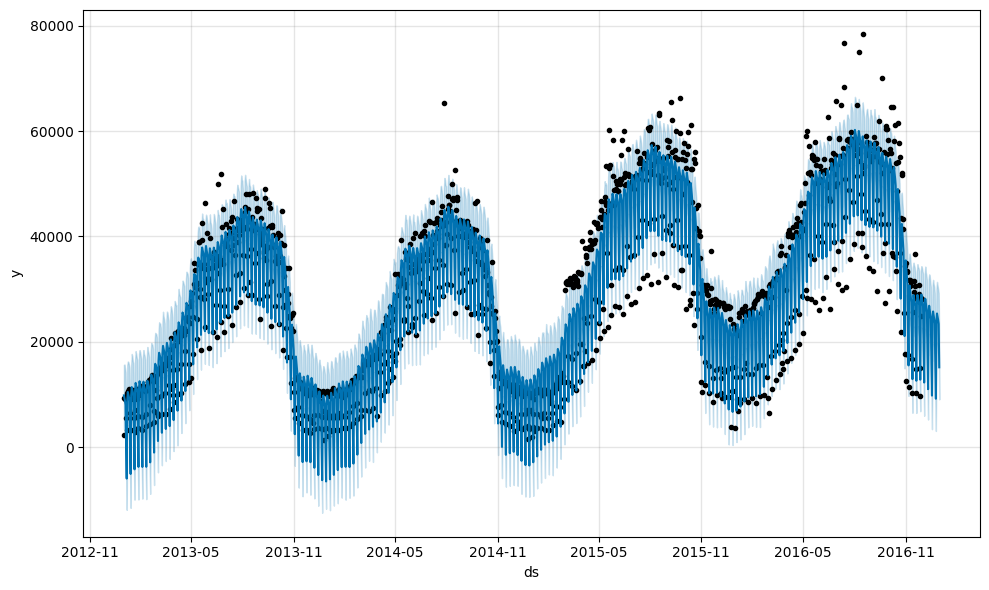

In [40]:
fig1 = m5.plot(forecast)
plt.show()

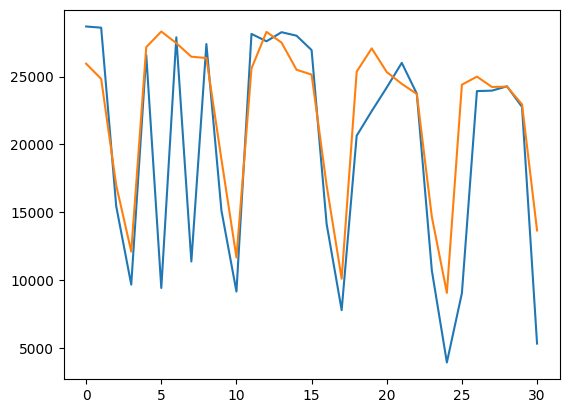

In [41]:
plt.plot(list(test['y']))
plt.plot(list(forecast5.loc[1430:,'yhat'] ))


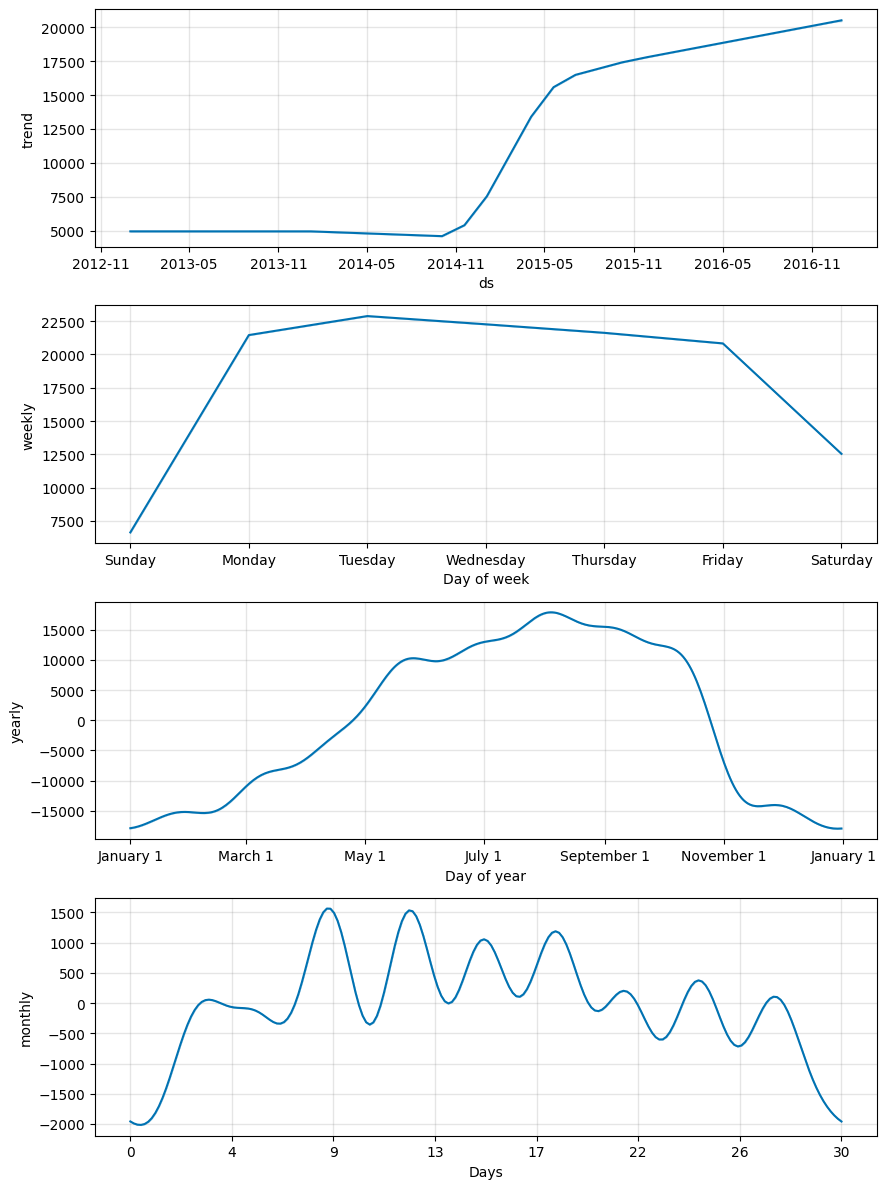

In [42]:
fig2 = m5.plot_components(forecast5)
plt.show()